In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files

In [ ]:
!cp /content/drive/MyDrive/thesis.py /content

In [ ]:
import thesis
#def IMPORT():
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Thesis Dataset/CHF_USD_5min.csv')
df.dropna(inplace=True)
df['timestamp'] = pd.to_datetime(df['timestamp'], infer_datetime_format=True)

df.set_index('timestamp', inplace=True)
print(df.shape)
df.head()

(222384, 4)


open    close      low     high
timestamp                                              
2020-01-01 17:00:00  0.96645  0.96645  0.96645  0.96645
2020-01-01 17:05:00  0.96626  0.96645  0.96597  0.96645
2020-01-01 17:10:00  0.96598  0.96831  0.96597  0.96831
2020-01-01 17:15:00  0.96820  0.96775  0.96771  0.96831
2020-01-01 17:20:00  0.96775  0.96595  0.96531  0.96827

In [ ]:
df=thesis.AddingColumn(df)
print(df.shape)
df.head()

(222383, 12)


/content/thesis.py:42: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df['week'] = df.index.week


open    close      low     high  previous_close  hour  \
timestamp                                                                       
2020-01-01 17:00:00  0.96645  0.96645  0.96645  0.96645         0.96645    17   
2020-01-01 17:05:00  0.96626  0.96645  0.96597  0.96645         0.96831    17   
2020-01-01 17:10:00  0.96598  0.96831  0.96597  0.96831         0.96775    17   
2020-01-01 17:15:00  0.96820  0.96775  0.96771  0.96831         0.96595    17   
2020-01-01 17:20:00  0.96775  0.96595  0.96531  0.96827         0.96512    17   

                     day  week  momentum  avg_price    range  ohlc_price  
timestamp                                                                 
2020-01-01 17:00:00    2     1   0.00000    0.96645  0.00000    0.966450  
2020-01-01 17:05:00    2     1  -0.00019    0.96621  0.00048    0.966283  
2020-01-01 17:10:00    2     1  -0.00233    0.96714  0.00234    0.967143  
2020-01-01 17:15:00    2     1   0.00045    0.96801  0.00060    0.967993  
2020-01-01 17:20:00    2     1   0.00180    0.96679  0.00296    0.966820

In [ ]:
df=thesis.ApplyPCA(df)
df.head()

open    close      low     high  previous_close  hour  \
timestamp                                                                       
2020-01-01 17:00:00  0.96645  0.96645  0.96645  0.96645         0.96645    17   
2020-01-01 17:05:00  0.96626  0.96645  0.96597  0.96645         0.96831    17   
2020-01-01 17:10:00  0.96598  0.96831  0.96597  0.96831         0.96775    17   
2020-01-01 17:15:00  0.96820  0.96775  0.96771  0.96831         0.96595    17   
2020-01-01 17:20:00  0.96775  0.96595  0.96531  0.96827         0.96512    17   

                     day  week  momentum  avg_price    range  ohlc_price  \
timestamp                                                                  
2020-01-01 17:00:00    2     1   0.00000    0.96645  0.00000    0.966450   
2020-01-01 17:05:00    2     1  -0.00019    0.96621  0.00048    0.966283   
2020-01-01 17:10:00    2     1  -0.00233    0.96714  0.00234    0.967143   
2020-01-01 17:15:00    2     1   0.00045    0.96801  0.00060    0.967993   
2020-01-01 17:20:00    2     1   0.00180    0.96679  0.00296    0.966820   

                           pca  
timestamp                       
2020-01-01 17:00:00 -25.510262  
2020-01-01 17:05:00 -25.510653  
2020-01-01 17:10:00 -25.510651  
2020-01-01 17:15:00 -25.510946  
2020-01-01 17:20:00 -25.510651

In [ ]:
X = df.drop('close', axis=1)
print(X.head())
y=pd.DataFrame(df['close'])
print(y.head())

                        open      low     high  previous_close  hour  day  \
timestamp                                                                   
2020-01-01 17:00:00  0.96645  0.96645  0.96645         0.96645    17    2   
2020-01-01 17:05:00  0.96626  0.96597  0.96645         0.96831    17    2   
2020-01-01 17:10:00  0.96598  0.96597  0.96831         0.96775    17    2   
2020-01-01 17:15:00  0.96820  0.96771  0.96831         0.96595    17    2   
2020-01-01 17:20:00  0.96775  0.96531  0.96827         0.96512    17    2   

                     week  momentum  avg_price    range  ohlc_price        pca  
timestamp                                                                       
2020-01-01 17:00:00     1   0.00000    0.96645  0.00000    0.966450 -25.510262  
2020-01-01 17:05:00     1  -0.00019    0.96621  0.00048    0.966283 -25.510653  
2020-01-01 17:10:00     1  -0.00233    0.96714  0.00234    0.967143 -25.510651  
2020-01-01 17:15:00     1   0.00045    0.96801  0.00060

In [ ]:
x_train, y_train, x_val, y_val, x_test, y_test = thesis.Train_Val_Test_split_60_40(X,y)

133429
133429
44476
44476
44478
44478


In [ ]:
x_train = x_train.values.astype('float32')
x_train=thesis.NormalizeDataset(x_train)

y_train = y_train.values.astype('float32')
y_train = np.reshape(y_train, (-1, 1))
y_train=thesis.NormalizeDataset(y_train)

x_train.shape



(133429, 12)

In [ ]:
x_val = x_val.values.astype('float32')
x_val=thesis.NormalizeDataset(x_val)

y_val = y_val.values.astype('float32')
y_val = np.reshape(y_val, (-1, 1))
y_val=thesis.NormalizeDataset(y_val)


In [ ]:
x_test = x_test.values.astype('float32')
x_test=thesis.NormalizeDataset(x_test)

y_test = y_test.values.astype('float32')
y_test = np.reshape(y_test, (-1, 1))
y_test=thesis.NormalizeDataset(y_test)

In [ ]:
window=24
x_train, x_val, x_test = thesis.df_to_numpy_array_features(x_train, x_val, x_test, window)
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(133404, 24, 12)
(44451, 24, 12)
(44453, 24, 12)


In [ ]:
y_train, y_val, y_test= thesis.df_to_numpy_array_target(y_train, y_val, y_test, window)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)
y_train

(133404, 1)
(44451, 1)
(44453, 1)


array([[0.80684996],
       [0.80860186],
       [0.80860186],
       ...,
       [0.41231585],
       [0.41205263],
       [0.41214037]], dtype=float32)

In [ ]:
y_train=y_train[:,-1]
y_val=y_val[:,-1]
y_test=y_test[:,-1]
y_train

array([0.80684996, 0.80860186, 0.80860186, ..., 0.41231585, 0.41205263,
       0.41214037], dtype=float32)

**GRU_BiLSTM_MODEL**

In [ ]:
model= thesis.GRU_BiLSTM_Model(x_train)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 24, 32)            4416      
                                                                 
 bidirectional (Bidirectiona  (None, 24, 512)          591872    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 512)           0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              295424    
 nal)                                                            
                                                                 
 dense (Dense)               (None, 32)                4128      
                                                                 
 dense_1 (Dense)             (None, 16)                5

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/CHF_USD_5min_GRU_BiLSTM(60-40)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=60
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/60
347/347 [==============================] - ETA: 0s - loss: 502.1411 - mae: 3.8974 - mse: 502.1411 - root_mean_squared_error: 22.4085 - mape: 27882.1348
Epoch 1: val_mse improved from inf to 0.21290, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_GRU_BiLSTM(60-40)


347/347 [==============================] - 50s 110ms/step - loss: 502.1411 - mae: 3.8974 - mse: 502.1411 - root_mean_squared_error: 22.4085 - mape: 27882.1348 - val_loss: 0.2129 - val_mae: 0.4385 - val_mse: 0.2129 - val_root_mean_squared_error: 0.4614 - val_mape: 14873.1631
Epoch 2/60
347/347 [==============================] - ETA: 0s - loss: 0.0755 - mae: 0.2453 - mse: 0.0755 - root_mean_squared_error: 0.2747 - mape: 4758.4170
Epoch 2: val_mse improved from 0.21290 to 0.12098, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_GRU_BiLSTM(60-40)


347/347 [==============================] - 36s 105ms/step - loss: 0.0755 - mae: 0.2453 - mse: 0.0755 - root_mean_squared_error: 0.2747 - mape: 4758.4170 - val_loss: 0.1210 - val_mae: 0.3328 - val_mse: 0.1210 - val_root_mean_squared_error: 0.3478 - val_mape: 11699.1396
Epoch 3/60
347/347 [==============================] - ETA: 0s - loss: 0.0602 - mae: 0.2124 - mse: 0.0602 - root_mean_squared_error: 0.2454 - mape: 3571.0830
Epoch 3: val_mse improved from 0.12098 to 0.09425, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_GRU_BiLSTM(60-40)


347/347 [==============================] - 37s 106ms/step - loss: 0.0602 - mae: 0.2124 - mse: 0.0602 - root_mean_squared_error: 0.2454 - mape: 3571.0830 - val_loss: 0.0943 - val_mae: 0.2919 - val_mse: 0.0943 - val_root_mean_squared_error: 0.3070 - val_mape: 10415.6250
Epoch 4/60
347/347 [==============================] - ETA: 0s - loss: 0.0586 - mae: 0.2032 - mse: 0.0586 - root_mean_squared_error: 0.2422 - mape: 3301.0696
Epoch 4: val_mse improved from 0.09425 to 0.09091, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_GRU_BiLSTM(60-40)


347/347 [==============================] - 36s 105ms/step - loss: 0.0586 - mae: 0.2032 - mse: 0.0586 - root_mean_squared_error: 0.2422 - mape: 3301.0696 - val_loss: 0.0909 - val_mae: 0.2862 - val_mse: 0.0909 - val_root_mean_squared_error: 0.3015 - val_mape: 10233.0615
Epoch 5/60
347/347 [==============================] - ETA: 0s - loss: 0.0583 - mae: 0.2022 - mse: 0.0583 - root_mean_squared_error: 0.2414 - mape: 3536.8323
Epoch 5: val_mse improved from 0.09091 to 0.09021, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_GRU_BiLSTM(60-40)


347/347 [==============================] - 36s 105ms/step - loss: 0.0583 - mae: 0.2022 - mse: 0.0583 - root_mean_squared_error: 0.2414 - mape: 3536.8323 - val_loss: 0.0902 - val_mae: 0.2851 - val_mse: 0.0902 - val_root_mean_squared_error: 0.3004 - val_mape: 10200.3057
Epoch 6/60
347/347 [==============================] - ETA: 0s - loss: 0.0576 - mae: 0.2009 - mse: 0.0576 - root_mean_squared_error: 0.2400 - mape: 3434.5256
Epoch 6: val_mse improved from 0.09021 to 0.08946, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_GRU_BiLSTM(60-40)


347/347 [==============================] - 36s 105ms/step - loss: 0.0576 - mae: 0.2009 - mse: 0.0576 - root_mean_squared_error: 0.2400 - mape: 3434.5256 - val_loss: 0.0895 - val_mae: 0.2840 - val_mse: 0.0895 - val_root_mean_squared_error: 0.2991 - val_mape: 10187.6074
Epoch 7/60
347/347 [==============================] - ETA: 0s - loss: 0.0534 - mae: 0.1945 - mse: 0.0534 - root_mean_squared_error: 0.2310 - mape: 3350.7734
Epoch 7: val_mse improved from 0.08946 to 0.07805, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_GRU_BiLSTM(60-40)


347/347 [==============================] - 36s 105ms/step - loss: 0.0534 - mae: 0.1945 - mse: 0.0534 - root_mean_squared_error: 0.2310 - mape: 3350.7734 - val_loss: 0.0780 - val_mae: 0.2649 - val_mse: 0.0780 - val_root_mean_squared_error: 0.2794 - val_mape: 9736.8350
Epoch 8/60
347/347 [==============================] - ETA: 0s - loss: 0.0375 - mae: 0.1594 - mse: 0.0375 - root_mean_squared_error: 0.1936 - mape: 2715.3596
Epoch 8: val_mse improved from 0.07805 to 0.04386, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_GRU_BiLSTM(60-40)


347/347 [==============================] - 36s 105ms/step - loss: 0.0375 - mae: 0.1594 - mse: 0.0375 - root_mean_squared_error: 0.1936 - mape: 2715.3596 - val_loss: 0.0439 - val_mae: 0.1939 - val_mse: 0.0439 - val_root_mean_squared_error: 0.2094 - val_mape: 8020.2607
Epoch 9/60
347/347 [==============================] - ETA: 0s - loss: 0.0162 - mae: 0.1014 - mse: 0.0162 - root_mean_squared_error: 0.1272 - mape: 2203.0029
Epoch 9: val_mse improved from 0.04386 to 0.02361, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_GRU_BiLSTM(60-40)


347/347 [==============================] - 36s 105ms/step - loss: 0.0162 - mae: 0.1014 - mse: 0.0162 - root_mean_squared_error: 0.1272 - mape: 2203.0029 - val_loss: 0.0236 - val_mae: 0.1379 - val_mse: 0.0236 - val_root_mean_squared_error: 0.1537 - val_mape: 6684.1265
Epoch 10/60
347/347 [==============================] - ETA: 0s - loss: 0.0095 - mae: 0.0784 - mse: 0.0095 - root_mean_squared_error: 0.0975 - mape: 1990.3480
Epoch 10: val_mse improved from 0.02361 to 0.01652, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_GRU_BiLSTM(60-40)


347/347 [==============================] - 36s 104ms/step - loss: 0.0095 - mae: 0.0784 - mse: 0.0095 - root_mean_squared_error: 0.0975 - mape: 1990.3480 - val_loss: 0.0165 - val_mae: 0.1133 - val_mse: 0.0165 - val_root_mean_squared_error: 0.1285 - val_mape: 5969.1167
Epoch 11/60
347/347 [==============================] - ETA: 0s - loss: 0.0078 - mae: 0.0710 - mse: 0.0078 - root_mean_squared_error: 0.0885 - mape: 1773.6708
Epoch 11: val_mse improved from 0.01652 to 0.01290, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_GRU_BiLSTM(60-40)


347/347 [==============================] - 36s 104ms/step - loss: 0.0078 - mae: 0.0710 - mse: 0.0078 - root_mean_squared_error: 0.0885 - mape: 1773.6708 - val_loss: 0.0129 - val_mae: 0.0983 - val_mse: 0.0129 - val_root_mean_squared_error: 0.1136 - val_mape: 5537.3555
Epoch 12/60
347/347 [==============================] - ETA: 0s - loss: 0.0067 - mae: 0.0657 - mse: 0.0067 - root_mean_squared_error: 0.0820 - mape: 1725.1693
Epoch 12: val_mse improved from 0.01290 to 0.01163, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_GRU_BiLSTM(60-40)


347/347 [==============================] - 37s 106ms/step - loss: 0.0067 - mae: 0.0657 - mse: 0.0067 - root_mean_squared_error: 0.0820 - mape: 1725.1693 - val_loss: 0.0116 - val_mae: 0.0936 - val_mse: 0.0116 - val_root_mean_squared_error: 0.1078 - val_mape: 5322.4712
Epoch 13/60
347/347 [==============================] - ETA: 0s - loss: 0.0054 - mae: 0.0589 - mse: 0.0054 - root_mean_squared_error: 0.0737 - mape: 1618.0239
Epoch 13: val_mse improved from 0.01163 to 0.00898, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_GRU_BiLSTM(60-40)


347/347 [==============================] - 36s 105ms/step - loss: 0.0054 - mae: 0.0589 - mse: 0.0054 - root_mean_squared_error: 0.0737 - mape: 1618.0239 - val_loss: 0.0090 - val_mae: 0.0816 - val_mse: 0.0090 - val_root_mean_squared_error: 0.0947 - val_mape: 4903.3481
Epoch 14/60
347/347 [==============================] - ETA: 0s - loss: 0.0044 - mae: 0.0526 - mse: 0.0044 - root_mean_squared_error: 0.0661 - mape: 1508.1409
Epoch 14: val_mse improved from 0.00898 to 0.00673, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_GRU_BiLSTM(60-40)


347/347 [==============================] - 36s 105ms/step - loss: 0.0044 - mae: 0.0526 - mse: 0.0044 - root_mean_squared_error: 0.0661 - mape: 1508.1409 - val_loss: 0.0067 - val_mae: 0.0689 - val_mse: 0.0067 - val_root_mean_squared_error: 0.0820 - val_mape: 4533.8550
Epoch 15/60
347/347 [==============================] - ETA: 0s - loss: 0.0035 - mae: 0.0467 - mse: 0.0035 - root_mean_squared_error: 0.0591 - mape: 1499.1515
Epoch 15: val_mse improved from 0.00673 to 0.00455, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_GRU_BiLSTM(60-40)


347/347 [==============================] - 36s 105ms/step - loss: 0.0035 - mae: 0.0467 - mse: 0.0035 - root_mean_squared_error: 0.0591 - mape: 1499.1515 - val_loss: 0.0046 - val_mae: 0.0537 - val_mse: 0.0046 - val_root_mean_squared_error: 0.0675 - val_mape: 4094.6487
Epoch 16/60
347/347 [==============================] - ETA: 0s - loss: 0.0028 - mae: 0.0415 - mse: 0.0028 - root_mean_squared_error: 0.0528 - mape: 1264.7474
Epoch 16: val_mse improved from 0.00455 to 0.00332, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_GRU_BiLSTM(60-40)


347/347 [==============================] - 36s 104ms/step - loss: 0.0028 - mae: 0.0415 - mse: 0.0028 - root_mean_squared_error: 0.0528 - mape: 1264.7474 - val_loss: 0.0033 - val_mae: 0.0439 - val_mse: 0.0033 - val_root_mean_squared_error: 0.0576 - val_mape: 3752.0671
Epoch 17/60
347/347 [==============================] - ETA: 0s - loss: 0.0023 - mae: 0.0377 - mse: 0.0023 - root_mean_squared_error: 0.0481 - mape: 1099.5750
Epoch 17: val_mse improved from 0.00332 to 0.00271, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_GRU_BiLSTM(60-40)


347/347 [==============================] - 36s 105ms/step - loss: 0.0023 - mae: 0.0377 - mse: 0.0023 - root_mean_squared_error: 0.0481 - mape: 1099.5750 - val_loss: 0.0027 - val_mae: 0.0397 - val_mse: 0.0027 - val_root_mean_squared_error: 0.0520 - val_mape: 3508.4902
Epoch 18/60
347/347 [==============================] - ETA: 0s - loss: 0.0019 - mae: 0.0344 - mse: 0.0019 - root_mean_squared_error: 0.0439 - mape: 1002.6509
Epoch 18: val_mse improved from 0.00271 to 0.00212, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_GRU_BiLSTM(60-40)


347/347 [==============================] - 36s 105ms/step - loss: 0.0019 - mae: 0.0344 - mse: 0.0019 - root_mean_squared_error: 0.0439 - mape: 1002.6509 - val_loss: 0.0021 - val_mae: 0.0359 - val_mse: 0.0021 - val_root_mean_squared_error: 0.0461 - val_mape: 3209.8198
Epoch 19/60
347/347 [==============================] - ETA: 0s - loss: 0.0016 - mae: 0.0314 - mse: 0.0016 - root_mean_squared_error: 0.0402 - mape: 963.3422
Epoch 19: val_mse improved from 0.00212 to 0.00154, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_GRU_BiLSTM(60-40)


347/347 [==============================] - 37s 106ms/step - loss: 0.0016 - mae: 0.0314 - mse: 0.0016 - root_mean_squared_error: 0.0402 - mape: 963.3422 - val_loss: 0.0015 - val_mae: 0.0289 - val_mse: 0.0015 - val_root_mean_squared_error: 0.0392 - val_mape: 2945.3352
Epoch 20/60
346/347 [============================>.] - ETA: 0s - loss: 0.0014 - mae: 0.0295 - mse: 0.0014 - root_mean_squared_error: 0.0379 - mape: 901.7120
Epoch 20: val_mse improved from 0.00154 to 0.00149, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_GRU_BiLSTM(60-40)


347/347 [==============================] - 37s 106ms/step - loss: 0.0014 - mae: 0.0295 - mse: 0.0014 - root_mean_squared_error: 0.0379 - mape: 900.4164 - val_loss: 0.0015 - val_mae: 0.0286 - val_mse: 0.0015 - val_root_mean_squared_error: 0.0386 - val_mape: 2827.6846
Epoch 21/60
346/347 [============================>.] - ETA: 0s - loss: 0.0012 - mae: 0.0271 - mse: 0.0012 - root_mean_squared_error: 0.0349 - mape: 917.4669
Epoch 21: val_mse improved from 0.00149 to 0.00114, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_GRU_BiLSTM(60-40)


347/347 [==============================] - 38s 109ms/step - loss: 0.0012 - mae: 0.0271 - mse: 0.0012 - root_mean_squared_error: 0.0349 - mape: 916.1467 - val_loss: 0.0011 - val_mae: 0.0241 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0338 - val_mape: 2681.2502
Epoch 22/60
347/347 [==============================] - ETA: 0s - loss: 0.0011 - mae: 0.0258 - mse: 0.0011 - root_mean_squared_error: 0.0333 - mape: 791.1880
Epoch 22: val_mse improved from 0.00114 to 0.00096, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_GRU_BiLSTM(60-40)


347/347 [==============================] - 37s 106ms/step - loss: 0.0011 - mae: 0.0258 - mse: 0.0011 - root_mean_squared_error: 0.0333 - mape: 791.1880 - val_loss: 9.6423e-04 - val_mae: 0.0222 - val_mse: 9.6423e-04 - val_root_mean_squared_error: 0.0311 - val_mape: 2549.7778
Epoch 23/60
347/347 [==============================] - ETA: 0s - loss: 9.5642e-04 - mae: 0.0239 - mse: 9.5642e-04 - root_mean_squared_error: 0.0309 - mape: 821.6514
Epoch 23: val_mse improved from 0.00096 to 0.00086, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_GRU_BiLSTM(60-40)


347/347 [==============================] - 37s 106ms/step - loss: 9.5642e-04 - mae: 0.0239 - mse: 9.5642e-04 - root_mean_squared_error: 0.0309 - mape: 821.6514 - val_loss: 8.6068e-04 - val_mae: 0.0210 - val_mse: 8.6068e-04 - val_root_mean_squared_error: 0.0293 - val_mape: 2464.3232
Epoch 24/60
347/347 [==============================] - ETA: 0s - loss: 8.6639e-04 - mae: 0.0228 - mse: 8.6639e-04 - root_mean_squared_error: 0.0294 - mape: 768.7643
Epoch 24: val_mse did not improve from 0.00086
347/347 [==============================] - 12s 35ms/step - loss: 8.6639e-04 - mae: 0.0228 - mse: 8.6639e-04 - root_mean_squared_error: 0.0294 - mape: 768.7643 - val_loss: 8.9337e-04 - val_mae: 0.0228 - val_mse: 8.9337e-04 - val_root_mean_squared_error: 0.0299 - val_mape: 2420.8264
Epoch 25/60
347/347 [==============================] - ETA: 0s - loss: 8.1841e-04 - mae: 0.0221 - mse: 8.1841e-04 - root_mean_squared_error: 0.0286 - mape: 777.3208
Epoch 25: val_mse did not improve from 0.00086
347/347 [==

347/347 [==============================] - 37s 106ms/step - loss: 7.0052e-04 - mae: 0.0204 - mse: 7.0052e-04 - root_mean_squared_error: 0.0265 - mape: 748.3055 - val_loss: 6.1870e-04 - val_mae: 0.0170 - val_mse: 6.1870e-04 - val_root_mean_squared_error: 0.0249 - val_mape: 2316.1636
Epoch 27/60
347/347 [==============================] - ETA: 0s - loss: 6.1246e-04 - mae: 0.0190 - mse: 6.1246e-04 - root_mean_squared_error: 0.0247 - mape: 757.2023
Epoch 27: val_mse improved from 0.00062 to 0.00059, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_GRU_BiLSTM(60-40)


347/347 [==============================] - 37s 107ms/step - loss: 6.1246e-04 - mae: 0.0190 - mse: 6.1246e-04 - root_mean_squared_error: 0.0247 - mape: 757.2023 - val_loss: 5.9288e-04 - val_mae: 0.0174 - val_mse: 5.9288e-04 - val_root_mean_squared_error: 0.0243 - val_mape: 2247.8962
Epoch 28/60
347/347 [==============================] - ETA: 0s - loss: 6.3895e-04 - mae: 0.0195 - mse: 6.3895e-04 - root_mean_squared_error: 0.0253 - mape: 748.2163
Epoch 28: val_mse improved from 0.00059 to 0.00045, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_GRU_BiLSTM(60-40)


347/347 [==============================] - 37s 106ms/step - loss: 6.3895e-04 - mae: 0.0195 - mse: 6.3895e-04 - root_mean_squared_error: 0.0253 - mape: 748.2163 - val_loss: 4.4891e-04 - val_mae: 0.0144 - val_mse: 4.4891e-04 - val_root_mean_squared_error: 0.0212 - val_mape: 2063.9907
Epoch 29/60
347/347 [==============================] - ETA: 0s - loss: 5.3098e-04 - mae: 0.0178 - mse: 5.3098e-04 - root_mean_squared_error: 0.0230 - mape: 658.9675
Epoch 29: val_mse did not improve from 0.00045
347/347 [==============================] - 12s 35ms/step - loss: 5.3098e-04 - mae: 0.0178 - mse: 5.3098e-04 - root_mean_squared_error: 0.0230 - mape: 658.9675 - val_loss: 5.6363e-04 - val_mae: 0.0183 - val_mse: 5.6363e-04 - val_root_mean_squared_error: 0.0237 - val_mape: 2031.1667
Epoch 30/60
347/347 [==============================] - ETA: 0s - loss: 5.0488e-04 - mae: 0.0174 - mse: 5.0488e-04 - root_mean_squared_error: 0.0225 - mape: 713.1865
Epoch 30: val_mse did not improve from 0.00045
347/347 [==

347/347 [==============================] - 37s 106ms/step - loss: 4.7234e-04 - mae: 0.0168 - mse: 4.7234e-04 - root_mean_squared_error: 0.0217 - mape: 664.2565 - val_loss: 3.4428e-04 - val_mae: 0.0124 - val_mse: 3.4428e-04 - val_root_mean_squared_error: 0.0186 - val_mape: 1935.3353
Epoch 32/60
347/347 [==============================] - ETA: 0s - loss: 4.1820e-04 - mae: 0.0158 - mse: 4.1820e-04 - root_mean_squared_error: 0.0204 - mape: 612.1359
Epoch 32: val_mse did not improve from 0.00034
347/347 [==============================] - 12s 34ms/step - loss: 4.1820e-04 - mae: 0.0158 - mse: 4.1820e-04 - root_mean_squared_error: 0.0204 - mape: 612.1359 - val_loss: 5.9958e-04 - val_mae: 0.0205 - val_mse: 5.9958e-04 - val_root_mean_squared_error: 0.0245 - val_mape: 1924.5072
Epoch 33/60
347/347 [==============================] - ETA: 0s - loss: 4.5263e-04 - mae: 0.0164 - mse: 4.5263e-04 - root_mean_squared_error: 0.0213 - mape: 602.7879
Epoch 33: val_mse did not improve from 0.00034
347/347 [==

347/347 [==============================] - 37s 108ms/step - loss: 3.7774e-04 - mae: 0.0150 - mse: 3.7774e-04 - root_mean_squared_error: 0.0194 - mape: 573.2109 - val_loss: 3.1084e-04 - val_mae: 0.0124 - val_mse: 3.1084e-04 - val_root_mean_squared_error: 0.0176 - val_mape: 1804.6012
Epoch 35/60
347/347 [==============================] - ETA: 0s - loss: 3.3490e-04 - mae: 0.0141 - mse: 3.3490e-04 - root_mean_squared_error: 0.0183 - mape: 549.1840
Epoch 35: val_mse did not improve from 0.00031
347/347 [==============================] - 12s 35ms/step - loss: 3.3490e-04 - mae: 0.0141 - mse: 3.3490e-04 - root_mean_squared_error: 0.0183 - mape: 549.1840 - val_loss: 3.3336e-04 - val_mae: 0.0142 - val_mse: 3.3336e-04 - val_root_mean_squared_error: 0.0183 - val_mape: 1785.4409
Epoch 36/60
347/347 [==============================] - ETA: 0s - loss: 3.1254e-04 - mae: 0.0137 - mse: 3.1254e-04 - root_mean_squared_error: 0.0177 - mape: 576.2624
Epoch 36: val_mse improved from 0.00031 to 0.00025, saving

347/347 [==============================] - 37s 105ms/step - loss: 3.1254e-04 - mae: 0.0137 - mse: 3.1254e-04 - root_mean_squared_error: 0.0177 - mape: 576.2624 - val_loss: 2.5357e-04 - val_mae: 0.0115 - val_mse: 2.5357e-04 - val_root_mean_squared_error: 0.0159 - val_mape: 1680.1199
Epoch 37/60
347/347 [==============================] - ETA: 0s - loss: 3.1933e-04 - mae: 0.0138 - mse: 3.1933e-04 - root_mean_squared_error: 0.0179 - mape: 532.1642
Epoch 37: val_mse did not improve from 0.00025
347/347 [==============================] - 12s 35ms/step - loss: 3.1933e-04 - mae: 0.0138 - mse: 3.1933e-04 - root_mean_squared_error: 0.0179 - mape: 532.1642 - val_loss: 2.6101e-04 - val_mae: 0.0123 - val_mse: 2.6101e-04 - val_root_mean_squared_error: 0.0162 - val_mape: 1649.4933
Epoch 38/60
347/347 [==============================] - ETA: 0s - loss: 3.2327e-04 - mae: 0.0137 - mse: 3.2327e-04 - root_mean_squared_error: 0.0180 - mape: 496.7663
Epoch 38: val_mse improved from 0.00025 to 0.00018, saving

347/347 [==============================] - 37s 106ms/step - loss: 3.2327e-04 - mae: 0.0137 - mse: 3.2327e-04 - root_mean_squared_error: 0.0180 - mape: 496.7663 - val_loss: 1.7707e-04 - val_mae: 0.0088 - val_mse: 1.7707e-04 - val_root_mean_squared_error: 0.0133 - val_mape: 1618.9989
Epoch 39/60
347/347 [==============================] - ETA: 0s - loss: 2.8446e-04 - mae: 0.0130 - mse: 2.8446e-04 - root_mean_squared_error: 0.0169 - mape: 496.9165
Epoch 39: val_mse did not improve from 0.00018
347/347 [==============================] - 12s 34ms/step - loss: 2.8446e-04 - mae: 0.0130 - mse: 2.8446e-04 - root_mean_squared_error: 0.0169 - mape: 496.9165 - val_loss: 2.3502e-04 - val_mae: 0.0123 - val_mse: 2.3502e-04 - val_root_mean_squared_error: 0.0153 - val_mape: 1577.8163
Epoch 40/60
347/347 [==============================] - ETA: 0s - loss: 2.3742e-04 - mae: 0.0119 - mse: 2.3742e-04 - root_mean_squared_error: 0.0154 - mape: 489.9978
Epoch 40: val_mse did not improve from 0.00018
347/347 [==

347/347 [==============================] - 38s 109ms/step - loss: 2.1822e-04 - mae: 0.0114 - mse: 2.1822e-04 - root_mean_squared_error: 0.0148 - mape: 491.7288 - val_loss: 1.3862e-04 - val_mae: 0.0081 - val_mse: 1.3862e-04 - val_root_mean_squared_error: 0.0118 - val_mape: 1467.0676
Epoch 42/60
347/347 [==============================] - ETA: 0s - loss: 2.2160e-04 - mae: 0.0115 - mse: 2.2160e-04 - root_mean_squared_error: 0.0149 - mape: 471.7996
Epoch 42: val_mse did not improve from 0.00014
347/347 [==============================] - 12s 34ms/step - loss: 2.2160e-04 - mae: 0.0115 - mse: 2.2160e-04 - root_mean_squared_error: 0.0149 - mape: 471.7996 - val_loss: 1.6931e-04 - val_mae: 0.0094 - val_mse: 1.6931e-04 - val_root_mean_squared_error: 0.0130 - val_mape: 1413.8378
Epoch 43/60
347/347 [==============================] - ETA: 0s - loss: 2.1278e-04 - mae: 0.0113 - mse: 2.1278e-04 - root_mean_squared_error: 0.0146 - mape: 427.7639
Epoch 43: val_mse improved from 0.00014 to 0.00012, saving

347/347 [==============================] - 36s 105ms/step - loss: 2.1278e-04 - mae: 0.0113 - mse: 2.1278e-04 - root_mean_squared_error: 0.0146 - mape: 427.7639 - val_loss: 1.2308e-04 - val_mae: 0.0076 - val_mse: 1.2308e-04 - val_root_mean_squared_error: 0.0111 - val_mape: 1372.0701
Epoch 44/60
347/347 [==============================] - ETA: 0s - loss: 2.0176e-04 - mae: 0.0111 - mse: 2.0176e-04 - root_mean_squared_error: 0.0142 - mape: 441.3528
Epoch 44: val_mse did not improve from 0.00012
347/347 [==============================] - 12s 35ms/step - loss: 2.0176e-04 - mae: 0.0111 - mse: 2.0176e-04 - root_mean_squared_error: 0.0142 - mape: 441.3528 - val_loss: 2.0353e-04 - val_mae: 0.0107 - val_mse: 2.0353e-04 - val_root_mean_squared_error: 0.0143 - val_mape: 1362.8384
Epoch 45/60
347/347 [==============================] - ETA: 0s - loss: 1.6894e-04 - mae: 0.0101 - mse: 1.6894e-04 - root_mean_squared_error: 0.0130 - mape: 457.4648
Epoch 45: val_mse improved from 0.00012 to 0.00009, saving

347/347 [==============================] - 37s 106ms/step - loss: 1.6894e-04 - mae: 0.0101 - mse: 1.6894e-04 - root_mean_squared_error: 0.0130 - mape: 457.4648 - val_loss: 8.7229e-05 - val_mae: 0.0062 - val_mse: 8.7229e-05 - val_root_mean_squared_error: 0.0093 - val_mape: 1297.6340
Epoch 46/60
347/347 [==============================] - ETA: 0s - loss: 1.7924e-04 - mae: 0.0103 - mse: 1.7924e-04 - root_mean_squared_error: 0.0134 - mape: 429.6165
Epoch 46: val_mse did not improve from 0.00009
347/347 [==============================] - 12s 35ms/step - loss: 1.7924e-04 - mae: 0.0103 - mse: 1.7924e-04 - root_mean_squared_error: 0.0134 - mape: 429.6165 - val_loss: 1.5294e-04 - val_mae: 0.0090 - val_mse: 1.5294e-04 - val_root_mean_squared_error: 0.0124 - val_mape: 1234.3872
Epoch 47/60
347/347 [==============================] - ETA: 0s - loss: 1.5486e-04 - mae: 0.0095 - mse: 1.5486e-04 - root_mean_squared_error: 0.0124 - mape: 429.1437
Epoch 47: val_mse did not improve from 0.00009
347/347 [==

347/347 [==============================] - 36s 104ms/step - loss: 1.3264e-04 - mae: 0.0088 - mse: 1.3264e-04 - root_mean_squared_error: 0.0115 - mape: 342.2538 - val_loss: 8.2883e-05 - val_mae: 0.0072 - val_mse: 8.2883e-05 - val_root_mean_squared_error: 0.0091 - val_mape: 1070.8713
Epoch 52/60
347/347 [==============================] - ETA: 0s - loss: 1.3392e-04 - mae: 0.0088 - mse: 1.3392e-04 - root_mean_squared_error: 0.0116 - mape: 349.9376
Epoch 52: val_mse did not improve from 0.00008
347/347 [==============================] - 12s 34ms/step - loss: 1.3392e-04 - mae: 0.0088 - mse: 1.3392e-04 - root_mean_squared_error: 0.0116 - mape: 349.9376 - val_loss: 1.1370e-04 - val_mae: 0.0092 - val_mse: 1.1370e-04 - val_root_mean_squared_error: 0.0107 - val_mape: 1057.4772
Epoch 53/60
347/347 [==============================] - ETA: 0s - loss: 1.0875e-04 - mae: 0.0080 - mse: 1.0875e-04 - root_mean_squared_error: 0.0104 - mape: 303.5218
Epoch 53: val_mse improved from 0.00008 to 0.00005, saving

347/347 [==============================] - 36s 104ms/step - loss: 1.0875e-04 - mae: 0.0080 - mse: 1.0875e-04 - root_mean_squared_error: 0.0104 - mape: 303.5218 - val_loss: 4.9607e-05 - val_mae: 0.0050 - val_mse: 4.9607e-05 - val_root_mean_squared_error: 0.0070 - val_mape: 1000.4489
Epoch 54/60
347/347 [==============================] - ETA: 0s - loss: 1.1168e-04 - mae: 0.0080 - mse: 1.1168e-04 - root_mean_squared_error: 0.0106 - mape: 342.6019
Epoch 54: val_mse did not improve from 0.00005
347/347 [==============================] - 12s 34ms/step - loss: 1.1168e-04 - mae: 0.0080 - mse: 1.1168e-04 - root_mean_squared_error: 0.0106 - mape: 342.6019 - val_loss: 5.8220e-05 - val_mae: 0.0053 - val_mse: 5.8220e-05 - val_root_mean_squared_error: 0.0076 - val_mape: 974.2625
Epoch 55/60
347/347 [==============================] - ETA: 0s - loss: 1.0195e-04 - mae: 0.0077 - mse: 1.0195e-04 - root_mean_squared_error: 0.0101 - mape: 295.9426
Epoch 55: val_mse did not improve from 0.00005
347/347 [===

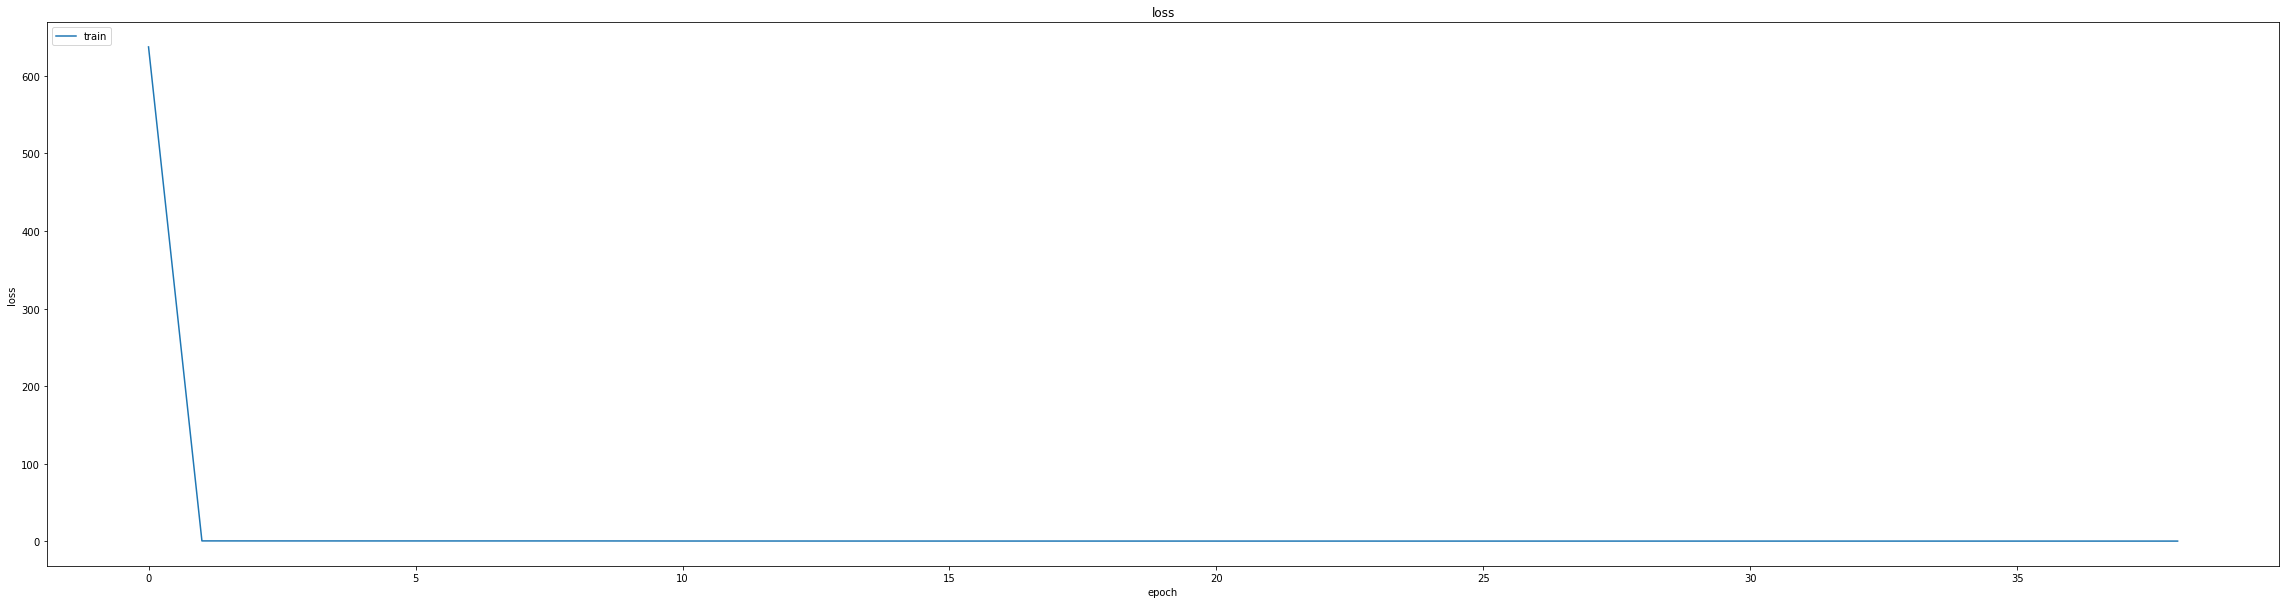

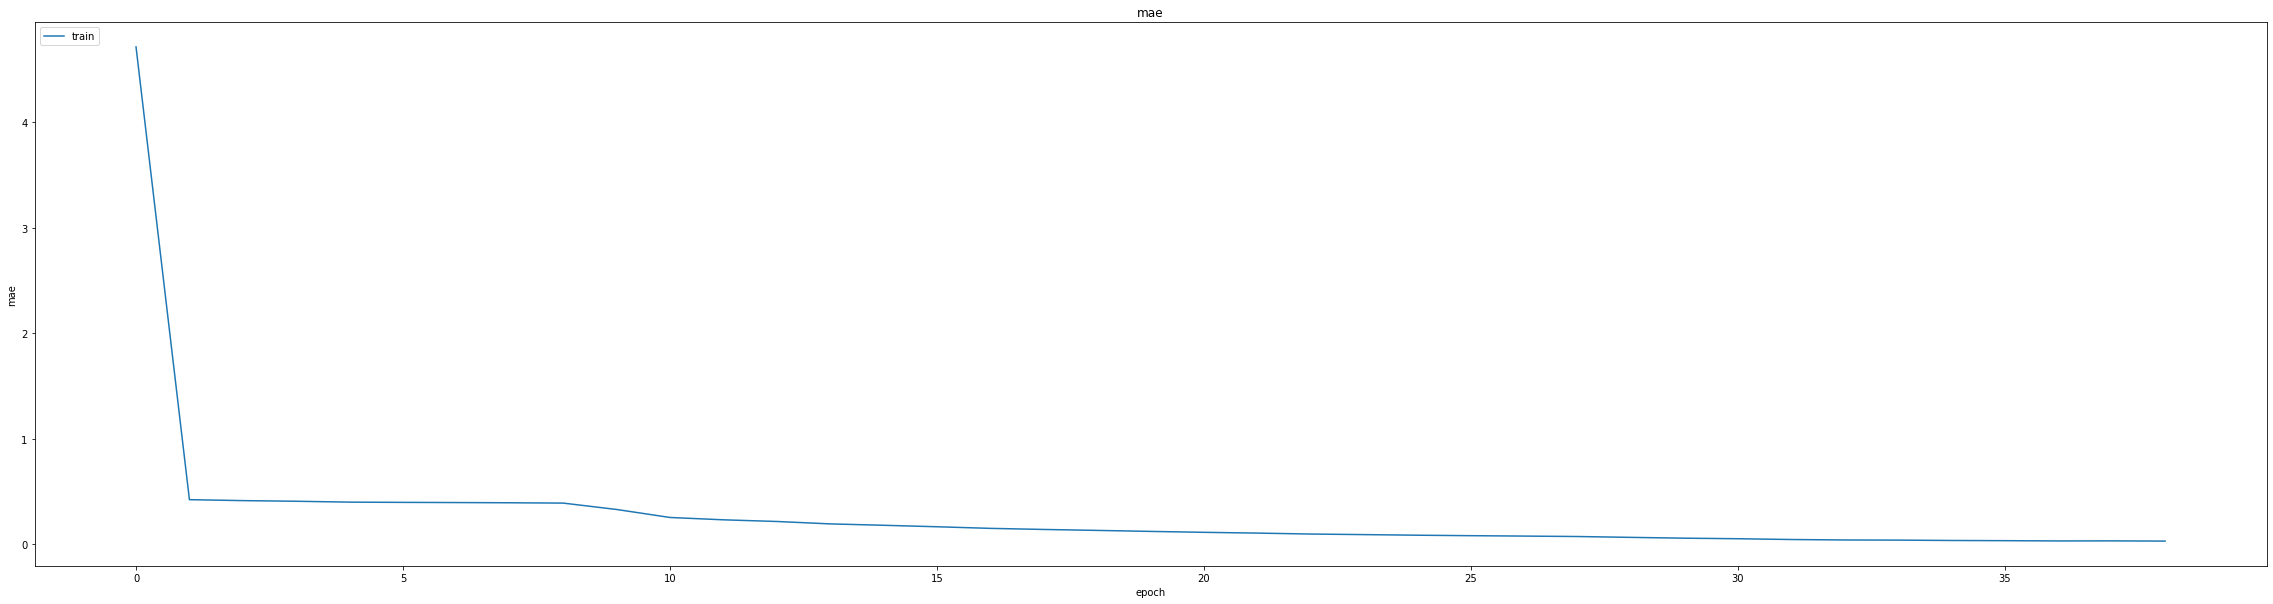

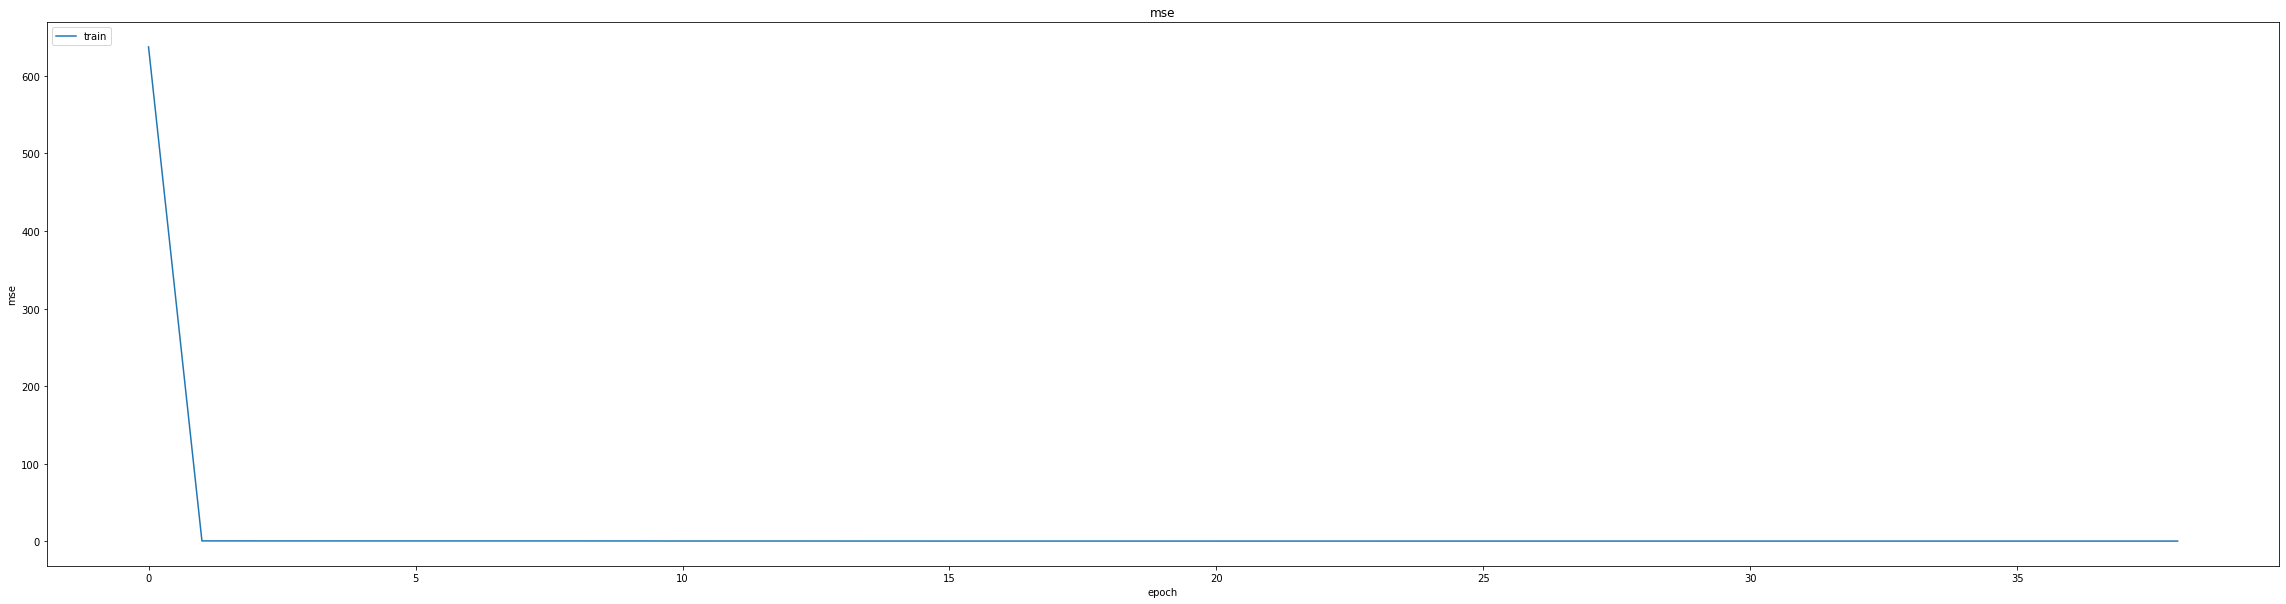

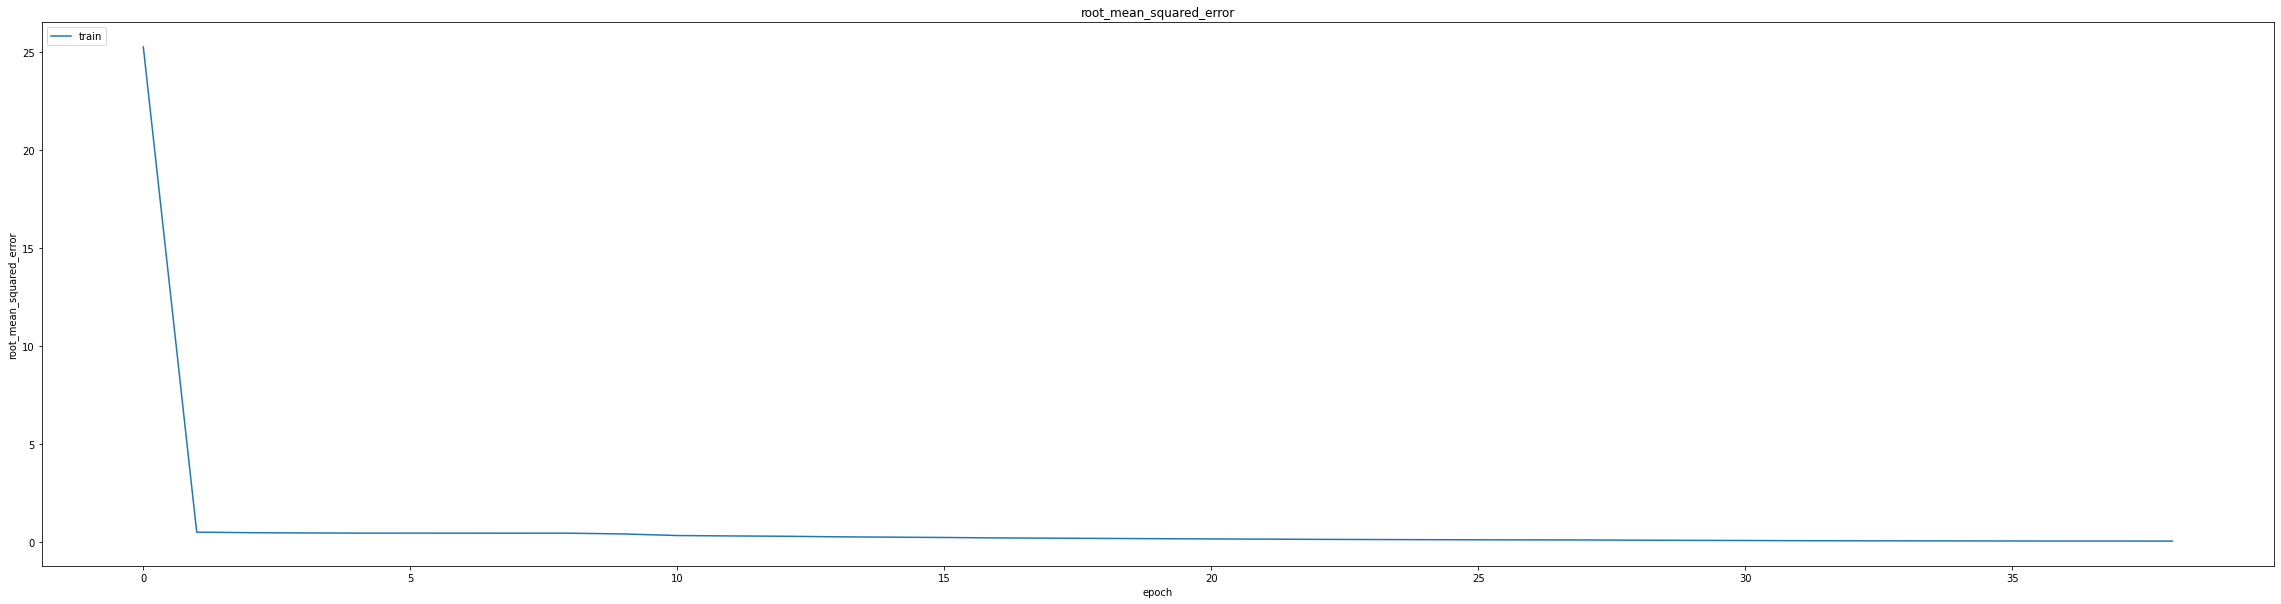

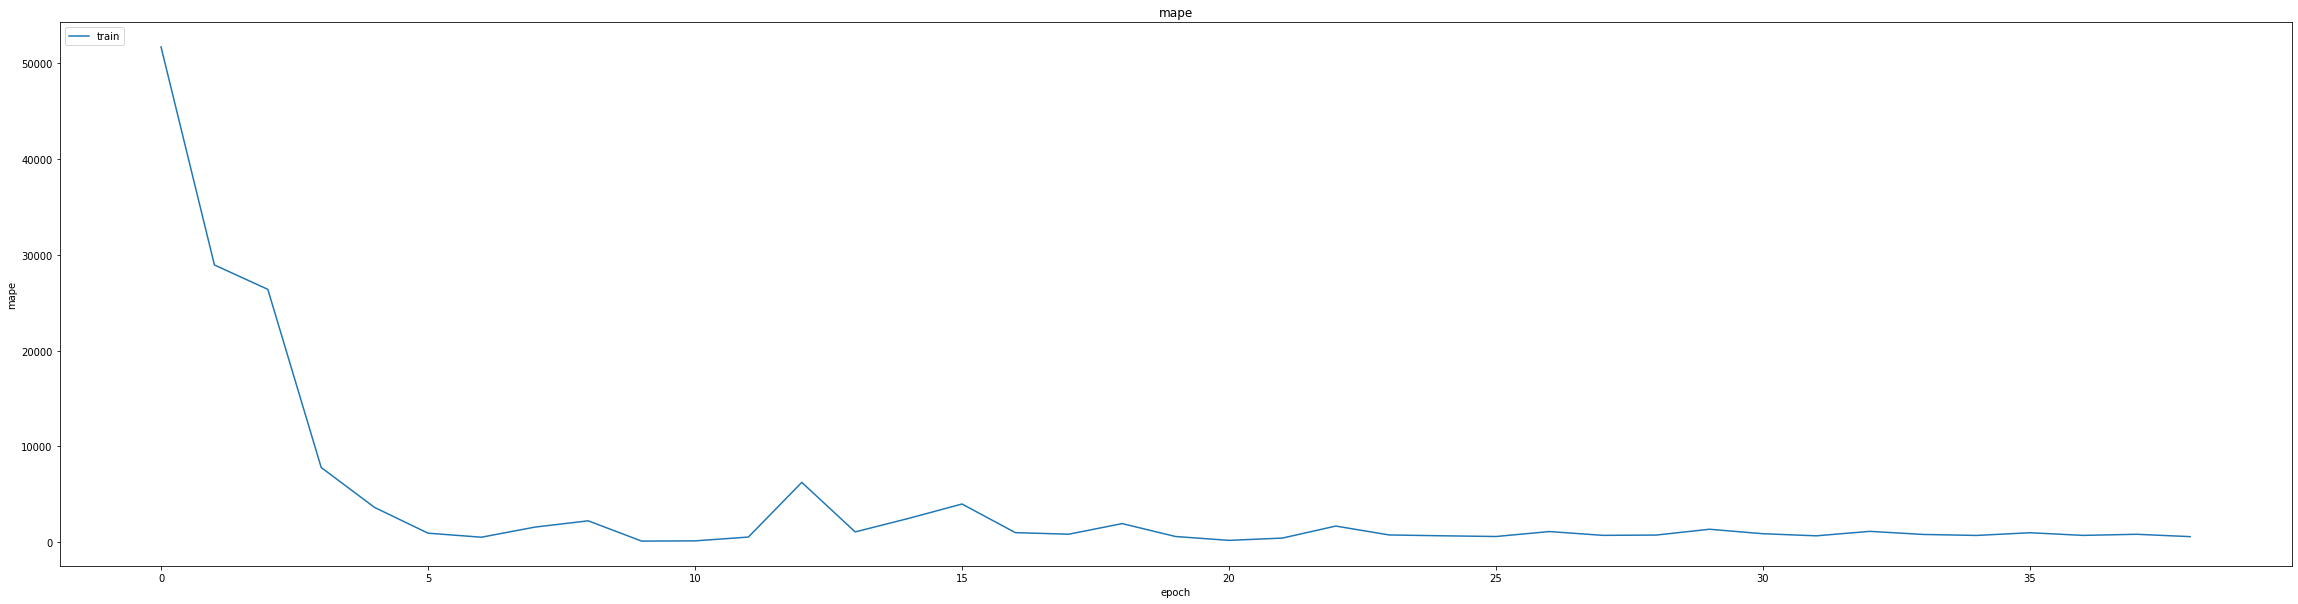

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.004982104524970055
0.007043226156383753
1390/1390 [==============================] - 10s 6ms/step
0.9959291980905807


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/CHF_USD_5min_GRU_BiLSTM(60-40)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:
from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)

history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/20
346/347 [============================>.] - ETA: 0s - loss: 0.0048 - mae: 0.0278 - mse: 0.0048 - root_mean_squared_error: 0.0693 - mape: 585.2834
Epoch 1: val_mse did not improve from 0.00005
347/347 [==============================] - 28s 39ms/step - loss: 0.0048 - mae: 0.0278 - mse: 0.0048 - root_mean_squared_error: 0.0693 - mape: 584.4363 - val_loss: 1.6111e-04 - val_mae: 0.0099 - val_mse: 1.6111e-04 - val_root_mean_squared_error: 0.0127 - val_mape: 1327.0726 - lr: 0.0010
Epoch 2/20
347/347 [==============================] - ETA: 0s - loss: 8.2380e-05 - mae: 0.0070 - mse: 8.2380e-05 - root_mean_squared_error: 0.0091 - mape: 304.5816
Epoch 2: val_mse did not improve from 0.00005
347/347 [==============================] - 12s 34ms/step - loss: 8.2380e-05 - mae: 0.0070 - mse: 8.2380e-05 - root_mean_squared_error: 0.0091 - mape: 304.5816 - val_loss: 1.8044e-04 - val_mae: 0.0119 - val_mse: 1.8044e-04 - val_root_mean_squared_error: 0.0134 - val_mape: 831.6900 - lr: 0.0010
lr chan

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.007727810647338629
0.009284182451665401
1390/1390 [==============================] - 11s 7ms/step
0.9935839095034094


1390/1390 [==============================] - 8s 6ms/step


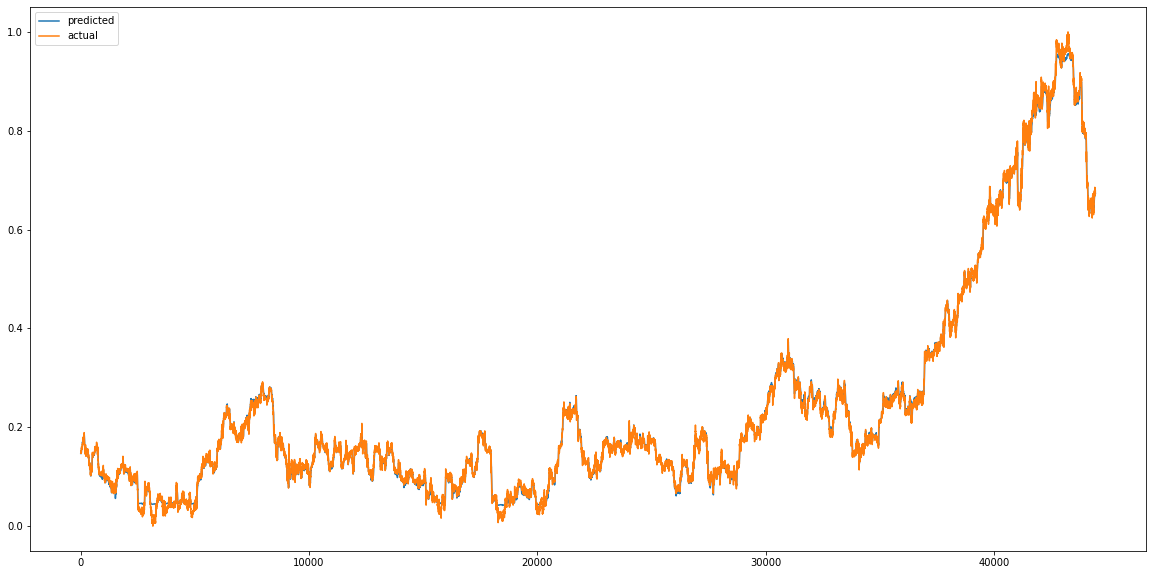

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/CHF_USD_5min_GRU_BiLSTM(60-40)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


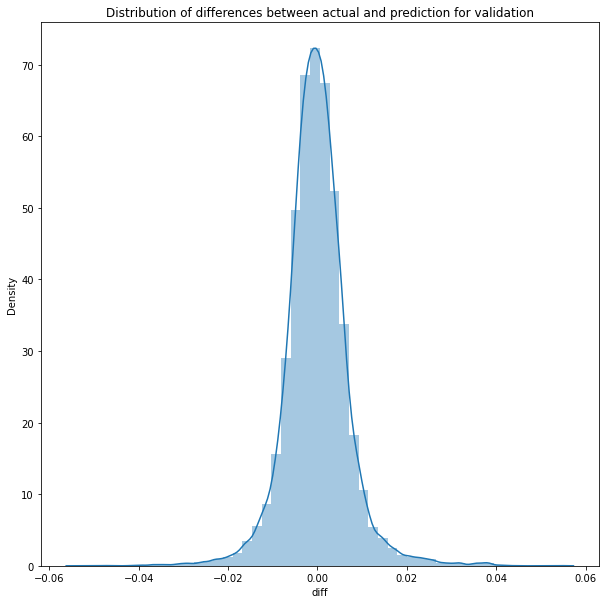

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

1390/1390 [==============================] - 8s 6ms/step


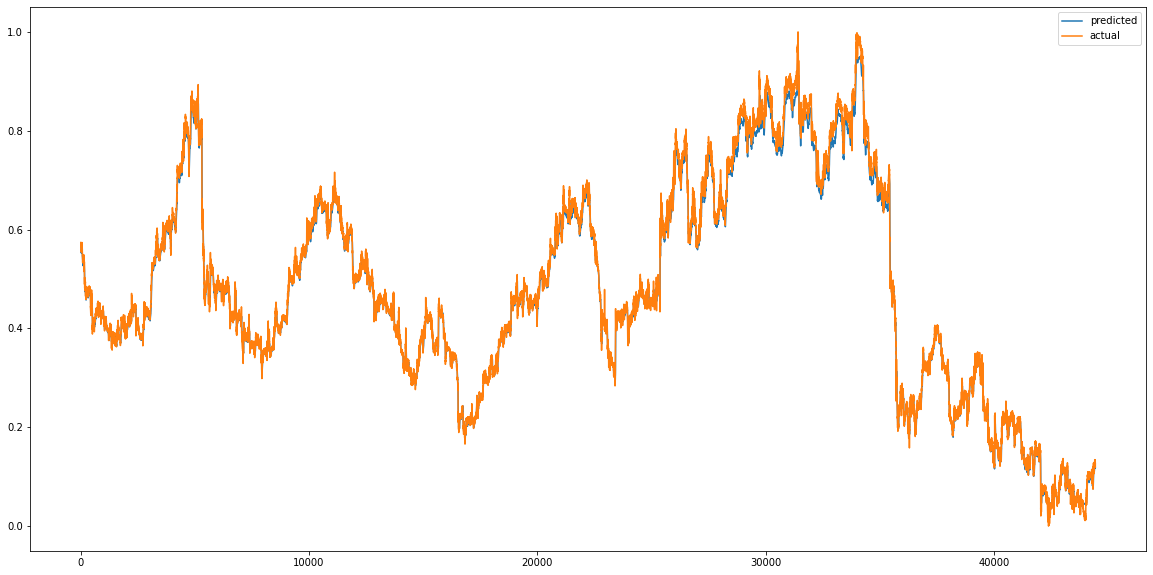

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


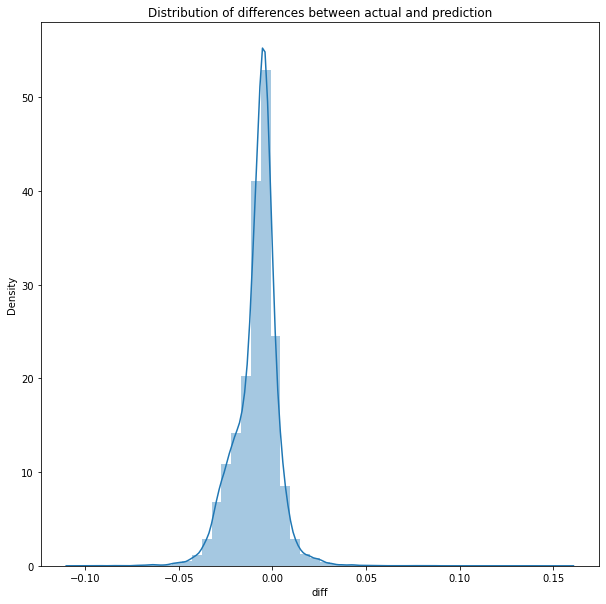

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', test_r2_score)
predictions['diff'].describe()

MSE :  0.00019978302384821345
RMSE :  0.01413446227658532
MAE :  0.01041121998759884
1390/1390 [==============================] - 8s 6ms/step
R2_Score  : 0.9958385677123974


count    44453.000000
mean        -0.008336
std          0.011415
min         -0.106008
25%         -0.013615
50%         -0.006530
75%         -0.002008
max          0.156662
Name: diff, dtype: float64

**GRU_LSTM_MODEL**

In [ ]:
model= thesis.GRU_LSTM_Model(x_train)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 24, 32)            4416      
                                                                 
 lstm (LSTM)                 (None, 24, 256)           295936    
                                                                 
 dropout (Dropout)           (None, 24, 256)           0         
                                                                 
 lstm_1 (LSTM)               (None, 64)                82176     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 1

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/CHF_USD_5min_GRU_LSTM(60-40)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=60
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/60
346/347 [============================>.] - ETA: 0s - loss: 329.2807 - mae: 2.5681 - mse: 329.2807 - root_mean_squared_error: 18.1461 - mape: 4149.9824
Epoch 1: val_mse improved from inf to 0.08614, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_GRU_LSTM(60-40)


347/347 [==============================] - 29s 56ms/step - loss: 328.8020 - mae: 2.5647 - mse: 328.8020 - root_mean_squared_error: 18.1329 - mape: 4144.0542 - val_loss: 0.0861 - val_mae: 0.2774 - val_mse: 0.0861 - val_root_mean_squared_error: 0.2935 - val_mape: 9953.9072
Epoch 2/60
347/347 [==============================] - ETA: 0s - loss: 0.0596 - mae: 0.2025 - mse: 0.0596 - root_mean_squared_error: 0.2441 - mape: 3338.4897
Epoch 2: val_mse did not improve from 0.08614
347/347 [==============================] - 6s 18ms/step - loss: 0.0596 - mae: 0.2025 - mse: 0.0596 - root_mean_squared_error: 0.2441 - mape: 3338.4897 - val_loss: 0.0879 - val_mae: 0.2805 - val_mse: 0.0879 - val_root_mean_squared_error: 0.2964 - val_mape: 10056.9033
Epoch 3/60
346/347 [============================>.] - ETA: 0s - loss: 0.0595 - mae: 0.2031 - mse: 0.0595 - root_mean_squared_error: 0.2439 - mape: 3572.3359
Epoch 3: val_mse did not improve from 0.08614
347/347 [==============================] - 6s 17ms/step

347/347 [==============================] - 18s 51ms/step - loss: 0.0469 - mae: 0.1794 - mse: 0.0469 - root_mean_squared_error: 0.2166 - mape: 3420.8743 - val_loss: 0.0547 - val_mae: 0.2168 - val_mse: 0.0547 - val_root_mean_squared_error: 0.2339 - val_mape: 8755.3555
Epoch 18/60
346/347 [============================>.] - ETA: 0s - loss: 0.0129 - mae: 0.0852 - mse: 0.0129 - root_mean_squared_error: 0.1134 - mape: 2476.2495
Epoch 18: val_mse improved from 0.05470 to 0.01937, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_GRU_LSTM(60-40)


347/347 [==============================] - 17s 50ms/step - loss: 0.0129 - mae: 0.0851 - mse: 0.0129 - root_mean_squared_error: 0.1134 - mape: 2472.6917 - val_loss: 0.0194 - val_mae: 0.1217 - val_mse: 0.0194 - val_root_mean_squared_error: 0.1392 - val_mape: 6325.0815
Epoch 19/60
346/347 [============================>.] - ETA: 0s - loss: 0.0057 - mae: 0.0562 - mse: 0.0057 - root_mean_squared_error: 0.0753 - mape: 1876.0818
Epoch 19: val_mse improved from 0.01937 to 0.01053, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_GRU_LSTM(60-40)


347/347 [==============================] - 17s 50ms/step - loss: 0.0057 - mae: 0.0561 - mse: 0.0057 - root_mean_squared_error: 0.0753 - mape: 1873.3882 - val_loss: 0.0105 - val_mae: 0.0854 - val_mse: 0.0105 - val_root_mean_squared_error: 0.1026 - val_mape: 5266.2881
Epoch 20/60
344/347 [============================>.] - ETA: 0s - loss: 0.0039 - mae: 0.0469 - mse: 0.0039 - root_mean_squared_error: 0.0622 - mape: 1658.3453
Epoch 20: val_mse improved from 0.01053 to 0.00693, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_GRU_LSTM(60-40)


347/347 [==============================] - 18s 52ms/step - loss: 0.0039 - mae: 0.0469 - mse: 0.0039 - root_mean_squared_error: 0.0622 - mape: 1646.5010 - val_loss: 0.0069 - val_mae: 0.0680 - val_mse: 0.0069 - val_root_mean_squared_error: 0.0833 - val_mape: 4657.3237
Epoch 21/60
346/347 [============================>.] - ETA: 0s - loss: 0.0031 - mae: 0.0423 - mse: 0.0031 - root_mean_squared_error: 0.0555 - mape: 1545.0941
Epoch 21: val_mse improved from 0.00693 to 0.00491, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_GRU_LSTM(60-40)


347/347 [==============================] - 18s 52ms/step - loss: 0.0031 - mae: 0.0422 - mse: 0.0031 - root_mean_squared_error: 0.0555 - mape: 1542.8633 - val_loss: 0.0049 - val_mae: 0.0554 - val_mse: 0.0049 - val_root_mean_squared_error: 0.0701 - val_mape: 4229.7227
Epoch 22/60
345/347 [============================>.] - ETA: 0s - loss: 0.0025 - mae: 0.0381 - mse: 0.0025 - root_mean_squared_error: 0.0499 - mape: 1394.4336
Epoch 22: val_mse improved from 0.00491 to 0.00368, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_GRU_LSTM(60-40)


347/347 [==============================] - 17s 50ms/step - loss: 0.0025 - mae: 0.0381 - mse: 0.0025 - root_mean_squared_error: 0.0498 - mape: 1388.4523 - val_loss: 0.0037 - val_mae: 0.0453 - val_mse: 0.0037 - val_root_mean_squared_error: 0.0606 - val_mape: 3929.6150
Epoch 23/60
345/347 [============================>.] - ETA: 0s - loss: 0.0021 - mae: 0.0352 - mse: 0.0021 - root_mean_squared_error: 0.0458 - mape: 1281.4039
Epoch 23: val_mse improved from 0.00368 to 0.00301, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_GRU_LSTM(60-40)


347/347 [==============================] - 17s 50ms/step - loss: 0.0021 - mae: 0.0352 - mse: 0.0021 - root_mean_squared_error: 0.0458 - mape: 1275.9048 - val_loss: 0.0030 - val_mae: 0.0414 - val_mse: 0.0030 - val_root_mean_squared_error: 0.0549 - val_mape: 3691.1375
Epoch 24/60
344/347 [============================>.] - ETA: 0s - loss: 0.0017 - mae: 0.0320 - mse: 0.0017 - root_mean_squared_error: 0.0416 - mape: 1467.5756
Epoch 24: val_mse improved from 0.00301 to 0.00240, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_GRU_LSTM(60-40)


347/347 [==============================] - 18s 51ms/step - loss: 0.0017 - mae: 0.0320 - mse: 0.0017 - root_mean_squared_error: 0.0416 - mape: 1457.1105 - val_loss: 0.0024 - val_mae: 0.0363 - val_mse: 0.0024 - val_root_mean_squared_error: 0.0490 - val_mape: 3461.7778
Epoch 25/60
344/347 [============================>.] - ETA: 0s - loss: 0.0015 - mae: 0.0297 - mse: 0.0015 - root_mean_squared_error: 0.0384 - mape: 1068.9045
Epoch 25: val_mse improved from 0.00240 to 0.00208, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_GRU_LSTM(60-40)


347/347 [==============================] - 17s 50ms/step - loss: 0.0015 - mae: 0.0297 - mse: 0.0015 - root_mean_squared_error: 0.0384 - mape: 1061.2578 - val_loss: 0.0021 - val_mae: 0.0345 - val_mse: 0.0021 - val_root_mean_squared_error: 0.0456 - val_mape: 3273.3457
Epoch 26/60
345/347 [============================>.] - ETA: 0s - loss: 0.0013 - mae: 0.0279 - mse: 0.0013 - root_mean_squared_error: 0.0360 - mape: 1125.7051
Epoch 26: val_mse improved from 0.00208 to 0.00157, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_GRU_LSTM(60-40)


347/347 [==============================] - 17s 50ms/step - loss: 0.0013 - mae: 0.0278 - mse: 0.0013 - root_mean_squared_error: 0.0360 - mape: 1120.8590 - val_loss: 0.0016 - val_mae: 0.0277 - val_mse: 0.0016 - val_root_mean_squared_error: 0.0396 - val_mape: 3072.3420
Epoch 27/60
344/347 [============================>.] - ETA: 0s - loss: 0.0011 - mae: 0.0252 - mse: 0.0011 - root_mean_squared_error: 0.0327 - mape: 1149.8430
Epoch 27: val_mse improved from 0.00157 to 0.00137, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_GRU_LSTM(60-40)


347/347 [==============================] - 18s 51ms/step - loss: 0.0011 - mae: 0.0252 - mse: 0.0011 - root_mean_squared_error: 0.0327 - mape: 1141.5999 - val_loss: 0.0014 - val_mae: 0.0270 - val_mse: 0.0014 - val_root_mean_squared_error: 0.0370 - val_mape: 2926.8630
Epoch 28/60
344/347 [============================>.] - ETA: 0s - loss: 9.8525e-04 - mae: 0.0242 - mse: 9.8525e-04 - root_mean_squared_error: 0.0314 - mape: 1114.2866
Epoch 28: val_mse improved from 0.00137 to 0.00107, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_GRU_LSTM(60-40)


347/347 [==============================] - 17s 50ms/step - loss: 9.8428e-04 - mae: 0.0242 - mse: 9.8428e-04 - root_mean_squared_error: 0.0314 - mape: 1106.3049 - val_loss: 0.0011 - val_mae: 0.0225 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0327 - val_mape: 2762.0876
Epoch 29/60
344/347 [============================>.] - ETA: 0s - loss: 7.7757e-04 - mae: 0.0214 - mse: 7.7757e-04 - root_mean_squared_error: 0.0279 - mape: 948.0916
Epoch 29: val_mse improved from 0.00107 to 0.00091, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_GRU_LSTM(60-40)


347/347 [==============================] - 18s 52ms/step - loss: 7.7679e-04 - mae: 0.0214 - mse: 7.7679e-04 - root_mean_squared_error: 0.0279 - mape: 941.3058 - val_loss: 9.1296e-04 - val_mae: 0.0204 - val_mse: 9.1296e-04 - val_root_mean_squared_error: 0.0302 - val_mape: 2642.9583
Epoch 30/60
347/347 [==============================] - ETA: 0s - loss: 6.8596e-04 - mae: 0.0201 - mse: 6.8596e-04 - root_mean_squared_error: 0.0262 - mape: 914.8573
Epoch 30: val_mse improved from 0.00091 to 0.00076, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_GRU_LSTM(60-40)


347/347 [==============================] - 18s 51ms/step - loss: 6.8596e-04 - mae: 0.0201 - mse: 6.8596e-04 - root_mean_squared_error: 0.0262 - mape: 914.8573 - val_loss: 7.5539e-04 - val_mae: 0.0180 - val_mse: 7.5539e-04 - val_root_mean_squared_error: 0.0275 - val_mape: 2514.9177
Epoch 31/60
344/347 [============================>.] - ETA: 0s - loss: 5.9833e-04 - mae: 0.0188 - mse: 5.9833e-04 - root_mean_squared_error: 0.0245 - mape: 828.1432
Epoch 31: val_mse improved from 0.00076 to 0.00062, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_GRU_LSTM(60-40)


347/347 [==============================] - 18s 51ms/step - loss: 5.9756e-04 - mae: 0.0188 - mse: 5.9756e-04 - root_mean_squared_error: 0.0244 - mape: 822.2073 - val_loss: 6.2441e-04 - val_mae: 0.0160 - val_mse: 6.2441e-04 - val_root_mean_squared_error: 0.0250 - val_mape: 2391.1633
Epoch 32/60
347/347 [==============================] - ETA: 0s - loss: 5.1826e-04 - mae: 0.0175 - mse: 5.1826e-04 - root_mean_squared_error: 0.0228 - mape: 779.6705
Epoch 32: val_mse did not improve from 0.00062
347/347 [==============================] - 6s 18ms/step - loss: 5.1826e-04 - mae: 0.0175 - mse: 5.1826e-04 - root_mean_squared_error: 0.0228 - mape: 779.6705 - val_loss: 6.7624e-04 - val_mae: 0.0199 - val_mse: 6.7624e-04 - val_root_mean_squared_error: 0.0260 - val_mape: 2276.5933
Epoch 33/60
346/347 [============================>.] - ETA: 0s - loss: 4.8198e-04 - mae: 0.0169 - mse: 4.8198e-04 - root_mean_squared_error: 0.0220 - mape: 792.6461
Epoch 33: val_mse improved from 0.00062 to 0.00047, saving m

347/347 [==============================] - 17s 50ms/step - loss: 4.8202e-04 - mae: 0.0169 - mse: 4.8202e-04 - root_mean_squared_error: 0.0220 - mape: 791.5040 - val_loss: 4.6654e-04 - val_mae: 0.0141 - val_mse: 4.6654e-04 - val_root_mean_squared_error: 0.0216 - val_mape: 2161.6853
Epoch 34/60
346/347 [============================>.] - ETA: 0s - loss: 4.3223e-04 - mae: 0.0160 - mse: 4.3223e-04 - root_mean_squared_error: 0.0208 - mape: 674.4525
Epoch 34: val_mse improved from 0.00047 to 0.00046, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_GRU_LSTM(60-40)


347/347 [==============================] - 17s 50ms/step - loss: 4.3222e-04 - mae: 0.0160 - mse: 4.3222e-04 - root_mean_squared_error: 0.0208 - mape: 673.4781 - val_loss: 4.5628e-04 - val_mae: 0.0150 - val_mse: 4.5628e-04 - val_root_mean_squared_error: 0.0214 - val_mape: 2066.6819
Epoch 35/60
345/347 [============================>.] - ETA: 0s - loss: 3.9184e-04 - mae: 0.0153 - mse: 3.9184e-04 - root_mean_squared_error: 0.0198 - mape: 657.8737
Epoch 35: val_mse improved from 0.00046 to 0.00035, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_GRU_LSTM(60-40)


347/347 [==============================] - 18s 51ms/step - loss: 3.9164e-04 - mae: 0.0153 - mse: 3.9164e-04 - root_mean_squared_error: 0.0198 - mape: 655.0517 - val_loss: 3.4921e-04 - val_mae: 0.0121 - val_mse: 3.4921e-04 - val_root_mean_squared_error: 0.0187 - val_mape: 1961.7843
Epoch 36/60
344/347 [============================>.] - ETA: 0s - loss: 3.3967e-04 - mae: 0.0143 - mse: 3.3967e-04 - root_mean_squared_error: 0.0184 - mape: 697.6523
Epoch 36: val_mse did not improve from 0.00035
347/347 [==============================] - 6s 18ms/step - loss: 3.3952e-04 - mae: 0.0143 - mse: 3.3952e-04 - root_mean_squared_error: 0.0184 - mape: 692.6477 - val_loss: 3.5789e-04 - val_mae: 0.0136 - val_mse: 3.5789e-04 - val_root_mean_squared_error: 0.0189 - val_mape: 1886.5581
Epoch 37/60
347/347 [==============================] - ETA: 0s - loss: 3.0896e-04 - mae: 0.0136 - mse: 3.0896e-04 - root_mean_squared_error: 0.0176 - mape: 656.9105
Epoch 37: val_mse improved from 0.00035 to 0.00033, saving m

347/347 [==============================] - 17s 49ms/step - loss: 3.0896e-04 - mae: 0.0136 - mse: 3.0896e-04 - root_mean_squared_error: 0.0176 - mape: 656.9105 - val_loss: 3.2723e-04 - val_mae: 0.0134 - val_mse: 3.2723e-04 - val_root_mean_squared_error: 0.0181 - val_mape: 1803.0189
Epoch 38/60
344/347 [============================>.] - ETA: 0s - loss: 3.0868e-04 - mae: 0.0136 - mse: 3.0868e-04 - root_mean_squared_error: 0.0176 - mape: 590.8799
Epoch 38: val_mse did not improve from 0.00033
347/347 [==============================] - 7s 20ms/step - loss: 3.0852e-04 - mae: 0.0136 - mse: 3.0852e-04 - root_mean_squared_error: 0.0176 - mape: 586.6804 - val_loss: 3.6869e-04 - val_mae: 0.0151 - val_mse: 3.6869e-04 - val_root_mean_squared_error: 0.0192 - val_mape: 1750.1503
Epoch 39/60
347/347 [==============================] - ETA: 0s - loss: 2.8367e-04 - mae: 0.0130 - mse: 2.8367e-04 - root_mean_squared_error: 0.0168 - mape: 585.0878
Epoch 39: val_mse improved from 0.00033 to 0.00029, saving m

347/347 [==============================] - 17s 49ms/step - loss: 2.8367e-04 - mae: 0.0130 - mse: 2.8367e-04 - root_mean_squared_error: 0.0168 - mape: 585.0878 - val_loss: 2.9089e-04 - val_mae: 0.0127 - val_mse: 2.9089e-04 - val_root_mean_squared_error: 0.0171 - val_mape: 1683.8530
Epoch 40/60
344/347 [============================>.] - ETA: 0s - loss: 2.7910e-04 - mae: 0.0130 - mse: 2.7910e-04 - root_mean_squared_error: 0.0167 - mape: 495.8554
Epoch 40: val_mse improved from 0.00029 to 0.00025, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_GRU_LSTM(60-40)


347/347 [==============================] - 17s 50ms/step - loss: 2.7877e-04 - mae: 0.0130 - mse: 2.7877e-04 - root_mean_squared_error: 0.0167 - mape: 492.3027 - val_loss: 2.5329e-04 - val_mae: 0.0116 - val_mse: 2.5329e-04 - val_root_mean_squared_error: 0.0159 - val_mape: 1627.0020
Epoch 41/60
345/347 [============================>.] - ETA: 0s - loss: 2.6458e-04 - mae: 0.0126 - mse: 2.6458e-04 - root_mean_squared_error: 0.0163 - mape: 529.6805
Epoch 41: val_mse improved from 0.00025 to 0.00021, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_GRU_LSTM(60-40)


347/347 [==============================] - 18s 53ms/step - loss: 2.6435e-04 - mae: 0.0126 - mse: 2.6435e-04 - root_mean_squared_error: 0.0163 - mape: 527.4301 - val_loss: 2.0739e-04 - val_mae: 0.0100 - val_mse: 2.0739e-04 - val_root_mean_squared_error: 0.0144 - val_mape: 1569.0096
Epoch 42/60
346/347 [============================>.] - ETA: 0s - loss: 2.4825e-04 - mae: 0.0122 - mse: 2.4825e-04 - root_mean_squared_error: 0.0158 - mape: 567.2956
Epoch 42: val_mse improved from 0.00021 to 0.00020, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_GRU_LSTM(60-40)


347/347 [==============================] - 17s 50ms/step - loss: 2.4822e-04 - mae: 0.0122 - mse: 2.4822e-04 - root_mean_squared_error: 0.0158 - mape: 566.4753 - val_loss: 2.0030e-04 - val_mae: 0.0101 - val_mse: 2.0030e-04 - val_root_mean_squared_error: 0.0142 - val_mape: 1518.9097
Epoch 43/60
347/347 [==============================] - ETA: 0s - loss: 2.4430e-04 - mae: 0.0121 - mse: 2.4430e-04 - root_mean_squared_error: 0.0156 - mape: 465.7312
Epoch 43: val_mse did not improve from 0.00020
347/347 [==============================] - 6s 18ms/step - loss: 2.4430e-04 - mae: 0.0121 - mse: 2.4430e-04 - root_mean_squared_error: 0.0156 - mape: 465.7312 - val_loss: 2.1781e-04 - val_mae: 0.0111 - val_mse: 2.1781e-04 - val_root_mean_squared_error: 0.0148 - val_mape: 1482.9089
Epoch 44/60
346/347 [============================>.] - ETA: 0s - loss: 2.1671e-04 - mae: 0.0114 - mse: 2.1671e-04 - root_mean_squared_error: 0.0147 - mape: 488.2044
Epoch 44: val_mse did not improve from 0.00020
347/347 [====

347/347 [==============================] - 23s 65ms/step - loss: 2.0372e-04 - mae: 0.0110 - mse: 2.0372e-04 - root_mean_squared_error: 0.0143 - mape: 449.6818 - val_loss: 1.7265e-04 - val_mae: 0.0098 - val_mse: 1.7265e-04 - val_root_mean_squared_error: 0.0131 - val_mape: 1325.6320
Epoch 48/60
345/347 [============================>.] - ETA: 0s - loss: 1.9326e-04 - mae: 0.0107 - mse: 1.9326e-04 - root_mean_squared_error: 0.0139 - mape: 399.1353
Epoch 48: val_mse did not improve from 0.00017
347/347 [==============================] - 6s 18ms/step - loss: 1.9420e-04 - mae: 0.0107 - mse: 1.9420e-04 - root_mean_squared_error: 0.0139 - mape: 397.4251 - val_loss: 2.4652e-04 - val_mae: 0.0126 - val_mse: 2.4652e-04 - val_root_mean_squared_error: 0.0157 - val_mape: 1282.7935
Epoch 49/60
345/347 [============================>.] - ETA: 0s - loss: 1.7209e-04 - mae: 0.0101 - mse: 1.7209e-04 - root_mean_squared_error: 0.0131 - mape: 409.9357
Epoch 49: val_mse did not improve from 0.00017
347/347 [====

347/347 [==============================] - 17s 50ms/step - loss: 1.7533e-04 - mae: 0.0101 - mse: 1.7533e-04 - root_mean_squared_error: 0.0132 - mape: 450.7597 - val_loss: 1.5076e-04 - val_mae: 0.0092 - val_mse: 1.5076e-04 - val_root_mean_squared_error: 0.0123 - val_mape: 1187.6542
Epoch 51/60
345/347 [============================>.] - ETA: 0s - loss: 1.6718e-04 - mae: 0.0100 - mse: 1.6718e-04 - root_mean_squared_error: 0.0129 - mape: 381.0310
Epoch 51: val_mse improved from 0.00015 to 0.00012, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_GRU_LSTM(60-40)


347/347 [==============================] - 17s 49ms/step - loss: 1.6717e-04 - mae: 0.0100 - mse: 1.6718e-04 - root_mean_squared_error: 0.0129 - mape: 379.3916 - val_loss: 1.1715e-04 - val_mae: 0.0076 - val_mse: 1.1715e-04 - val_root_mean_squared_error: 0.0108 - val_mape: 1142.9639
Epoch 52/60
345/347 [============================>.] - ETA: 0s - loss: 1.7488e-04 - mae: 0.0102 - mse: 1.7488e-04 - root_mean_squared_error: 0.0132 - mape: 377.8440
Epoch 52: val_mse did not improve from 0.00012
347/347 [==============================] - 7s 19ms/step - loss: 1.7457e-04 - mae: 0.0102 - mse: 1.7457e-04 - root_mean_squared_error: 0.0132 - mape: 376.2170 - val_loss: 2.5960e-04 - val_mae: 0.0138 - val_mse: 2.5960e-04 - val_root_mean_squared_error: 0.0161 - val_mape: 1139.4116
Epoch 53/60
346/347 [============================>.] - ETA: 0s - loss: 1.4590e-04 - mae: 0.0093 - mse: 1.4590e-04 - root_mean_squared_error: 0.0121 - mape: 402.5971
Epoch 53: val_mse did not improve from 0.00012
347/347 [====

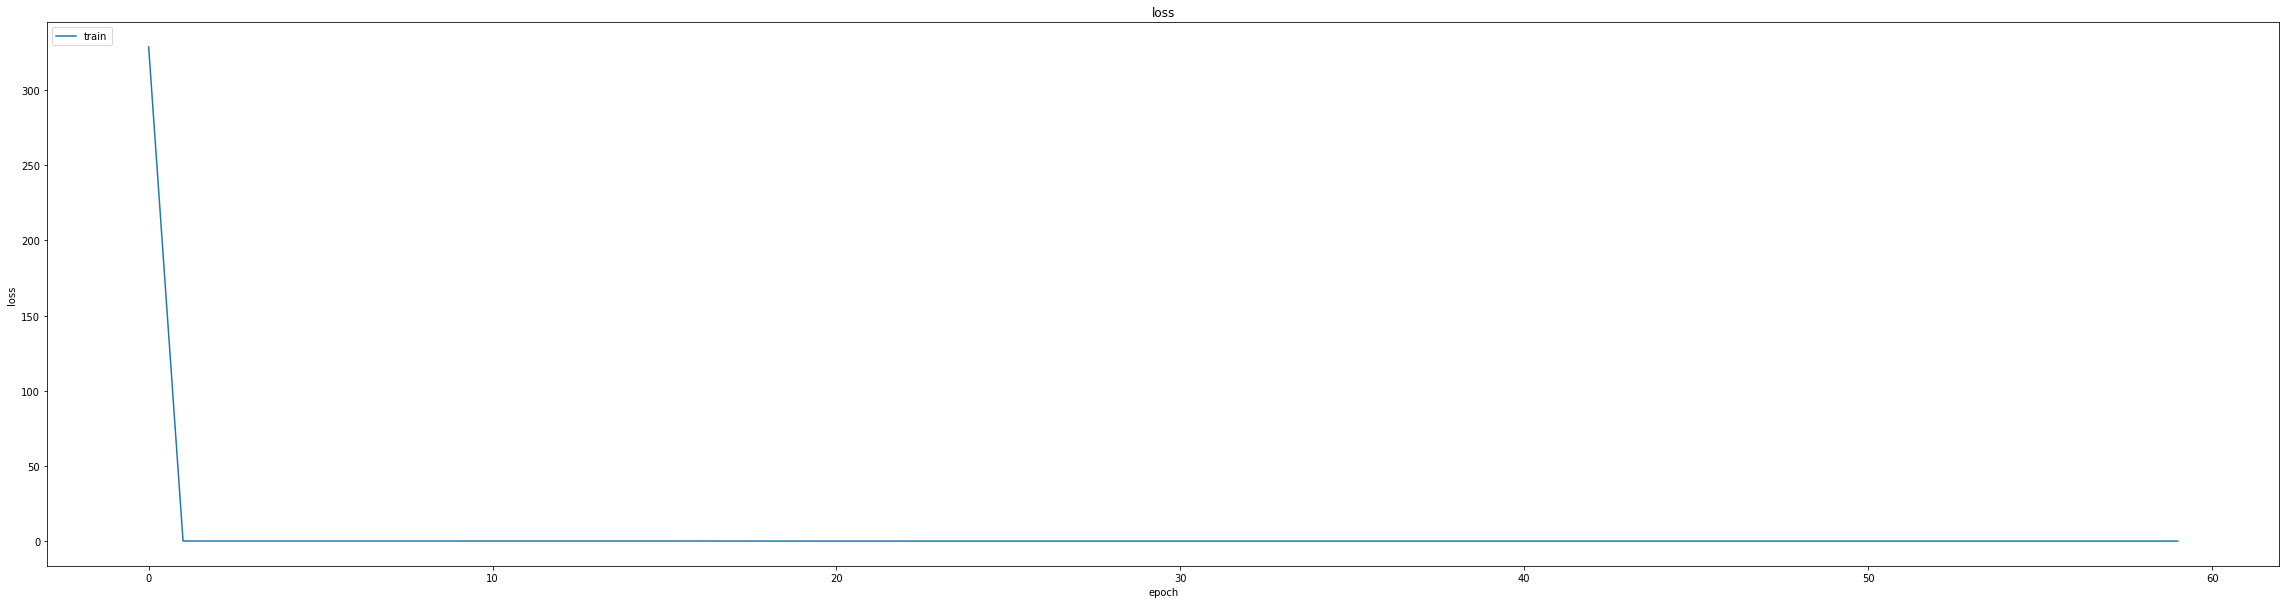

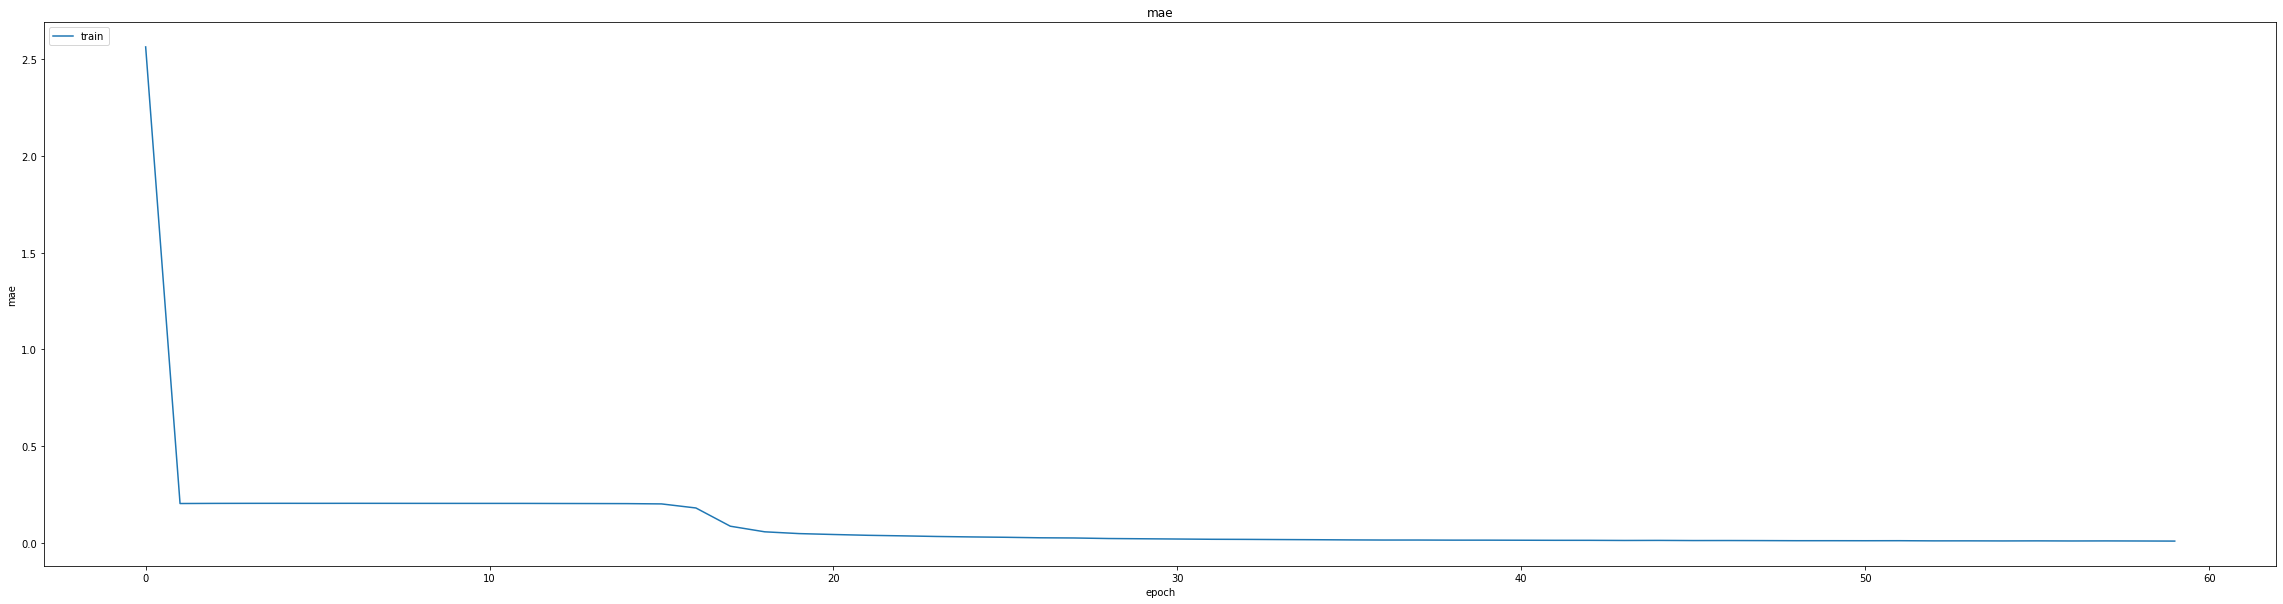

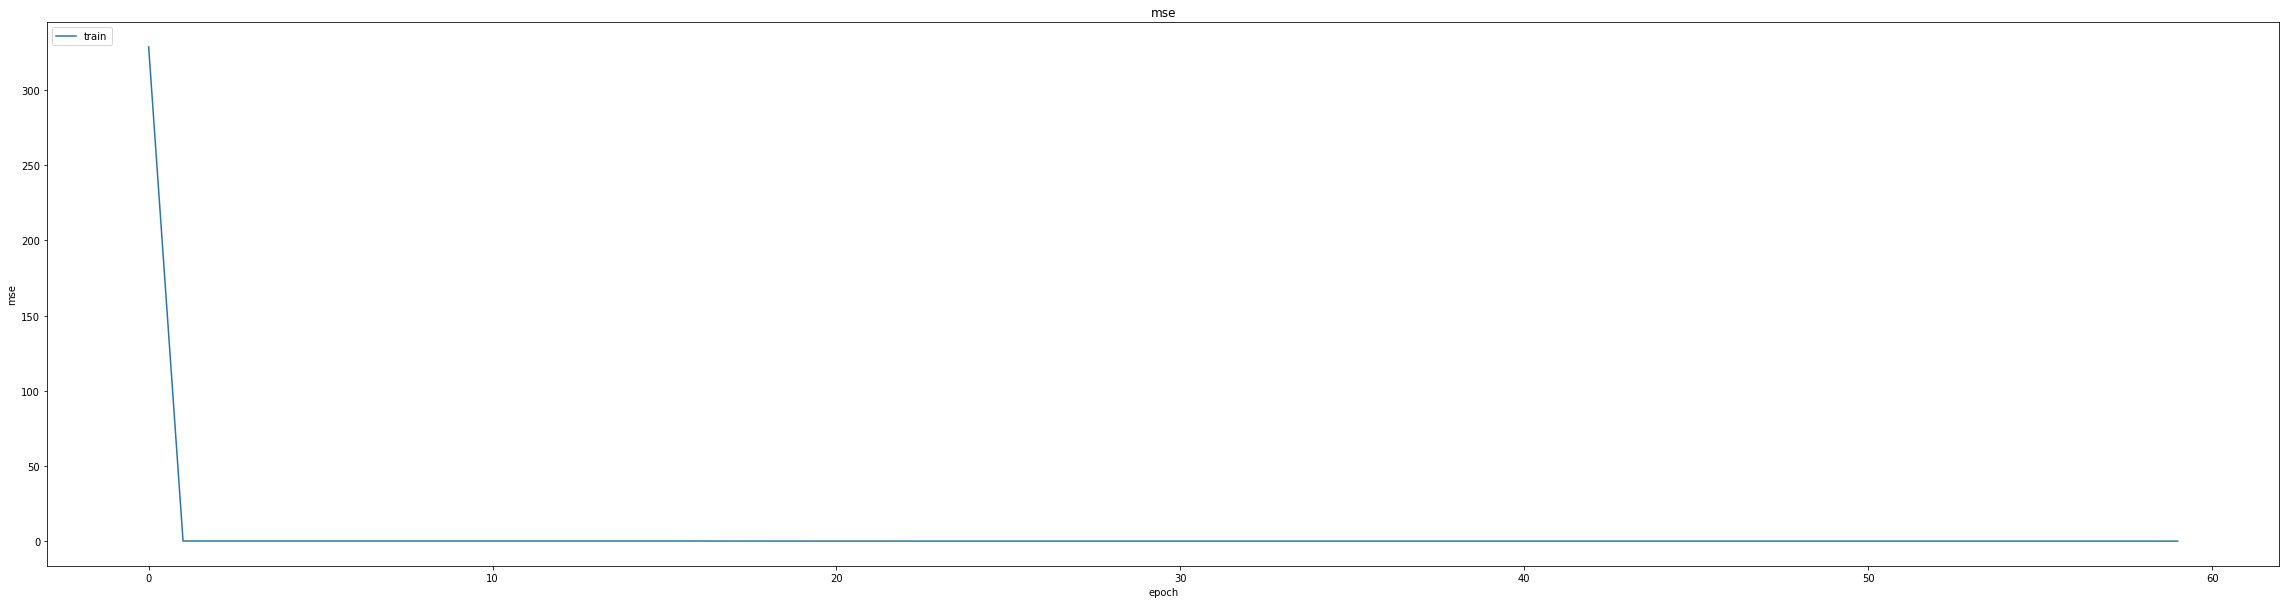

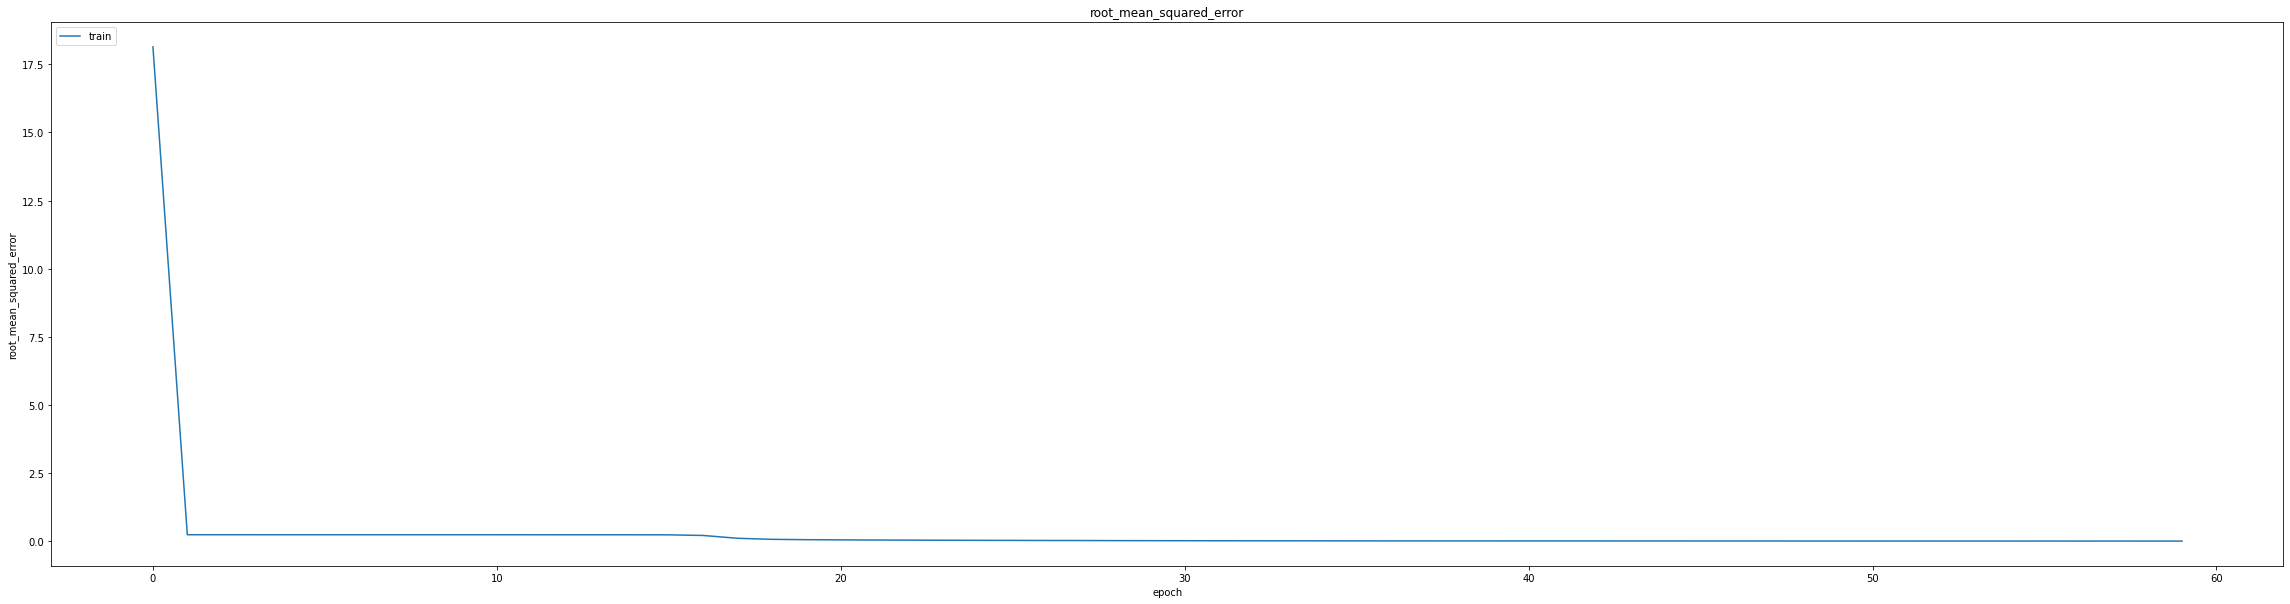

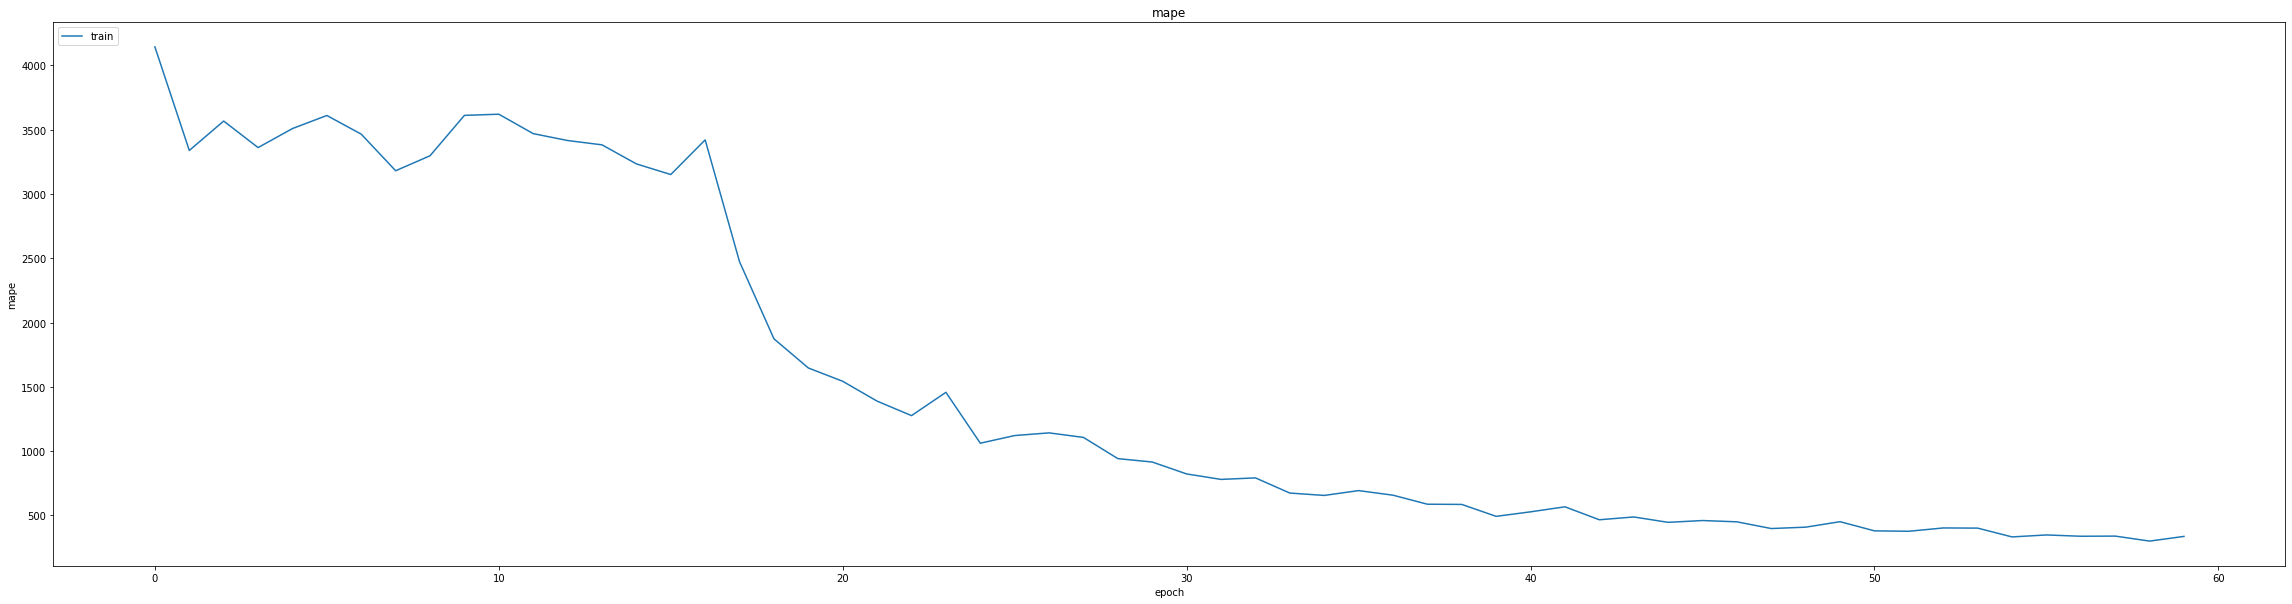

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.00760494964197278
0.010823575779795647
1390/1390 [==============================] - 6s 4ms/step
0.9973936219686727


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/CHF_USD_5min_GRU_LSTM(60-40)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)

history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/20
344/347 [============================>.] - ETA: 0s - loss: 0.0040 - mae: 0.0291 - mse: 0.0040 - root_mean_squared_error: 0.0636 - mape: 640.7192
Epoch 1: val_mse did not improve from 0.00012
347/347 [==============================] - 12s 21ms/step - loss: 0.0040 - mae: 0.0289 - mse: 0.0040 - root_mean_squared_error: 0.0634 - mape: 636.1230 - val_loss: 2.6622e-04 - val_mae: 0.0115 - val_mse: 2.6622e-04 - val_root_mean_squared_error: 0.0163 - val_mape: 1658.1581 - lr: 0.0010
Epoch 2/20
344/347 [============================>.] - ETA: 0s - loss: 2.1697e-04 - mae: 0.0112 - mse: 2.1697e-04 - root_mean_squared_error: 0.0147 - mape: 496.1232
Epoch 2: val_mse did not improve from 0.00012
347/347 [==============================] - 6s 18ms/step - loss: 2.1694e-04 - mae: 0.0112 - mse: 2.1694e-04 - root_mean_squared_error: 0.0147 - mape: 492.6277 - val_loss: 1.7948e-04 - val_mae: 0.0095 - val_mse: 1.7948e-04 - val_root_mean_squared_error: 0.0134 - val_mape: 1399.5751 - lr: 0.0010
lr chan

347/347 [==============================] - 17s 49ms/step - loss: 8.1733e-05 - mae: 0.0069 - mse: 8.1733e-05 - root_mean_squared_error: 0.0090 - mape: 278.8951 - val_loss: 1.0401e-04 - val_mae: 0.0081 - val_mse: 1.0401e-04 - val_root_mean_squared_error: 0.0102 - val_mape: 784.4833 - lr: 5.9049e-04
Epoch 12/20
347/347 [==============================] - ETA: 0s - loss: 8.8860e-05 - mae: 0.0072 - mse: 8.8860e-05 - root_mean_squared_error: 0.0094 - mape: 254.4203
Epoch 12: val_mse did not improve from 0.00010
347/347 [==============================] - 6s 18ms/step - loss: 8.8860e-05 - mae: 0.0072 - mse: 8.8860e-05 - root_mean_squared_error: 0.0094 - mape: 254.4203 - val_loss: 2.2603e-04 - val_mae: 0.0130 - val_mse: 2.2603e-04 - val_root_mean_squared_error: 0.0150 - val_mape: 774.0056 - lr: 5.9049e-04
lr changed to 0.0005314410547725857
Epoch 13/20
346/347 [============================>.] - ETA: 0s - loss: 6.7033e-05 - mae: 0.0062 - mse: 6.7033e-05 - root_mean_squared_error: 0.0082 - mape: 2

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.008139175362884998
0.010198677890002728
1390/1390 [==============================] - 6s 4ms/step
0.9902320722999717


1390/1390 [==============================] - 5s 4ms/step


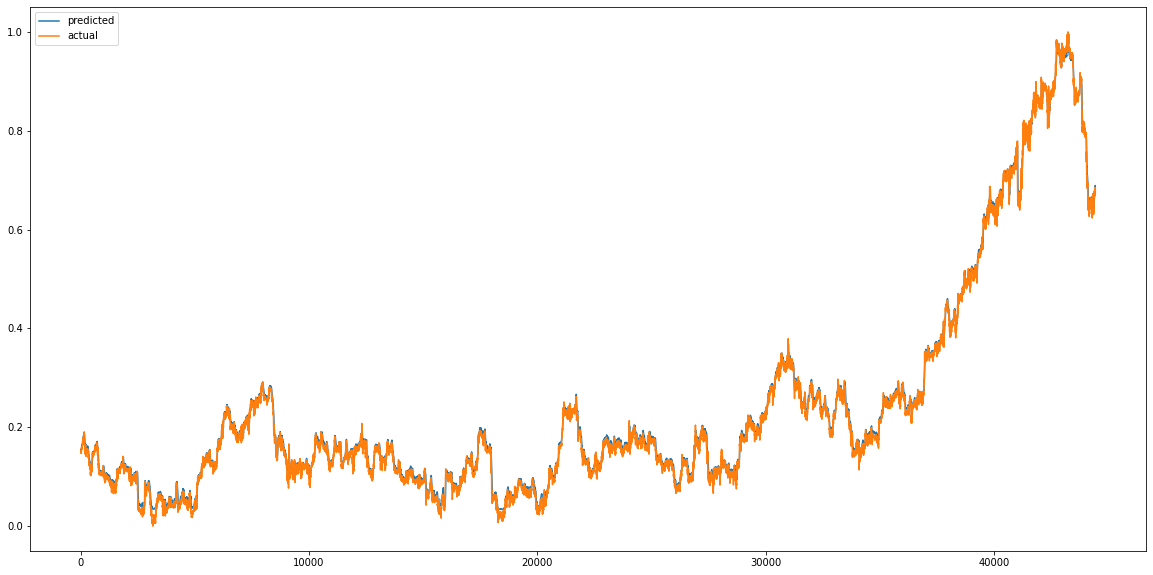

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/CHF_USD_5min_GRU_LSTM(60-40)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


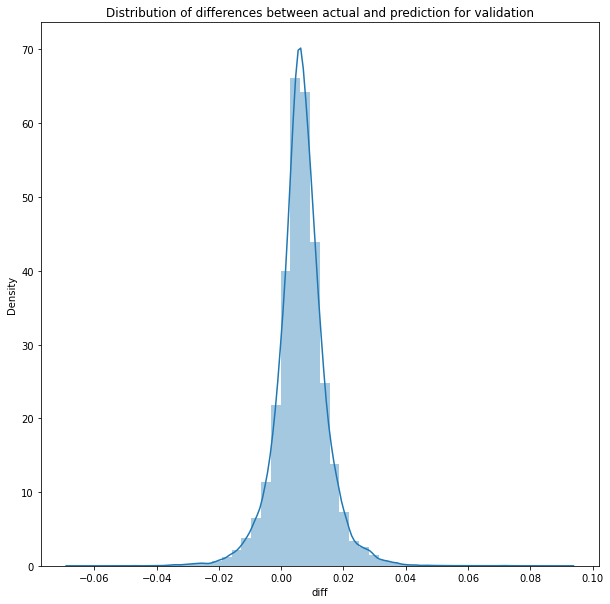

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

1390/1390 [==============================] - 6s 4ms/step


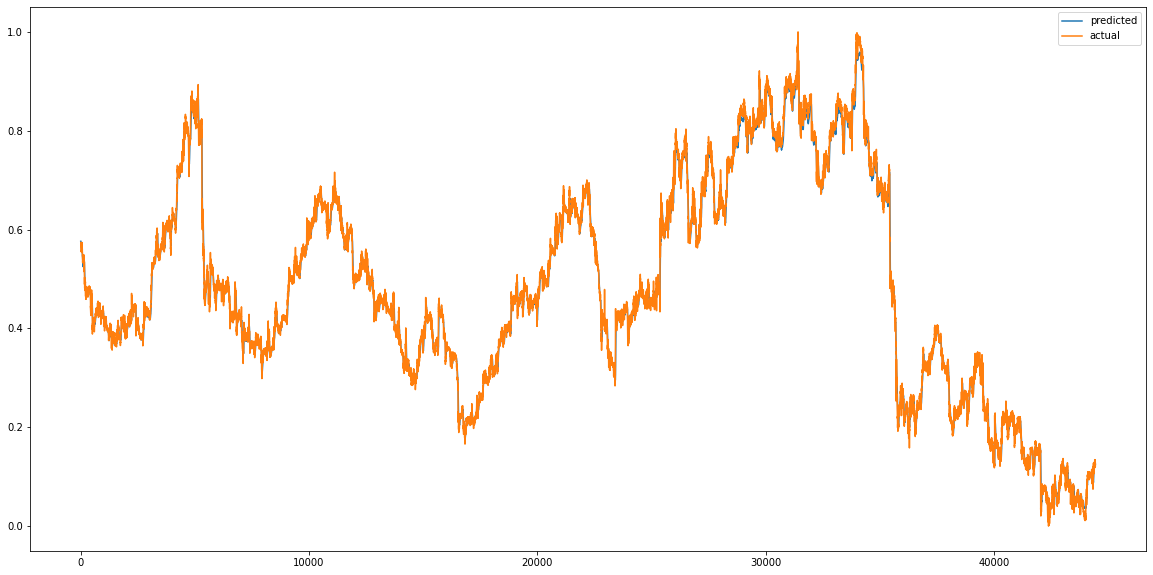

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


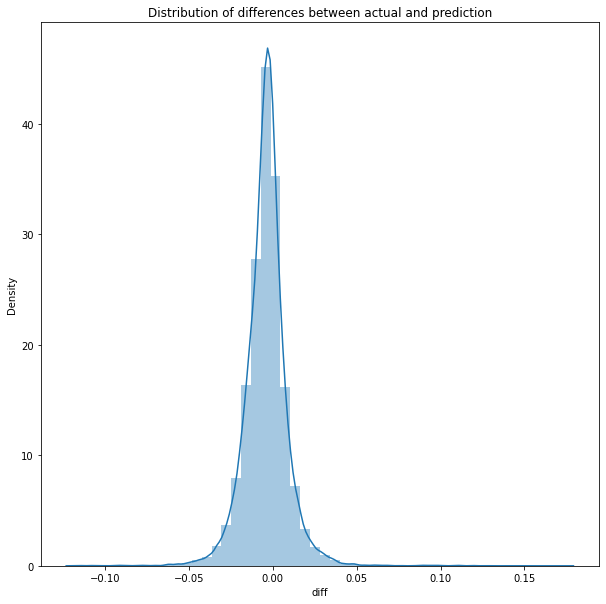

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', test_r2_score)
predictions['diff'].describe()

MSE :  0.00017930221594527734
RMSE :  0.013390377737214038
MAE :  0.009407571542930907
1390/1390 [==============================] - 6s 4ms/step
R2_Score  : 0.9962651780120539


count    44453.000000
mean        -0.003983
std          0.012784
min         -0.118596
25%         -0.010257
50%         -0.003652
75%          0.002087
max          0.174734
Name: diff, dtype: float64

**CNN_BiLSTM_MODEL**

In [ ]:
model= thesis.CNN_BiLSTM_Model(x_train)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 24, 64)            2368      
                                                                 
 bidirectional (Bidirectiona  (None, 24, 256)          197632    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 256)           0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              164352    
 nal)                                                            
                                                                 
 dense (Dense)               (None, 32)                4128      
                                                                 
 dense_1 (Dense)             (None, 16)                5

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_BiLSTM(60-40)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=60
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/60
347/347 [==============================] - ETA: 0s - loss: 541.5570 - mae: 4.0287 - mse: 541.5570 - root_mean_squared_error: 23.2714 - mape: 4558.5220
Epoch 1: val_mse improved from inf to 0.07776, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_BiLSTM(60-40)


347/347 [==============================] - 46s 95ms/step - loss: 541.5570 - mae: 4.0287 - mse: 541.5570 - root_mean_squared_error: 23.2714 - mape: 4558.5220 - val_loss: 0.0778 - val_mae: 0.2608 - val_mse: 0.0778 - val_root_mean_squared_error: 0.2789 - val_mape: 9327.6855
Epoch 2/60
346/347 [============================>.] - ETA: 0s - loss: 0.0574 - mae: 0.1931 - mse: 0.0574 - root_mean_squared_error: 0.2396 - mape: 3719.8882
Epoch 2: val_mse did not improve from 0.07776
347/347 [==============================] - 7s 20ms/step - loss: 0.0574 - mae: 0.1931 - mse: 0.0574 - root_mean_squared_error: 0.2395 - mape: 3714.6057 - val_loss: 0.0784 - val_mae: 0.2653 - val_mse: 0.0784 - val_root_mean_squared_error: 0.2800 - val_mape: 9241.2979
Epoch 3/60
346/347 [============================>.] - ETA: 0s - loss: 0.0423 - mae: 0.1685 - mse: 0.0423 - root_mean_squared_error: 0.2057 - mape: 3404.3762
Epoch 3: val_mse improved from 0.07776 to 0.05730, saving model to /content/drive/MyDrive/modelweights

347/347 [==============================] - 30s 86ms/step - loss: 0.0423 - mae: 0.1685 - mse: 0.0423 - root_mean_squared_error: 0.2056 - mape: 3399.5054 - val_loss: 0.0573 - val_mae: 0.2249 - val_mse: 0.0573 - val_root_mean_squared_error: 0.2394 - val_mape: 8072.1729
Epoch 4/60
345/347 [============================>.] - ETA: 0s - loss: 0.0285 - mae: 0.1345 - mse: 0.0285 - root_mean_squared_error: 0.1688 - mape: 3334.8899
Epoch 4: val_mse improved from 0.05730 to 0.04370, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_BiLSTM(60-40)


347/347 [==============================] - 29s 85ms/step - loss: 0.0285 - mae: 0.1344 - mse: 0.0285 - root_mean_squared_error: 0.1688 - mape: 3320.6541 - val_loss: 0.0437 - val_mae: 0.1941 - val_mse: 0.0437 - val_root_mean_squared_error: 0.2090 - val_mape: 7357.9795
Epoch 5/60
345/347 [============================>.] - ETA: 0s - loss: 0.0199 - mae: 0.1114 - mse: 0.0199 - root_mean_squared_error: 0.1410 - mape: 2644.6919
Epoch 5: val_mse improved from 0.04370 to 0.02866, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_BiLSTM(60-40)


347/347 [==============================] - 29s 85ms/step - loss: 0.0199 - mae: 0.1112 - mse: 0.0199 - root_mean_squared_error: 0.1409 - mape: 2633.3955 - val_loss: 0.0287 - val_mae: 0.1541 - val_mse: 0.0287 - val_root_mean_squared_error: 0.1693 - val_mape: 6660.0415
Epoch 6/60
344/347 [============================>.] - ETA: 0s - loss: 0.0084 - mae: 0.0689 - mse: 0.0084 - root_mean_squared_error: 0.0916 - mape: 2243.2163
Epoch 6: val_mse improved from 0.02866 to 0.01573, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_BiLSTM(60-40)


347/347 [==============================] - 30s 88ms/step - loss: 0.0084 - mae: 0.0688 - mse: 0.0084 - root_mean_squared_error: 0.0915 - mape: 2227.2385 - val_loss: 0.0157 - val_mae: 0.1114 - val_mse: 0.0157 - val_root_mean_squared_error: 0.1254 - val_mape: 5589.3003
Epoch 7/60
346/347 [============================>.] - ETA: 0s - loss: 0.0051 - mae: 0.0544 - mse: 0.0051 - root_mean_squared_error: 0.0717 - mape: 2114.5437
Epoch 7: val_mse improved from 0.01573 to 0.01017, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_BiLSTM(60-40)


347/347 [==============================] - 30s 87ms/step - loss: 0.0051 - mae: 0.0544 - mse: 0.0051 - root_mean_squared_error: 0.0716 - mape: 2111.5083 - val_loss: 0.0102 - val_mae: 0.0886 - val_mse: 0.0102 - val_root_mean_squared_error: 0.1008 - val_mape: 4837.1348
Epoch 8/60
344/347 [============================>.] - ETA: 0s - loss: 0.0039 - mae: 0.0476 - mse: 0.0039 - root_mean_squared_error: 0.0621 - mape: 1713.6097
Epoch 8: val_mse improved from 0.01017 to 0.00738, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_BiLSTM(60-40)


347/347 [==============================] - 29s 84ms/step - loss: 0.0039 - mae: 0.0475 - mse: 0.0039 - root_mean_squared_error: 0.0621 - mape: 1701.3689 - val_loss: 0.0074 - val_mae: 0.0753 - val_mse: 0.0074 - val_root_mean_squared_error: 0.0859 - val_mape: 4308.7529
Epoch 9/60
345/347 [============================>.] - ETA: 0s - loss: 0.0031 - mae: 0.0428 - mse: 0.0031 - root_mean_squared_error: 0.0557 - mape: 1640.4541
Epoch 9: val_mse improved from 0.00738 to 0.00592, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_BiLSTM(60-40)


347/347 [==============================] - 29s 85ms/step - loss: 0.0031 - mae: 0.0428 - mse: 0.0031 - root_mean_squared_error: 0.0557 - mape: 1633.3997 - val_loss: 0.0059 - val_mae: 0.0676 - val_mse: 0.0059 - val_root_mean_squared_error: 0.0769 - val_mape: 3931.3694
Epoch 10/60
344/347 [============================>.] - ETA: 0s - loss: 0.0026 - mae: 0.0392 - mse: 0.0026 - root_mean_squared_error: 0.0510 - mape: 1454.2206
Epoch 10: val_mse improved from 0.00592 to 0.00507, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_BiLSTM(60-40)


347/347 [==============================] - 29s 84ms/step - loss: 0.0026 - mae: 0.0392 - mse: 0.0026 - root_mean_squared_error: 0.0510 - mape: 1443.8159 - val_loss: 0.0051 - val_mae: 0.0633 - val_mse: 0.0051 - val_root_mean_squared_error: 0.0712 - val_mape: 3645.4119
Epoch 11/60
346/347 [============================>.] - ETA: 0s - loss: 0.0022 - mae: 0.0363 - mse: 0.0022 - root_mean_squared_error: 0.0472 - mape: 1387.9545
Epoch 11: val_mse improved from 0.00507 to 0.00460, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_BiLSTM(60-40)


347/347 [==============================] - 30s 86ms/step - loss: 0.0022 - mae: 0.0363 - mse: 0.0022 - root_mean_squared_error: 0.0472 - mape: 1385.9586 - val_loss: 0.0046 - val_mae: 0.0612 - val_mse: 0.0046 - val_root_mean_squared_error: 0.0678 - val_mape: 3397.4736
Epoch 12/60
347/347 [==============================] - ETA: 0s - loss: 0.0019 - mae: 0.0337 - mse: 0.0019 - root_mean_squared_error: 0.0439 - mape: 1257.9919
Epoch 12: val_mse improved from 0.00460 to 0.00432, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_BiLSTM(60-40)


347/347 [==============================] - 31s 89ms/step - loss: 0.0019 - mae: 0.0337 - mse: 0.0019 - root_mean_squared_error: 0.0439 - mape: 1257.9919 - val_loss: 0.0043 - val_mae: 0.0601 - val_mse: 0.0043 - val_root_mean_squared_error: 0.0657 - val_mape: 3207.1111
Epoch 13/60
344/347 [============================>.] - ETA: 0s - loss: 0.0017 - mae: 0.0318 - mse: 0.0017 - root_mean_squared_error: 0.0415 - mape: 1105.8070
Epoch 13: val_mse improved from 0.00432 to 0.00431, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_BiLSTM(60-40)


347/347 [==============================] - 29s 84ms/step - loss: 0.0017 - mae: 0.0318 - mse: 0.0017 - root_mean_squared_error: 0.0414 - mape: 1097.8931 - val_loss: 0.0043 - val_mae: 0.0608 - val_mse: 0.0043 - val_root_mean_squared_error: 0.0657 - val_mape: 3035.3611
Epoch 14/60
345/347 [============================>.] - ETA: 0s - loss: 0.0015 - mae: 0.0298 - mse: 0.0015 - root_mean_squared_error: 0.0389 - mape: 1175.4915
Epoch 14: val_mse improved from 0.00431 to 0.00378, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_BiLSTM(60-40)


347/347 [==============================] - 29s 83ms/step - loss: 0.0015 - mae: 0.0298 - mse: 0.0015 - root_mean_squared_error: 0.0389 - mape: 1170.4706 - val_loss: 0.0038 - val_mae: 0.0570 - val_mse: 0.0038 - val_root_mean_squared_error: 0.0615 - val_mape: 2891.4805
Epoch 15/60
345/347 [============================>.] - ETA: 0s - loss: 0.0013 - mae: 0.0280 - mse: 0.0013 - root_mean_squared_error: 0.0366 - mape: 1064.2847
Epoch 15: val_mse improved from 0.00378 to 0.00351, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_BiLSTM(60-40)


347/347 [==============================] - 29s 84ms/step - loss: 0.0013 - mae: 0.0279 - mse: 0.0013 - root_mean_squared_error: 0.0366 - mape: 1059.7169 - val_loss: 0.0035 - val_mae: 0.0548 - val_mse: 0.0035 - val_root_mean_squared_error: 0.0593 - val_mape: 2759.0291
Epoch 16/60
345/347 [============================>.] - ETA: 0s - loss: 0.0012 - mae: 0.0262 - mse: 0.0012 - root_mean_squared_error: 0.0346 - mape: 1181.1848
Epoch 16: val_mse improved from 0.00351 to 0.00351, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_BiLSTM(60-40)


347/347 [==============================] - 29s 83ms/step - loss: 0.0012 - mae: 0.0262 - mse: 0.0012 - root_mean_squared_error: 0.0346 - mape: 1176.0950 - val_loss: 0.0035 - val_mae: 0.0554 - val_mse: 0.0035 - val_root_mean_squared_error: 0.0592 - val_mape: 2636.5938
Epoch 17/60
347/347 [==============================] - ETA: 0s - loss: 0.0011 - mae: 0.0248 - mse: 0.0011 - root_mean_squared_error: 0.0327 - mape: 952.7546
Epoch 17: val_mse improved from 0.00351 to 0.00314, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_BiLSTM(60-40)


347/347 [==============================] - 29s 84ms/step - loss: 0.0011 - mae: 0.0248 - mse: 0.0011 - root_mean_squared_error: 0.0327 - mape: 952.7546 - val_loss: 0.0031 - val_mae: 0.0526 - val_mse: 0.0031 - val_root_mean_squared_error: 0.0560 - val_mape: 2515.1436
Epoch 18/60
346/347 [============================>.] - ETA: 0s - loss: 9.5881e-04 - mae: 0.0234 - mse: 9.5881e-04 - root_mean_squared_error: 0.0310 - mape: 1027.6658
Epoch 18: val_mse did not improve from 0.00314
347/347 [==============================] - 7s 20ms/step - loss: 9.5851e-04 - mae: 0.0234 - mse: 9.5851e-04 - root_mean_squared_error: 0.0310 - mape: 1026.1855 - val_loss: 0.0036 - val_mae: 0.0572 - val_mse: 0.0036 - val_root_mean_squared_error: 0.0600 - val_mape: 2405.1196
Epoch 19/60
346/347 [============================>.] - ETA: 0s - loss: 8.6363e-04 - mae: 0.0221 - mse: 8.6363e-04 - root_mean_squared_error: 0.0294 - mape: 960.2351
Epoch 19: val_mse did not improve from 0.00314
347/347 [==========================

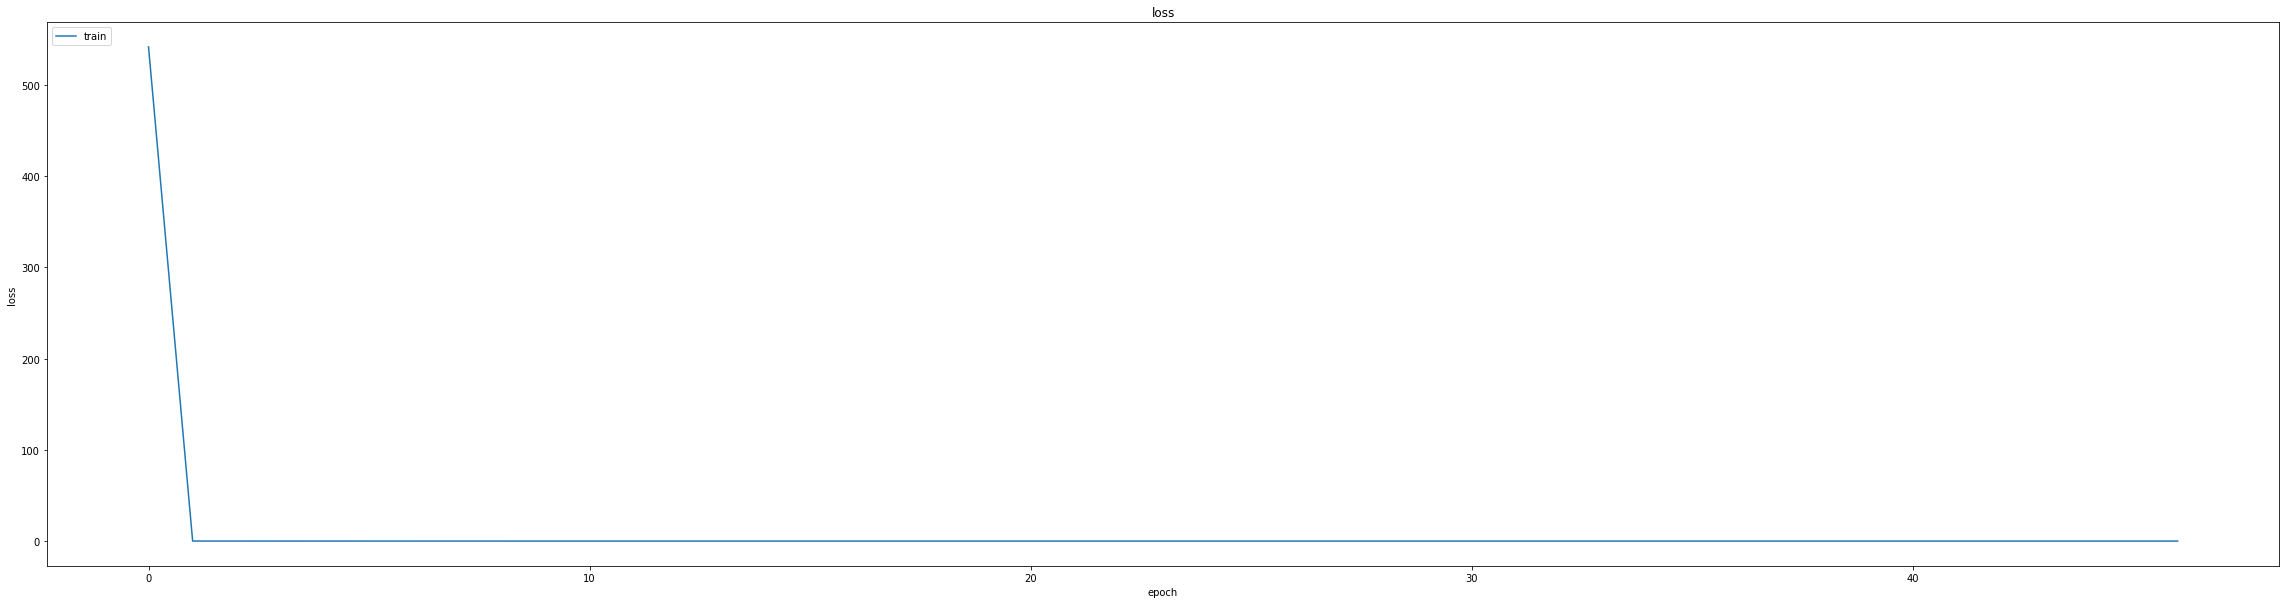

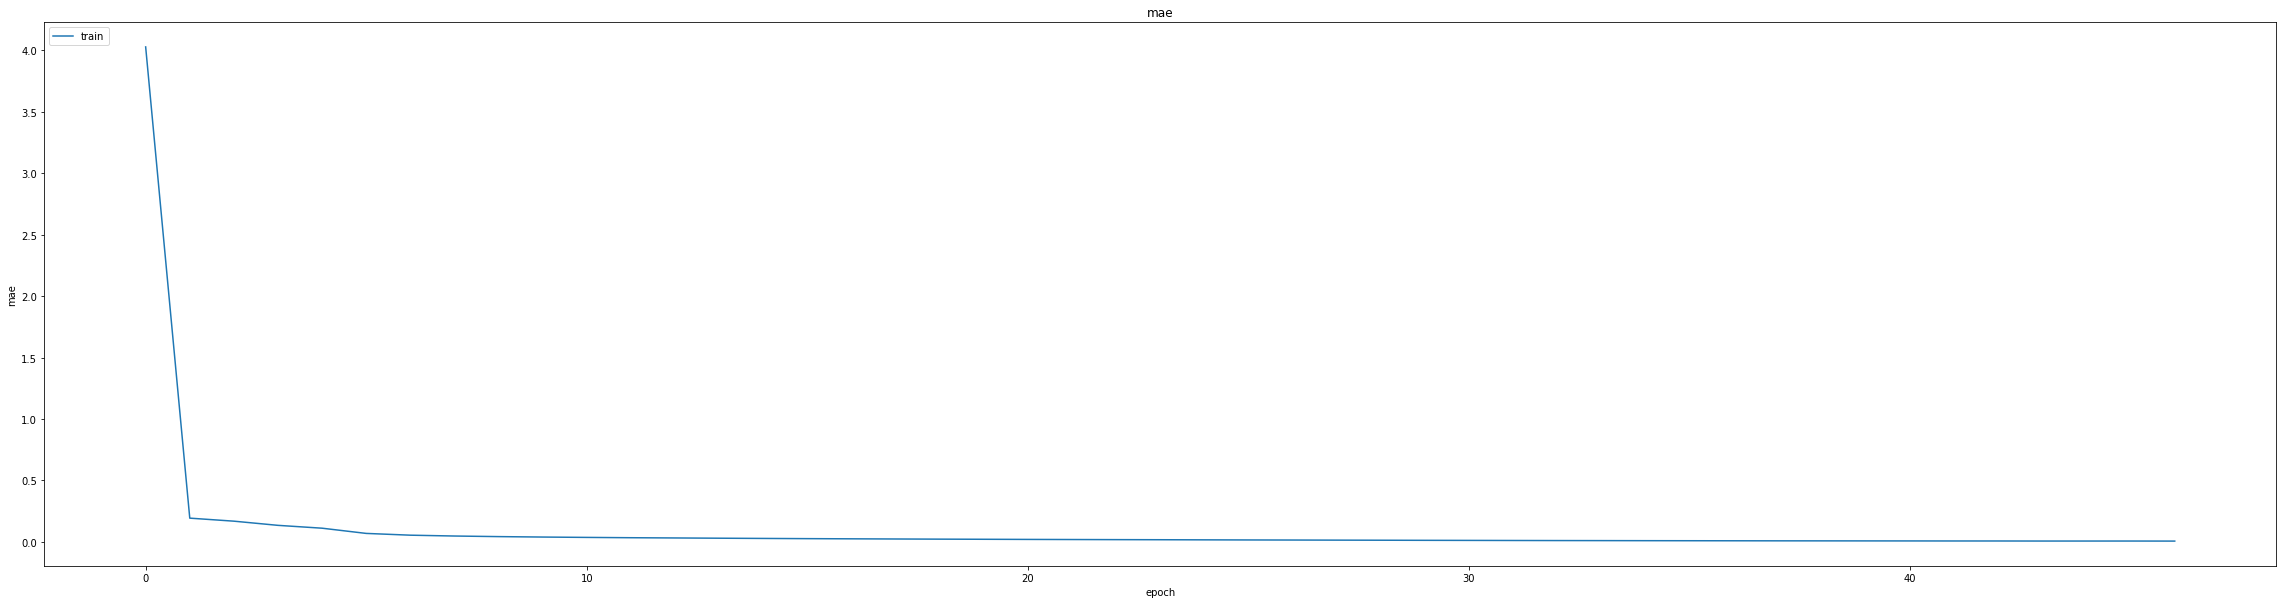

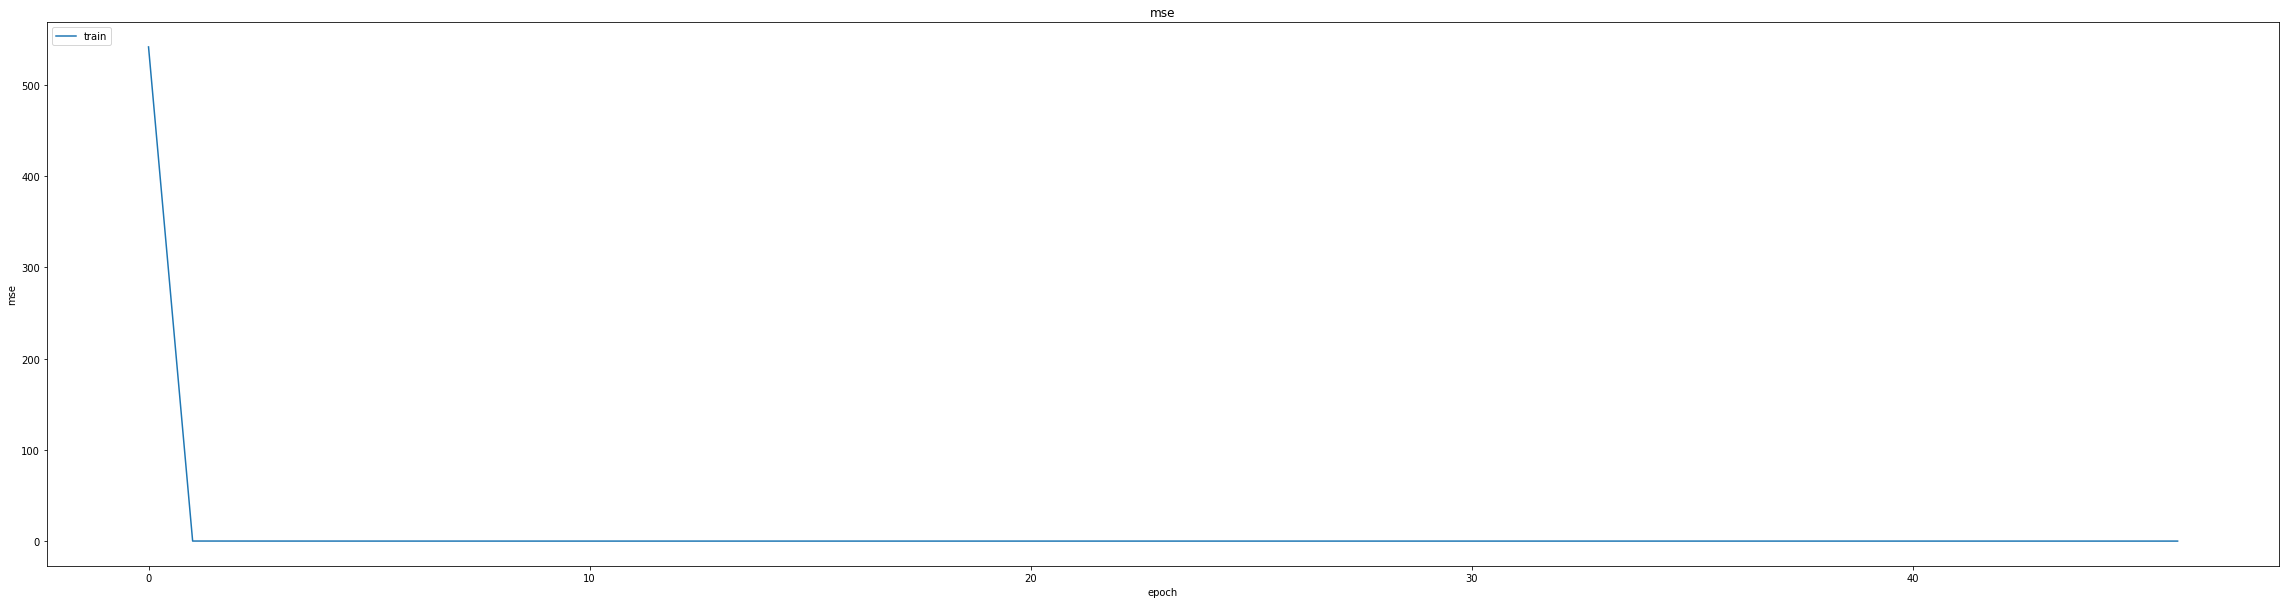

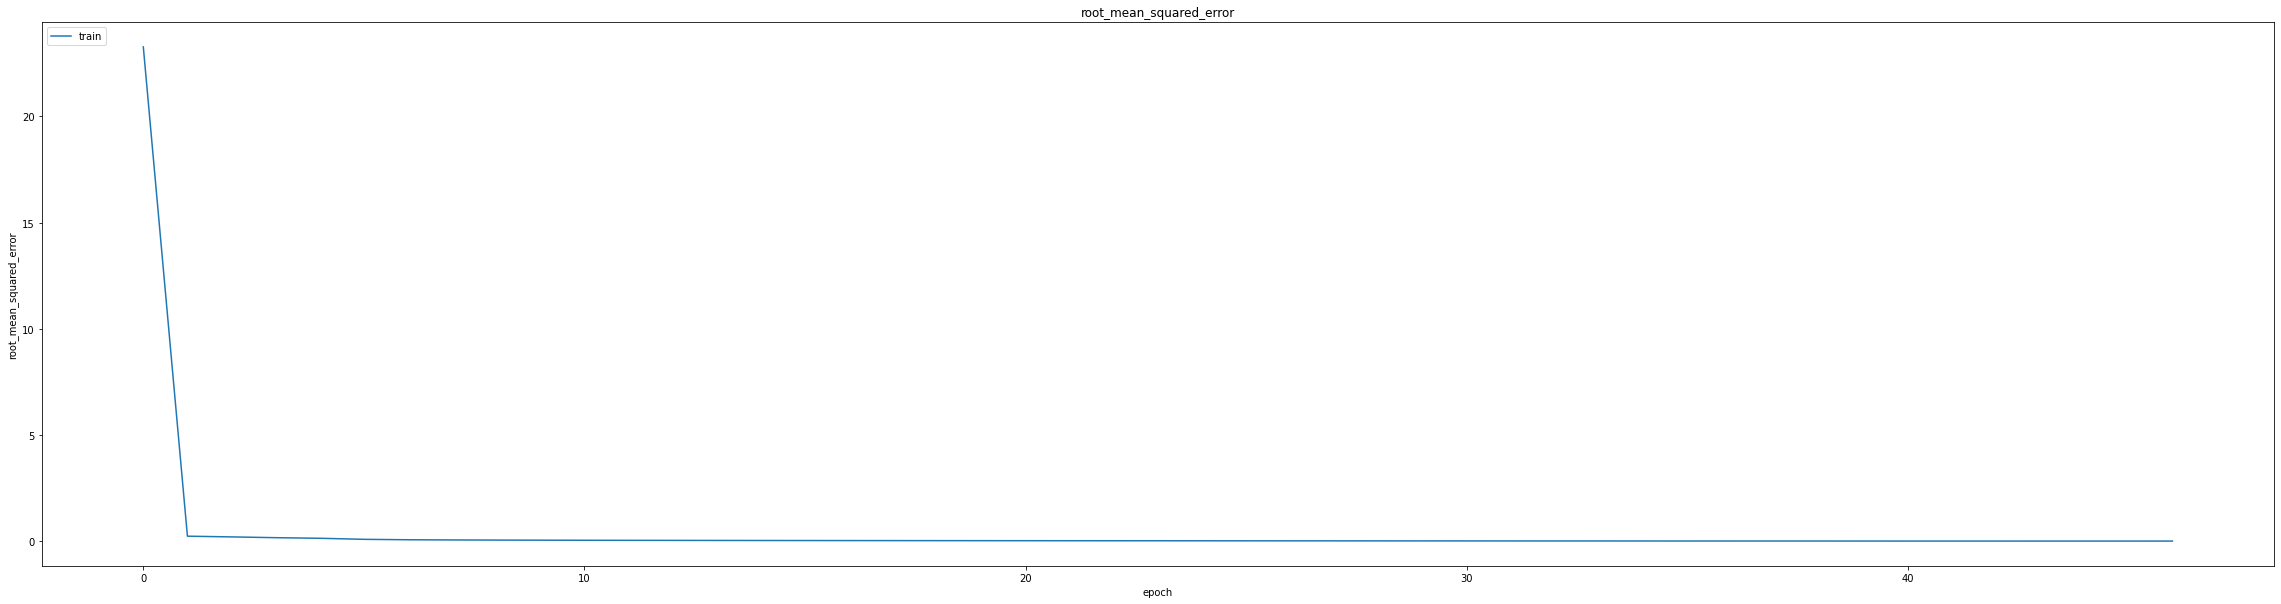

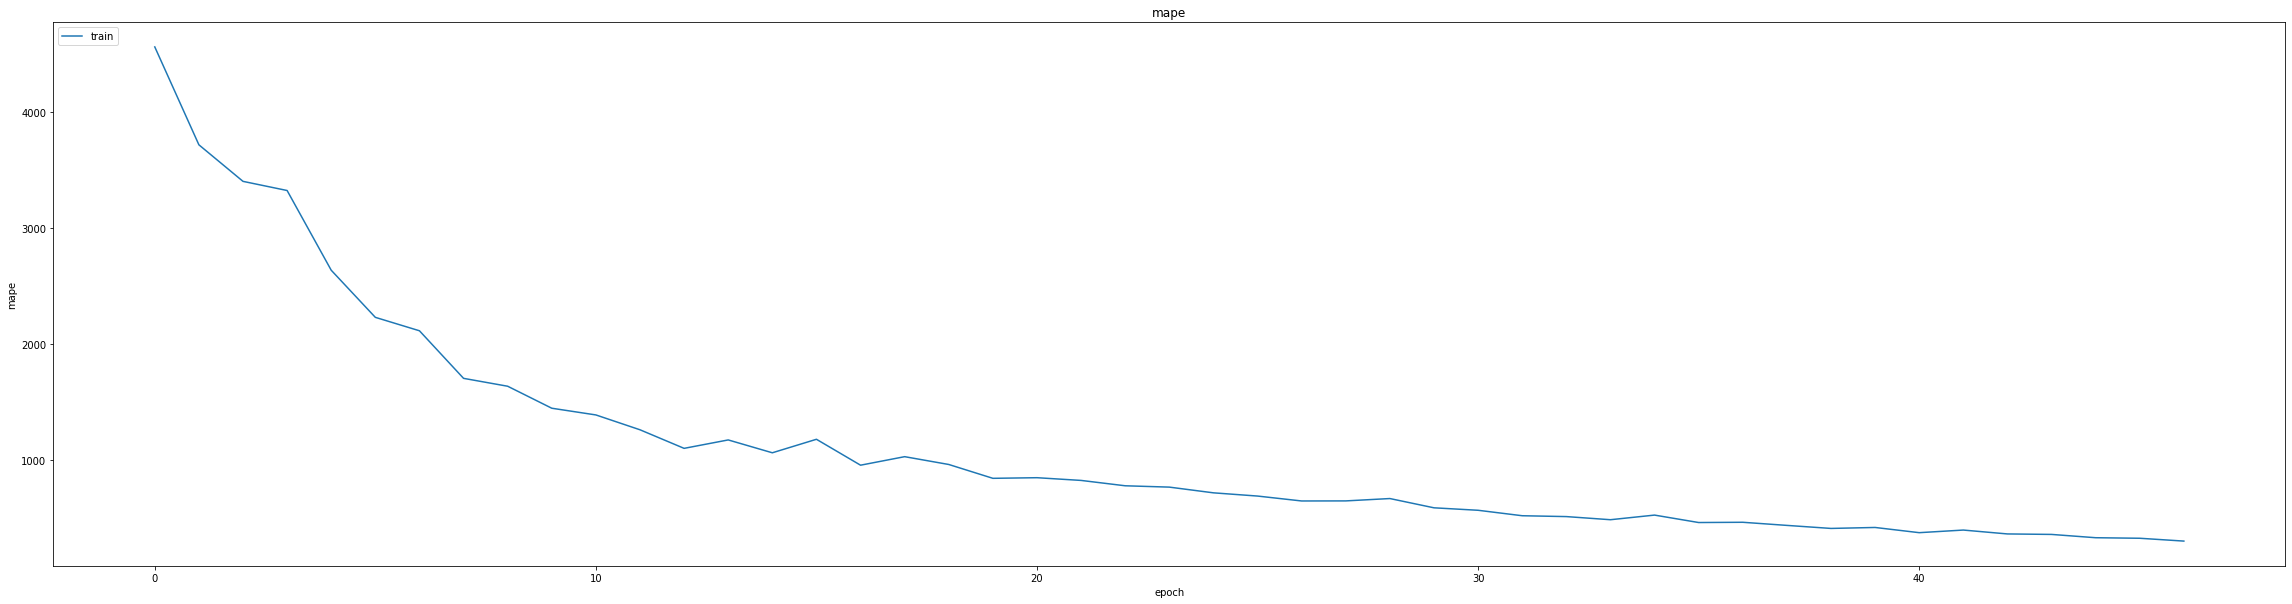

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.05262826383113861
0.05603228509426117
1390/1390 [==============================] - 8s 5ms/step
0.9272517879411671


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_BiLSTM(60-40)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)

history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/20
345/347 [============================>.] - ETA: 0s - loss: 0.0046 - mae: 0.0330 - mse: 0.0046 - root_mean_squared_error: 0.0678 - mape: 719.6647
Epoch 1: val_mse improved from 0.00314 to 0.00260, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_BiLSTM(60-40)


347/347 [==============================] - 37s 92ms/step - loss: 0.0046 - mae: 0.0329 - mse: 0.0046 - root_mean_squared_error: 0.0677 - mape: 716.5660 - val_loss: 0.0026 - val_mae: 0.0494 - val_mse: 0.0026 - val_root_mean_squared_error: 0.0510 - val_mape: 1812.0104 - lr: 0.0010
Epoch 2/20
346/347 [============================>.] - ETA: 0s - loss: 2.5682e-04 - mae: 0.0120 - mse: 2.5682e-04 - root_mean_squared_error: 0.0160 - mape: 506.1805
Epoch 2: val_mse improved from 0.00260 to 0.00240, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_BiLSTM(60-40)


347/347 [==============================] - 29s 84ms/step - loss: 2.5672e-04 - mae: 0.0120 - mse: 2.5672e-04 - root_mean_squared_error: 0.0160 - mape: 505.4491 - val_loss: 0.0024 - val_mae: 0.0475 - val_mse: 0.0024 - val_root_mean_squared_error: 0.0490 - val_mape: 1478.0127 - lr: 0.0010
lr changed to 0.0009000000427477062
Epoch 3/20
344/347 [============================>.] - ETA: 0s - loss: 1.4391e-04 - mae: 0.0092 - mse: 1.4391e-04 - root_mean_squared_error: 0.0120 - mape: 556.6878
Epoch 3: val_mse improved from 0.00240 to 0.00214, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_BiLSTM(60-40)


347/347 [==============================] - 30s 87ms/step - loss: 1.4370e-04 - mae: 0.0092 - mse: 1.4370e-04 - root_mean_squared_error: 0.0120 - mape: 552.6838 - val_loss: 0.0021 - val_mae: 0.0451 - val_mse: 0.0021 - val_root_mean_squared_error: 0.0463 - val_mape: 1375.5493 - lr: 9.0000e-04
Epoch 4/20
347/347 [==============================] - ETA: 0s - loss: 9.7123e-05 - mae: 0.0076 - mse: 9.7123e-05 - root_mean_squared_error: 0.0099 - mape: 422.0692
Epoch 4: val_mse improved from 0.00214 to 0.00191, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_BiLSTM(60-40)


347/347 [==============================] - 29s 84ms/step - loss: 9.7123e-05 - mae: 0.0076 - mse: 9.7123e-05 - root_mean_squared_error: 0.0099 - mape: 422.0692 - val_loss: 0.0019 - val_mae: 0.0429 - val_mse: 0.0019 - val_root_mean_squared_error: 0.0437 - val_mape: 1234.3578 - lr: 9.0000e-04
lr changed to 0.0008100000384729356
Epoch 5/20
346/347 [============================>.] - ETA: 0s - loss: 6.8507e-05 - mae: 0.0064 - mse: 6.8507e-05 - root_mean_squared_error: 0.0083 - mape: 340.9356
Epoch 5: val_mse improved from 0.00191 to 0.00168, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_BiLSTM(60-40)


347/347 [==============================] - 29s 84ms/step - loss: 6.8485e-05 - mae: 0.0064 - mse: 6.8485e-05 - root_mean_squared_error: 0.0083 - mape: 340.4425 - val_loss: 0.0017 - val_mae: 0.0397 - val_mse: 0.0017 - val_root_mean_squared_error: 0.0410 - val_mape: 1074.8240 - lr: 8.1000e-04
Epoch 6/20
345/347 [============================>.] - ETA: 0s - loss: 6.0414e-05 - mae: 0.0060 - mse: 6.0414e-05 - root_mean_squared_error: 0.0078 - mape: 326.3260
Epoch 6: val_mse improved from 0.00168 to 0.00150, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_BiLSTM(60-40)


347/347 [==============================] - 29s 84ms/step - loss: 6.0357e-05 - mae: 0.0060 - mse: 6.0357e-05 - root_mean_squared_error: 0.0078 - mape: 324.9168 - val_loss: 0.0015 - val_mae: 0.0377 - val_mse: 0.0015 - val_root_mean_squared_error: 0.0387 - val_mape: 1056.6394 - lr: 8.1000e-04
lr changed to 0.0007290000503417104
Epoch 7/20
344/347 [============================>.] - ETA: 0s - loss: 4.8805e-05 - mae: 0.0054 - mse: 4.8805e-05 - root_mean_squared_error: 0.0070 - mape: 306.4983
Epoch 7: val_mse did not improve from 0.00150
347/347 [==============================] - 7s 20ms/step - loss: 4.8866e-05 - mae: 0.0054 - mse: 4.8866e-05 - root_mean_squared_error: 0.0070 - mape: 304.3080 - val_loss: 0.0018 - val_mae: 0.0414 - val_mse: 0.0018 - val_root_mean_squared_error: 0.0426 - val_mape: 1048.1173 - lr: 7.2900e-04
Epoch 8/20
347/347 [==============================] - ETA: 0s - loss: 5.0666e-05 - mae: 0.0055 - mse: 5.0666e-05 - root_mean_squared_error: 0.0071 - mape: 286.9757
Epoch 8: 

347/347 [==============================] - 29s 83ms/step - loss: 4.5437e-05 - mae: 0.0052 - mse: 4.5437e-05 - root_mean_squared_error: 0.0067 - mape: 276.0503 - val_loss: 0.0011 - val_mae: 0.0331 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0339 - val_mape: 1017.2095 - lr: 6.5610e-04
Epoch 10/20
345/347 [============================>.] - ETA: 0s - loss: 4.1440e-05 - mae: 0.0049 - mse: 4.1440e-05 - root_mean_squared_error: 0.0064 - mape: 259.4784
Epoch 10: val_mse did not improve from 0.00115
347/347 [==============================] - 7s 21ms/step - loss: 4.1456e-05 - mae: 0.0049 - mse: 4.1456e-05 - root_mean_squared_error: 0.0064 - mape: 258.3594 - val_loss: 0.0015 - val_mae: 0.0377 - val_mse: 0.0015 - val_root_mean_squared_error: 0.0387 - val_mape: 1020.6414 - lr: 6.5610e-04
lr changed to 0.0005904900433961303
Epoch 11/20
346/347 [============================>.] - ETA: 0s - loss: 3.4248e-05 - mae: 0.0045 - mse: 3.4248e-05 - root_mean_squared_error: 0.0059 - mape: 260.5147
Epoch 

347/347 [==============================] - 29s 82ms/step - loss: 3.0073e-05 - mae: 0.0042 - mse: 3.0073e-05 - root_mean_squared_error: 0.0055 - mape: 223.9143 - val_loss: 0.0011 - val_mae: 0.0330 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0339 - val_mape: 885.5187 - lr: 4.3047e-04
lr changed to 0.00038742052274756136
Epoch 19/20
346/347 [============================>.] - ETA: 0s - loss: 2.6582e-05 - mae: 0.0039 - mse: 2.6582e-05 - root_mean_squared_error: 0.0052 - mape: 206.5496
Epoch 19: val_mse did not improve from 0.00115
347/347 [==============================] - 7s 20ms/step - loss: 2.6570e-05 - mae: 0.0039 - mse: 2.6570e-05 - root_mean_squared_error: 0.0052 - mape: 206.2507 - val_loss: 0.0015 - val_mae: 0.0373 - val_mse: 0.0015 - val_root_mean_squared_error: 0.0382 - val_mape: 878.0136 - lr: 3.8742e-04
Epoch 20/20
345/347 [============================>.] - ETA: 0s - loss: 2.6107e-05 - mae: 0.0039 - mse: 2.6107e-05 - root_mean_squared_error: 0.0051 - mape: 210.6958
Epoch 2

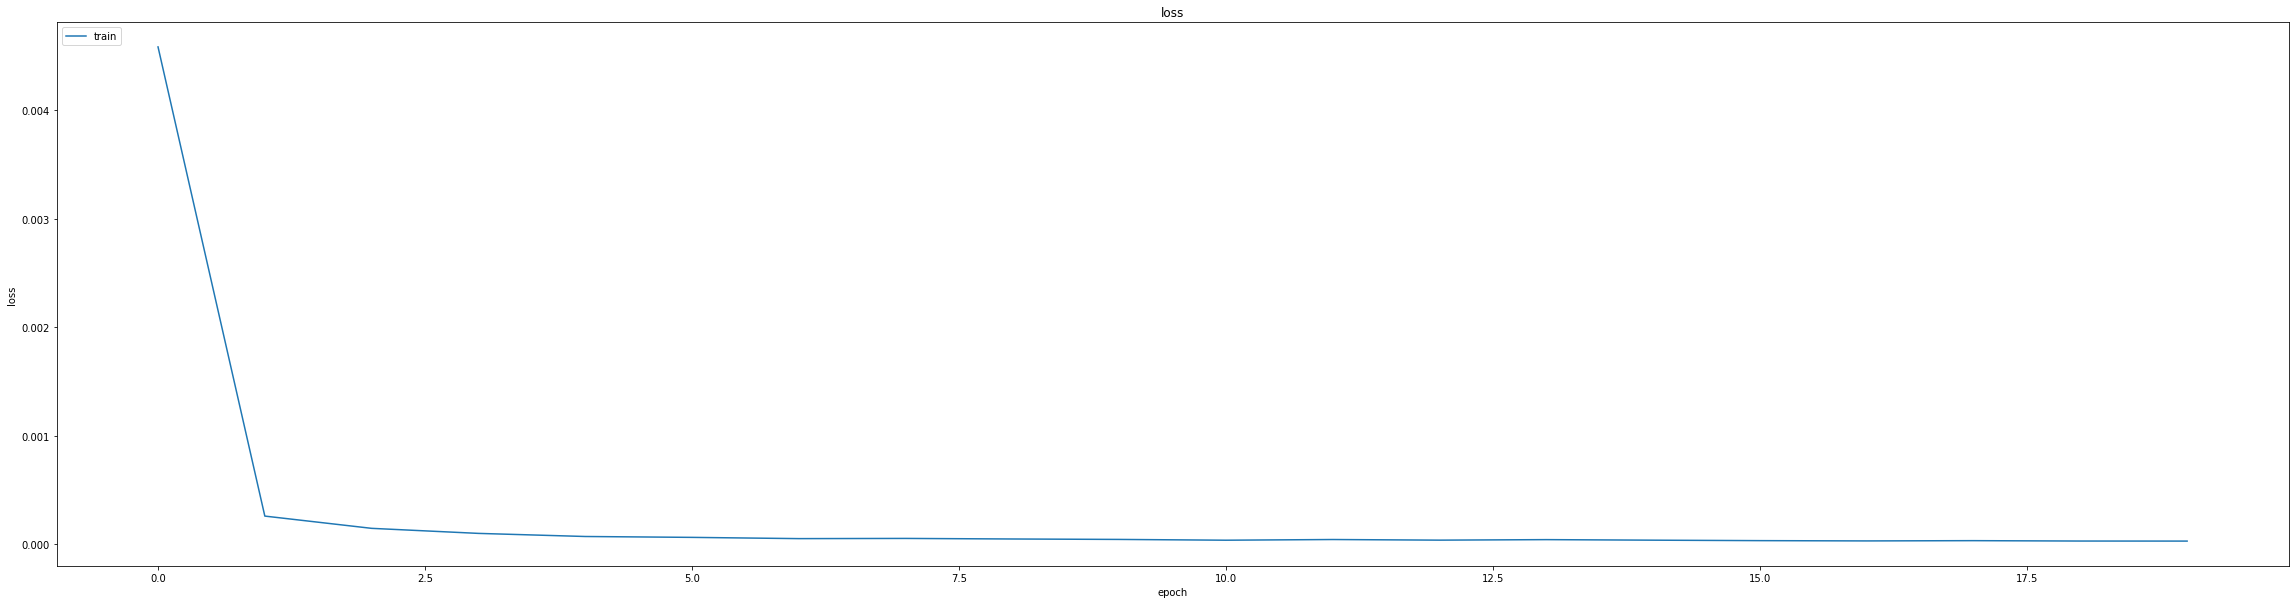

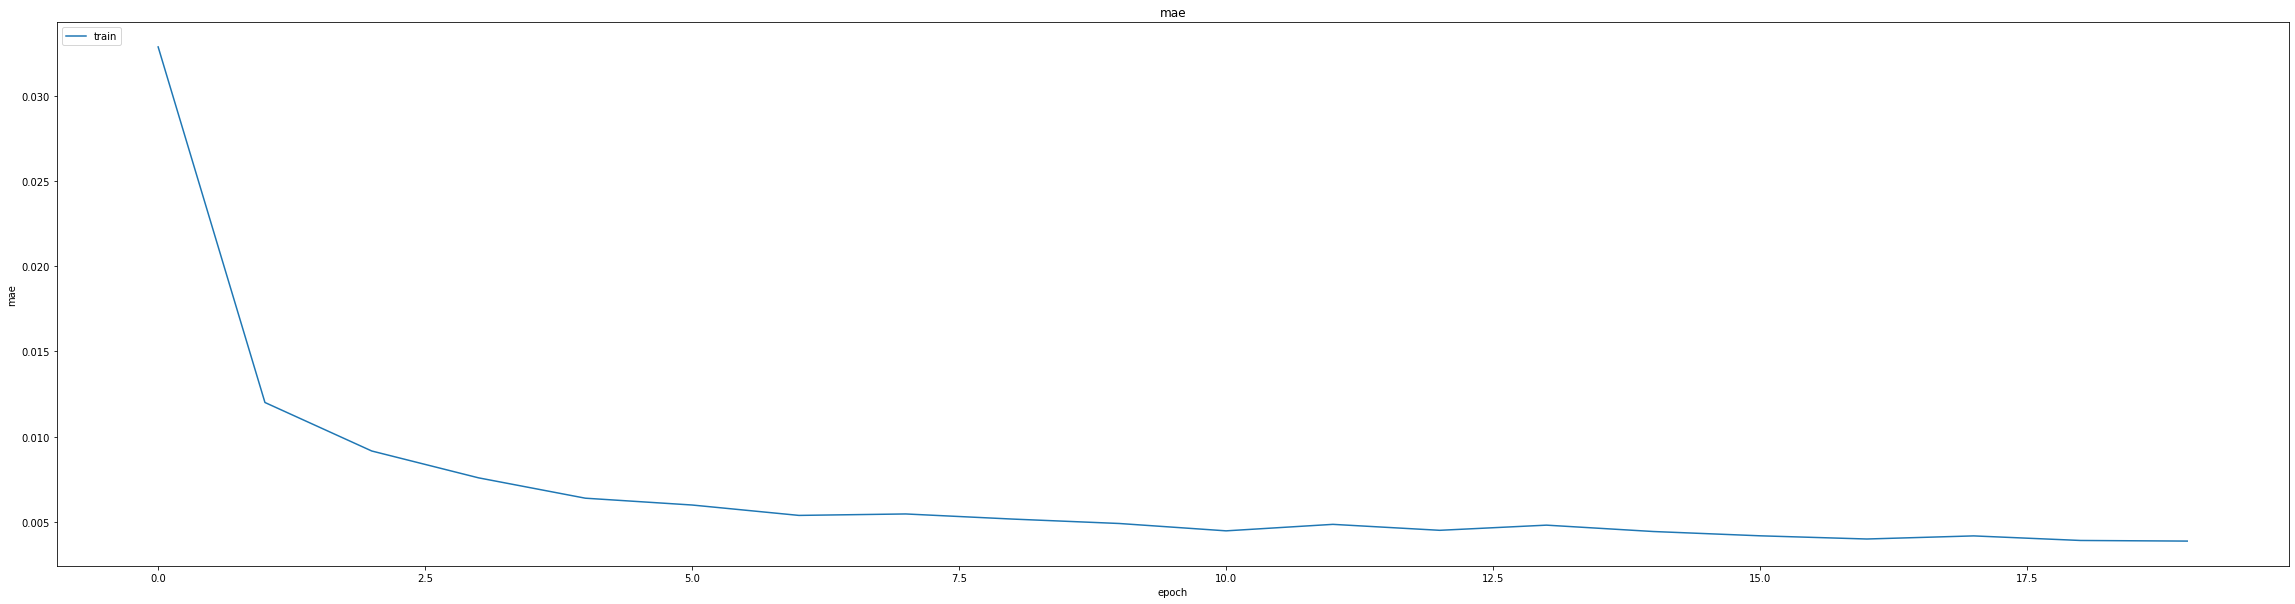

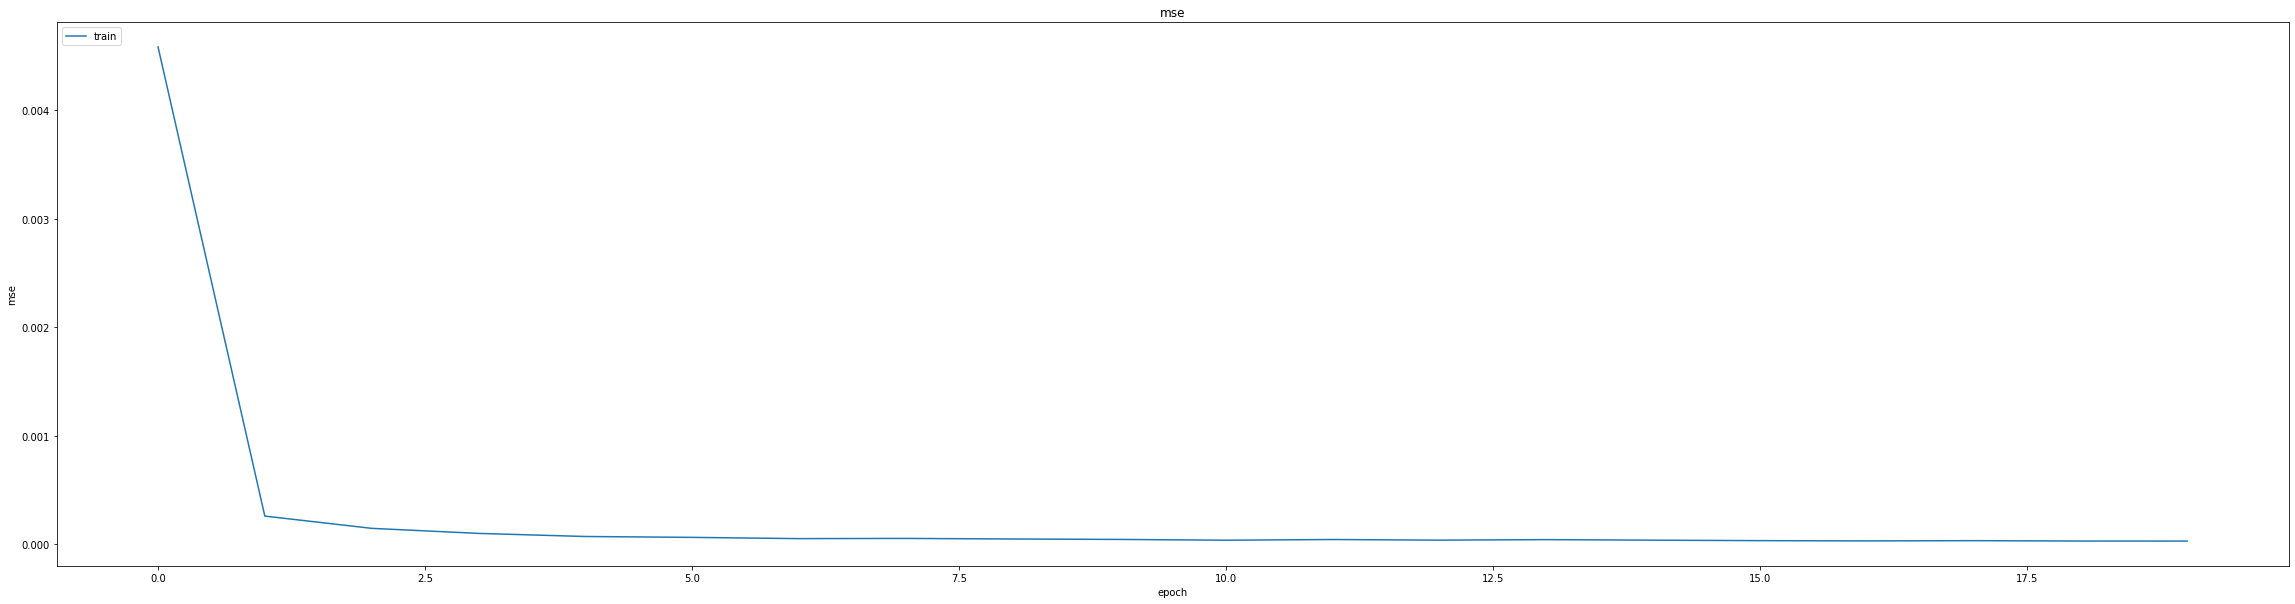

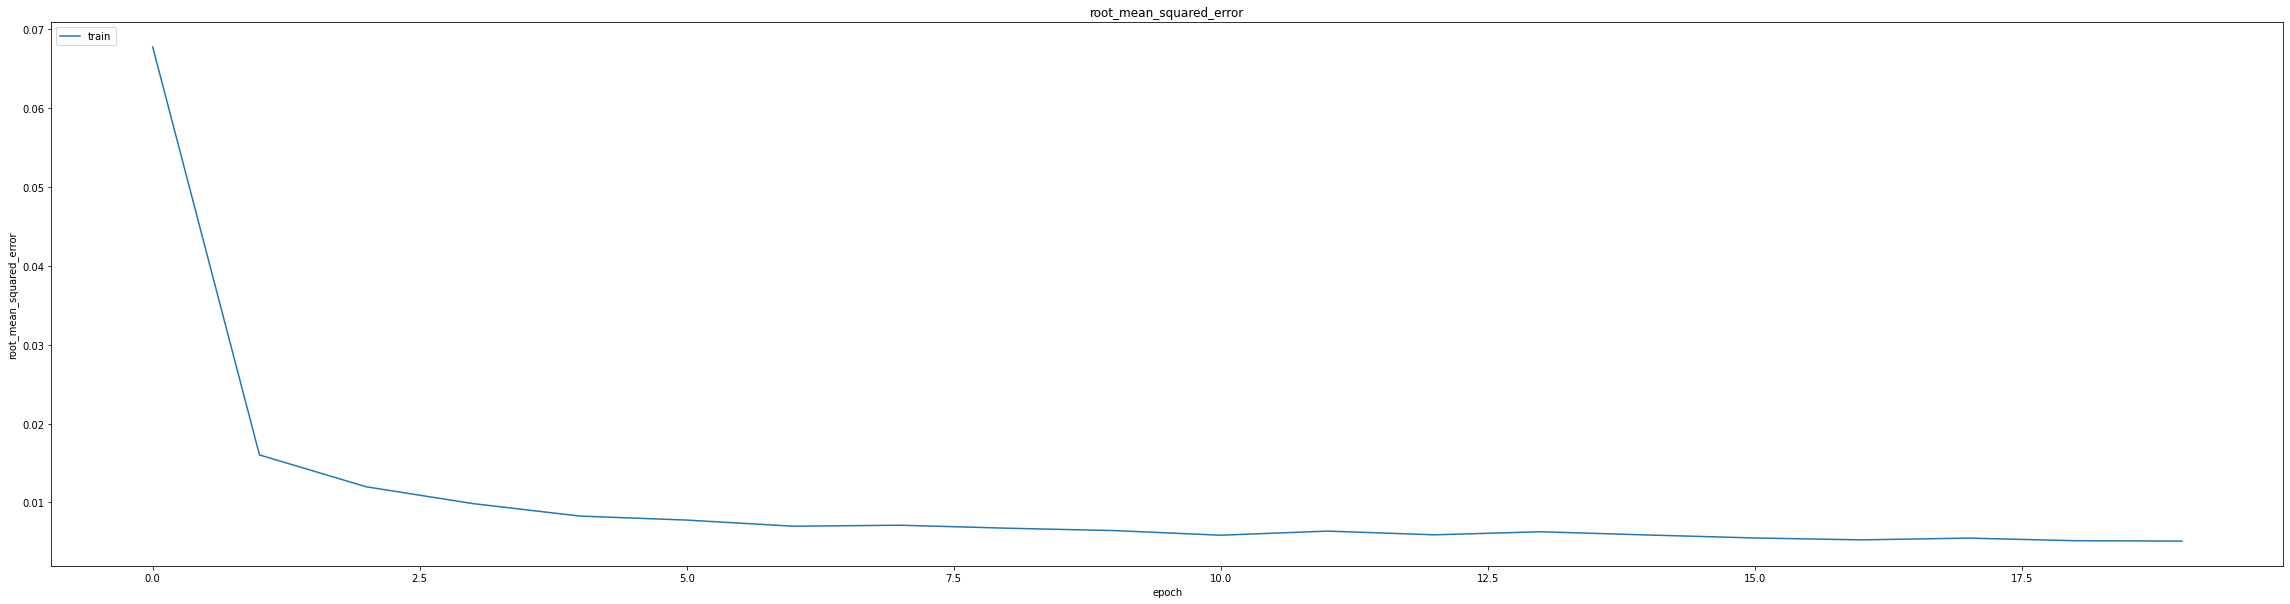

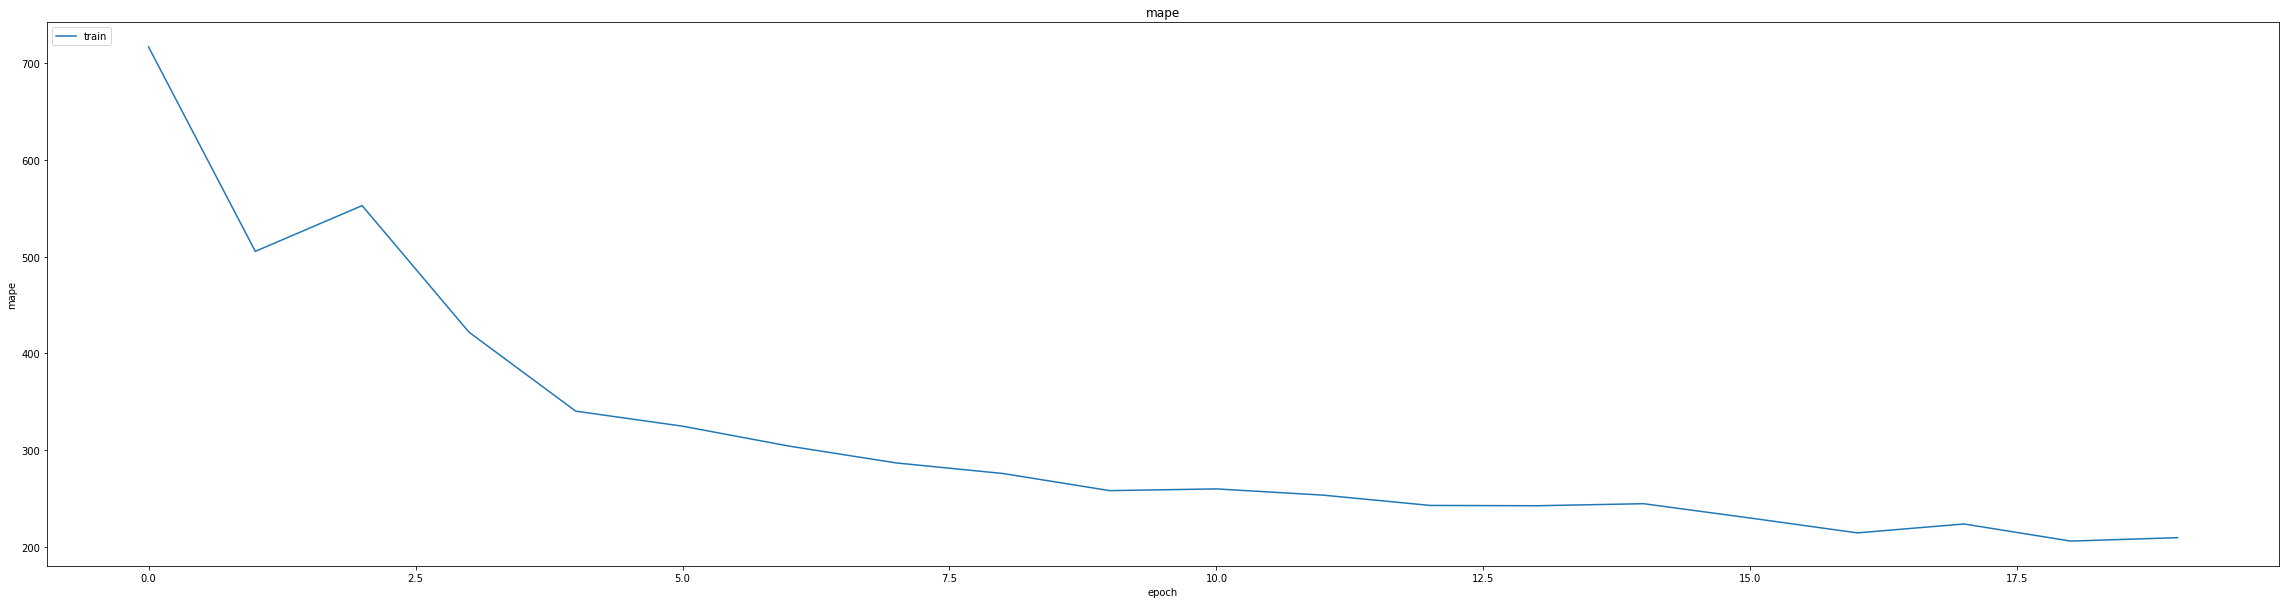

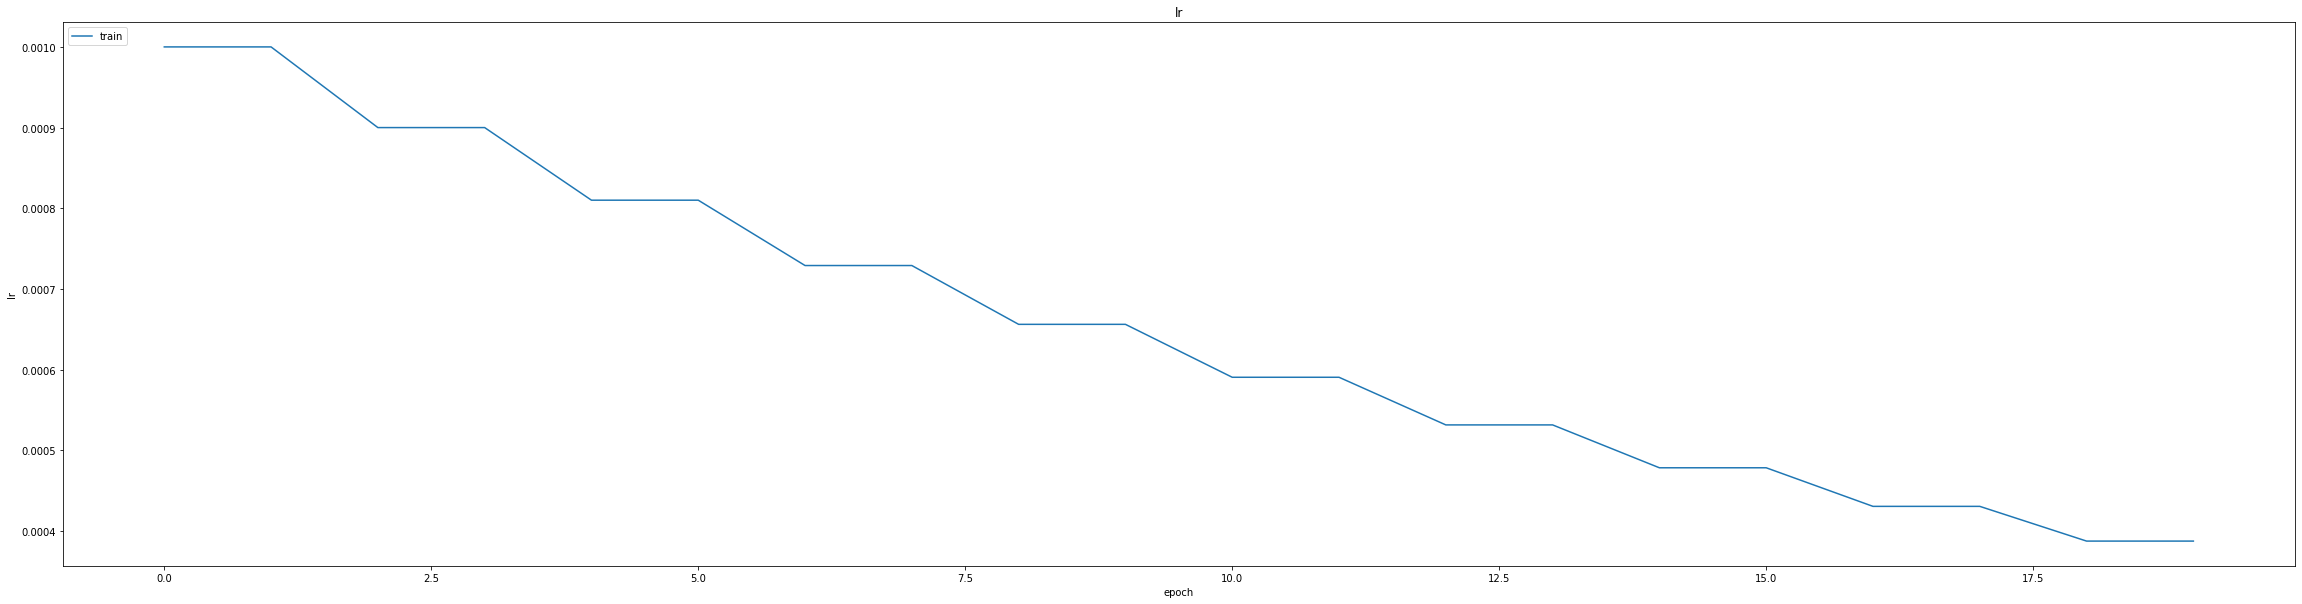

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.03296482935547829
0.033864010125398636
1390/1390 [==============================] - 8s 5ms/step
0.9731793318589831


1390/1390 [==============================] - 7s 5ms/step


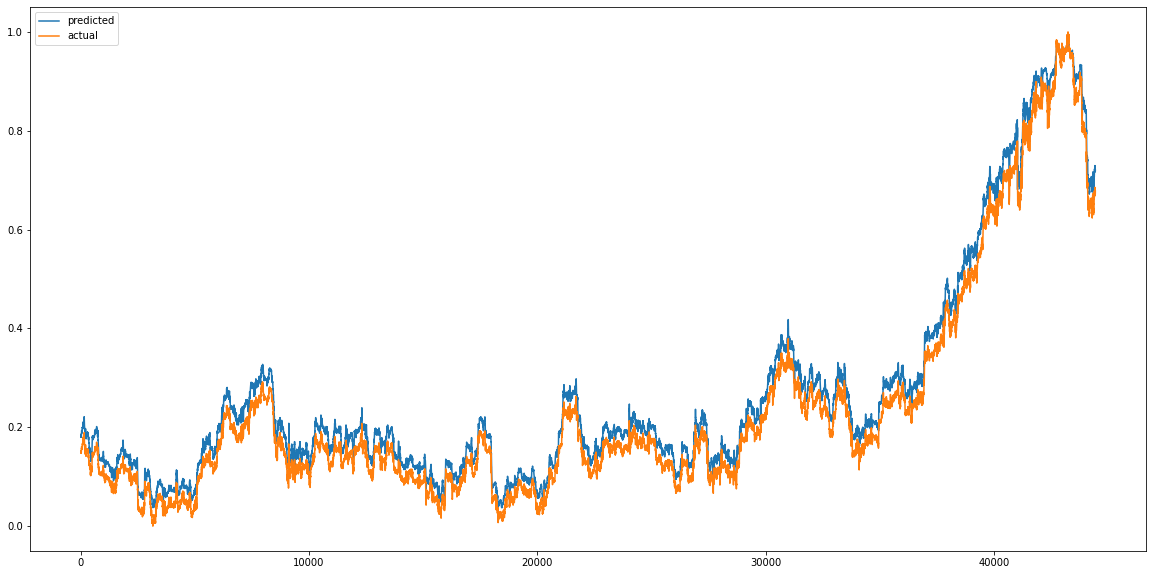

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_BiLSTM(60-40)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


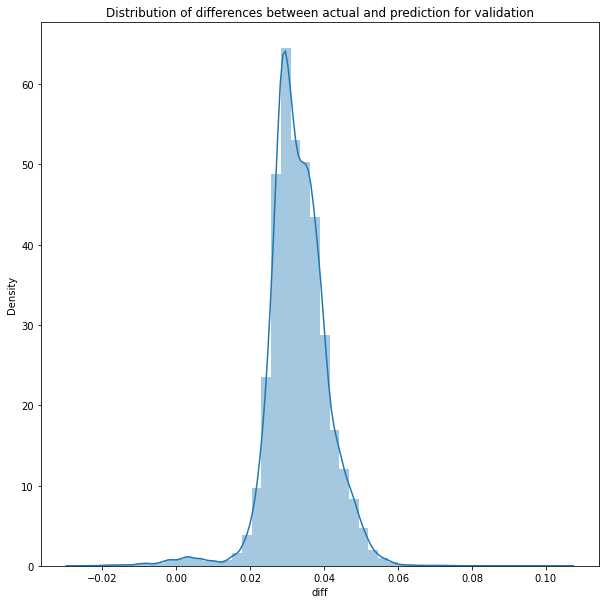

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

1390/1390 [==============================] - 7s 5ms/step


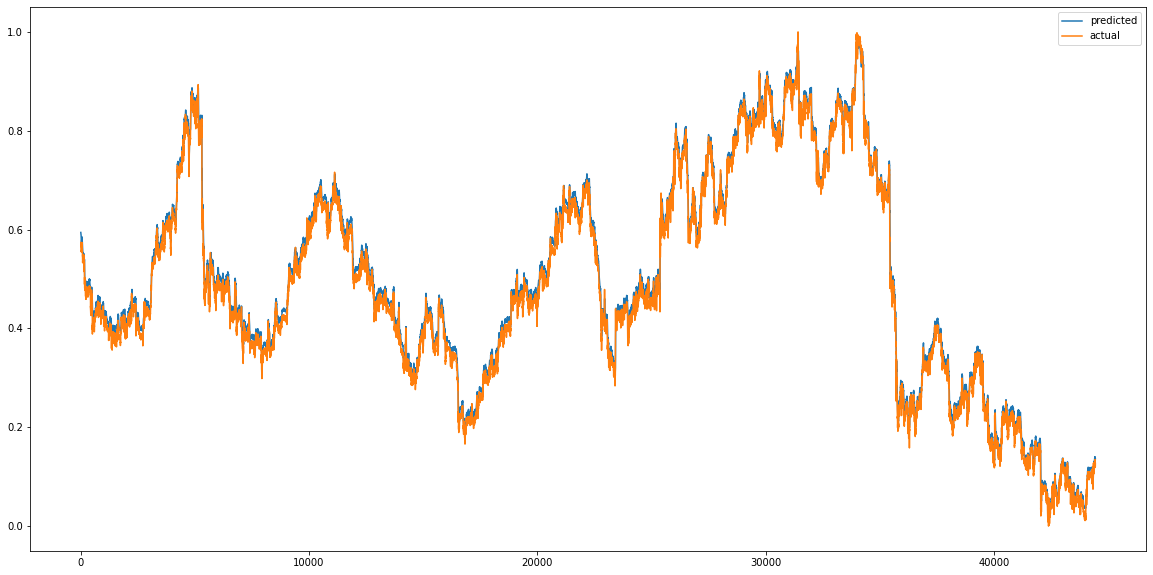

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


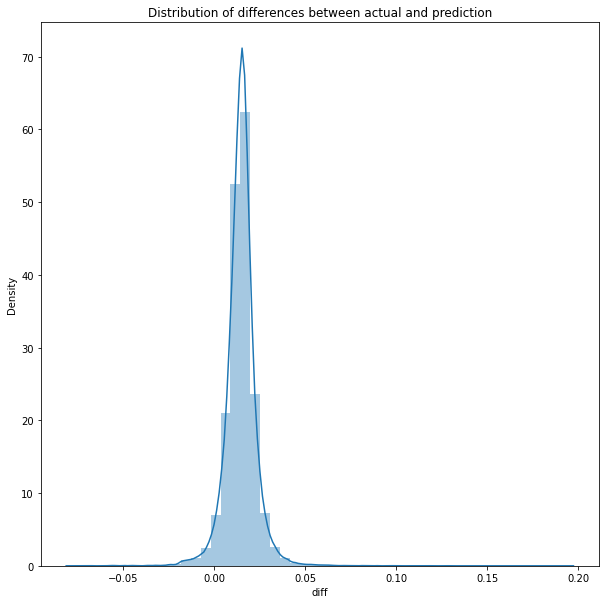

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', test_r2_score)
predictions['diff'].describe()

MSE :  0.0002894107518510254
RMSE :  0.017012076647224036
MAE :  0.01530509653785493
1390/1390 [==============================] - 7s 5ms/step
R2_Score  : 0.9939716437221205


count    44453.000000
mean         0.014758
std          0.008462
min         -0.078210
25%          0.010851
50%          0.014973
75%          0.018706
max          0.194414
Name: diff, dtype: float64

**CNN_LSTM_MODEL**

In [ ]:
model= thesis.CNN_LSTM_Model(x_train)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 24, 64)            2368      
                                                                 
 lstm_2 (LSTM)               (None, 24, 256)           328704    
                                                                 
 dropout_1 (Dropout)         (None, 24, 256)           0         
                                                                 
 lstm_3 (LSTM)               (None, 64)                82176     
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 1)                

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_LSTM(60-40)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=60
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/60
344/347 [============================>.] - ETA: 0s - loss: 262.6621 - mae: 2.1947 - mse: 262.6621 - root_mean_squared_error: 16.2069 - mape: 3570.0327
Epoch 1: val_mse improved from inf to 0.06765, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_LSTM(60-40)


347/347 [==============================] - 18s 43ms/step - loss: 260.7645 - mae: 2.1802 - mse: 260.7645 - root_mean_squared_error: 16.1482 - mape: 3544.6807 - val_loss: 0.0676 - val_mae: 0.2378 - val_mse: 0.0676 - val_root_mean_squared_error: 0.2601 - val_mape: 8631.3408
Epoch 2/60
345/347 [============================>.] - ETA: 0s - loss: 0.0608 - mae: 0.1969 - mse: 0.0608 - root_mean_squared_error: 0.2466 - mape: 3053.3159
Epoch 2: val_mse did not improve from 0.06765
347/347 [==============================] - 6s 17ms/step - loss: 0.0608 - mae: 0.1969 - mse: 0.0608 - root_mean_squared_error: 0.2465 - mape: 3040.3977 - val_loss: 0.0808 - val_mae: 0.2705 - val_mse: 0.0808 - val_root_mean_squared_error: 0.2842 - val_mape: 9642.5205
Epoch 3/60
347/347 [==============================] - ETA: 0s - loss: 0.0188 - mae: 0.1032 - mse: 0.0188 - root_mean_squared_error: 0.1372 - mape: 2697.4785
Epoch 3: val_mse improved from 0.06765 to 0.03329, saving model to /content/drive/MyDrive/modelweights

347/347 [==============================] - 14s 39ms/step - loss: 0.0188 - mae: 0.1032 - mse: 0.0188 - root_mean_squared_error: 0.1372 - mape: 2697.4785 - val_loss: 0.0333 - val_mae: 0.1624 - val_mse: 0.0333 - val_root_mean_squared_error: 0.1825 - val_mape: 7629.4727
Epoch 4/60
344/347 [============================>.] - ETA: 0s - loss: 0.0075 - mae: 0.0601 - mse: 0.0075 - root_mean_squared_error: 0.0867 - mape: 2330.6379
Epoch 4: val_mse improved from 0.03329 to 0.01930, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_LSTM(60-40)


347/347 [==============================] - 13s 38ms/step - loss: 0.0075 - mae: 0.0601 - mse: 0.0075 - root_mean_squared_error: 0.0866 - mape: 2314.0256 - val_loss: 0.0193 - val_mae: 0.1181 - val_mse: 0.0193 - val_root_mean_squared_error: 0.1389 - val_mape: 6434.9409
Epoch 5/60
345/347 [============================>.] - ETA: 0s - loss: 0.0046 - mae: 0.0458 - mse: 0.0046 - root_mean_squared_error: 0.0677 - mape: 2172.2949
Epoch 5: val_mse improved from 0.01930 to 0.01320, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_LSTM(60-40)


347/347 [==============================] - 14s 40ms/step - loss: 0.0046 - mae: 0.0458 - mse: 0.0046 - root_mean_squared_error: 0.0677 - mape: 2162.9834 - val_loss: 0.0132 - val_mae: 0.0943 - val_mse: 0.0132 - val_root_mean_squared_error: 0.1149 - val_mape: 5734.4404
Epoch 6/60
344/347 [============================>.] - ETA: 0s - loss: 0.0033 - mae: 0.0387 - mse: 0.0033 - root_mean_squared_error: 0.0573 - mape: 1713.6548
Epoch 6: val_mse improved from 0.01320 to 0.00965, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_LSTM(60-40)


347/347 [==============================] - 13s 38ms/step - loss: 0.0033 - mae: 0.0387 - mse: 0.0033 - root_mean_squared_error: 0.0573 - mape: 1701.4574 - val_loss: 0.0097 - val_mae: 0.0776 - val_mse: 0.0097 - val_root_mean_squared_error: 0.0982 - val_mape: 5234.8701
Epoch 7/60
345/347 [============================>.] - ETA: 0s - loss: 0.0025 - mae: 0.0338 - mse: 0.0025 - root_mean_squared_error: 0.0498 - mape: 1619.9731
Epoch 7: val_mse improved from 0.00965 to 0.00726, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_LSTM(60-40)


347/347 [==============================] - 15s 43ms/step - loss: 0.0025 - mae: 0.0337 - mse: 0.0025 - root_mean_squared_error: 0.0497 - mape: 1613.0181 - val_loss: 0.0073 - val_mae: 0.0659 - val_mse: 0.0073 - val_root_mean_squared_error: 0.0852 - val_mape: 4826.3955
Epoch 8/60
346/347 [============================>.] - ETA: 0s - loss: 0.0019 - mae: 0.0301 - mse: 0.0019 - root_mean_squared_error: 0.0440 - mape: 1497.6221
Epoch 8: val_mse improved from 0.00726 to 0.00556, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_LSTM(60-40)


347/347 [==============================] - 14s 40ms/step - loss: 0.0019 - mae: 0.0301 - mse: 0.0019 - root_mean_squared_error: 0.0440 - mape: 1495.4738 - val_loss: 0.0056 - val_mae: 0.0564 - val_mse: 0.0056 - val_root_mean_squared_error: 0.0746 - val_mape: 4479.2456
Epoch 9/60
347/347 [==============================] - ETA: 0s - loss: 0.0015 - mae: 0.0271 - mse: 0.0015 - root_mean_squared_error: 0.0394 - mape: 1455.9403
Epoch 9: val_mse improved from 0.00556 to 0.00432, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_LSTM(60-40)


347/347 [==============================] - 14s 40ms/step - loss: 0.0015 - mae: 0.0271 - mse: 0.0015 - root_mean_squared_error: 0.0394 - mape: 1455.9403 - val_loss: 0.0043 - val_mae: 0.0483 - val_mse: 0.0043 - val_root_mean_squared_error: 0.0657 - val_mape: 4180.3188
Epoch 10/60
345/347 [============================>.] - ETA: 0s - loss: 0.0013 - mae: 0.0248 - mse: 0.0013 - root_mean_squared_error: 0.0357 - mape: 1255.1929
Epoch 10: val_mse improved from 0.00432 to 0.00339, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_LSTM(60-40)


347/347 [==============================] - 13s 38ms/step - loss: 0.0013 - mae: 0.0248 - mse: 0.0013 - root_mean_squared_error: 0.0357 - mape: 1249.8091 - val_loss: 0.0034 - val_mae: 0.0409 - val_mse: 0.0034 - val_root_mean_squared_error: 0.0582 - val_mape: 3916.3342
Epoch 11/60
346/347 [============================>.] - ETA: 0s - loss: 0.0011 - mae: 0.0229 - mse: 0.0011 - root_mean_squared_error: 0.0326 - mape: 1236.4535
Epoch 11: val_mse improved from 0.00339 to 0.00269, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_LSTM(60-40)


347/347 [==============================] - 14s 40ms/step - loss: 0.0011 - mae: 0.0229 - mse: 0.0011 - root_mean_squared_error: 0.0326 - mape: 1234.6747 - val_loss: 0.0027 - val_mae: 0.0354 - val_mse: 0.0027 - val_root_mean_squared_error: 0.0519 - val_mape: 3682.4026
Epoch 12/60
345/347 [============================>.] - ETA: 0s - loss: 8.9917e-04 - mae: 0.0213 - mse: 8.9917e-04 - root_mean_squared_error: 0.0300 - mape: 1261.9917
Epoch 12: val_mse improved from 0.00269 to 0.00216, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_LSTM(60-40)


347/347 [==============================] - 13s 38ms/step - loss: 8.9911e-04 - mae: 0.0213 - mse: 8.9911e-04 - root_mean_squared_error: 0.0300 - mape: 1256.6180 - val_loss: 0.0022 - val_mae: 0.0307 - val_mse: 0.0022 - val_root_mean_squared_error: 0.0465 - val_mape: 3474.7881
Epoch 13/60
346/347 [============================>.] - ETA: 0s - loss: 7.7359e-04 - mae: 0.0201 - mse: 7.7359e-04 - root_mean_squared_error: 0.0278 - mape: 1284.6210
Epoch 13: val_mse improved from 0.00216 to 0.00176, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_LSTM(60-40)


347/347 [==============================] - 14s 40ms/step - loss: 7.7339e-04 - mae: 0.0201 - mse: 7.7339e-04 - root_mean_squared_error: 0.0278 - mape: 1282.7662 - val_loss: 0.0018 - val_mae: 0.0273 - val_mse: 0.0018 - val_root_mean_squared_error: 0.0419 - val_mape: 3285.9453
Epoch 14/60
346/347 [============================>.] - ETA: 0s - loss: 6.7578e-04 - mae: 0.0190 - mse: 6.7578e-04 - root_mean_squared_error: 0.0260 - mape: 1128.1343
Epoch 14: val_mse improved from 0.00176 to 0.00144, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_LSTM(60-40)


347/347 [==============================] - 14s 39ms/step - loss: 6.7550e-04 - mae: 0.0190 - mse: 6.7550e-04 - root_mean_squared_error: 0.0260 - mape: 1126.5031 - val_loss: 0.0014 - val_mae: 0.0243 - val_mse: 0.0014 - val_root_mean_squared_error: 0.0379 - val_mape: 3115.0447
Epoch 15/60
344/347 [============================>.] - ETA: 0s - loss: 5.2277e-04 - mae: 0.0171 - mse: 5.2277e-04 - root_mean_squared_error: 0.0229 - mape: 826.9297
Epoch 15: val_mse improved from 0.00144 to 0.00050, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_LSTM(60-40)


347/347 [==============================] - 14s 39ms/step - loss: 5.2194e-04 - mae: 0.0171 - mse: 5.2194e-04 - root_mean_squared_error: 0.0228 - mape: 820.9963 - val_loss: 5.0134e-04 - val_mae: 0.0156 - val_mse: 5.0134e-04 - val_root_mean_squared_error: 0.0224 - val_mape: 2210.8792
Epoch 16/60
346/347 [============================>.] - ETA: 0s - loss: 4.1459e-04 - mae: 0.0156 - mse: 4.1459e-04 - root_mean_squared_error: 0.0204 - mape: 770.8202
Epoch 16: val_mse improved from 0.00050 to 0.00040, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_LSTM(60-40)


347/347 [==============================] - 13s 38ms/step - loss: 4.1451e-04 - mae: 0.0156 - mse: 4.1451e-04 - root_mean_squared_error: 0.0204 - mape: 769.7062 - val_loss: 4.0326e-04 - val_mae: 0.0141 - val_mse: 4.0326e-04 - val_root_mean_squared_error: 0.0201 - val_mape: 2053.7168
Epoch 17/60
345/347 [============================>.] - ETA: 0s - loss: 3.7867e-04 - mae: 0.0150 - mse: 3.7867e-04 - root_mean_squared_error: 0.0195 - mape: 676.4615
Epoch 17: val_mse improved from 0.00040 to 0.00035, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_LSTM(60-40)


347/347 [==============================] - 14s 40ms/step - loss: 3.7858e-04 - mae: 0.0150 - mse: 3.7858e-04 - root_mean_squared_error: 0.0195 - mape: 673.5489 - val_loss: 3.4603e-04 - val_mae: 0.0128 - val_mse: 3.4603e-04 - val_root_mean_squared_error: 0.0186 - val_mape: 1964.3455
Epoch 18/60
344/347 [============================>.] - ETA: 0s - loss: 3.4316e-04 - mae: 0.0143 - mse: 3.4316e-04 - root_mean_squared_error: 0.0185 - mape: 627.1635
Epoch 18: val_mse improved from 0.00035 to 0.00029, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_LSTM(60-40)


347/347 [==============================] - 13s 38ms/step - loss: 3.4284e-04 - mae: 0.0143 - mse: 3.4284e-04 - root_mean_squared_error: 0.0185 - mape: 622.6707 - val_loss: 2.8839e-04 - val_mae: 0.0117 - val_mse: 2.8839e-04 - val_root_mean_squared_error: 0.0170 - val_mape: 1859.0081
Epoch 19/60
347/347 [==============================] - ETA: 0s - loss: 3.1192e-04 - mae: 0.0137 - mse: 3.1192e-04 - root_mean_squared_error: 0.0177 - mape: 609.2394
Epoch 19: val_mse improved from 0.00029 to 0.00024, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_LSTM(60-40)


347/347 [==============================] - 14s 40ms/step - loss: 3.1192e-04 - mae: 0.0137 - mse: 3.1192e-04 - root_mean_squared_error: 0.0177 - mape: 609.2394 - val_loss: 2.4283e-04 - val_mae: 0.0108 - val_mse: 2.4283e-04 - val_root_mean_squared_error: 0.0156 - val_mape: 1762.0658
Epoch 20/60
347/347 [==============================] - ETA: 0s - loss: 2.8276e-04 - mae: 0.0130 - mse: 2.8276e-04 - root_mean_squared_error: 0.0168 - mape: 573.5680
Epoch 20: val_mse improved from 0.00024 to 0.00020, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_LSTM(60-40)


347/347 [==============================] - 14s 40ms/step - loss: 2.8276e-04 - mae: 0.0130 - mse: 2.8276e-04 - root_mean_squared_error: 0.0168 - mape: 573.5680 - val_loss: 2.0365e-04 - val_mae: 0.0098 - val_mse: 2.0365e-04 - val_root_mean_squared_error: 0.0143 - val_mape: 1675.8632
Epoch 21/60
346/347 [============================>.] - ETA: 0s - loss: 2.5305e-04 - mae: 0.0124 - mse: 2.5305e-04 - root_mean_squared_error: 0.0159 - mape: 653.7664
Epoch 21: val_mse improved from 0.00020 to 0.00017, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_LSTM(60-40)


347/347 [==============================] - 14s 40ms/step - loss: 2.5305e-04 - mae: 0.0124 - mse: 2.5305e-04 - root_mean_squared_error: 0.0159 - mape: 652.8243 - val_loss: 1.6762e-04 - val_mae: 0.0090 - val_mse: 1.6762e-04 - val_root_mean_squared_error: 0.0129 - val_mape: 1575.8182
Epoch 22/60
344/347 [============================>.] - ETA: 0s - loss: 2.2661e-04 - mae: 0.0117 - mse: 2.2661e-04 - root_mean_squared_error: 0.0151 - mape: 485.3058
Epoch 22: val_mse improved from 0.00017 to 0.00014, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_LSTM(60-40)


347/347 [==============================] - 13s 38ms/step - loss: 2.2655e-04 - mae: 0.0117 - mse: 2.2655e-04 - root_mean_squared_error: 0.0151 - mape: 481.8304 - val_loss: 1.4039e-04 - val_mae: 0.0082 - val_mse: 1.4039e-04 - val_root_mean_squared_error: 0.0118 - val_mape: 1475.4349
Epoch 23/60
345/347 [============================>.] - ETA: 0s - loss: 2.0319e-04 - mae: 0.0111 - mse: 2.0319e-04 - root_mean_squared_error: 0.0143 - mape: 516.2413
Epoch 23: val_mse improved from 0.00014 to 0.00011, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_LSTM(60-40)


347/347 [==============================] - 14s 40ms/step - loss: 2.0320e-04 - mae: 0.0111 - mse: 2.0320e-04 - root_mean_squared_error: 0.0143 - mape: 514.0183 - val_loss: 1.1491e-04 - val_mae: 0.0073 - val_mse: 1.1491e-04 - val_root_mean_squared_error: 0.0107 - val_mape: 1404.5651
Epoch 24/60
345/347 [============================>.] - ETA: 0s - loss: 1.8441e-04 - mae: 0.0106 - mse: 1.8441e-04 - root_mean_squared_error: 0.0136 - mape: 436.4629
Epoch 24: val_mse improved from 0.00011 to 0.00010, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_LSTM(60-40)


347/347 [==============================] - 13s 38ms/step - loss: 1.8435e-04 - mae: 0.0106 - mse: 1.8435e-04 - root_mean_squared_error: 0.0136 - mape: 434.5859 - val_loss: 9.6729e-05 - val_mae: 0.0067 - val_mse: 9.6729e-05 - val_root_mean_squared_error: 0.0098 - val_mape: 1307.8268
Epoch 25/60
345/347 [============================>.] - ETA: 0s - loss: 1.6912e-04 - mae: 0.0102 - mse: 1.6912e-04 - root_mean_squared_error: 0.0130 - mape: 490.9675
Epoch 25: val_mse improved from 0.00010 to 0.00008, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_LSTM(60-40)


347/347 [==============================] - 14s 40ms/step - loss: 1.6908e-04 - mae: 0.0102 - mse: 1.6908e-04 - root_mean_squared_error: 0.0130 - mape: 488.8525 - val_loss: 7.9044e-05 - val_mae: 0.0060 - val_mse: 7.9044e-05 - val_root_mean_squared_error: 0.0089 - val_mape: 1244.2775
Epoch 26/60
345/347 [============================>.] - ETA: 0s - loss: 1.5503e-04 - mae: 0.0098 - mse: 1.5503e-04 - root_mean_squared_error: 0.0125 - mape: 391.7101
Epoch 26: val_mse improved from 0.00008 to 0.00007, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_LSTM(60-40)


347/347 [==============================] - 14s 39ms/step - loss: 1.5500e-04 - mae: 0.0098 - mse: 1.5500e-04 - root_mean_squared_error: 0.0124 - mape: 390.0251 - val_loss: 6.8623e-05 - val_mae: 0.0057 - val_mse: 6.8623e-05 - val_root_mean_squared_error: 0.0083 - val_mape: 1171.2927
Epoch 27/60
344/347 [============================>.] - ETA: 0s - loss: 1.4254e-04 - mae: 0.0094 - mse: 1.4254e-04 - root_mean_squared_error: 0.0119 - mape: 390.0323
Epoch 27: val_mse did not improve from 0.00007
347/347 [==============================] - 6s 17ms/step - loss: 1.4246e-04 - mae: 0.0094 - mse: 1.4246e-04 - root_mean_squared_error: 0.0119 - mape: 387.2367 - val_loss: 7.2640e-05 - val_mae: 0.0059 - val_mse: 7.2640e-05 - val_root_mean_squared_error: 0.0085 - val_mape: 1106.0795
Epoch 28/60
347/347 [==============================] - ETA: 0s - loss: 1.3225e-04 - mae: 0.0090 - mse: 1.3225e-04 - root_mean_squared_error: 0.0115 - mape: 416.6098
Epoch 28: val_mse improved from 0.00007 to 0.00006, saving m

347/347 [==============================] - 14s 39ms/step - loss: 1.3225e-04 - mae: 0.0090 - mse: 1.3225e-04 - root_mean_squared_error: 0.0115 - mape: 416.6098 - val_loss: 6.0783e-05 - val_mae: 0.0054 - val_mse: 6.0783e-05 - val_root_mean_squared_error: 0.0078 - val_mape: 1060.0997
Epoch 29/60
347/347 [==============================] - ETA: 0s - loss: 1.2380e-04 - mae: 0.0087 - mse: 1.2380e-04 - root_mean_squared_error: 0.0111 - mape: 390.3493
Epoch 29: val_mse did not improve from 0.00006
347/347 [==============================] - 6s 17ms/step - loss: 1.2380e-04 - mae: 0.0087 - mse: 1.2380e-04 - root_mean_squared_error: 0.0111 - mape: 390.3493 - val_loss: 6.2953e-05 - val_mae: 0.0055 - val_mse: 6.2953e-05 - val_root_mean_squared_error: 0.0079 - val_mape: 1019.1379
Epoch 30/60
344/347 [============================>.] - ETA: 0s - loss: 1.1670e-04 - mae: 0.0085 - mse: 1.1670e-04 - root_mean_squared_error: 0.0108 - mape: 326.0667
Epoch 30: val_mse did not improve from 0.00006
347/347 [====

347/347 [==============================] - 13s 38ms/step - loss: 1.0388e-04 - mae: 0.0080 - mse: 1.0388e-04 - root_mean_squared_error: 0.0102 - mape: 281.8118 - val_loss: 4.3587e-05 - val_mae: 0.0047 - val_mse: 4.3587e-05 - val_root_mean_squared_error: 0.0066 - val_mape: 885.5279
Epoch 33/60
347/347 [==============================] - ETA: 0s - loss: 9.8733e-05 - mae: 0.0078 - mse: 9.8733e-05 - root_mean_squared_error: 0.0099 - mape: 346.1068
Epoch 33: val_mse did not improve from 0.00004
347/347 [==============================] - 6s 17ms/step - loss: 9.8733e-05 - mae: 0.0078 - mse: 9.8733e-05 - root_mean_squared_error: 0.0099 - mape: 346.1068 - val_loss: 4.6870e-05 - val_mae: 0.0048 - val_mse: 4.6870e-05 - val_root_mean_squared_error: 0.0068 - val_mape: 851.6684
Epoch 34/60
346/347 [============================>.] - ETA: 0s - loss: 9.2609e-05 - mae: 0.0075 - mse: 9.2609e-05 - root_mean_squared_error: 0.0096 - mape: 294.5746
Epoch 34: val_mse did not improve from 0.00004
347/347 [======

347/347 [==============================] - 14s 39ms/step - loss: 7.7293e-05 - mae: 0.0069 - mse: 7.7293e-05 - root_mean_squared_error: 0.0088 - mape: 274.4874 - val_loss: 3.7867e-05 - val_mae: 0.0043 - val_mse: 3.7867e-05 - val_root_mean_squared_error: 0.0062 - val_mape: 773.5918
Epoch 38/60
346/347 [============================>.] - ETA: 0s - loss: 7.2761e-05 - mae: 0.0067 - mse: 7.2761e-05 - root_mean_squared_error: 0.0085 - mape: 274.8521
Epoch 38: val_mse did not improve from 0.00004
347/347 [==============================] - 6s 17ms/step - loss: 7.2739e-05 - mae: 0.0067 - mse: 7.2739e-05 - root_mean_squared_error: 0.0085 - mape: 274.4548 - val_loss: 5.4882e-05 - val_mae: 0.0050 - val_mse: 5.4882e-05 - val_root_mean_squared_error: 0.0074 - val_mape: 728.0636
Epoch 39/60
344/347 [============================>.] - ETA: 0s - loss: 6.9470e-05 - mae: 0.0065 - mse: 6.9470e-05 - root_mean_squared_error: 0.0083 - mape: 205.7832
Epoch 39: val_mse did not improve from 0.00004
347/347 [======

347/347 [==============================] - 13s 38ms/step - loss: 5.9594e-05 - mae: 0.0059 - mse: 5.9594e-05 - root_mean_squared_error: 0.0077 - mape: 192.2428 - val_loss: 3.2652e-05 - val_mae: 0.0039 - val_mse: 3.2652e-05 - val_root_mean_squared_error: 0.0057 - val_mape: 612.3572
Epoch 49/60
347/347 [==============================] - ETA: 0s - loss: 5.6838e-05 - mae: 0.0058 - mse: 5.6838e-05 - root_mean_squared_error: 0.0075 - mape: 238.1807
Epoch 49: val_mse did not improve from 0.00003
347/347 [==============================] - 6s 17ms/step - loss: 5.6838e-05 - mae: 0.0058 - mse: 5.6838e-05 - root_mean_squared_error: 0.0075 - mape: 238.1807 - val_loss: 3.3834e-05 - val_mae: 0.0044 - val_mse: 3.3834e-05 - val_root_mean_squared_error: 0.0058 - val_mape: 623.2310
Epoch 50/60
344/347 [============================>.] - ETA: 0s - loss: 6.4421e-05 - mae: 0.0060 - mse: 6.4421e-05 - root_mean_squared_error: 0.0080 - mape: 242.5907
Epoch 50: val_mse did not improve from 0.00003
347/347 [======

347/347 [==============================] - 14s 39ms/step - loss: 7.8281e-05 - mae: 0.0062 - mse: 7.8281e-05 - root_mean_squared_error: 0.0088 - mape: 262.9593 - val_loss: 2.9498e-05 - val_mae: 0.0041 - val_mse: 2.9498e-05 - val_root_mean_squared_error: 0.0054 - val_mape: 600.9163
Epoch 57/60
346/347 [============================>.] - ETA: 0s - loss: 4.8436e-05 - mae: 0.0053 - mse: 4.8436e-05 - root_mean_squared_error: 0.0070 - mape: 226.7273
Epoch 57: val_mse did not improve from 0.00003
347/347 [==============================] - 6s 17ms/step - loss: 4.8879e-05 - mae: 0.0053 - mse: 4.8879e-05 - root_mean_squared_error: 0.0070 - mape: 226.4030 - val_loss: 1.2070e-04 - val_mae: 0.0091 - val_mse: 1.2070e-04 - val_root_mean_squared_error: 0.0110 - val_mape: 588.3596
Epoch 58/60
344/347 [============================>.] - ETA: 0s - loss: 8.3099e-05 - mae: 0.0066 - mse: 8.3099e-05 - root_mean_squared_error: 0.0091 - mape: 236.5971
Epoch 58: val_mse did not improve from 0.00003
347/347 [======

347/347 [==============================] - 13s 39ms/step - loss: 6.3961e-05 - mae: 0.0060 - mse: 6.3961e-05 - root_mean_squared_error: 0.0080 - mape: 200.7695 - val_loss: 2.6697e-05 - val_mae: 0.0038 - val_mse: 2.6697e-05 - val_root_mean_squared_error: 0.0052 - val_mape: 533.8343
Epoch 60/60
345/347 [============================>.] - ETA: 0s - loss: 7.1689e-05 - mae: 0.0063 - mse: 7.1689e-05 - root_mean_squared_error: 0.0085 - mape: 2.1124
Epoch 60: val_mse improved from 0.00003 to 0.00003, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_LSTM(60-40)


347/347 [==============================] - 14s 39ms/step - loss: 7.1548e-05 - mae: 0.0063 - mse: 7.1548e-05 - root_mean_squared_error: 0.0085 - mape: 240.1329 - val_loss: 2.5165e-05 - val_mae: 0.0034 - val_mse: 2.5165e-05 - val_root_mean_squared_error: 0.0050 - val_mape: 605.5876


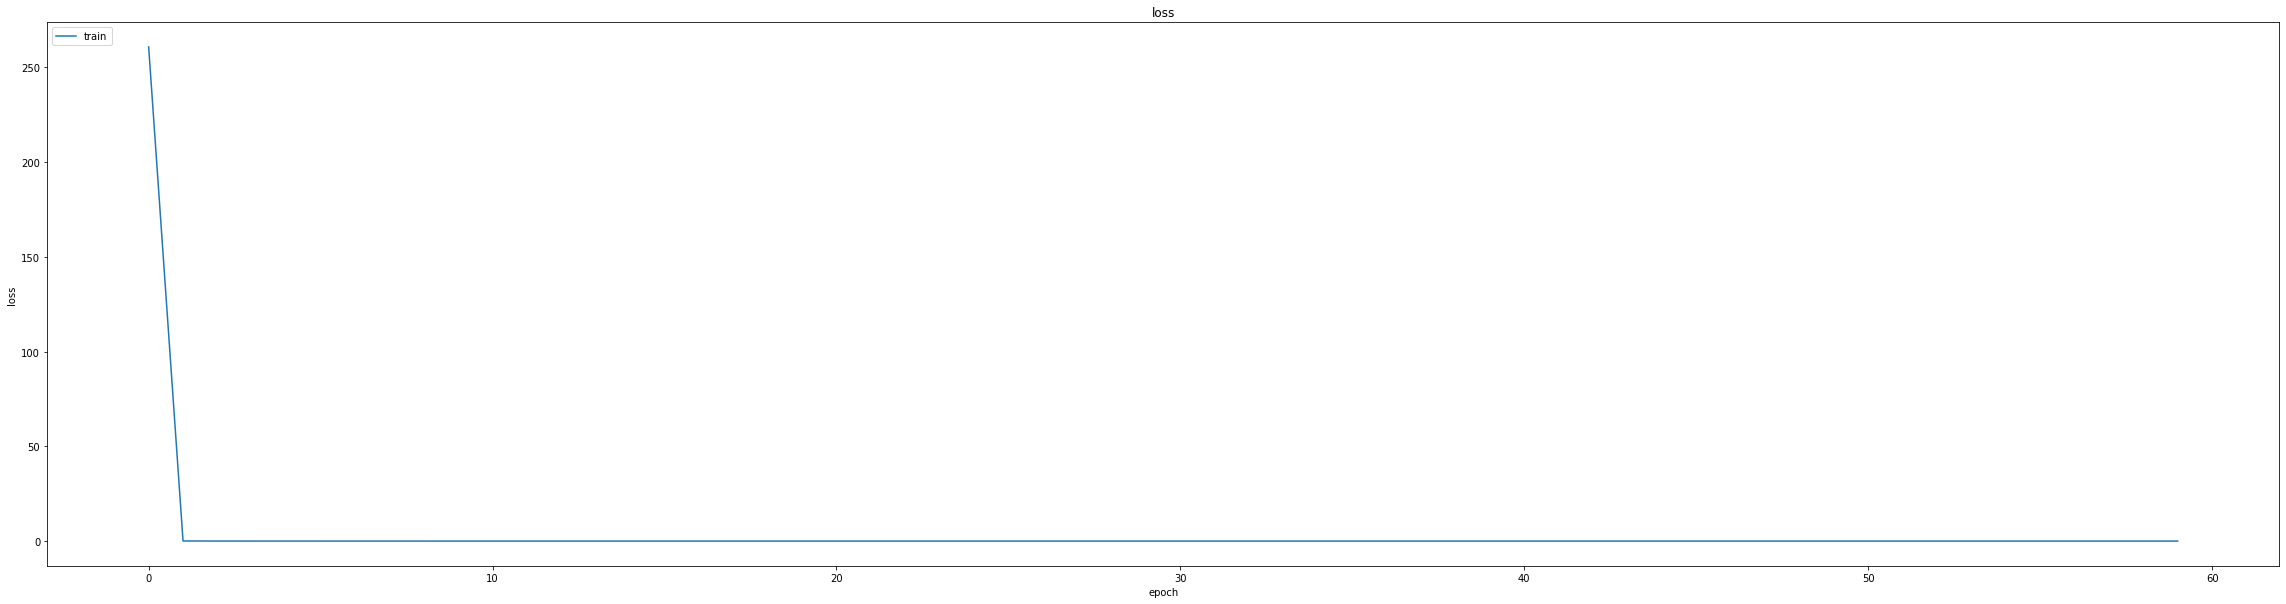

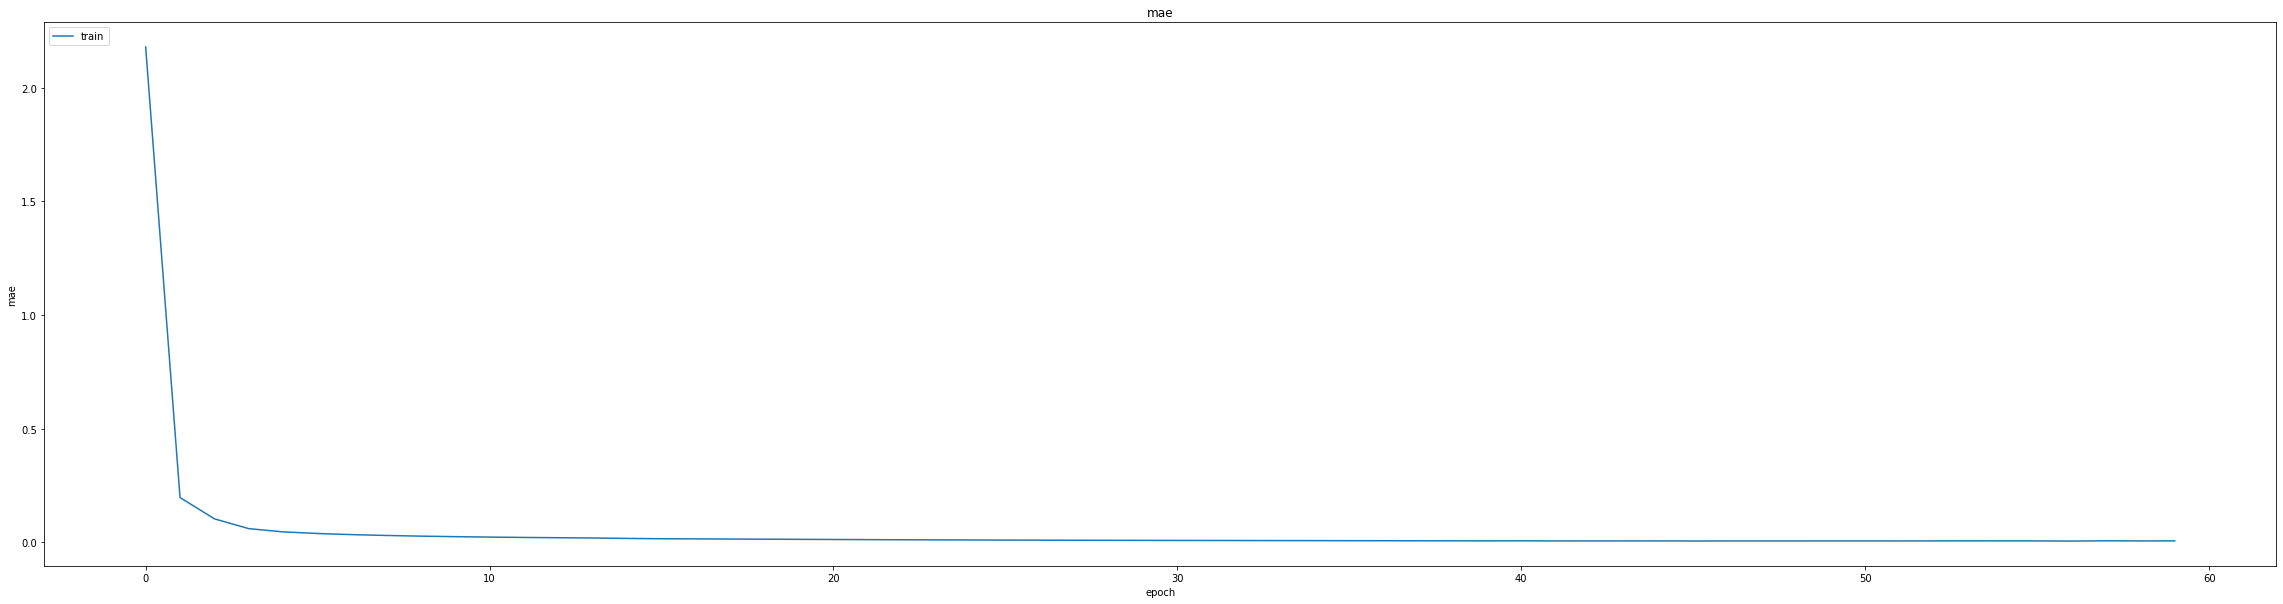

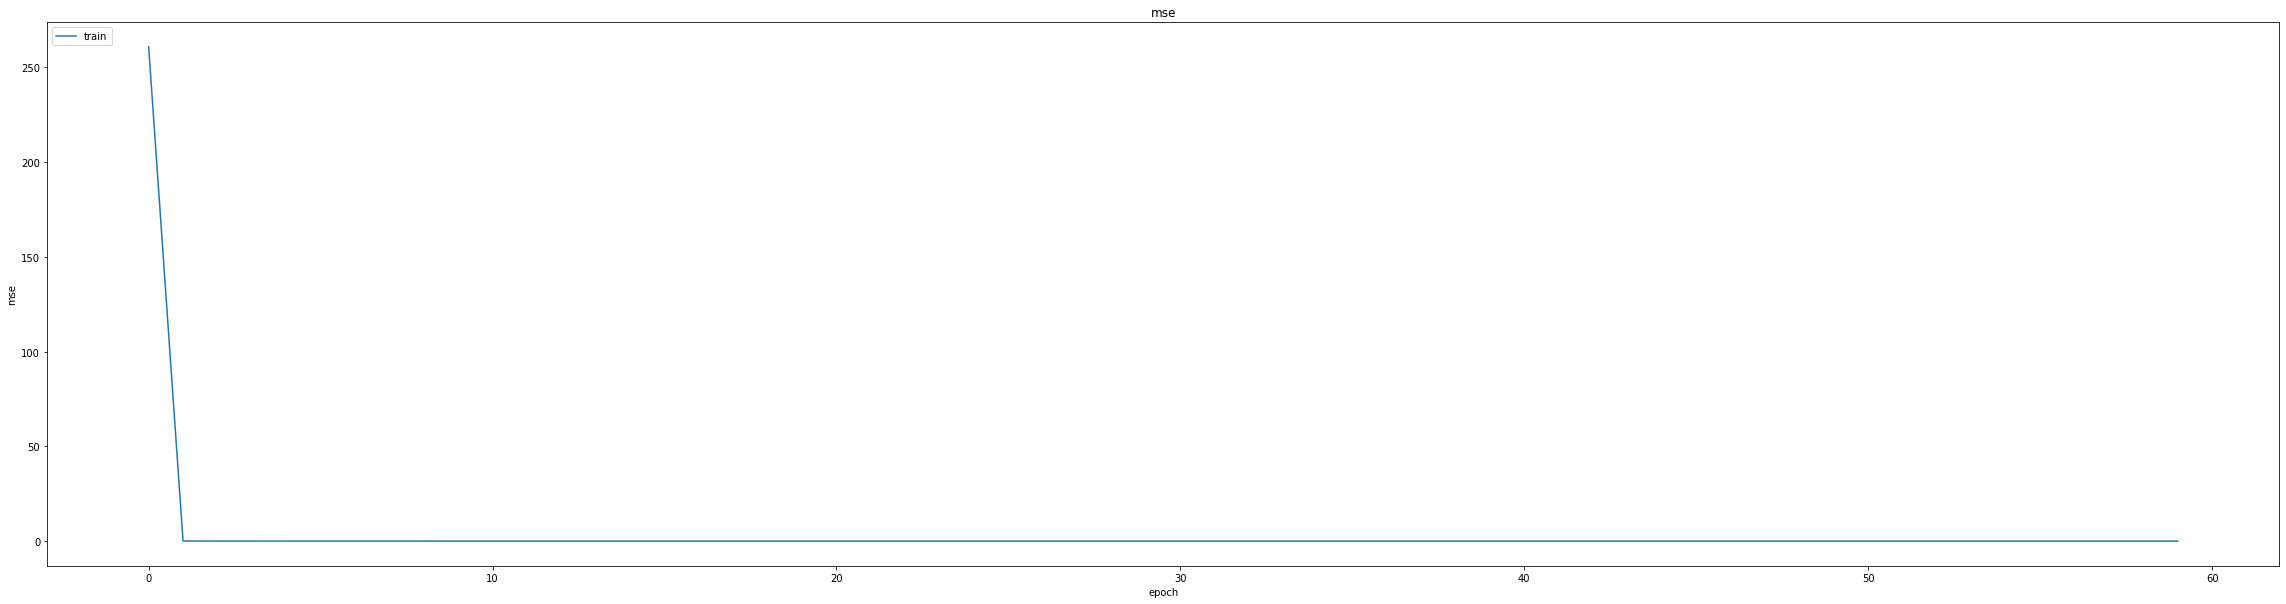

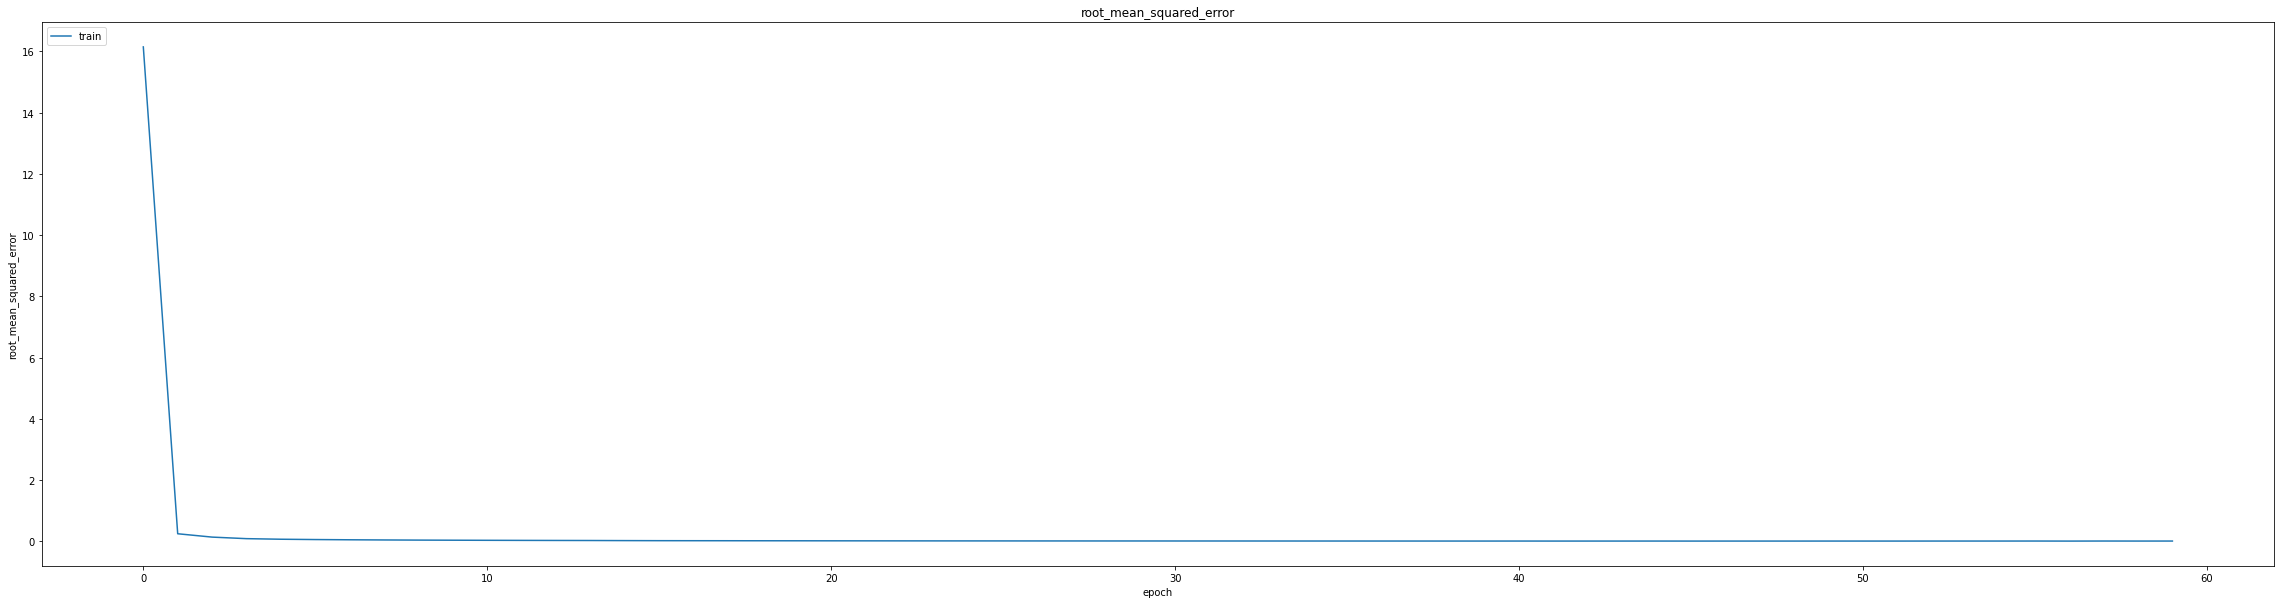

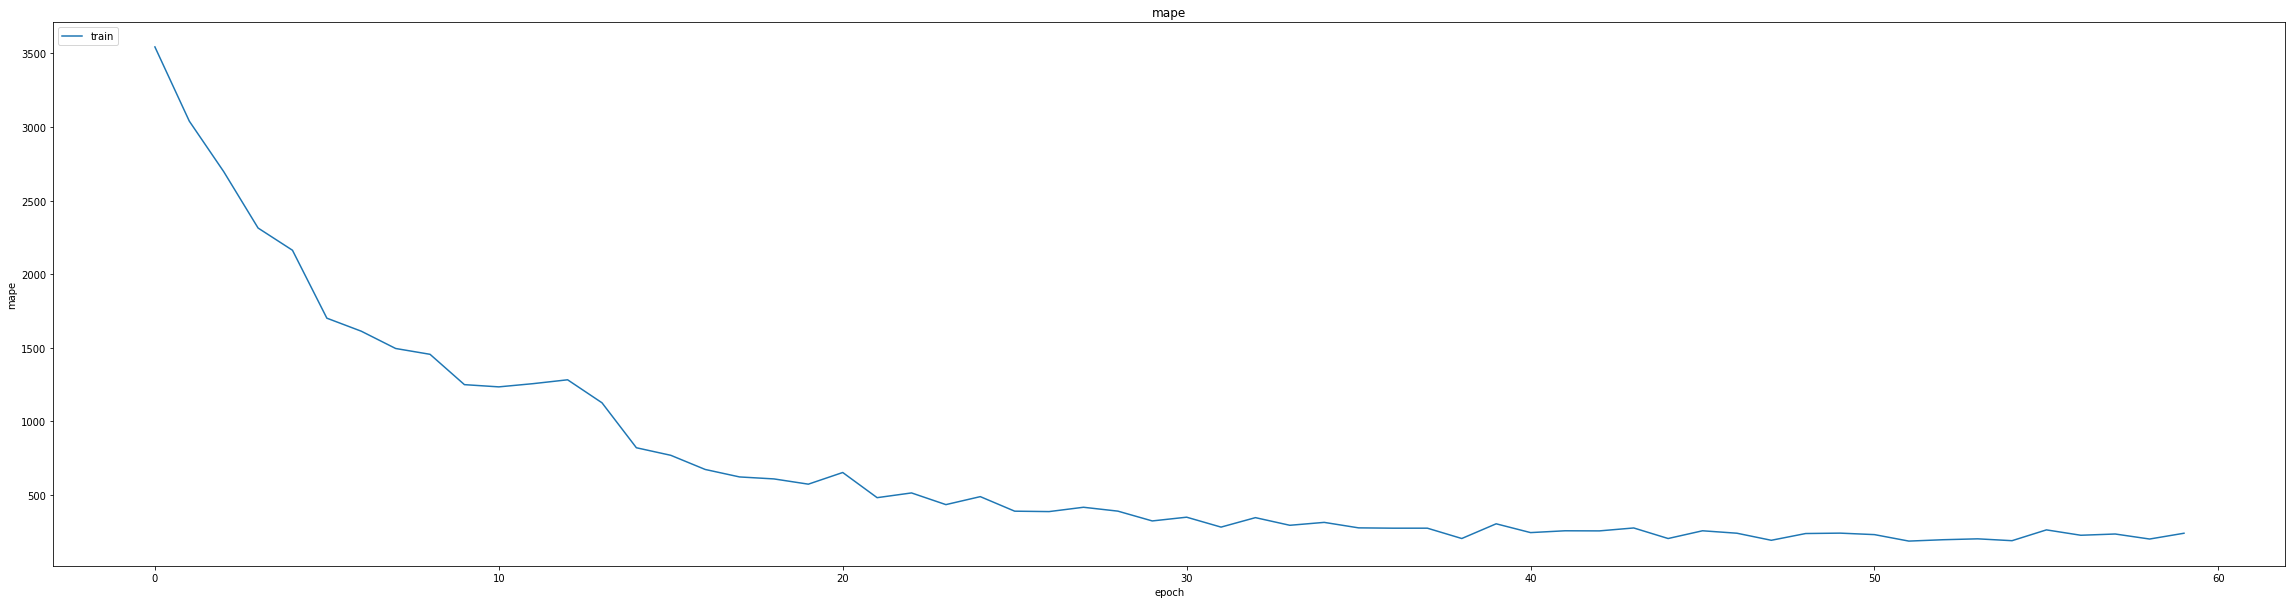

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

1390/1390 [==============================] - 5s 3ms/step
0.9994814723799714


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_LSTM(60-40)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)

history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/20
347/347 [==============================] - ETA: 0s - loss: 0.0015 - mae: 0.0144 - mse: 0.0015 - root_mean_squared_error: 0.0386 - mape: 440.3427
Epoch 1: val_mse did not improve from 0.00003
347/347 [==============================] - 9s 19ms/step - loss: 0.0015 - mae: 0.0144 - mse: 0.0015 - root_mean_squared_error: 0.0386 - mape: 440.3427 - val_loss: 5.0331e-05 - val_mae: 0.0053 - val_mse: 5.0331e-05 - val_root_mean_squared_error: 0.0071 - val_mape: 1030.8846 - lr: 0.0010
Epoch 2/20
345/347 [============================>.] - ETA: 0s - loss: 3.8518e-05 - mae: 0.0047 - mse: 3.8518e-05 - root_mean_squared_error: 0.0062 - mape: 177.7789
Epoch 2: val_mse did not improve from 0.00003
347/347 [==============================] - 6s 17ms/step - loss: 3.8502e-05 - mae: 0.0047 - mse: 3.8502e-05 - root_mean_squared_error: 0.0062 - mape: 177.0135 - val_loss: 3.2850e-05 - val_mae: 0.0045 - val_mse: 3.2850e-05 - val_root_mean_squared_error: 0.0057 - val_mape: 589.8880 - lr: 0.0010
lr change

347/347 [==============================] - 14s 40ms/step - loss: 2.7702e-05 - mae: 0.0040 - mse: 2.7702e-05 - root_mean_squared_error: 0.0053 - mape: 181.5524 - val_loss: 2.4465e-05 - val_mae: 0.0037 - val_mse: 2.4465e-05 - val_root_mean_squared_error: 0.0049 - val_mape: 571.7903 - lr: 8.1000e-04
Epoch 6/20
345/347 [============================>.] - ETA: 0s - loss: 2.6763e-05 - mae: 0.0040 - mse: 2.6763e-05 - root_mean_squared_error: 0.0052 - mape: 192.1487
Epoch 6: val_mse did not improve from 0.00002
347/347 [==============================] - 6s 17ms/step - loss: 2.6750e-05 - mae: 0.0040 - mse: 2.6750e-05 - root_mean_squared_error: 0.0052 - mape: 191.3200 - val_loss: 3.7309e-05 - val_mae: 0.0051 - val_mse: 3.7309e-05 - val_root_mean_squared_error: 0.0061 - val_mape: 491.9495 - lr: 8.1000e-04
lr changed to 0.0007290000503417104
Epoch 7/20
344/347 [============================>.] - ETA: 0s - loss: 2.5598e-05 - mae: 0.0039 - mse: 2.5598e-05 - root_mean_squared_error: 0.0051 - mape: 210.

347/347 [==============================] - 13s 37ms/step - loss: 2.6974e-05 - mae: 0.0040 - mse: 2.6974e-05 - root_mean_squared_error: 0.0052 - mape: 193.0868 - val_loss: 2.2573e-05 - val_mae: 0.0034 - val_mse: 2.2573e-05 - val_root_mean_squared_error: 0.0048 - val_mape: 538.1655 - lr: 7.2900e-04
lr changed to 0.0006561000715009868
Epoch 9/20
344/347 [============================>.] - ETA: 0s - loss: 3.2070e-05 - mae: 0.0043 - mse: 3.2070e-05 - root_mean_squared_error: 0.0057 - mape: 213.9512
Epoch 9: val_mse did not improve from 0.00002
347/347 [==============================] - 6s 17ms/step - loss: 3.2030e-05 - mae: 0.0043 - mse: 3.2030e-05 - root_mean_squared_error: 0.0057 - mape: 212.4145 - val_loss: 3.1303e-05 - val_mae: 0.0045 - val_mse: 3.1303e-05 - val_root_mean_squared_error: 0.0056 - val_mape: 526.9158 - lr: 6.5610e-04
Epoch 10/20
347/347 [==============================] - ETA: 0s - loss: 4.1251e-05 - mae: 0.0048 - mse: 4.1251e-05 - root_mean_squared_error: 0.0064 - mape: 164

347/347 [==============================] - 14s 39ms/step - loss: 2.6217e-05 - mae: 0.0039 - mse: 2.6217e-05 - root_mean_squared_error: 0.0051 - mape: 150.7744 - val_loss: 2.2091e-05 - val_mae: 0.0035 - val_mse: 2.2091e-05 - val_root_mean_squared_error: 0.0047 - val_mape: 506.4204 - lr: 5.9049e-04
Epoch 12/20
347/347 [==============================] - ETA: 0s - loss: 3.7398e-05 - mae: 0.0046 - mse: 3.7398e-05 - root_mean_squared_error: 0.0061 - mape: 156.6003
Epoch 12: val_mse did not improve from 0.00002
347/347 [==============================] - 6s 17ms/step - loss: 3.7398e-05 - mae: 0.0046 - mse: 3.7398e-05 - root_mean_squared_error: 0.0061 - mape: 156.6003 - val_loss: 8.4966e-05 - val_mae: 0.0079 - val_mse: 8.4966e-05 - val_root_mean_squared_error: 0.0092 - val_mape: 439.6443 - lr: 5.9049e-04
lr changed to 0.0005314410547725857
Epoch 13/20
347/347 [==============================] - ETA: 0s - loss: 2.4840e-05 - mae: 0.0038 - mse: 2.4840e-05 - root_mean_squared_error: 0.0050 - mape: 1

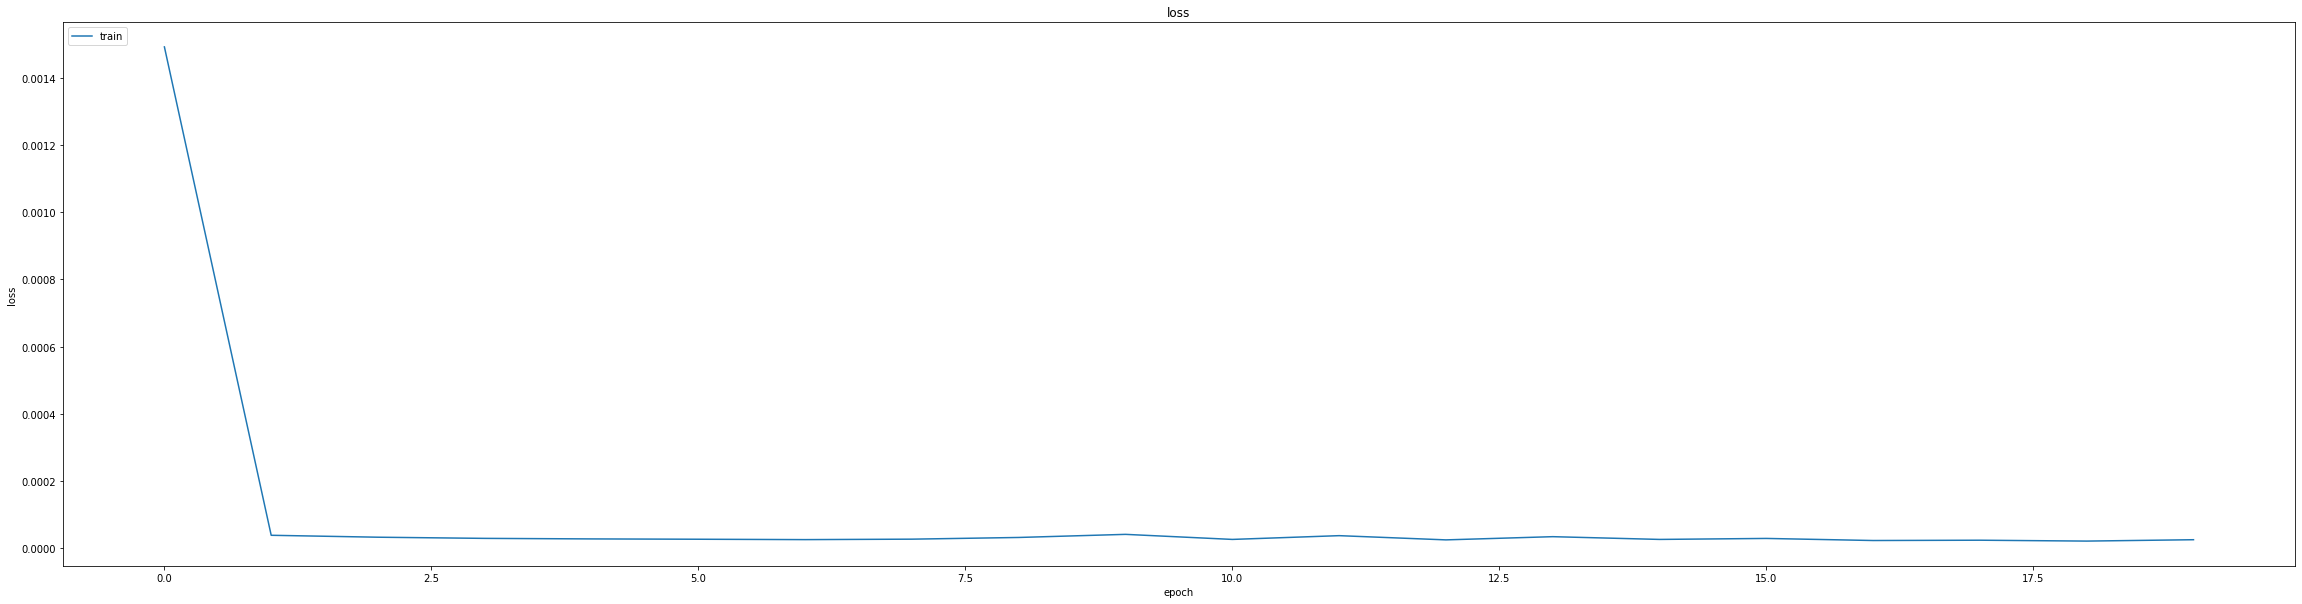

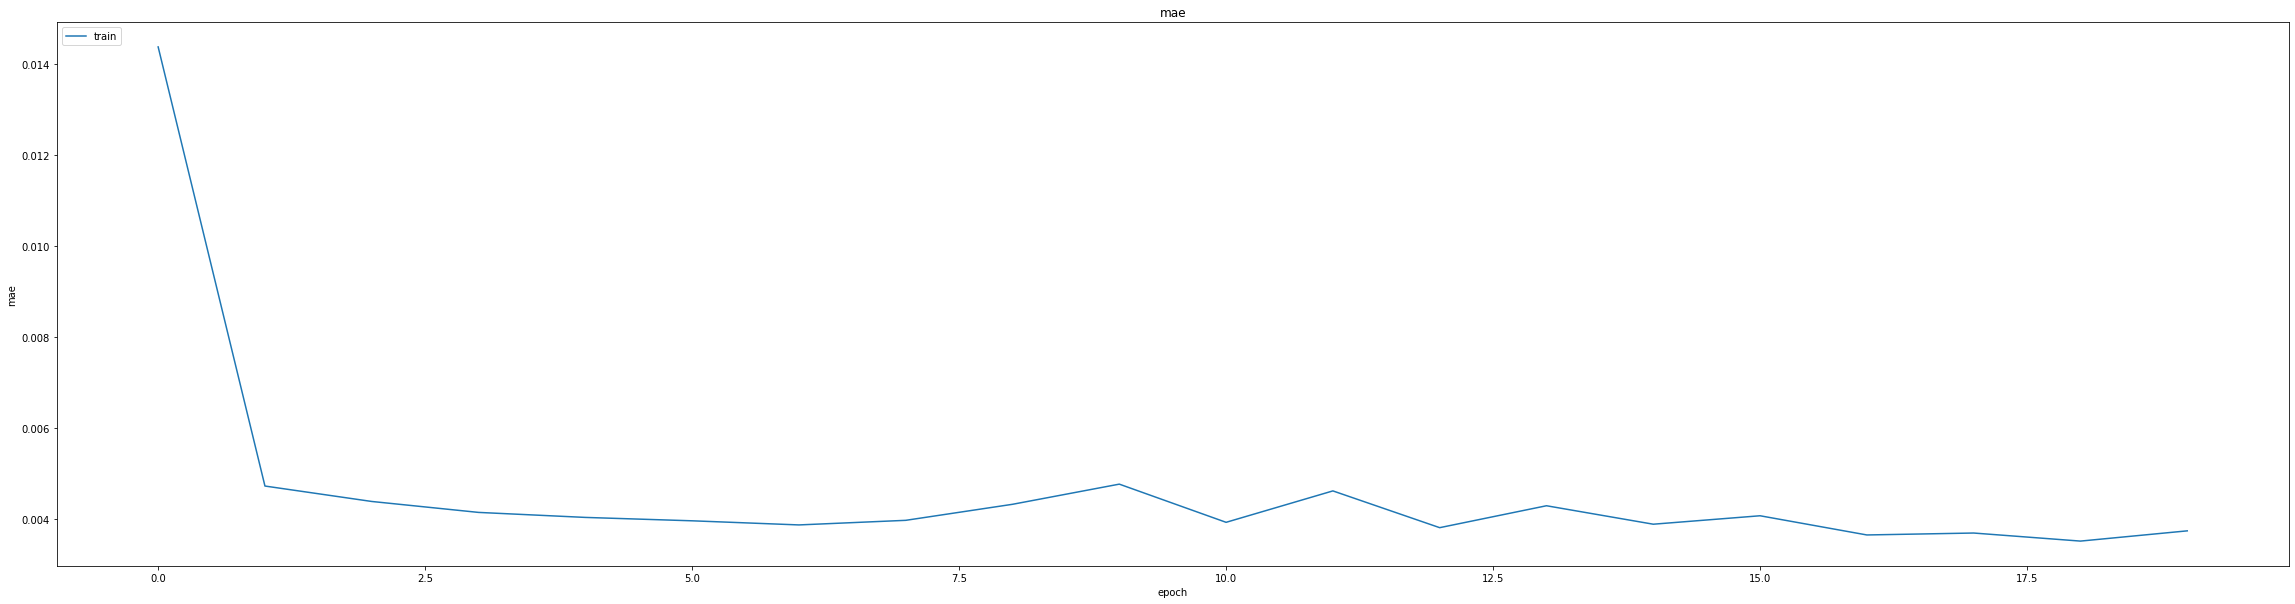

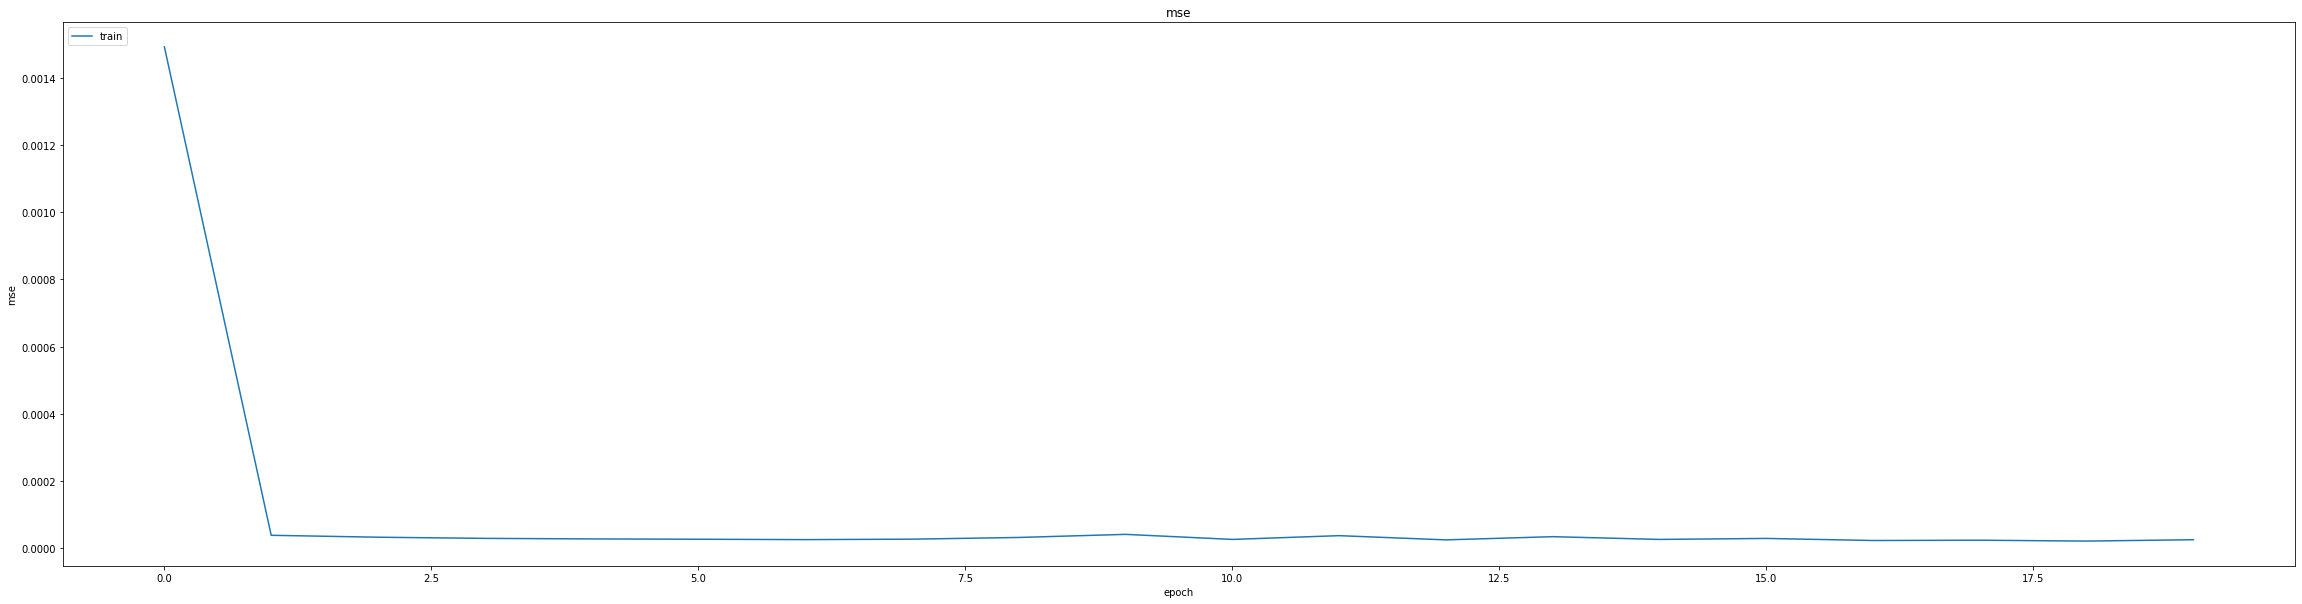

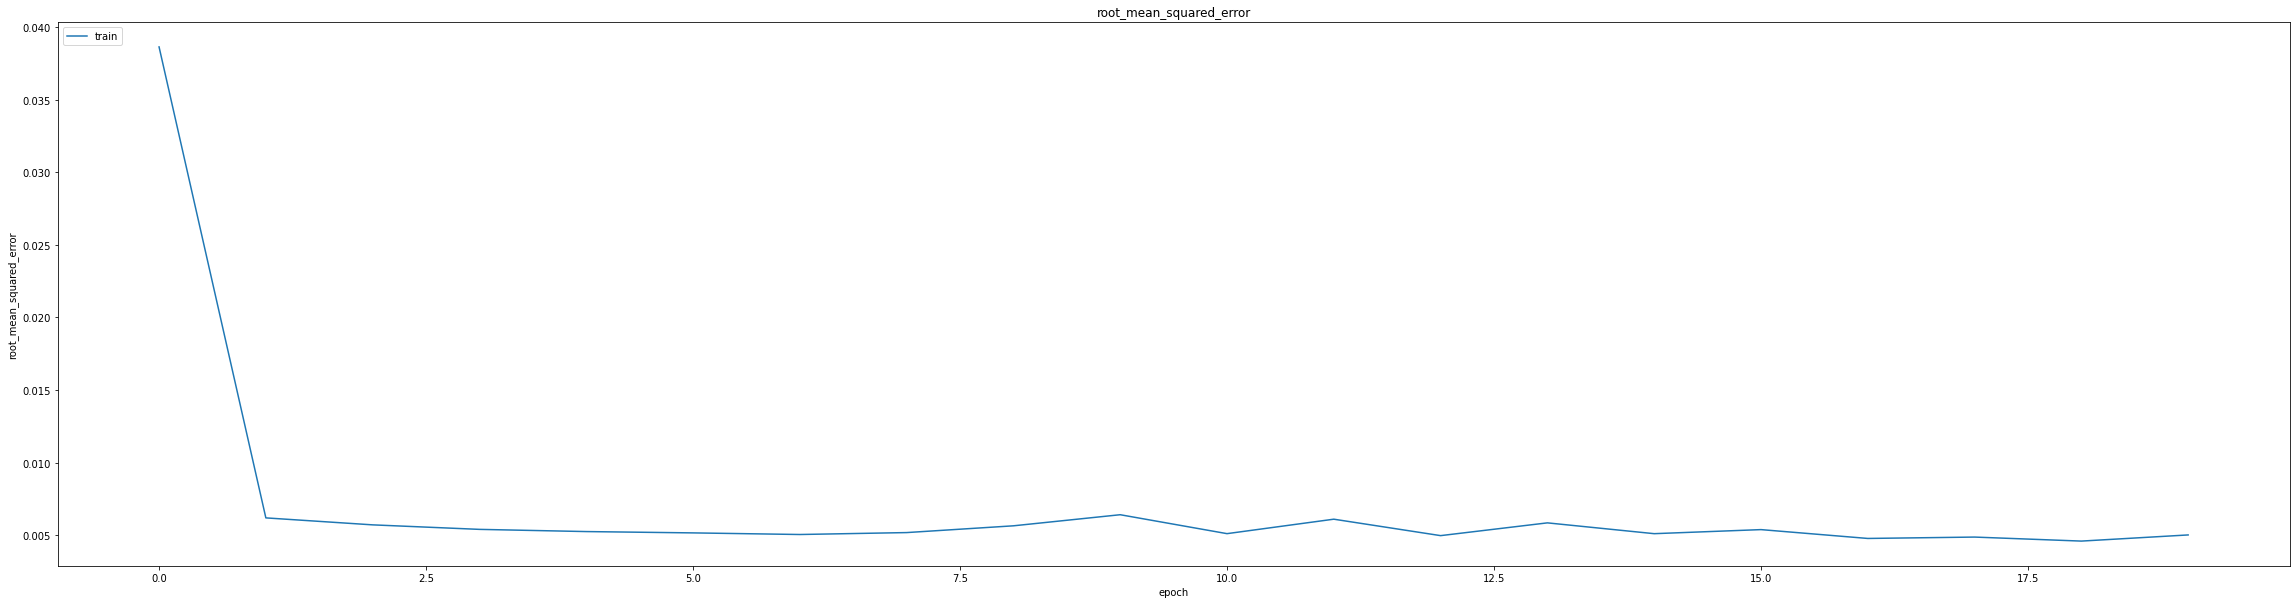

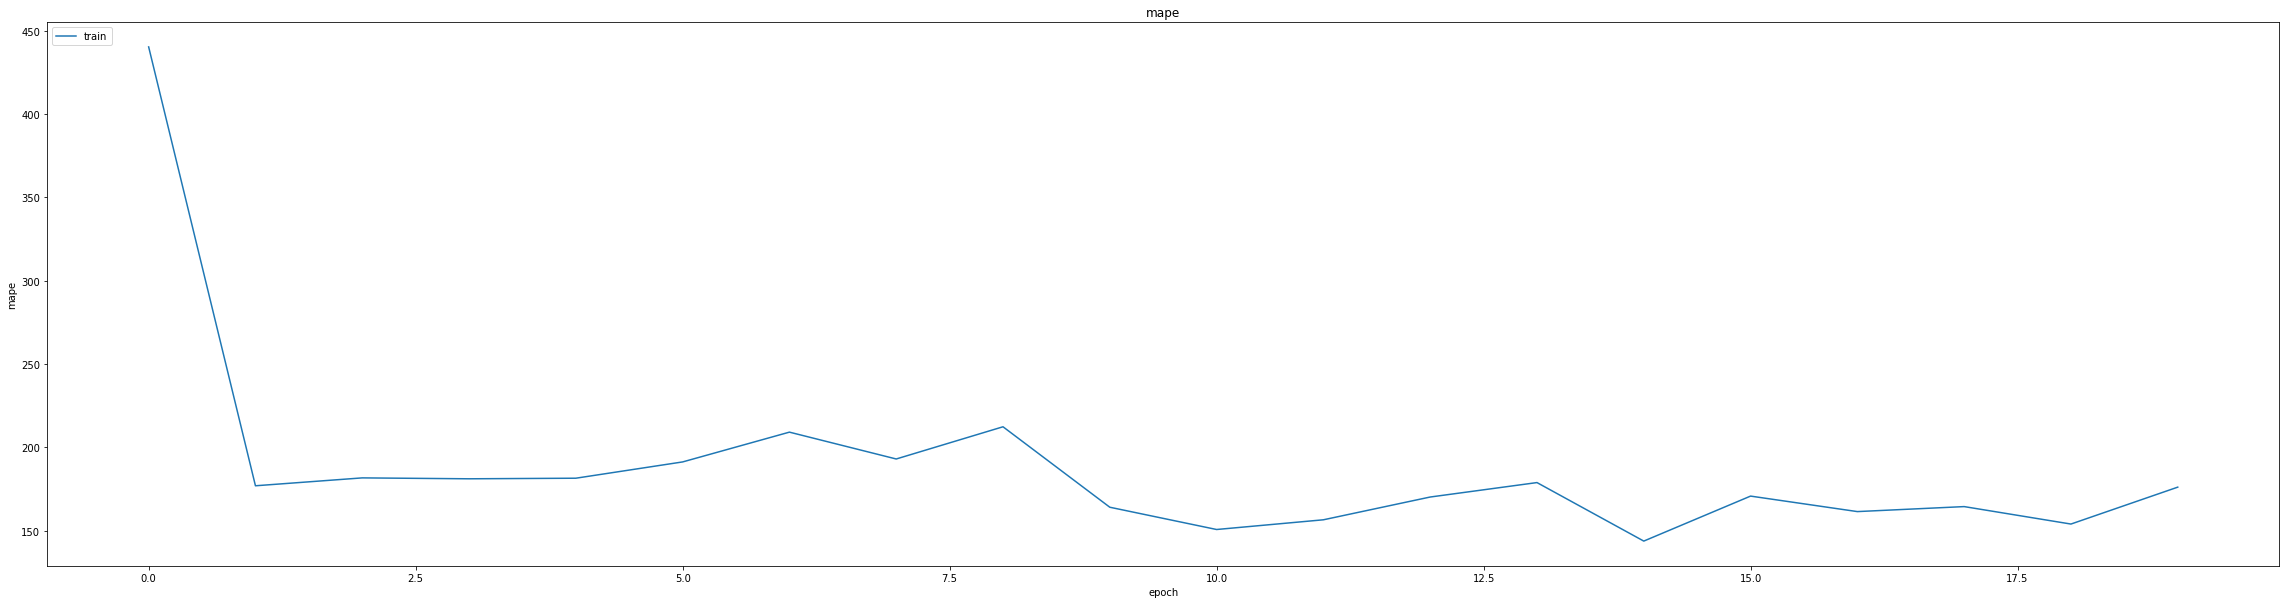

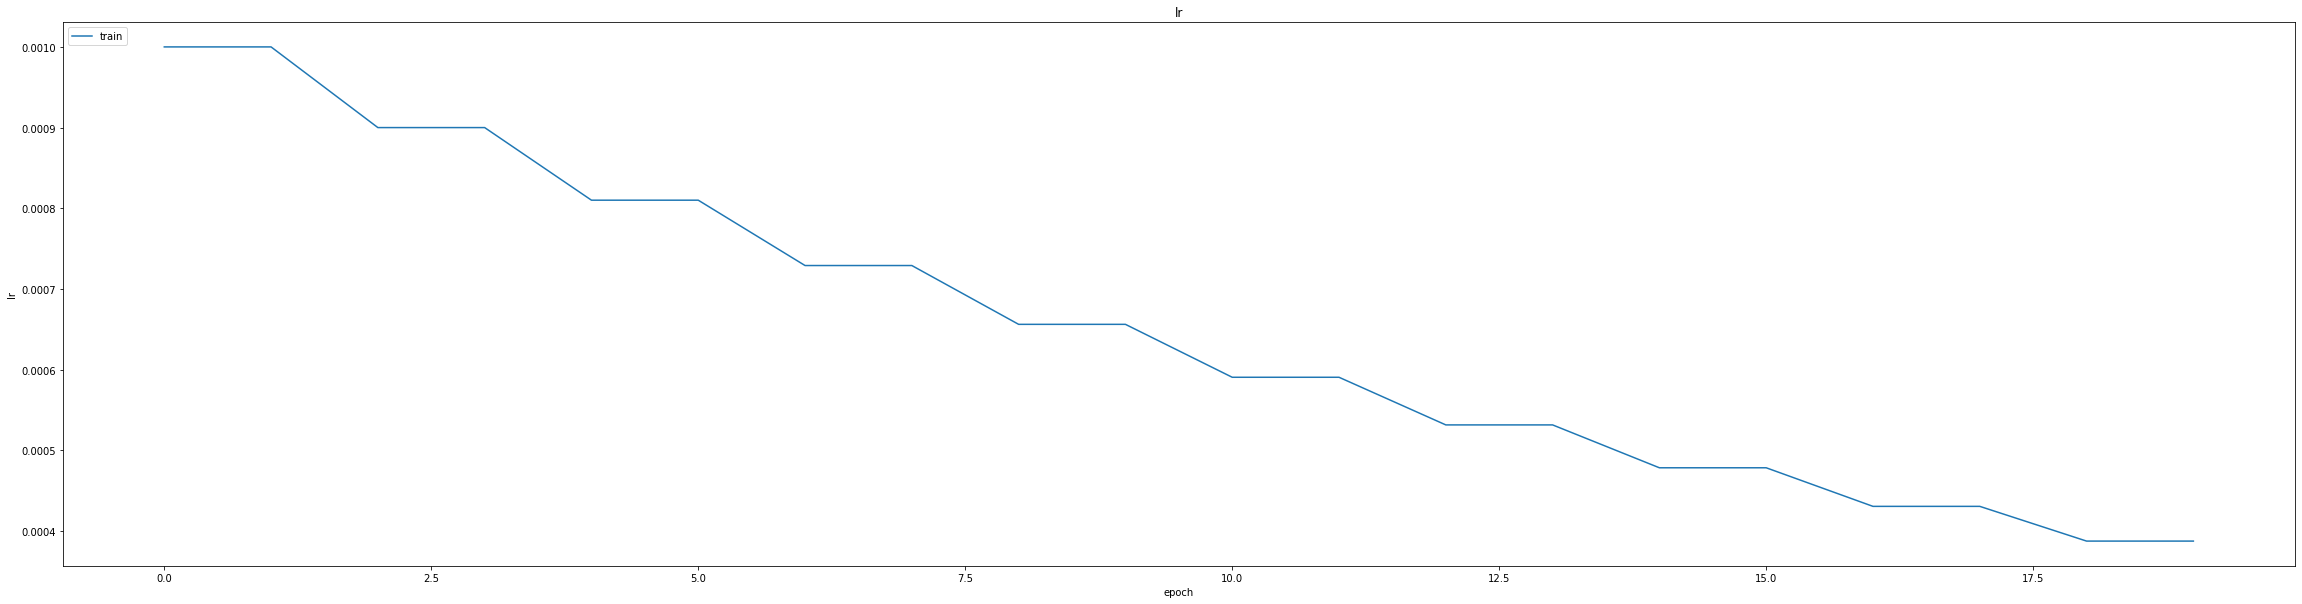

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.003413761965930462
0.004700054880231619
1390/1390 [==============================] - 5s 3ms/step
0.9989815507112902


1390/1390 [==============================] - 5s 3ms/step


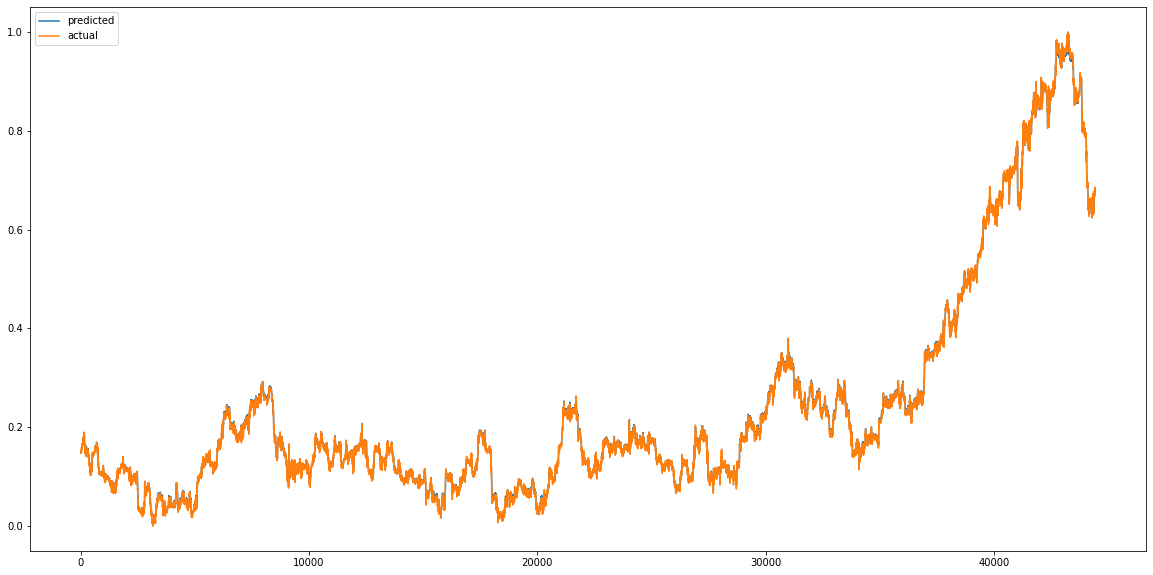

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_LSTM(60-40)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


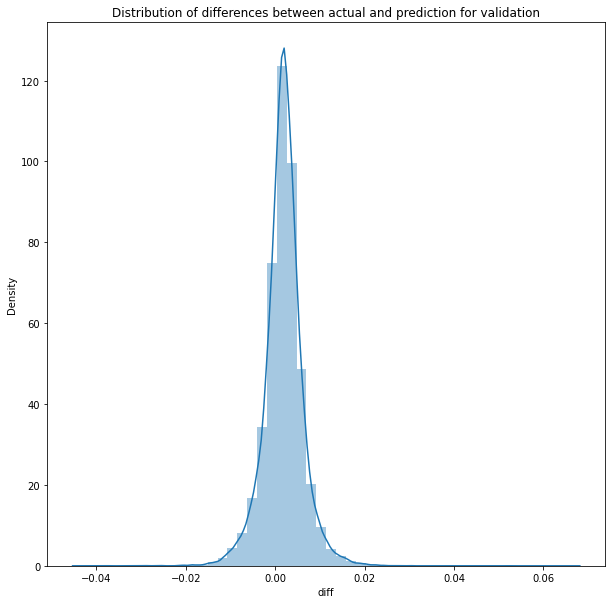

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

1390/1390 [==============================] - 5s 3ms/step


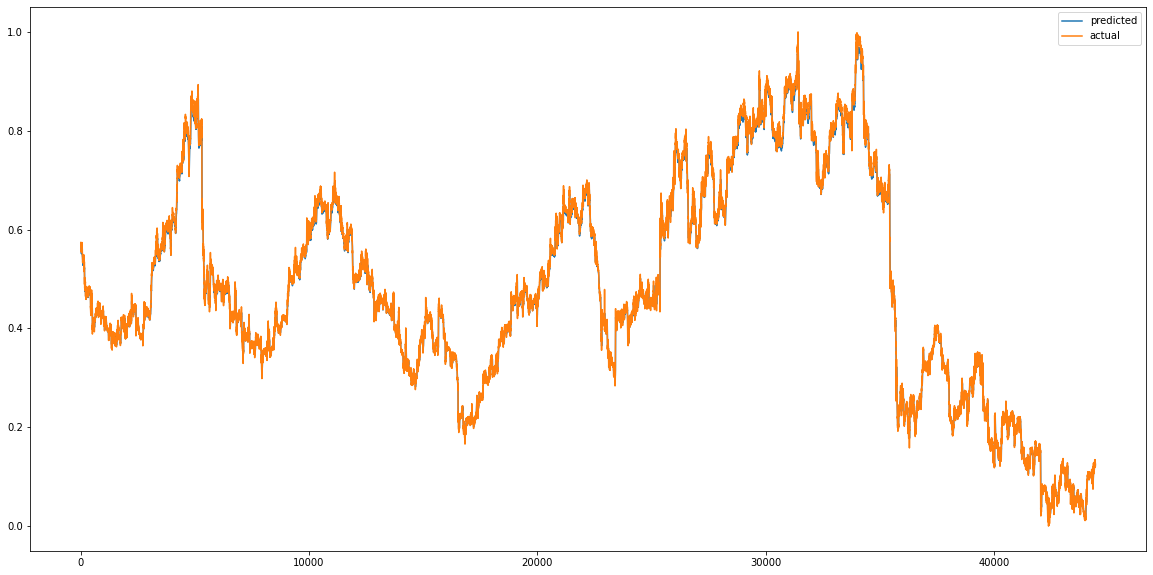

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


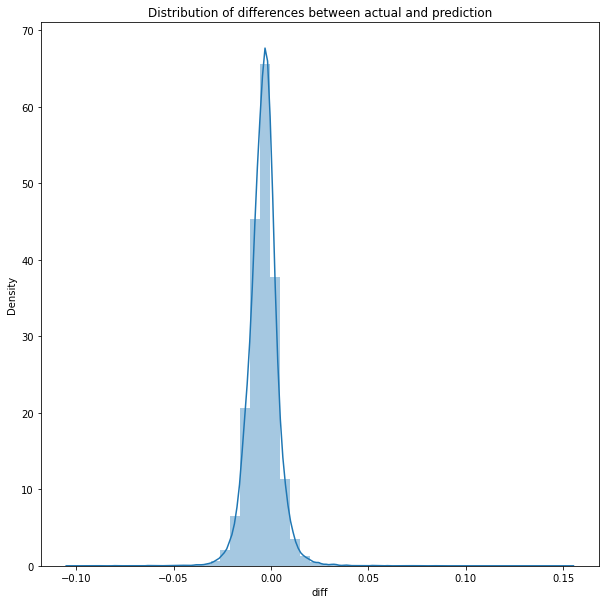

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', test_r2_score)
predictions['diff'].describe()

MSE :  7.414809223597397e-05
RMSE :  0.008610928651195176
MAE :  0.006360947083334626
1390/1390 [==============================] - 4s 3ms/step
R2_Score  : 0.9984555130921055


count    44453.000000
mean        -0.003935
std          0.007659
min         -0.102394
25%         -0.008055
50%         -0.003681
75%          0.000151
max          0.152618
Name: diff, dtype: float64

**CNN_GRU_MODEL**

In [ ]:
model= thesis.CNN_GRU_Model(x_train)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 24, 64)            2368      
                                                                 
 gru (GRU)                   (None, 24, 256)           247296    
                                                                 
 dropout_2 (Dropout)         (None, 24, 256)           0         
                                                                 
 gru_1 (GRU)                 (None, 64)                61824     
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 16)                528       
                                                                 
 dense_8 (Dense)             (None, 1)                

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_GRU(60-40)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=60
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/60
343/347 [============================>.] - ETA: 0s - loss: 447.3051 - mae: 3.4891 - mse: 447.3051 - root_mean_squared_error: 21.1496 - mape: 7805.6968
Epoch 1: val_mse improved from inf to 0.24528, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_GRU(60-40)


347/347 [==============================] - 15s 36ms/step - loss: 442.7831 - mae: 3.4571 - mse: 442.7831 - root_mean_squared_error: 21.0424 - mape: 7728.3540 - val_loss: 0.2453 - val_mae: 0.4699 - val_mse: 0.2453 - val_root_mean_squared_error: 0.4953 - val_mape: 15773.0908
Epoch 2/60
344/347 [============================>.] - ETA: 0s - loss: 0.0933 - mae: 0.2717 - mse: 0.0933 - root_mean_squared_error: 0.3054 - mape: 5408.0547
Epoch 2: val_mse improved from 0.24528 to 0.14527, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_GRU(60-40)


347/347 [==============================] - 12s 35ms/step - loss: 0.0931 - mae: 0.2715 - mse: 0.0931 - root_mean_squared_error: 0.3051 - mape: 5369.7031 - val_loss: 0.1453 - val_mae: 0.3648 - val_mse: 0.1453 - val_root_mean_squared_error: 0.3811 - val_mape: 12683.2451
Epoch 3/60
345/347 [============================>.] - ETA: 0s - loss: 0.0663 - mae: 0.2294 - mse: 0.0663 - root_mean_squared_error: 0.2574 - mape: 3981.8894
Epoch 3: val_mse improved from 0.14527 to 0.11073, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_GRU(60-40)


347/347 [==============================] - 12s 34ms/step - loss: 0.0662 - mae: 0.2294 - mse: 0.0662 - root_mean_squared_error: 0.2574 - mape: 3965.0042 - val_loss: 0.1107 - val_mae: 0.3180 - val_mse: 0.1107 - val_root_mean_squared_error: 0.3328 - val_mape: 11243.8984
Epoch 4/60
346/347 [============================>.] - ETA: 0s - loss: 0.0603 - mae: 0.2137 - mse: 0.0603 - root_mean_squared_error: 0.2456 - mape: 3736.4526
Epoch 4: val_mse improved from 0.11073 to 0.09694, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_GRU(60-40)


347/347 [==============================] - 12s 36ms/step - loss: 0.0603 - mae: 0.2137 - mse: 0.0603 - root_mean_squared_error: 0.2456 - mape: 3731.1548 - val_loss: 0.0969 - val_mae: 0.2964 - val_mse: 0.0969 - val_root_mean_squared_error: 0.3114 - val_mape: 10563.5547
Epoch 5/60
345/347 [============================>.] - ETA: 0s - loss: 0.0588 - mae: 0.2071 - mse: 0.0588 - root_mean_squared_error: 0.2425 - mape: 3575.7659
Epoch 5: val_mse improved from 0.09694 to 0.09102, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_GRU(60-40)


347/347 [==============================] - 12s 35ms/step - loss: 0.0588 - mae: 0.2070 - mse: 0.0588 - root_mean_squared_error: 0.2425 - mape: 3560.6062 - val_loss: 0.0910 - val_mae: 0.2864 - val_mse: 0.0910 - val_root_mean_squared_error: 0.3017 - val_mape: 10241.6436
Epoch 6/60
346/347 [============================>.] - ETA: 0s - loss: 0.0578 - mae: 0.2042 - mse: 0.0578 - root_mean_squared_error: 0.2404 - mape: 3491.0901
Epoch 6: val_mse improved from 0.09102 to 0.08967, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_GRU(60-40)


347/347 [==============================] - 12s 34ms/step - loss: 0.0578 - mae: 0.2041 - mse: 0.0578 - root_mean_squared_error: 0.2404 - mape: 3486.1348 - val_loss: 0.0897 - val_mae: 0.2845 - val_mse: 0.0897 - val_root_mean_squared_error: 0.2995 - val_mape: 10170.3379
Epoch 7/60
344/347 [============================>.] - ETA: 0s - loss: 0.0560 - mae: 0.2010 - mse: 0.0560 - root_mean_squared_error: 0.2366 - mape: 3539.3418
Epoch 7: val_mse improved from 0.08967 to 0.08595, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_GRU(60-40)


347/347 [==============================] - 12s 35ms/step - loss: 0.0560 - mae: 0.2010 - mse: 0.0560 - root_mean_squared_error: 0.2366 - mape: 3514.4199 - val_loss: 0.0860 - val_mae: 0.2784 - val_mse: 0.0860 - val_root_mean_squared_error: 0.2932 - val_mape: 9958.3633
Epoch 8/60
345/347 [============================>.] - ETA: 0s - loss: 0.0526 - mae: 0.1952 - mse: 0.0526 - root_mean_squared_error: 0.2294 - mape: 3479.5359
Epoch 8: val_mse improved from 0.08595 to 0.08370, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_GRU(60-40)


347/347 [==============================] - 12s 35ms/step - loss: 0.0526 - mae: 0.1951 - mse: 0.0526 - root_mean_squared_error: 0.2293 - mape: 3464.7544 - val_loss: 0.0837 - val_mae: 0.2756 - val_mse: 0.0837 - val_root_mean_squared_error: 0.2893 - val_mape: 9876.6133
Epoch 9/60
344/347 [============================>.] - ETA: 0s - loss: 0.0401 - mae: 0.1708 - mse: 0.0401 - root_mean_squared_error: 0.2002 - mape: 3232.7629
Epoch 9: val_mse improved from 0.08370 to 0.05960, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_GRU(60-40)


347/347 [==============================] - 12s 34ms/step - loss: 0.0400 - mae: 0.1706 - mse: 0.0400 - root_mean_squared_error: 0.1999 - mape: 3209.9016 - val_loss: 0.0596 - val_mae: 0.2288 - val_mse: 0.0596 - val_root_mean_squared_error: 0.2441 - val_mape: 9074.3125
Epoch 10/60
345/347 [============================>.] - ETA: 0s - loss: 0.0159 - mae: 0.0954 - mse: 0.0159 - root_mean_squared_error: 0.1260 - mape: 2823.8589
Epoch 10: val_mse improved from 0.05960 to 0.03350, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_GRU(60-40)


347/347 [==============================] - 12s 35ms/step - loss: 0.0158 - mae: 0.0953 - mse: 0.0158 - root_mean_squared_error: 0.1259 - mape: 2811.7715 - val_loss: 0.0335 - val_mae: 0.1625 - val_mse: 0.0335 - val_root_mean_squared_error: 0.1830 - val_mape: 7650.0986
Epoch 11/60
343/347 [============================>.] - ETA: 0s - loss: 0.0079 - mae: 0.0599 - mse: 0.0079 - root_mean_squared_error: 0.0889 - mape: 2421.7524
Epoch 11: val_mse improved from 0.03350 to 0.02141, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_GRU(60-40)


347/347 [==============================] - 12s 35ms/step - loss: 0.0079 - mae: 0.0598 - mse: 0.0079 - root_mean_squared_error: 0.0888 - mape: 2397.7332 - val_loss: 0.0214 - val_mae: 0.1255 - val_mse: 0.0214 - val_root_mean_squared_error: 0.1463 - val_mape: 6656.9912
Epoch 12/60
345/347 [============================>.] - ETA: 0s - loss: 0.0050 - mae: 0.0453 - mse: 0.0050 - root_mean_squared_error: 0.0705 - mape: 2114.5864
Epoch 12: val_mse improved from 0.02141 to 0.01490, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_GRU(60-40)


347/347 [==============================] - 12s 35ms/step - loss: 0.0050 - mae: 0.0453 - mse: 0.0050 - root_mean_squared_error: 0.0705 - mape: 2105.4985 - val_loss: 0.0149 - val_mae: 0.1010 - val_mse: 0.0149 - val_root_mean_squared_error: 0.1221 - val_mape: 5968.9263
Epoch 13/60
345/347 [============================>.] - ETA: 0s - loss: 0.0035 - mae: 0.0370 - mse: 0.0035 - root_mean_squared_error: 0.0588 - mape: 1913.7900
Epoch 13: val_mse improved from 0.01490 to 0.01078, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_GRU(60-40)


347/347 [==============================] - 12s 34ms/step - loss: 0.0035 - mae: 0.0370 - mse: 0.0035 - root_mean_squared_error: 0.0588 - mape: 1905.5642 - val_loss: 0.0108 - val_mae: 0.0832 - val_mse: 0.0108 - val_root_mean_squared_error: 0.1038 - val_mape: 5429.5117
Epoch 14/60
344/347 [============================>.] - ETA: 0s - loss: 0.0025 - mae: 0.0317 - mse: 0.0025 - root_mean_squared_error: 0.0505 - mape: 1751.4899
Epoch 14: val_mse improved from 0.01078 to 0.00811, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_GRU(60-40)


347/347 [==============================] - 12s 35ms/step - loss: 0.0025 - mae: 0.0317 - mse: 0.0025 - root_mean_squared_error: 0.0504 - mape: 1738.9742 - val_loss: 0.0081 - val_mae: 0.0708 - val_mse: 0.0081 - val_root_mean_squared_error: 0.0901 - val_mape: 5001.4409
Epoch 15/60
347/347 [==============================] - ETA: 0s - loss: 0.0020 - mae: 0.0283 - mse: 0.0020 - root_mean_squared_error: 0.0443 - mape: 1666.3739
Epoch 15: val_mse improved from 0.00811 to 0.00626, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_GRU(60-40)


347/347 [==============================] - 13s 36ms/step - loss: 0.0020 - mae: 0.0283 - mse: 0.0020 - root_mean_squared_error: 0.0443 - mape: 1666.3739 - val_loss: 0.0063 - val_mae: 0.0612 - val_mse: 0.0063 - val_root_mean_squared_error: 0.0791 - val_mape: 4645.0620
Epoch 16/60
345/347 [============================>.] - ETA: 0s - loss: 0.0016 - mae: 0.0256 - mse: 0.0016 - root_mean_squared_error: 0.0396 - mape: 1607.8812
Epoch 16: val_mse improved from 0.00626 to 0.00491, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_GRU(60-40)


347/347 [==============================] - 12s 34ms/step - loss: 0.0016 - mae: 0.0256 - mse: 0.0016 - root_mean_squared_error: 0.0396 - mape: 1600.9678 - val_loss: 0.0049 - val_mae: 0.0530 - val_mse: 0.0049 - val_root_mean_squared_error: 0.0701 - val_mape: 4338.5615
Epoch 17/60
345/347 [============================>.] - ETA: 0s - loss: 0.0012 - mae: 0.0230 - mse: 0.0012 - root_mean_squared_error: 0.0353 - mape: 1422.6554
Epoch 17: val_mse improved from 0.00491 to 0.00372, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_GRU(60-40)


347/347 [==============================] - 12s 35ms/step - loss: 0.0012 - mae: 0.0230 - mse: 0.0012 - root_mean_squared_error: 0.0353 - mape: 1416.5354 - val_loss: 0.0037 - val_mae: 0.0445 - val_mse: 0.0037 - val_root_mean_squared_error: 0.0610 - val_mape: 4037.6716
Epoch 18/60
347/347 [==============================] - ETA: 0s - loss: 9.2280e-04 - mae: 0.0197 - mse: 9.2280e-04 - root_mean_squared_error: 0.0304 - mape: 1345.8053
Epoch 18: val_mse improved from 0.00372 to 0.00274, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_GRU(60-40)


347/347 [==============================] - 12s 35ms/step - loss: 9.2280e-04 - mae: 0.0197 - mse: 9.2280e-04 - root_mean_squared_error: 0.0304 - mape: 1345.8053 - val_loss: 0.0027 - val_mae: 0.0367 - val_mse: 0.0027 - val_root_mean_squared_error: 0.0524 - val_mape: 3712.3789
Epoch 19/60
346/347 [============================>.] - ETA: 0s - loss: 6.8130e-04 - mae: 0.0171 - mse: 6.8130e-04 - root_mean_squared_error: 0.0261 - mape: 1183.7078
Epoch 19: val_mse improved from 0.00274 to 0.00207, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_GRU(60-40)


347/347 [==============================] - 12s 34ms/step - loss: 6.8121e-04 - mae: 0.0171 - mse: 6.8121e-04 - root_mean_squared_error: 0.0261 - mape: 1182.0027 - val_loss: 0.0021 - val_mae: 0.0309 - val_mse: 0.0021 - val_root_mean_squared_error: 0.0455 - val_mape: 3422.9922
Epoch 20/60
343/347 [============================>.] - ETA: 0s - loss: 5.3550e-04 - mae: 0.0154 - mse: 5.3550e-04 - root_mean_squared_error: 0.0231 - mape: 1151.9047
Epoch 20: val_mse improved from 0.00207 to 0.00165, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_GRU(60-40)


347/347 [==============================] - 12s 35ms/step - loss: 5.3507e-04 - mae: 0.0154 - mse: 5.3507e-04 - root_mean_squared_error: 0.0231 - mape: 1140.3484 - val_loss: 0.0017 - val_mae: 0.0271 - val_mse: 0.0017 - val_root_mean_squared_error: 0.0406 - val_mape: 3206.8206
Epoch 21/60
346/347 [============================>.] - ETA: 0s - loss: 4.3600e-04 - mae: 0.0141 - mse: 4.3600e-04 - root_mean_squared_error: 0.0209 - mape: 1099.5033
Epoch 21: val_mse improved from 0.00165 to 0.00135, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_GRU(60-40)


347/347 [==============================] - 12s 35ms/step - loss: 4.3584e-04 - mae: 0.0141 - mse: 4.3584e-04 - root_mean_squared_error: 0.0209 - mape: 1097.9142 - val_loss: 0.0014 - val_mae: 0.0243 - val_mse: 0.0014 - val_root_mean_squared_error: 0.0368 - val_mape: 3028.2830
Epoch 22/60
344/347 [============================>.] - ETA: 0s - loss: 3.6469e-04 - mae: 0.0129 - mse: 3.6469e-04 - root_mean_squared_error: 0.0191 - mape: 1015.7018
Epoch 22: val_mse improved from 0.00135 to 0.00112, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_GRU(60-40)


347/347 [==============================] - 12s 34ms/step - loss: 3.6438e-04 - mae: 0.0129 - mse: 3.6438e-04 - root_mean_squared_error: 0.0191 - mape: 1008.4090 - val_loss: 0.0011 - val_mae: 0.0219 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0335 - val_mape: 2873.5908
Epoch 23/60
343/347 [============================>.] - ETA: 0s - loss: 3.1154e-04 - mae: 0.0120 - mse: 3.1154e-04 - root_mean_squared_error: 0.0177 - mape: 983.1470
Epoch 23: val_mse improved from 0.00112 to 0.00095, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_GRU(60-40)


347/347 [==============================] - 12s 35ms/step - loss: 3.1113e-04 - mae: 0.0120 - mse: 3.1113e-04 - root_mean_squared_error: 0.0176 - mape: 973.3147 - val_loss: 9.5062e-04 - val_mae: 0.0198 - val_mse: 9.5062e-04 - val_root_mean_squared_error: 0.0308 - val_mape: 2739.6504
Epoch 24/60
345/347 [============================>.] - ETA: 0s - loss: 2.7191e-04 - mae: 0.0112 - mse: 2.7191e-04 - root_mean_squared_error: 0.0165 - mape: 952.2158
Epoch 24: val_mse improved from 0.00095 to 0.00081, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_GRU(60-40)


347/347 [==============================] - 12s 35ms/step - loss: 2.7192e-04 - mae: 0.0112 - mse: 2.7192e-04 - root_mean_squared_error: 0.0165 - mape: 948.1133 - val_loss: 8.1065e-04 - val_mae: 0.0181 - val_mse: 8.1065e-04 - val_root_mean_squared_error: 0.0285 - val_mape: 2619.4324
Epoch 25/60
346/347 [============================>.] - ETA: 0s - loss: 2.4044e-04 - mae: 0.0106 - mse: 2.4044e-04 - root_mean_squared_error: 0.0155 - mape: 900.6703
Epoch 25: val_mse improved from 0.00081 to 0.00071, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_GRU(60-40)


347/347 [==============================] - 12s 34ms/step - loss: 2.4047e-04 - mae: 0.0106 - mse: 2.4047e-04 - root_mean_squared_error: 0.0155 - mape: 899.3681 - val_loss: 7.0651e-04 - val_mae: 0.0169 - val_mse: 7.0651e-04 - val_root_mean_squared_error: 0.0266 - val_mape: 2509.8147
Epoch 26/60
343/347 [============================>.] - ETA: 0s - loss: 2.1442e-04 - mae: 0.0101 - mse: 2.1442e-04 - root_mean_squared_error: 0.0146 - mape: 866.3736
Epoch 26: val_mse improved from 0.00071 to 0.00064, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_GRU(60-40)


347/347 [==============================] - 12s 35ms/step - loss: 2.1418e-04 - mae: 0.0101 - mse: 2.1418e-04 - root_mean_squared_error: 0.0146 - mape: 857.6586 - val_loss: 6.4365e-04 - val_mae: 0.0169 - val_mse: 6.4365e-04 - val_root_mean_squared_error: 0.0254 - val_mape: 2408.7524
Epoch 27/60
344/347 [============================>.] - ETA: 0s - loss: 1.9288e-04 - mae: 0.0096 - mse: 1.9288e-04 - root_mean_squared_error: 0.0139 - mape: 873.0855
Epoch 27: val_mse improved from 0.00064 to 0.00056, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_GRU(60-40)


347/347 [==============================] - 12s 35ms/step - loss: 1.9275e-04 - mae: 0.0096 - mse: 1.9275e-04 - root_mean_squared_error: 0.0139 - mape: 866.8604 - val_loss: 5.6285e-04 - val_mae: 0.0158 - val_mse: 5.6285e-04 - val_root_mean_squared_error: 0.0237 - val_mape: 2313.7124
Epoch 28/60
345/347 [============================>.] - ETA: 0s - loss: 1.7025e-04 - mae: 0.0091 - mse: 1.7025e-04 - root_mean_squared_error: 0.0130 - mape: 827.7453
Epoch 28: val_mse improved from 0.00056 to 0.00052, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_GRU(60-40)


347/347 [==============================] - 12s 34ms/step - loss: 1.7029e-04 - mae: 0.0091 - mse: 1.7029e-04 - root_mean_squared_error: 0.0130 - mape: 824.1765 - val_loss: 5.2058e-04 - val_mae: 0.0160 - val_mse: 5.2058e-04 - val_root_mean_squared_error: 0.0228 - val_mape: 2222.5583
Epoch 29/60
344/347 [============================>.] - ETA: 0s - loss: 1.5392e-04 - mae: 0.0086 - mse: 1.5392e-04 - root_mean_squared_error: 0.0124 - mape: 777.3383
Epoch 29: val_mse improved from 0.00052 to 0.00044, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_GRU(60-40)


347/347 [==============================] - 12s 35ms/step - loss: 1.5376e-04 - mae: 0.0086 - mse: 1.5376e-04 - root_mean_squared_error: 0.0124 - mape: 771.7469 - val_loss: 4.4262e-04 - val_mae: 0.0142 - val_mse: 4.4262e-04 - val_root_mean_squared_error: 0.0210 - val_mape: 2135.2312
Epoch 30/60
347/347 [==============================] - ETA: 0s - loss: 1.3993e-04 - mae: 0.0083 - mse: 1.3993e-04 - root_mean_squared_error: 0.0118 - mape: 731.3651
Epoch 30: val_mse improved from 0.00044 to 0.00037, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_GRU(60-40)


347/347 [==============================] - 13s 36ms/step - loss: 1.3993e-04 - mae: 0.0083 - mse: 1.3993e-04 - root_mean_squared_error: 0.0118 - mape: 731.3651 - val_loss: 3.7496e-04 - val_mae: 0.0126 - val_mse: 3.7496e-04 - val_root_mean_squared_error: 0.0194 - val_mape: 2053.4668
Epoch 31/60
343/347 [============================>.] - ETA: 0s - loss: 1.2894e-04 - mae: 0.0080 - mse: 1.2894e-04 - root_mean_squared_error: 0.0114 - mape: 717.2229
Epoch 31: val_mse did not improve from 0.00037
347/347 [==============================] - 5s 15ms/step - loss: 1.2875e-04 - mae: 0.0080 - mse: 1.2875e-04 - root_mean_squared_error: 0.0113 - mape: 710.0092 - val_loss: 3.8779e-04 - val_mae: 0.0144 - val_mse: 3.8779e-04 - val_root_mean_squared_error: 0.0197 - val_mape: 1977.1636
Epoch 32/60
346/347 [============================>.] - ETA: 0s - loss: 1.1881e-04 - mae: 0.0077 - mse: 1.1881e-04 - root_mean_squared_error: 0.0109 - mape: 693.8265
Epoch 32: val_mse improved from 0.00037 to 0.00033, saving m

347/347 [==============================] - 12s 35ms/step - loss: 1.1880e-04 - mae: 0.0077 - mse: 1.1880e-04 - root_mean_squared_error: 0.0109 - mape: 692.8226 - val_loss: 3.2552e-04 - val_mae: 0.0127 - val_mse: 3.2552e-04 - val_root_mean_squared_error: 0.0180 - val_mape: 1903.9814
Epoch 33/60
346/347 [============================>.] - ETA: 0s - loss: 1.1056e-04 - mae: 0.0074 - mse: 1.1056e-04 - root_mean_squared_error: 0.0105 - mape: 654.5082
Epoch 33: val_mse improved from 0.00033 to 0.00031, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_GRU(60-40)


347/347 [==============================] - 12s 34ms/step - loss: 1.1051e-04 - mae: 0.0074 - mse: 1.1051e-04 - root_mean_squared_error: 0.0105 - mape: 653.5593 - val_loss: 3.1495e-04 - val_mae: 0.0130 - val_mse: 3.1495e-04 - val_root_mean_squared_error: 0.0177 - val_mape: 1836.0864
Epoch 34/60
346/347 [============================>.] - ETA: 0s - loss: 1.0198e-04 - mae: 0.0072 - mse: 1.0198e-04 - root_mean_squared_error: 0.0101 - mape: 632.0330
Epoch 34: val_mse improved from 0.00031 to 0.00030, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_GRU(60-40)


347/347 [==============================] - 12s 36ms/step - loss: 1.0197e-04 - mae: 0.0072 - mse: 1.0197e-04 - root_mean_squared_error: 0.0101 - mape: 631.1183 - val_loss: 2.9890e-04 - val_mae: 0.0131 - val_mse: 2.9890e-04 - val_root_mean_squared_error: 0.0173 - val_mape: 1769.3552
Epoch 35/60
345/347 [============================>.] - ETA: 0s - loss: 9.5709e-05 - mae: 0.0070 - mse: 9.5709e-05 - root_mean_squared_error: 0.0098 - mape: 621.1870
Epoch 35: val_mse improved from 0.00030 to 0.00026, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_GRU(60-40)


347/347 [==============================] - 12s 35ms/step - loss: 9.5684e-05 - mae: 0.0070 - mse: 9.5684e-05 - root_mean_squared_error: 0.0098 - mape: 618.5007 - val_loss: 2.5850e-04 - val_mae: 0.0119 - val_mse: 2.5850e-04 - val_root_mean_squared_error: 0.0161 - val_mape: 1705.1311
Epoch 36/60
346/347 [============================>.] - ETA: 0s - loss: 9.0348e-05 - mae: 0.0068 - mse: 9.0348e-05 - root_mean_squared_error: 0.0095 - mape: 602.1532
Epoch 36: val_mse did not improve from 0.00026
347/347 [==============================] - 5s 15ms/step - loss: 9.0330e-05 - mae: 0.0068 - mse: 9.0330e-05 - root_mean_squared_error: 0.0095 - mape: 601.2823 - val_loss: 2.6738e-04 - val_mae: 0.0128 - val_mse: 2.6738e-04 - val_root_mean_squared_error: 0.0164 - val_mape: 1651.4448
Epoch 37/60
346/347 [============================>.] - ETA: 0s - loss: 8.4547e-05 - mae: 0.0066 - mse: 8.4547e-05 - root_mean_squared_error: 0.0092 - mape: 573.6786
Epoch 37: val_mse did not improve from 0.00026
347/347 [====

347/347 [==============================] - 12s 34ms/step - loss: 7.9107e-05 - mae: 0.0064 - mse: 7.9107e-05 - root_mean_squared_error: 0.0089 - mape: 542.1683 - val_loss: 2.3831e-04 - val_mae: 0.0123 - val_mse: 2.3831e-04 - val_root_mean_squared_error: 0.0154 - val_mape: 1544.5464
Epoch 39/60
344/347 [============================>.] - ETA: 0s - loss: 7.5295e-05 - mae: 0.0063 - mse: 7.5295e-05 - root_mean_squared_error: 0.0087 - mape: 517.3144
Epoch 39: val_mse did not improve from 0.00024
347/347 [==============================] - 5s 15ms/step - loss: 7.5355e-05 - mae: 0.0063 - mse: 7.5355e-05 - root_mean_squared_error: 0.0087 - mape: 513.6003 - val_loss: 2.4473e-04 - val_mae: 0.0129 - val_mse: 2.4473e-04 - val_root_mean_squared_error: 0.0156 - val_mape: 1495.2963
Epoch 40/60
345/347 [============================>.] - ETA: 0s - loss: 7.1963e-05 - mae: 0.0062 - mse: 7.1963e-05 - root_mean_squared_error: 0.0085 - mape: 522.4950
Epoch 40: val_mse improved from 0.00024 to 0.00024, saving m

347/347 [==============================] - 12s 35ms/step - loss: 7.1937e-05 - mae: 0.0062 - mse: 7.1937e-05 - root_mean_squared_error: 0.0085 - mape: 520.2379 - val_loss: 2.3793e-04 - val_mae: 0.0127 - val_mse: 2.3793e-04 - val_root_mean_squared_error: 0.0154 - val_mape: 1447.8645
Epoch 41/60
347/347 [==============================] - ETA: 0s - loss: 6.8348e-05 - mae: 0.0060 - mse: 6.8348e-05 - root_mean_squared_error: 0.0083 - mape: 496.7067
Epoch 41: val_mse improved from 0.00024 to 0.00021, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_GRU(60-40)


347/347 [==============================] - 12s 35ms/step - loss: 6.8348e-05 - mae: 0.0060 - mse: 6.8348e-05 - root_mean_squared_error: 0.0083 - mape: 496.7067 - val_loss: 2.0893e-04 - val_mae: 0.0117 - val_mse: 2.0893e-04 - val_root_mean_squared_error: 0.0145 - val_mape: 1400.8151
Epoch 42/60
347/347 [==============================] - ETA: 0s - loss: 6.3942e-05 - mae: 0.0058 - mse: 6.3942e-05 - root_mean_squared_error: 0.0080 - mape: 477.1169
Epoch 42: val_mse did not improve from 0.00021
347/347 [==============================] - 5s 15ms/step - loss: 6.3942e-05 - mae: 0.0058 - mse: 6.3942e-05 - root_mean_squared_error: 0.0080 - mape: 477.1169 - val_loss: 2.4235e-04 - val_mae: 0.0132 - val_mse: 2.4235e-04 - val_root_mean_squared_error: 0.0156 - val_mape: 1360.4456
Epoch 43/60
345/347 [============================>.] - ETA: 0s - loss: 6.2063e-05 - mae: 0.0058 - mse: 6.2063e-05 - root_mean_squared_error: 0.0079 - mape: 462.2729
Epoch 43: val_mse did not improve from 0.00021
347/347 [====

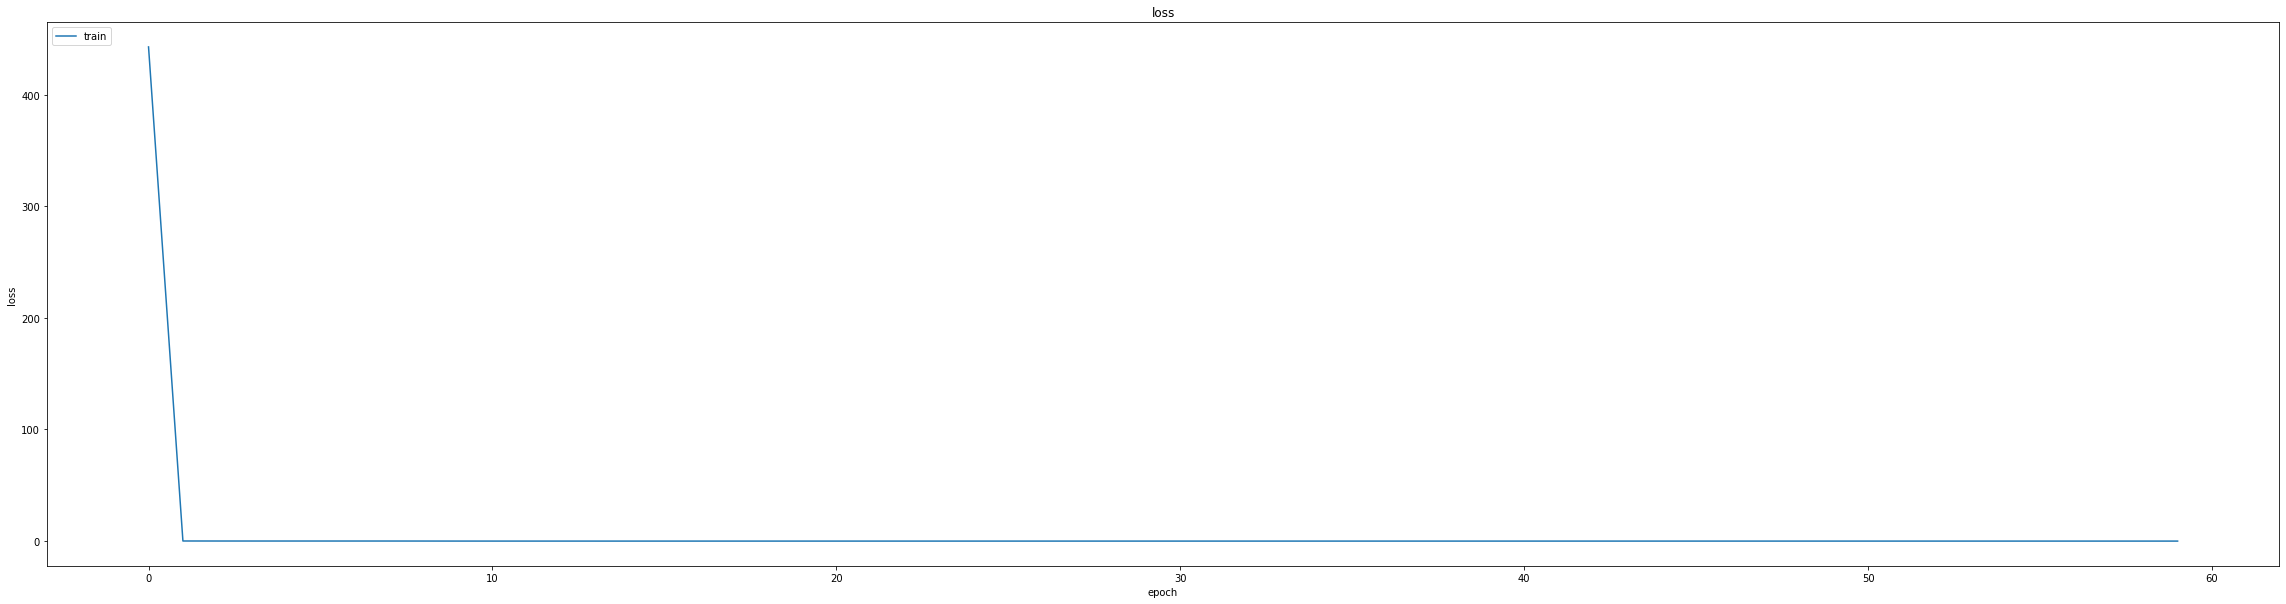

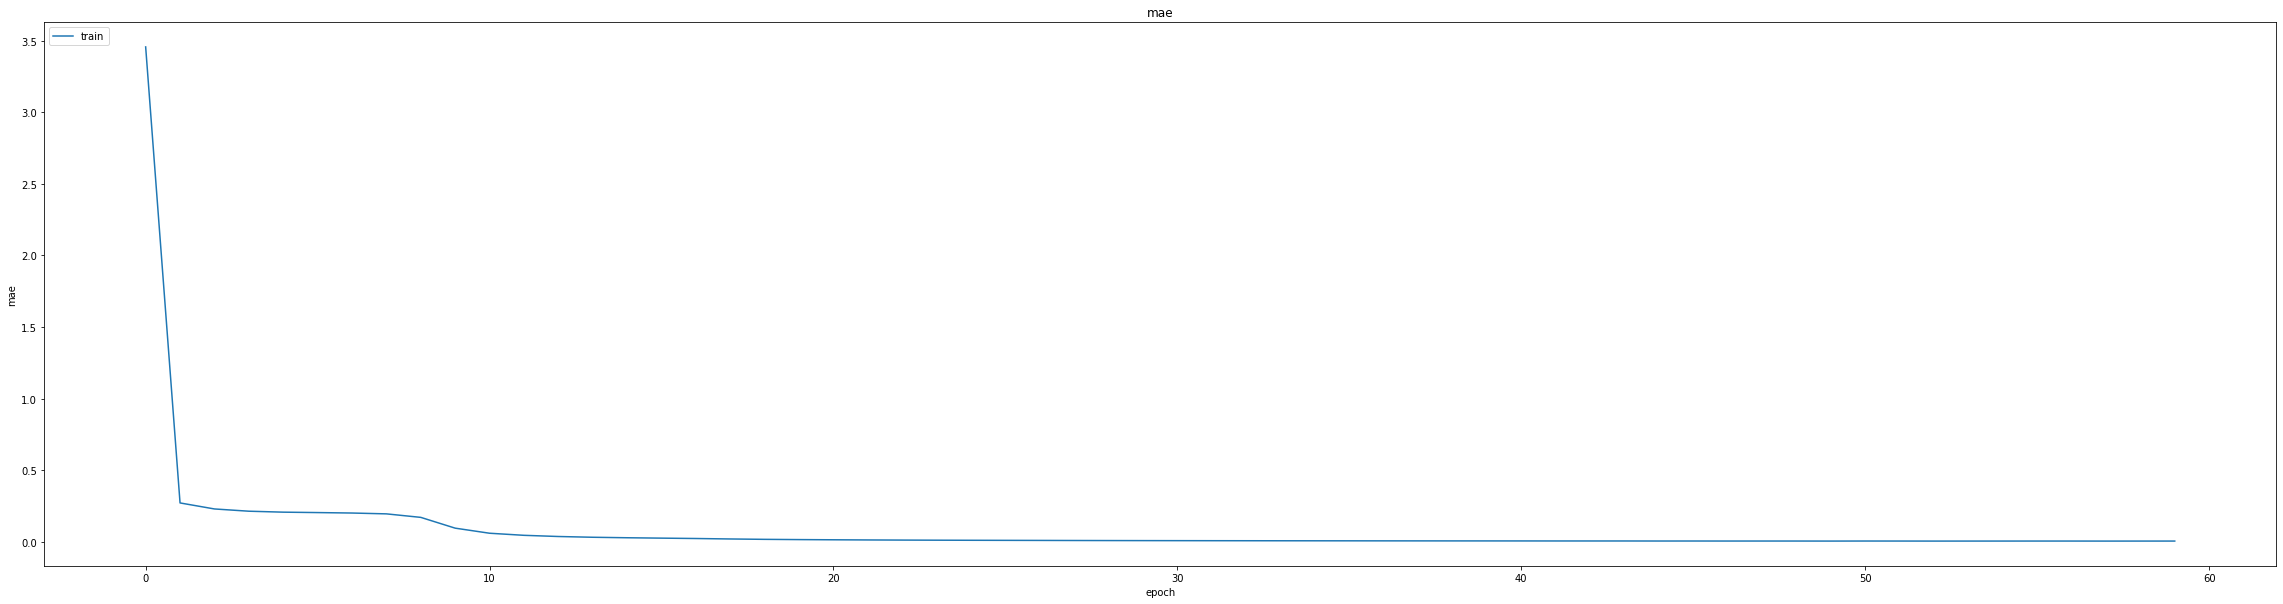

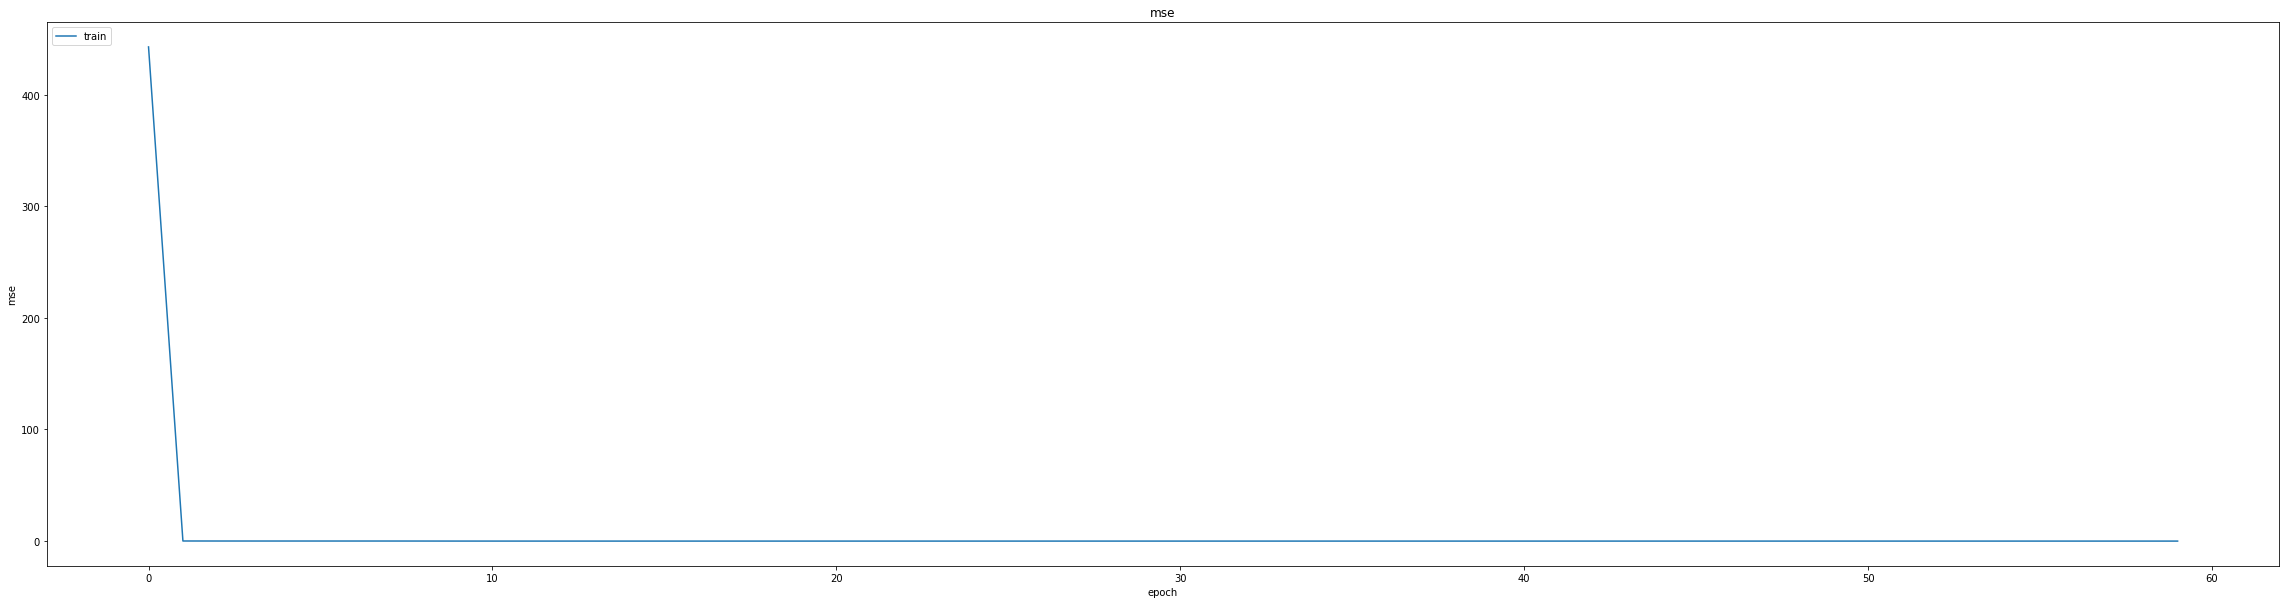

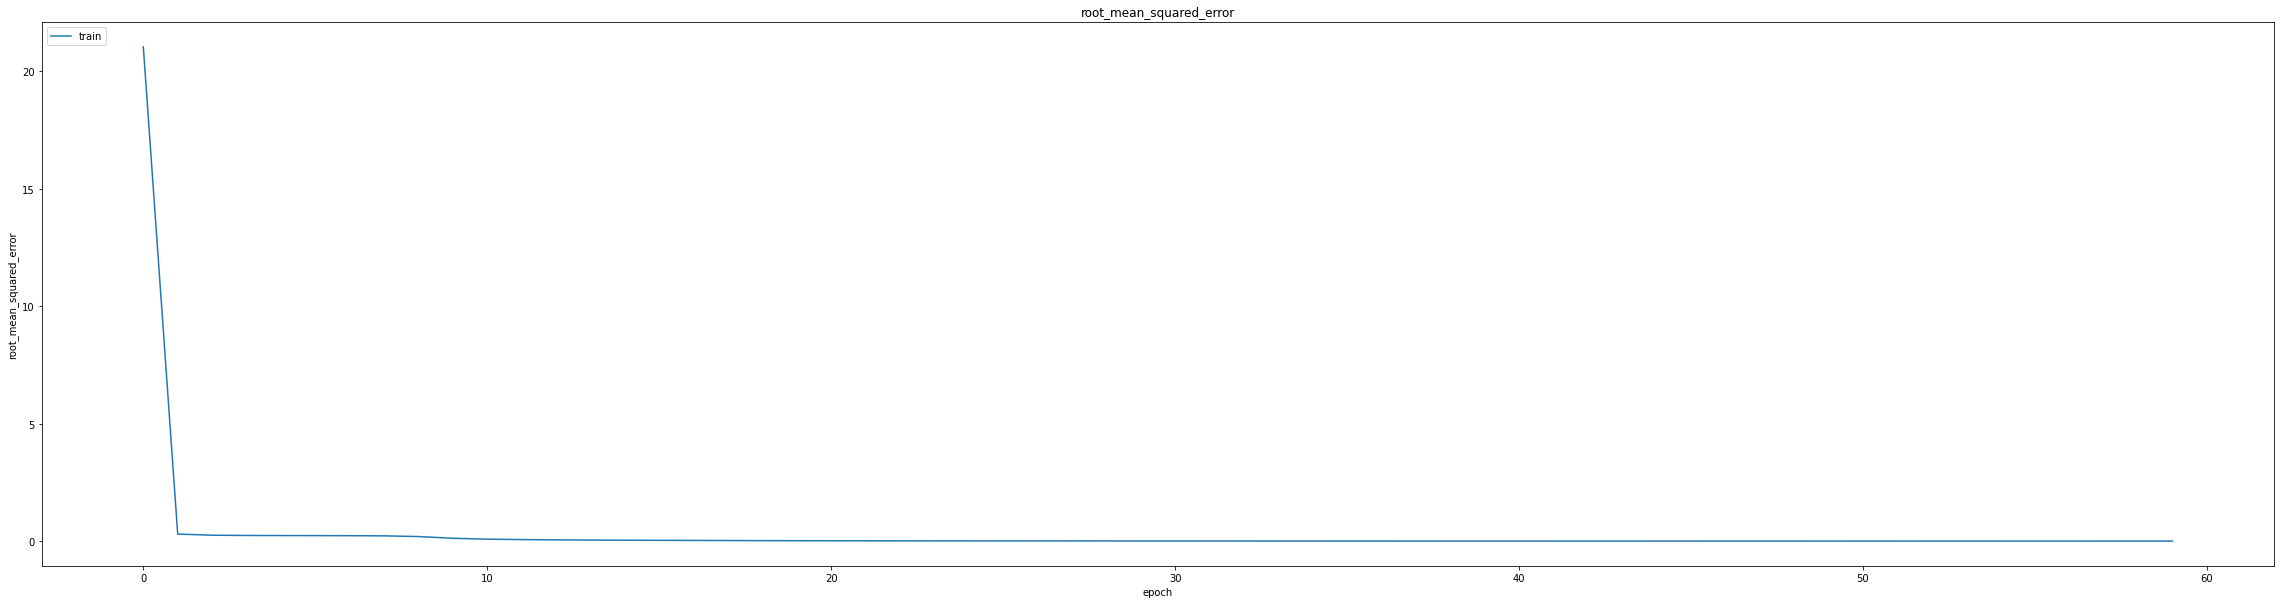

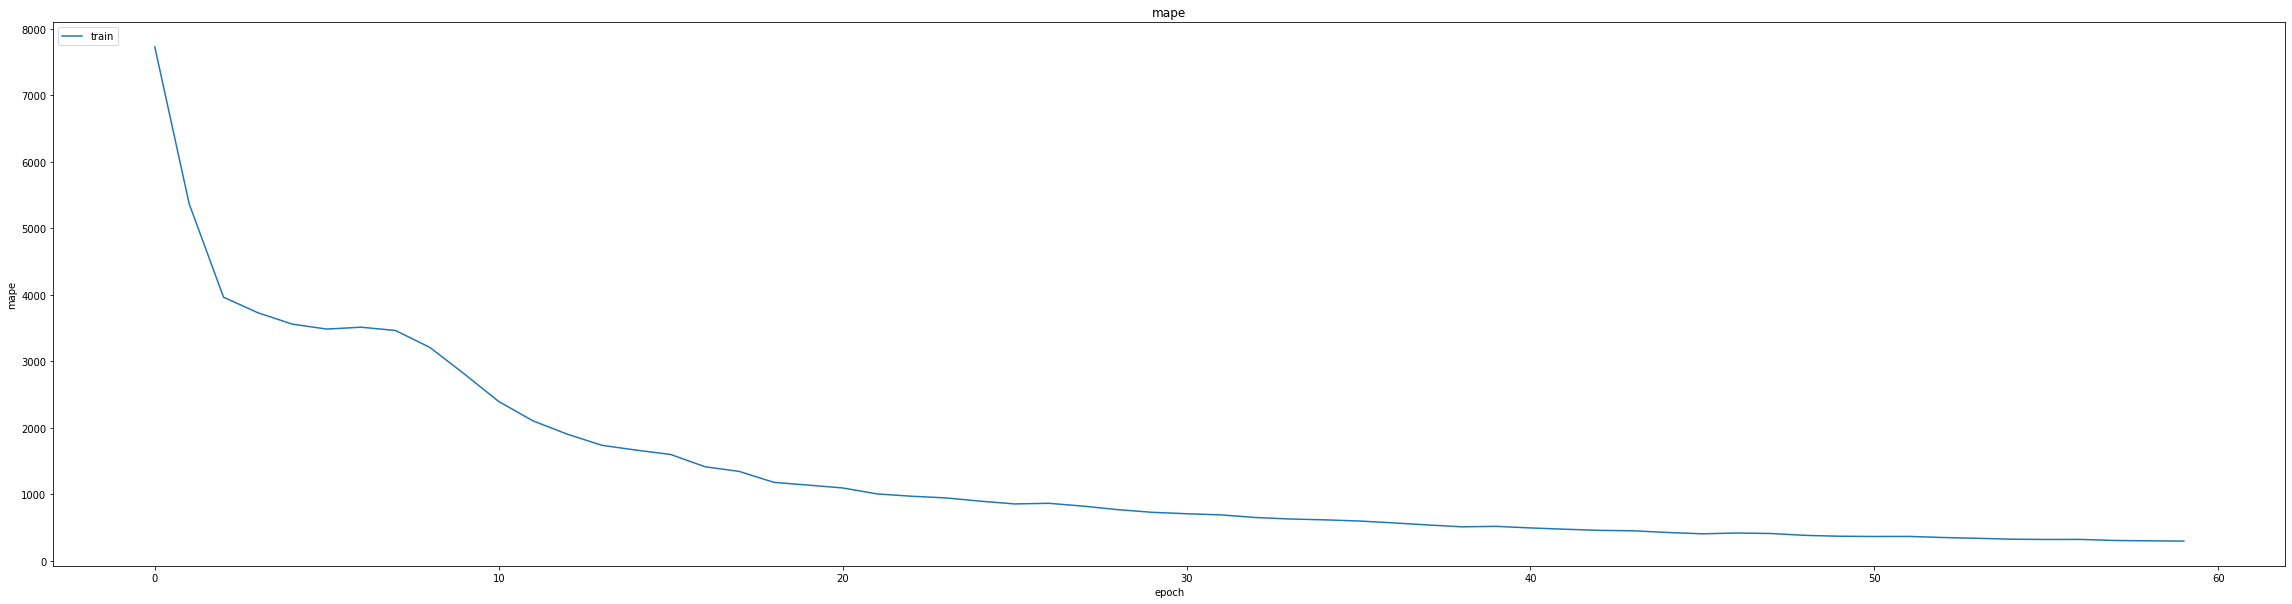

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.010277205146849155
0.012361099012196064
1390/1390 [==============================] - 5s 3ms/step
0.9903504682491671


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_GRU(60-40)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)

history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/20
345/347 [============================>.] - ETA: 0s - loss: 8.9060e-04 - mae: 0.0120 - mse: 8.9060e-04 - root_mean_squared_error: 0.0298 - mape: 388.7057
Epoch 1: val_mse did not improve from 0.00015
347/347 [==============================] - 9s 17ms/step - loss: 8.8694e-04 - mae: 0.0119 - mse: 8.8694e-04 - root_mean_squared_error: 0.0298 - mape: 387.0249 - val_loss: 3.3068e-04 - val_mae: 0.0167 - val_mse: 3.3068e-04 - val_root_mean_squared_error: 0.0182 - val_mape: 937.2580 - lr: 0.0010
Epoch 2/20
345/347 [============================>.] - ETA: 0s - loss: 3.6355e-05 - mae: 0.0044 - mse: 3.6355e-05 - root_mean_squared_error: 0.0060 - mape: 284.6732
Epoch 2: val_mse did not improve from 0.00015
347/347 [==============================] - 5s 15ms/step - loss: 3.6359e-05 - mae: 0.0044 - mse: 3.6359e-05 - root_mean_squared_error: 0.0060 - mape: 283.4474 - val_loss: 2.5355e-04 - val_mae: 0.0145 - val_mse: 2.5355e-04 - val_root_mean_squared_error: 0.0159 - val_mape: 847.5043 - lr: 0

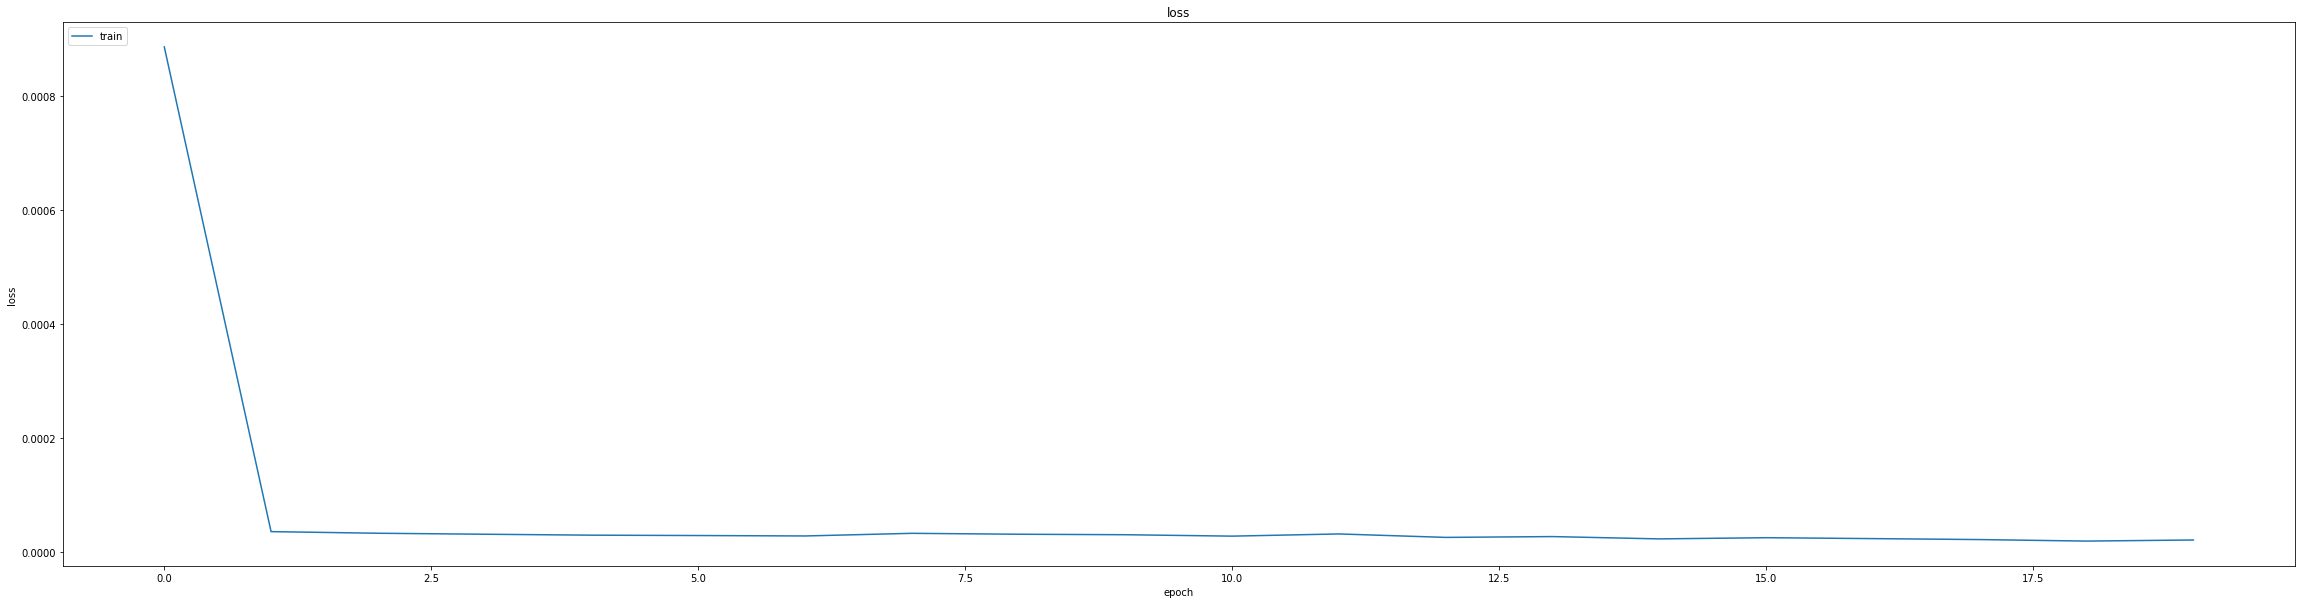

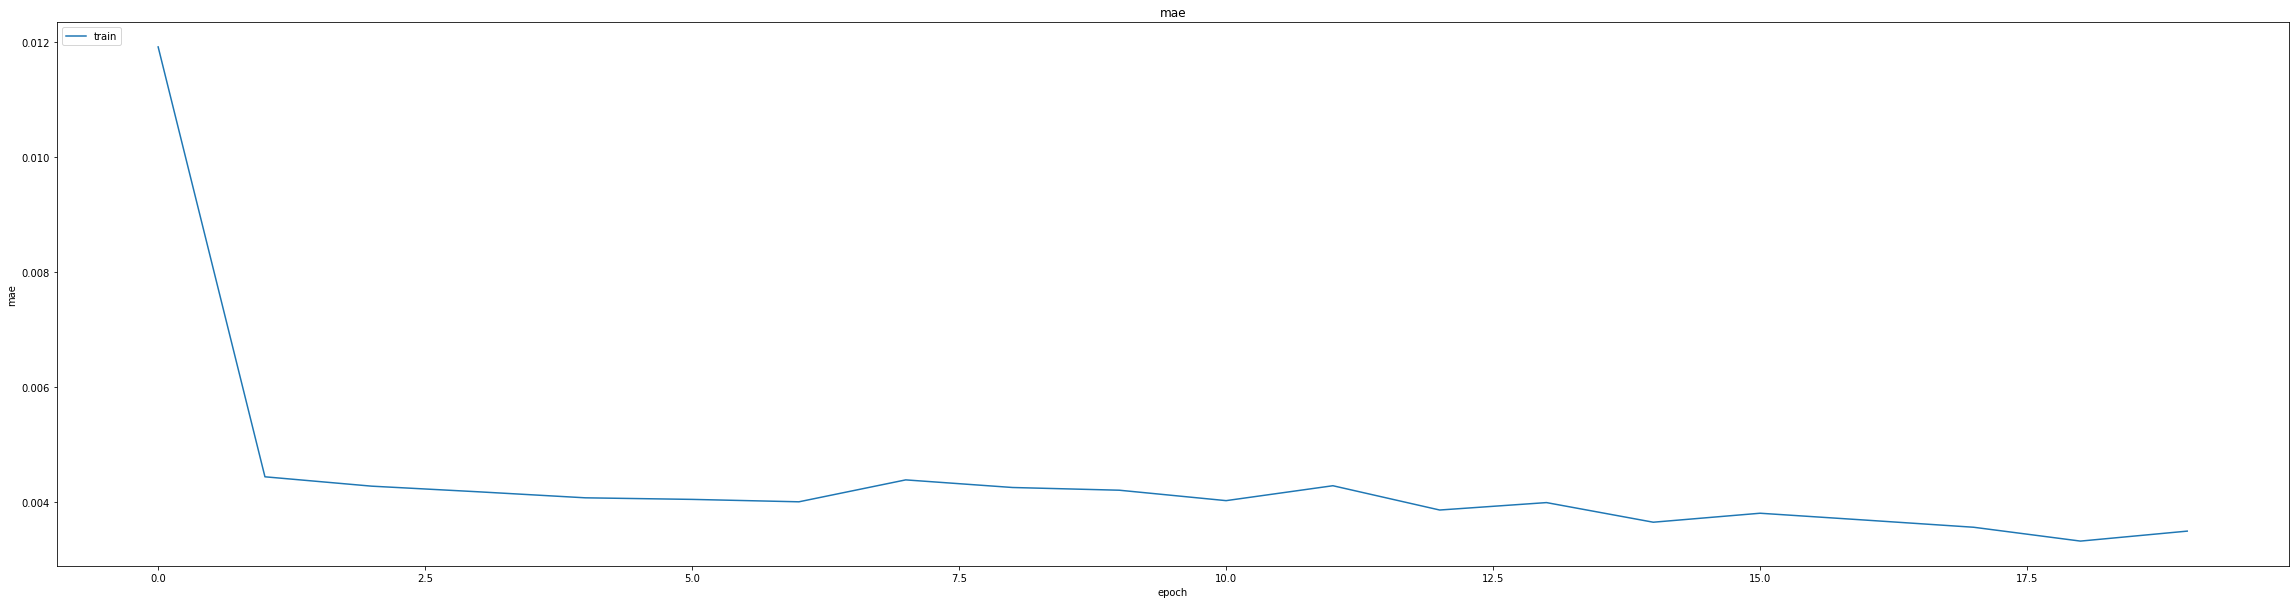

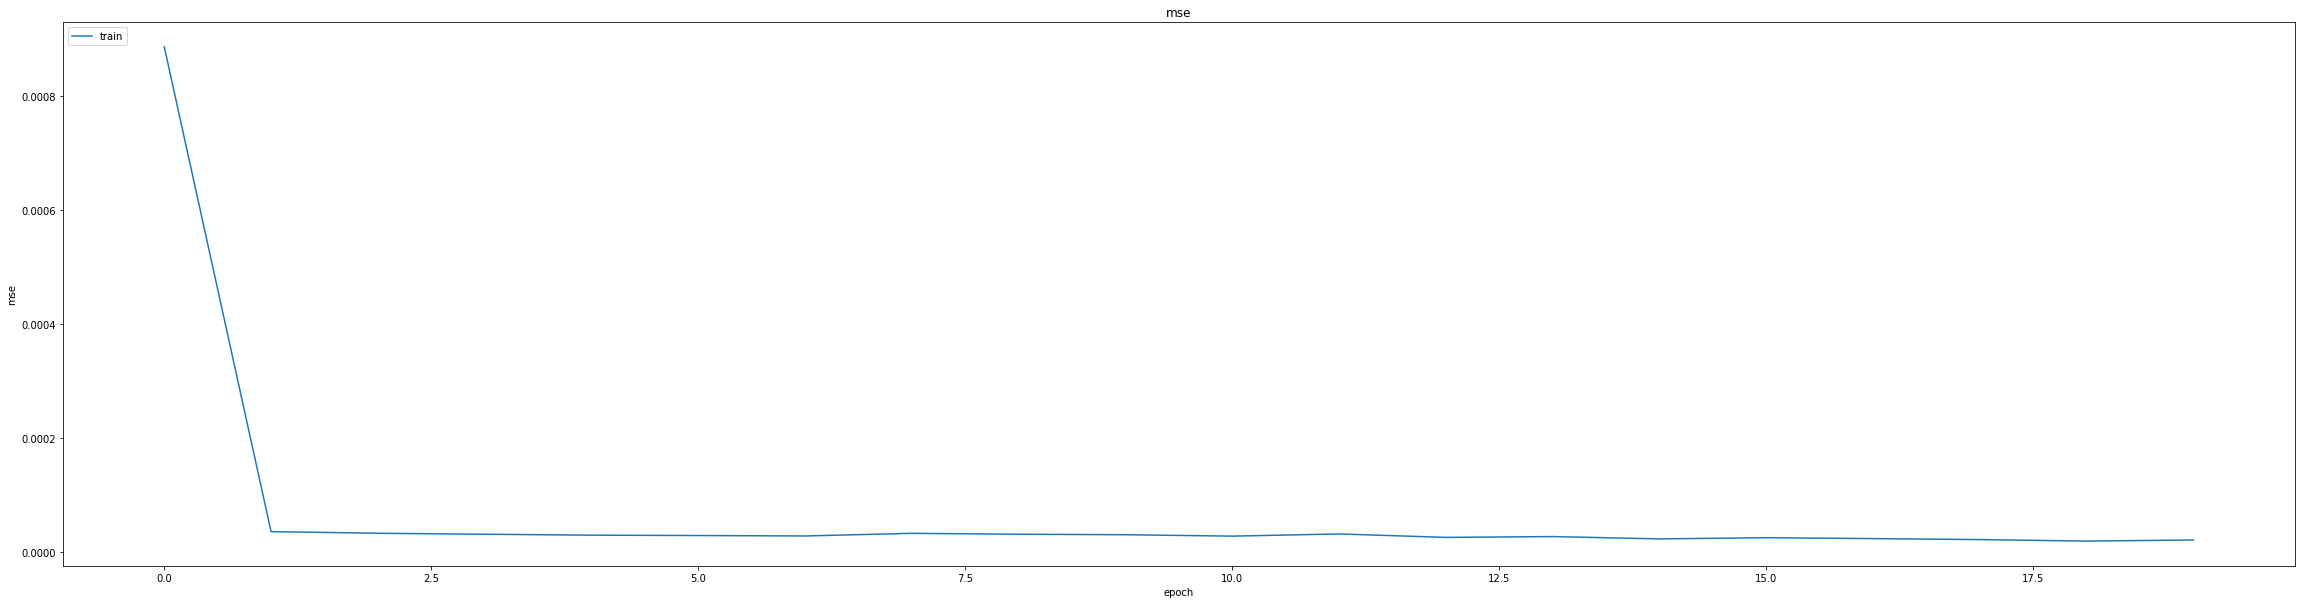

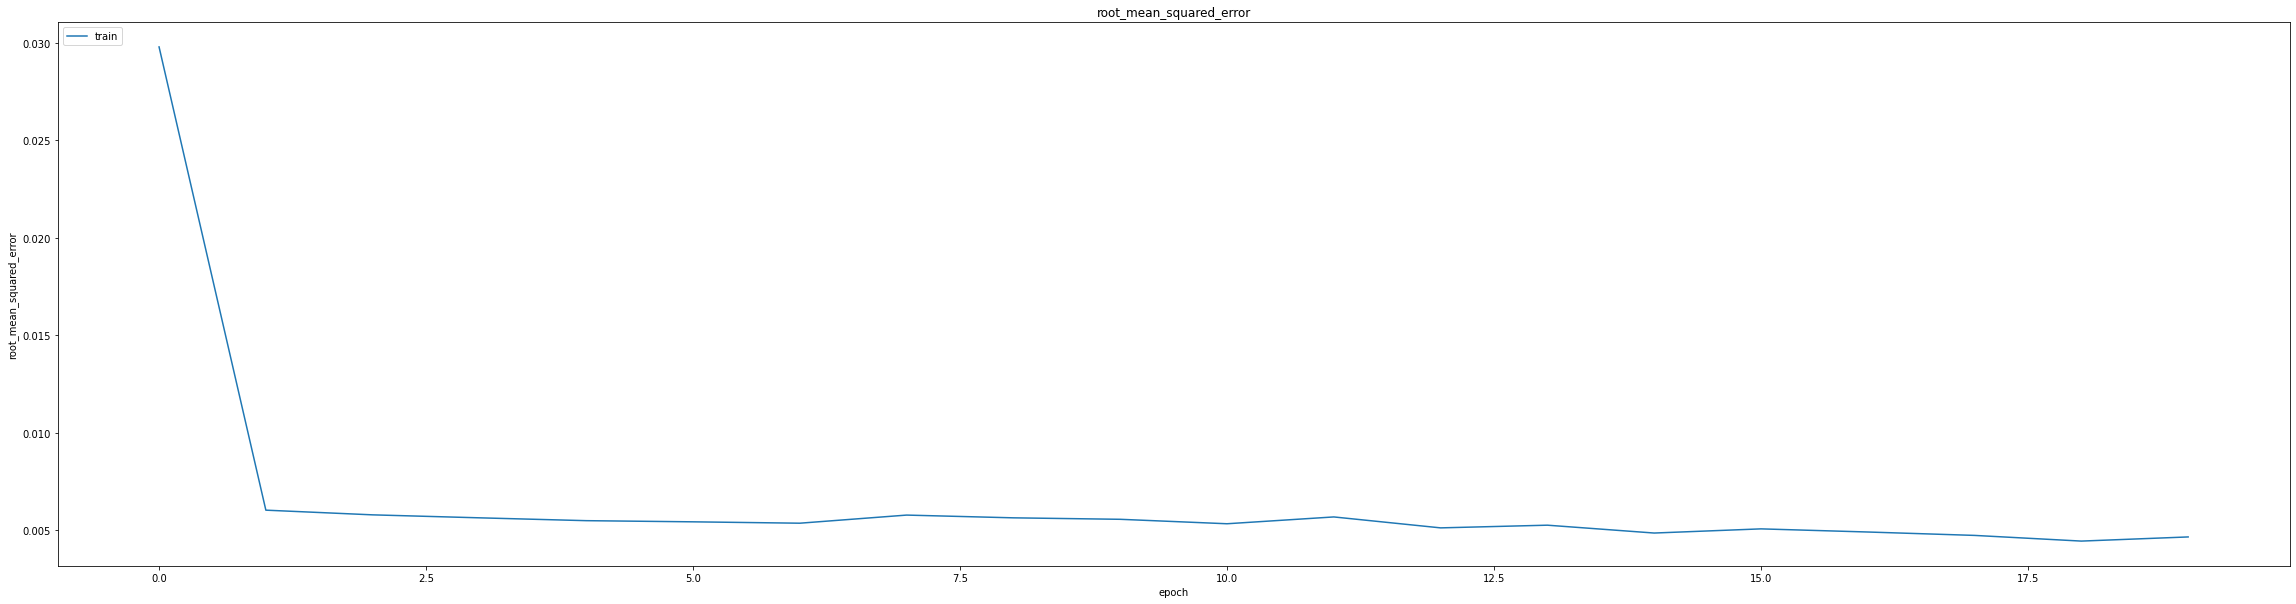

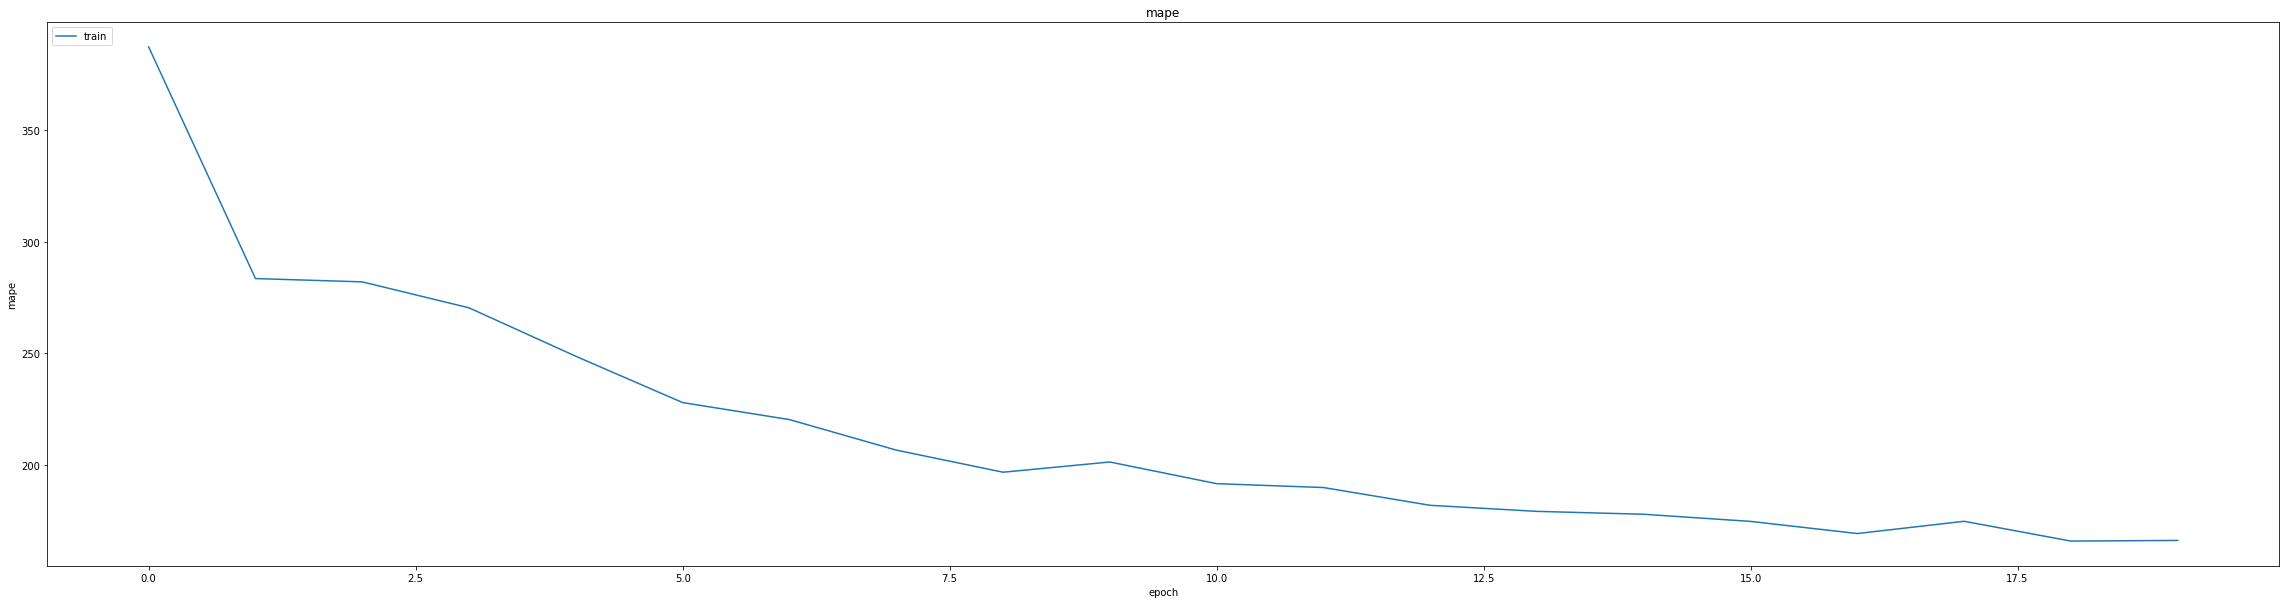

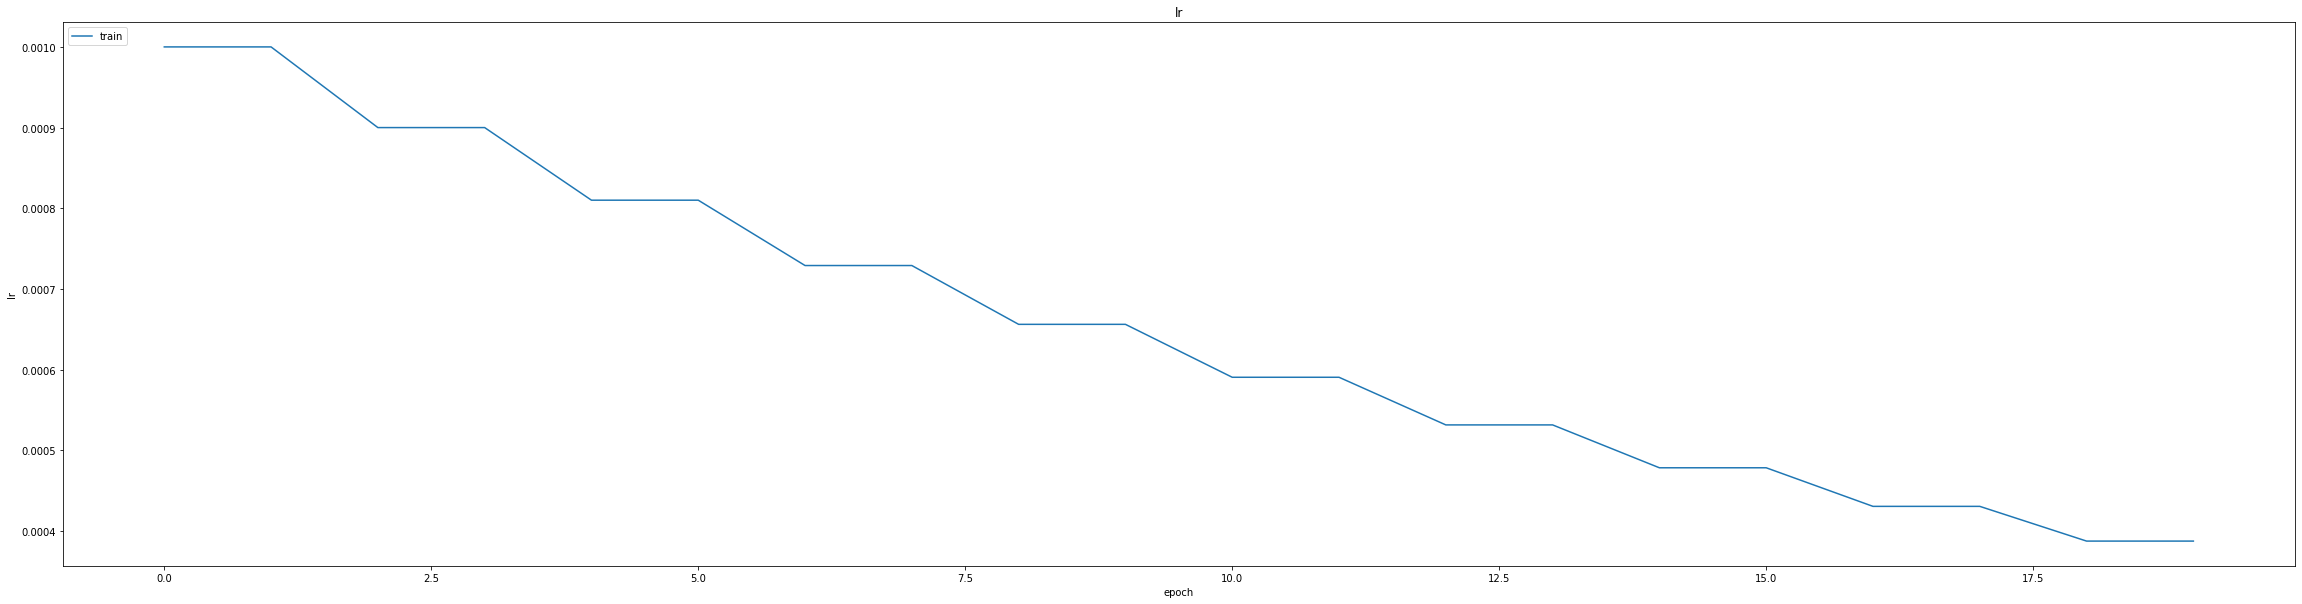

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.01446559838950634
0.015568260103464127
1390/1390 [==============================] - 5s 3ms/step
0.9919016455098261


1390/1390 [==============================] - 4s 3ms/step


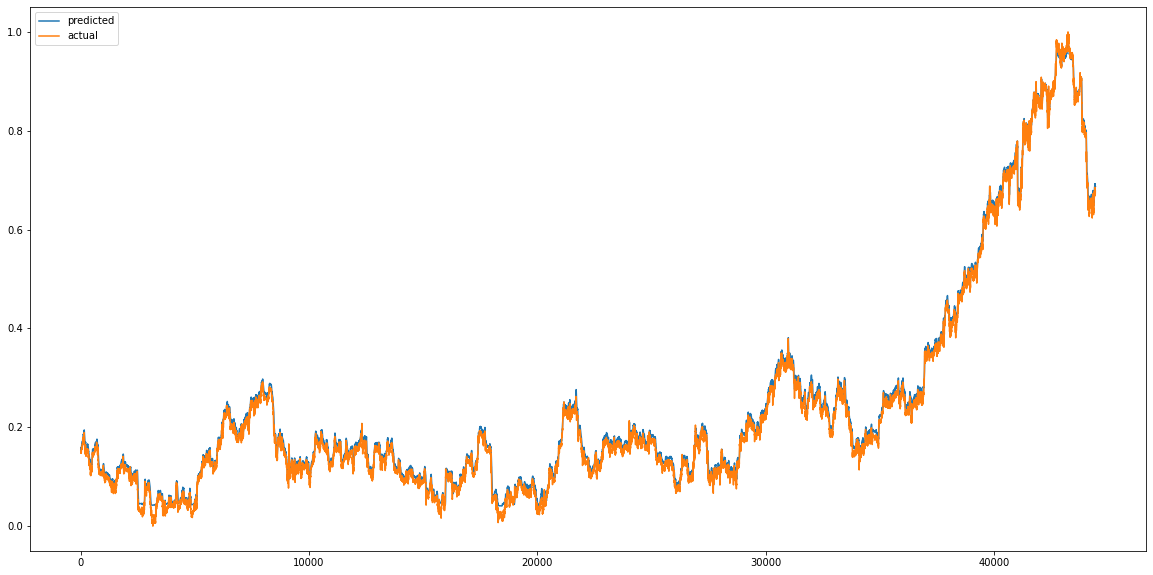

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_GRU(60-40)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


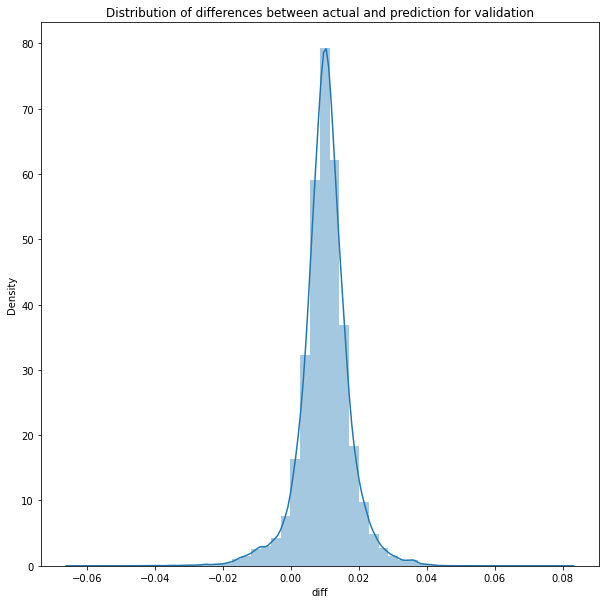

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

1390/1390 [==============================] - 4s 3ms/step


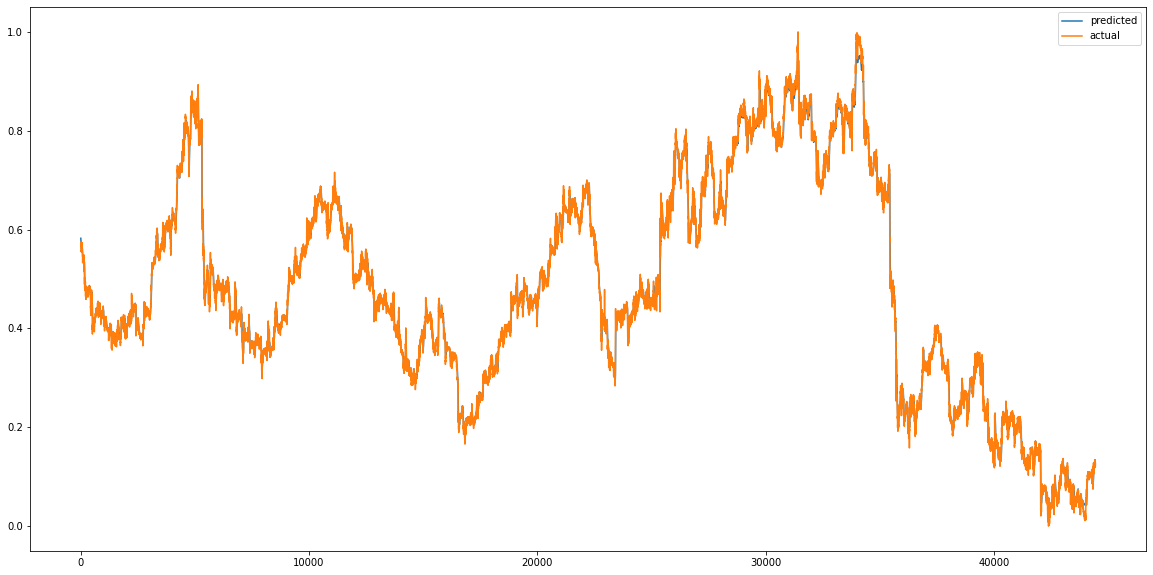

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


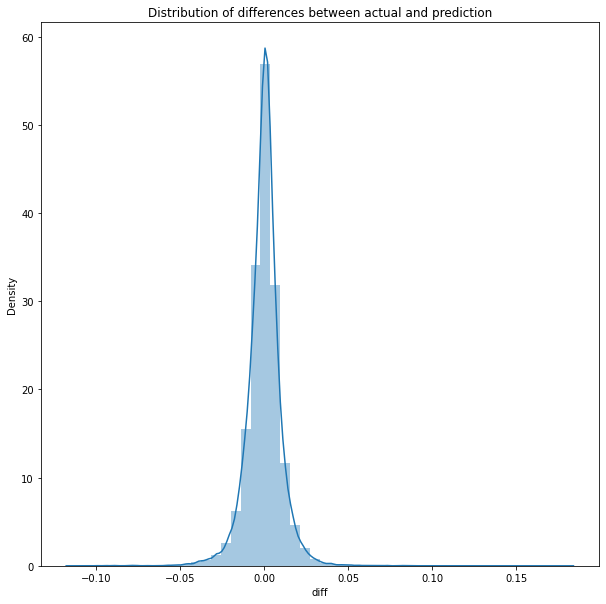

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', test_r2_score)
predictions['diff'].describe()

MSE :  0.00010982952539313355
RMSE :  0.010479958272490094
MAE :  0.007105476953211757
1390/1390 [==============================] - 4s 3ms/step
R2_Score  : 0.9977122774306051


count    44453.000000
mean        -0.000042
std          0.010480
min         -0.114075
25%         -0.004868
50%          0.000375
75%          0.004967
max          0.180469
Name: diff, dtype: float64

**BiLSTM_MODEL**

In [ ]:
model= thesis.BiLSTM_Model(x_train)


In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/CHF_USD_5min_BiLSTM(60-40)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=60
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/60


345/347 [============================>.] - ETA: 0s - loss: 579.0728 - mae: 6.1421 - mse: 579.0729 - root_mean_squared_error: 24.0639 - mape: 11941.3818
Epoch 1: val_mse improved from inf to 0.57395, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_BiLSTM(60-40)


347/347 [==============================] - 51s 119ms/step - loss: 576.5610 - mae: 6.1178 - mse: 576.5611 - root_mean_squared_error: 24.0117 - mape: 11890.7520 - val_loss: 0.5740 - val_mae: 0.7236 - val_mse: 0.5740 - val_root_mean_squared_error: 0.7576 - val_mape: 22324.4336
Epoch 2/60
347/347 [==============================] - ETA: 0s - loss: 0.1832 - mae: 0.3686 - mse: 0.1832 - root_mean_squared_error: 0.4281 - mape: 7122.3174
Epoch 2: val_mse improved from 0.57395 to 0.20858, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_BiLSTM(60-40)


347/347 [==============================] - 40s 115ms/step - loss: 0.1832 - mae: 0.3686 - mse: 0.1832 - root_mean_squared_error: 0.4281 - mape: 7122.3174 - val_loss: 0.2086 - val_mae: 0.4344 - val_mse: 0.2086 - val_root_mean_squared_error: 0.4567 - val_mape: 14730.9336
Epoch 3/60
345/347 [============================>.] - ETA: 0s - loss: 0.0812 - mae: 0.2528 - mse: 0.0812 - root_mean_squared_error: 0.2849 - mape: 5035.1714
Epoch 3: val_mse improved from 0.20858 to 0.13121, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_BiLSTM(60-40)


347/347 [==============================] - 41s 120ms/step - loss: 0.0811 - mae: 0.2527 - mse: 0.0811 - root_mean_squared_error: 0.2848 - mape: 5013.7178 - val_loss: 0.1312 - val_mae: 0.3466 - val_mse: 0.1312 - val_root_mean_squared_error: 0.3622 - val_mape: 12097.4297
Epoch 4/60
345/347 [============================>.] - ETA: 0s - loss: 0.0649 - mae: 0.2224 - mse: 0.0649 - root_mean_squared_error: 0.2547 - mape: 3955.7688
Epoch 4: val_mse improved from 0.13121 to 0.10539, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_BiLSTM(60-40)


347/347 [==============================] - 40s 115ms/step - loss: 0.0649 - mae: 0.2223 - mse: 0.0649 - root_mean_squared_error: 0.2547 - mape: 3939.0298 - val_loss: 0.1054 - val_mae: 0.3095 - val_mse: 0.1054 - val_root_mean_squared_error: 0.3246 - val_mape: 10946.8760
Epoch 5/60
345/347 [============================>.] - ETA: 0s - loss: 0.0617 - mae: 0.2112 - mse: 0.0617 - root_mean_squared_error: 0.2483 - mape: 3331.5623
Epoch 5: val_mse improved from 0.10539 to 0.09524, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_BiLSTM(60-40)


347/347 [==============================] - 40s 116ms/step - loss: 0.0617 - mae: 0.2112 - mse: 0.0617 - root_mean_squared_error: 0.2483 - mape: 3317.4575 - val_loss: 0.0952 - val_mae: 0.2930 - val_mse: 0.0952 - val_root_mean_squared_error: 0.3086 - val_mape: 10423.3682
Epoch 6/60
347/347 [==============================] - ETA: 0s - loss: 0.0611 - mae: 0.2072 - mse: 0.0611 - root_mean_squared_error: 0.2472 - mape: 3629.7529
Epoch 6: val_mse improved from 0.09524 to 0.09121, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_BiLSTM(60-40)


347/347 [==============================] - 40s 116ms/step - loss: 0.0611 - mae: 0.2072 - mse: 0.0611 - root_mean_squared_error: 0.2472 - mape: 3629.7529 - val_loss: 0.0912 - val_mae: 0.2861 - val_mse: 0.0912 - val_root_mean_squared_error: 0.3020 - val_mape: 10200.2334
Epoch 7/60
347/347 [==============================] - ETA: 0s - loss: 0.0609 - mae: 0.2056 - mse: 0.0609 - root_mean_squared_error: 0.2468 - mape: 3894.9827
Epoch 7: val_mse improved from 0.09121 to 0.08978, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_BiLSTM(60-40)


347/347 [==============================] - 41s 117ms/step - loss: 0.0609 - mae: 0.2056 - mse: 0.0609 - root_mean_squared_error: 0.2468 - mape: 3894.9827 - val_loss: 0.0898 - val_mae: 0.2835 - val_mse: 0.0898 - val_root_mean_squared_error: 0.2996 - val_mape: 10119.0986
Epoch 8/60
345/347 [============================>.] - ETA: 0s - loss: 0.0610 - mae: 0.2052 - mse: 0.0610 - root_mean_squared_error: 0.2469 - mape: 3518.5620
Epoch 8: val_mse improved from 0.08978 to 0.08934, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_BiLSTM(60-40)


347/347 [==============================] - 41s 119ms/step - loss: 0.0610 - mae: 0.2052 - mse: 0.0610 - root_mean_squared_error: 0.2469 - mape: 3503.6465 - val_loss: 0.0893 - val_mae: 0.2828 - val_mse: 0.0893 - val_root_mean_squared_error: 0.2989 - val_mape: 10094.9180
Epoch 9/60
345/347 [============================>.] - ETA: 0s - loss: 0.0608 - mae: 0.2047 - mse: 0.0608 - root_mean_squared_error: 0.2466 - mape: 3284.1436
Epoch 9: val_mse improved from 0.08934 to 0.08926, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_BiLSTM(60-40)


347/347 [==============================] - 40s 116ms/step - loss: 0.0608 - mae: 0.2048 - mse: 0.0608 - root_mean_squared_error: 0.2466 - mape: 3270.2361 - val_loss: 0.0893 - val_mae: 0.2826 - val_mse: 0.0893 - val_root_mean_squared_error: 0.2988 - val_mape: 10091.2432
Epoch 10/60
347/347 [==============================] - ETA: 0s - loss: 0.0608 - mae: 0.2050 - mse: 0.0608 - root_mean_squared_error: 0.2467 - mape: 3251.2966
Epoch 10: val_mse improved from 0.08926 to 0.08888, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_BiLSTM(60-40)


347/347 [==============================] - 41s 117ms/step - loss: 0.0608 - mae: 0.2050 - mse: 0.0608 - root_mean_squared_error: 0.2467 - mape: 3251.2966 - val_loss: 0.0889 - val_mae: 0.2820 - val_mse: 0.0889 - val_root_mean_squared_error: 0.2981 - val_mape: 10070.2393
Epoch 11/60
347/347 [==============================] - ETA: 0s - loss: 0.0606 - mae: 0.2046 - mse: 0.0606 - root_mean_squared_error: 0.2462 - mape: 3631.8059
Epoch 11: val_mse did not improve from 0.08888
347/347 [==============================] - 8s 22ms/step - loss: 0.0606 - mae: 0.2046 - mse: 0.0606 - root_mean_squared_error: 0.2462 - mape: 3631.8059 - val_loss: 0.0890 - val_mae: 0.2822 - val_mse: 0.0890 - val_root_mean_squared_error: 0.2983 - val_mape: 10077.3291
Epoch 12/60
346/347 [============================>.] - ETA: 0s - loss: 0.0606 - mae: 0.2047 - mse: 0.0606 - root_mean_squared_error: 0.2463 - mape: 3811.7607
Epoch 12: val_mse improved from 0.08888 to 0.08868, saving model to /content/drive/MyDrive/modelweigh

347/347 [==============================] - 40s 116ms/step - loss: 0.0607 - mae: 0.2048 - mse: 0.0607 - root_mean_squared_error: 0.2463 - mape: 3806.3579 - val_loss: 0.0887 - val_mae: 0.2817 - val_mse: 0.0887 - val_root_mean_squared_error: 0.2978 - val_mape: 10061.1230
Epoch 13/60
345/347 [============================>.] - ETA: 0s - loss: 0.0605 - mae: 0.2044 - mse: 0.0605 - root_mean_squared_error: 0.2460 - mape: 3480.4023
Epoch 13: val_mse did not improve from 0.08868
347/347 [==============================] - 8s 22ms/step - loss: 0.0605 - mae: 0.2044 - mse: 0.0605 - root_mean_squared_error: 0.2460 - mape: 3465.6738 - val_loss: 0.0888 - val_mae: 0.2820 - val_mse: 0.0888 - val_root_mean_squared_error: 0.2980 - val_mape: 10069.1260
Epoch 14/60
345/347 [============================>.] - ETA: 0s - loss: 0.0603 - mae: 0.2041 - mse: 0.0603 - root_mean_squared_error: 0.2455 - mape: 3732.6030
Epoch 14: val_mse did not improve from 0.08868
347/347 [==============================] - 8s 24ms/ste

347/347 [==============================] - 40s 117ms/step - loss: 0.0601 - mae: 0.2041 - mse: 0.0601 - root_mean_squared_error: 0.2452 - mape: 3697.5437 - val_loss: 0.0881 - val_mae: 0.2809 - val_mse: 0.0881 - val_root_mean_squared_error: 0.2969 - val_mape: 10032.8232
Epoch 16/60
346/347 [============================>.] - ETA: 0s - loss: 0.0599 - mae: 0.2037 - mse: 0.0599 - root_mean_squared_error: 0.2447 - mape: 3764.7761
Epoch 16: val_mse improved from 0.08812 to 0.08723, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_BiLSTM(60-40)


347/347 [==============================] - 40s 116ms/step - loss: 0.0599 - mae: 0.2037 - mse: 0.0599 - root_mean_squared_error: 0.2447 - mape: 3759.4043 - val_loss: 0.0872 - val_mae: 0.2793 - val_mse: 0.0872 - val_root_mean_squared_error: 0.2953 - val_mape: 9981.8535
Epoch 17/60
345/347 [============================>.] - ETA: 0s - loss: 0.0596 - mae: 0.2032 - mse: 0.0596 - root_mean_squared_error: 0.2442 - mape: 3656.7979
Epoch 17: val_mse did not improve from 0.08723
347/347 [==============================] - 8s 23ms/step - loss: 0.0596 - mae: 0.2032 - mse: 0.0596 - root_mean_squared_error: 0.2442 - mape: 3641.2788 - val_loss: 0.0878 - val_mae: 0.2805 - val_mse: 0.0878 - val_root_mean_squared_error: 0.2964 - val_mape: 10019.4492
Epoch 18/60
345/347 [============================>.] - ETA: 0s - loss: 0.0584 - mae: 0.2017 - mse: 0.0584 - root_mean_squared_error: 0.2417 - mape: 3833.1658
Epoch 18: val_mse improved from 0.08723 to 0.08410, saving model to /content/drive/MyDrive/modelweight

347/347 [==============================] - 40s 116ms/step - loss: 0.0584 - mae: 0.2017 - mse: 0.0584 - root_mean_squared_error: 0.2417 - mape: 3816.8979 - val_loss: 0.0841 - val_mae: 0.2744 - val_mse: 0.0841 - val_root_mean_squared_error: 0.2900 - val_mape: 9827.2090
Epoch 19/60
346/347 [============================>.] - ETA: 0s - loss: 0.0504 - mae: 0.1883 - mse: 0.0504 - root_mean_squared_error: 0.2244 - mape: 3049.9783
Epoch 19: val_mse improved from 0.08410 to 0.06028, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_BiLSTM(60-40)


347/347 [==============================] - 40s 117ms/step - loss: 0.0504 - mae: 0.1883 - mse: 0.0504 - root_mean_squared_error: 0.2244 - mape: 3045.6382 - val_loss: 0.0603 - val_mae: 0.2304 - val_mse: 0.0603 - val_root_mean_squared_error: 0.2455 - val_mape: 8828.4531
Epoch 20/60
345/347 [============================>.] - ETA: 0s - loss: 0.0230 - mae: 0.1192 - mse: 0.0230 - root_mean_squared_error: 0.1518 - mape: 3002.5293
Epoch 20: val_mse improved from 0.06028 to 0.03397, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_BiLSTM(60-40)


347/347 [==============================] - 41s 119ms/step - loss: 0.0230 - mae: 0.1190 - mse: 0.0230 - root_mean_squared_error: 0.1516 - mape: 2989.6650 - val_loss: 0.0340 - val_mae: 0.1659 - val_mse: 0.0340 - val_root_mean_squared_error: 0.1843 - val_mape: 7544.0352
Epoch 21/60
347/347 [==============================] - ETA: 0s - loss: 0.0119 - mae: 0.0818 - mse: 0.0119 - root_mean_squared_error: 0.1091 - mape: 3048.6575
Epoch 21: val_mse improved from 0.03397 to 0.02206, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_BiLSTM(60-40)


347/347 [==============================] - 40s 117ms/step - loss: 0.0119 - mae: 0.0818 - mse: 0.0119 - root_mean_squared_error: 0.1091 - mape: 3048.6575 - val_loss: 0.0221 - val_mae: 0.1303 - val_mse: 0.0221 - val_root_mean_squared_error: 0.1485 - val_mape: 6582.6074
Epoch 22/60
346/347 [============================>.] - ETA: 0s - loss: 0.0086 - mae: 0.0693 - mse: 0.0086 - root_mean_squared_error: 0.0927 - mape: 1903.3085
Epoch 22: val_mse improved from 0.02206 to 0.01501, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_BiLSTM(60-40)


347/347 [==============================] - 40s 115ms/step - loss: 0.0086 - mae: 0.0693 - mse: 0.0086 - root_mean_squared_error: 0.0927 - mape: 1900.5818 - val_loss: 0.0150 - val_mae: 0.1033 - val_mse: 0.0150 - val_root_mean_squared_error: 0.1225 - val_mape: 5858.9209
Epoch 23/60
345/347 [============================>.] - ETA: 0s - loss: 0.0069 - mae: 0.0624 - mse: 0.0069 - root_mean_squared_error: 0.0831 - mape: 2188.6851
Epoch 23: val_mse improved from 0.01501 to 0.01077, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_BiLSTM(60-40)


347/347 [==============================] - 40s 115ms/step - loss: 0.0069 - mae: 0.0624 - mse: 0.0069 - root_mean_squared_error: 0.0831 - mape: 2179.3782 - val_loss: 0.0108 - val_mae: 0.0863 - val_mse: 0.0108 - val_root_mean_squared_error: 0.1038 - val_mape: 5271.8892
Epoch 24/60
345/347 [============================>.] - ETA: 0s - loss: 0.0058 - mae: 0.0573 - mse: 0.0058 - root_mean_squared_error: 0.0759 - mape: 1585.4756
Epoch 24: val_mse improved from 0.01077 to 0.00841, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_BiLSTM(60-40)


347/347 [==============================] - 41s 117ms/step - loss: 0.0058 - mae: 0.0573 - mse: 0.0058 - root_mean_squared_error: 0.0759 - mape: 1578.7051 - val_loss: 0.0084 - val_mae: 0.0764 - val_mse: 0.0084 - val_root_mean_squared_error: 0.0917 - val_mape: 4870.9072
Epoch 25/60
345/347 [============================>.] - ETA: 0s - loss: 0.0049 - mae: 0.0527 - mse: 0.0049 - root_mean_squared_error: 0.0700 - mape: 1405.5386
Epoch 25: val_mse improved from 0.00841 to 0.00659, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_BiLSTM(60-40)


347/347 [==============================] - 40s 117ms/step - loss: 0.0049 - mae: 0.0527 - mse: 0.0049 - root_mean_squared_error: 0.0700 - mape: 1399.5365 - val_loss: 0.0066 - val_mae: 0.0673 - val_mse: 0.0066 - val_root_mean_squared_error: 0.0812 - val_mape: 4513.0703
Epoch 26/60
346/347 [============================>.] - ETA: 0s - loss: 0.0042 - mae: 0.0490 - mse: 0.0042 - root_mean_squared_error: 0.0648 - mape: 1546.8679
Epoch 26: val_mse improved from 0.00659 to 0.00551, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_BiLSTM(60-40)


347/347 [==============================] - 40s 115ms/step - loss: 0.0042 - mae: 0.0490 - mse: 0.0042 - root_mean_squared_error: 0.0648 - mape: 1544.6561 - val_loss: 0.0055 - val_mae: 0.0617 - val_mse: 0.0055 - val_root_mean_squared_error: 0.0742 - val_mape: 4248.2324
Epoch 27/60
347/347 [==============================] - ETA: 0s - loss: 0.0035 - mae: 0.0449 - mse: 0.0035 - root_mean_squared_error: 0.0591 - mape: 1766.1360
Epoch 27: val_mse improved from 0.00551 to 0.00410, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_BiLSTM(60-40)


347/347 [==============================] - 40s 116ms/step - loss: 0.0035 - mae: 0.0449 - mse: 0.0035 - root_mean_squared_error: 0.0591 - mape: 1766.1360 - val_loss: 0.0041 - val_mae: 0.0513 - val_mse: 0.0041 - val_root_mean_squared_error: 0.0641 - val_mape: 3927.0847
Epoch 28/60
346/347 [============================>.] - ETA: 0s - loss: 0.0030 - mae: 0.0415 - mse: 0.0030 - root_mean_squared_error: 0.0543 - mape: 1347.7450
Epoch 28: val_mse improved from 0.00410 to 0.00327, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_BiLSTM(60-40)


347/347 [==============================] - 40s 116ms/step - loss: 0.0030 - mae: 0.0415 - mse: 0.0030 - root_mean_squared_error: 0.0543 - mape: 1345.8025 - val_loss: 0.0033 - val_mae: 0.0452 - val_mse: 0.0033 - val_root_mean_squared_error: 0.0572 - val_mape: 3669.6328
Epoch 29/60
347/347 [==============================] - ETA: 0s - loss: 0.0024 - mae: 0.0377 - mse: 0.0024 - root_mean_squared_error: 0.0493 - mape: 1354.4146
Epoch 29: val_mse improved from 0.00327 to 0.00281, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_BiLSTM(60-40)


347/347 [==============================] - 41s 118ms/step - loss: 0.0024 - mae: 0.0377 - mse: 0.0024 - root_mean_squared_error: 0.0493 - mape: 1354.4146 - val_loss: 0.0028 - val_mae: 0.0435 - val_mse: 0.0028 - val_root_mean_squared_error: 0.0530 - val_mape: 3406.1980
Epoch 30/60
347/347 [==============================] - ETA: 0s - loss: 0.0021 - mae: 0.0347 - mse: 0.0021 - root_mean_squared_error: 0.0453 - mape: 1137.8174
Epoch 30: val_mse improved from 0.00281 to 0.00196, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_BiLSTM(60-40)


347/347 [==============================] - 40s 116ms/step - loss: 0.0021 - mae: 0.0347 - mse: 0.0021 - root_mean_squared_error: 0.0453 - mape: 1137.8174 - val_loss: 0.0020 - val_mae: 0.0331 - val_mse: 0.0020 - val_root_mean_squared_error: 0.0443 - val_mape: 3227.4456
Epoch 31/60
346/347 [============================>.] - ETA: 0s - loss: 0.0017 - mae: 0.0319 - mse: 0.0017 - root_mean_squared_error: 0.0416 - mape: 1071.7771
Epoch 31: val_mse improved from 0.00196 to 0.00157, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_BiLSTM(60-40)


347/347 [==============================] - 40s 115ms/step - loss: 0.0017 - mae: 0.0319 - mse: 0.0017 - root_mean_squared_error: 0.0416 - mape: 1070.2324 - val_loss: 0.0016 - val_mae: 0.0291 - val_mse: 0.0016 - val_root_mean_squared_error: 0.0397 - val_mape: 3038.6638
Epoch 32/60
347/347 [==============================] - ETA: 0s - loss: 0.0015 - mae: 0.0292 - mse: 0.0015 - root_mean_squared_error: 0.0383 - mape: 1019.9892
Epoch 32: val_mse improved from 0.00157 to 0.00139, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_BiLSTM(60-40)


347/347 [==============================] - 39s 114ms/step - loss: 0.0015 - mae: 0.0292 - mse: 0.0015 - root_mean_squared_error: 0.0383 - mape: 1019.9892 - val_loss: 0.0014 - val_mae: 0.0286 - val_mse: 0.0014 - val_root_mean_squared_error: 0.0373 - val_mape: 2864.7859
Epoch 33/60
346/347 [============================>.] - ETA: 0s - loss: 0.0013 - mae: 0.0275 - mse: 0.0013 - root_mean_squared_error: 0.0359 - mape: 1050.4136
Epoch 33: val_mse improved from 0.00139 to 0.00123, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_BiLSTM(60-40)


347/347 [==============================] - 41s 118ms/step - loss: 0.0013 - mae: 0.0275 - mse: 0.0013 - root_mean_squared_error: 0.0359 - mape: 1048.9026 - val_loss: 0.0012 - val_mae: 0.0270 - val_mse: 0.0012 - val_root_mean_squared_error: 0.0351 - val_mape: 2736.2471
Epoch 34/60
345/347 [============================>.] - ETA: 0s - loss: 0.0011 - mae: 0.0255 - mse: 0.0011 - root_mean_squared_error: 0.0334 - mape: 909.4889
Epoch 34: val_mse improved from 0.00123 to 0.00096, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_BiLSTM(60-40)


347/347 [==============================] - 40s 116ms/step - loss: 0.0011 - mae: 0.0255 - mse: 0.0011 - root_mean_squared_error: 0.0334 - mape: 905.5891 - val_loss: 9.6150e-04 - val_mae: 0.0223 - val_mse: 9.6150e-04 - val_root_mean_squared_error: 0.0310 - val_mape: 2623.2185
Epoch 35/60
345/347 [============================>.] - ETA: 0s - loss: 9.6882e-04 - mae: 0.0238 - mse: 9.6882e-04 - root_mean_squared_error: 0.0311 - mape: 936.4771
Epoch 35: val_mse improved from 0.00096 to 0.00086, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_BiLSTM(60-40)


347/347 [==============================] - 40s 114ms/step - loss: 9.6850e-04 - mae: 0.0238 - mse: 9.6850e-04 - root_mean_squared_error: 0.0311 - mape: 932.4612 - val_loss: 8.5962e-04 - val_mae: 0.0213 - val_mse: 8.5962e-04 - val_root_mean_squared_error: 0.0293 - val_mape: 2512.8655
Epoch 36/60
347/347 [==============================] - ETA: 0s - loss: 8.7197e-04 - mae: 0.0225 - mse: 8.7197e-04 - root_mean_squared_error: 0.0295 - mape: 809.0486
Epoch 36: val_mse improved from 0.00086 to 0.00074, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_BiLSTM(60-40)


347/347 [==============================] - 40s 116ms/step - loss: 8.7197e-04 - mae: 0.0225 - mse: 8.7197e-04 - root_mean_squared_error: 0.0295 - mape: 809.0486 - val_loss: 7.3787e-04 - val_mae: 0.0186 - val_mse: 7.3787e-04 - val_root_mean_squared_error: 0.0272 - val_mape: 2448.4709
Epoch 37/60
345/347 [============================>.] - ETA: 0s - loss: 7.5202e-04 - mae: 0.0209 - mse: 7.5202e-04 - root_mean_squared_error: 0.0274 - mape: 834.8088
Epoch 37: val_mse improved from 0.00074 to 0.00068, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_BiLSTM(60-40)


347/347 [==============================] - 41s 117ms/step - loss: 7.5218e-04 - mae: 0.0209 - mse: 7.5218e-04 - root_mean_squared_error: 0.0274 - mape: 831.2309 - val_loss: 6.8384e-04 - val_mae: 0.0188 - val_mse: 6.8384e-04 - val_root_mean_squared_error: 0.0262 - val_mape: 2328.8796
Epoch 38/60
346/347 [============================>.] - ETA: 0s - loss: 7.0879e-04 - mae: 0.0204 - mse: 7.0879e-04 - root_mean_squared_error: 0.0266 - mape: 808.3658
Epoch 38: val_mse improved from 0.00068 to 0.00060, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_BiLSTM(60-40)


347/347 [==============================] - 40s 116ms/step - loss: 7.0912e-04 - mae: 0.0204 - mse: 7.0912e-04 - root_mean_squared_error: 0.0266 - mape: 807.2011 - val_loss: 6.0481e-04 - val_mae: 0.0175 - val_mse: 6.0481e-04 - val_root_mean_squared_error: 0.0246 - val_mape: 2275.0713
Epoch 39/60
345/347 [============================>.] - ETA: 0s - loss: 5.9630e-04 - mae: 0.0186 - mse: 5.9630e-04 - root_mean_squared_error: 0.0244 - mape: 770.4011
Epoch 39: val_mse improved from 0.00060 to 0.00053, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_BiLSTM(60-40)


347/347 [==============================] - 40s 115ms/step - loss: 5.9614e-04 - mae: 0.0186 - mse: 5.9614e-04 - root_mean_squared_error: 0.0244 - mape: 767.0945 - val_loss: 5.3299e-04 - val_mae: 0.0157 - val_mse: 5.3299e-04 - val_root_mean_squared_error: 0.0231 - val_mape: 2205.8965
Epoch 40/60
347/347 [==============================] - ETA: 0s - loss: 5.2169e-04 - mae: 0.0175 - mse: 5.2169e-04 - root_mean_squared_error: 0.0228 - mape: 723.8965
Epoch 40: val_mse improved from 0.00053 to 0.00051, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_BiLSTM(60-40)


347/347 [==============================] - 40s 116ms/step - loss: 5.2169e-04 - mae: 0.0175 - mse: 5.2169e-04 - root_mean_squared_error: 0.0228 - mape: 723.8965 - val_loss: 5.1486e-04 - val_mae: 0.0162 - val_mse: 5.1486e-04 - val_root_mean_squared_error: 0.0227 - val_mape: 2146.2144
Epoch 41/60
346/347 [============================>.] - ETA: 0s - loss: 4.4401e-04 - mae: 0.0160 - mse: 4.4401e-04 - root_mean_squared_error: 0.0211 - mape: 696.0604
Epoch 41: val_mse improved from 0.00051 to 0.00049, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_BiLSTM(60-40)


347/347 [==============================] - 40s 116ms/step - loss: 4.4393e-04 - mae: 0.0160 - mse: 4.4393e-04 - root_mean_squared_error: 0.0211 - mape: 695.0599 - val_loss: 4.8545e-04 - val_mae: 0.0157 - val_mse: 4.8545e-04 - val_root_mean_squared_error: 0.0220 - val_mape: 2075.5798
Epoch 42/60
346/347 [============================>.] - ETA: 0s - loss: 4.2811e-04 - mae: 0.0158 - mse: 4.2811e-04 - root_mean_squared_error: 0.0207 - mape: 661.1017
Epoch 42: val_mse did not improve from 0.00049
347/347 [==============================] - 8s 22ms/step - loss: 4.2837e-04 - mae: 0.0158 - mse: 4.2837e-04 - root_mean_squared_error: 0.0207 - mape: 660.1490 - val_loss: 5.5023e-04 - val_mae: 0.0175 - val_mse: 5.5023e-04 - val_root_mean_squared_error: 0.0235 - val_mape: 2065.1206
Epoch 43/60
347/347 [==============================] - ETA: 0s - loss: 3.7817e-04 - mae: 0.0149 - mse: 3.7817e-04 - root_mean_squared_error: 0.0194 - mape: 653.3229
Epoch 43: val_mse improved from 0.00049 to 0.00040, saving 

347/347 [==============================] - 41s 118ms/step - loss: 3.7817e-04 - mae: 0.0149 - mse: 3.7817e-04 - root_mean_squared_error: 0.0194 - mape: 653.3229 - val_loss: 4.0250e-04 - val_mae: 0.0140 - val_mse: 4.0250e-04 - val_root_mean_squared_error: 0.0201 - val_mape: 1980.4164
Epoch 44/60
346/347 [============================>.] - ETA: 0s - loss: 3.3675e-04 - mae: 0.0140 - mse: 3.3675e-04 - root_mean_squared_error: 0.0184 - mape: 643.8609
Epoch 44: val_mse improved from 0.00040 to 0.00037, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_BiLSTM(60-40)


347/347 [==============================] - 40s 115ms/step - loss: 3.3687e-04 - mae: 0.0140 - mse: 3.3687e-04 - root_mean_squared_error: 0.0184 - mape: 642.9334 - val_loss: 3.6555e-04 - val_mae: 0.0132 - val_mse: 3.6555e-04 - val_root_mean_squared_error: 0.0191 - val_mape: 1923.2360
Epoch 45/60
345/347 [============================>.] - ETA: 0s - loss: 3.1118e-04 - mae: 0.0135 - mse: 3.1118e-04 - root_mean_squared_error: 0.0176 - mape: 625.4863
Epoch 45: val_mse did not improve from 0.00037
347/347 [==============================] - 8s 22ms/step - loss: 3.1092e-04 - mae: 0.0135 - mse: 3.1092e-04 - root_mean_squared_error: 0.0176 - mape: 622.7924 - val_loss: 3.6727e-04 - val_mae: 0.0139 - val_mse: 3.6727e-04 - val_root_mean_squared_error: 0.0192 - val_mape: 1866.7351
Epoch 46/60
346/347 [============================>.] - ETA: 0s - loss: 2.7467e-04 - mae: 0.0127 - mse: 2.7467e-04 - root_mean_squared_error: 0.0166 - mape: 614.4618
Epoch 46: val_mse improved from 0.00037 to 0.00033, saving 

347/347 [==============================] - 40s 115ms/step - loss: 2.7459e-04 - mae: 0.0127 - mse: 2.7459e-04 - root_mean_squared_error: 0.0166 - mape: 613.5764 - val_loss: 3.2716e-04 - val_mae: 0.0129 - val_mse: 3.2716e-04 - val_root_mean_squared_error: 0.0181 - val_mape: 1829.5443
Epoch 47/60
345/347 [============================>.] - ETA: 0s - loss: 2.6305e-04 - mae: 0.0124 - mse: 2.6305e-04 - root_mean_squared_error: 0.0162 - mape: 593.9469
Epoch 47: val_mse improved from 0.00033 to 0.00031, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_BiLSTM(60-40)


347/347 [==============================] - 40s 115ms/step - loss: 2.6292e-04 - mae: 0.0124 - mse: 2.6292e-04 - root_mean_squared_error: 0.0162 - mape: 591.3918 - val_loss: 3.1154e-04 - val_mae: 0.0122 - val_mse: 3.1154e-04 - val_root_mean_squared_error: 0.0177 - val_mape: 1810.4750
Epoch 48/60
346/347 [============================>.] - ETA: 0s - loss: 2.4177e-04 - mae: 0.0119 - mse: 2.4177e-04 - root_mean_squared_error: 0.0155 - mape: 635.3370
Epoch 48: val_mse improved from 0.00031 to 0.00026, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_BiLSTM(60-40)


347/347 [==============================] - 41s 118ms/step - loss: 2.4182e-04 - mae: 0.0119 - mse: 2.4182e-04 - root_mean_squared_error: 0.0156 - mape: 634.4193 - val_loss: 2.5717e-04 - val_mae: 0.0108 - val_mse: 2.5717e-04 - val_root_mean_squared_error: 0.0160 - val_mape: 1724.4882
Epoch 49/60
345/347 [============================>.] - ETA: 0s - loss: 2.0056e-04 - mae: 0.0108 - mse: 2.0056e-04 - root_mean_squared_error: 0.0142 - mape: 548.5114
Epoch 49: val_mse did not improve from 0.00026
347/347 [==============================] - 8s 22ms/step - loss: 2.0062e-04 - mae: 0.0108 - mse: 2.0062e-04 - root_mean_squared_error: 0.0142 - mape: 546.1475 - val_loss: 3.5173e-04 - val_mae: 0.0132 - val_mse: 3.5173e-04 - val_root_mean_squared_error: 0.0188 - val_mape: 1685.7072
Epoch 50/60
345/347 [============================>.] - ETA: 0s - loss: 2.0169e-04 - mae: 0.0109 - mse: 2.0169e-04 - root_mean_squared_error: 0.0142 - mape: 561.5015
Epoch 50: val_mse improved from 0.00026 to 0.00022, saving 

347/347 [==============================] - 39s 114ms/step - loss: 2.0202e-04 - mae: 0.0109 - mse: 2.0202e-04 - root_mean_squared_error: 0.0142 - mape: 559.0838 - val_loss: 2.2175e-04 - val_mae: 0.0101 - val_mse: 2.2175e-04 - val_root_mean_squared_error: 0.0149 - val_mape: 1615.5459
Epoch 51/60
346/347 [============================>.] - ETA: 0s - loss: 1.9526e-04 - mae: 0.0108 - mse: 1.9526e-04 - root_mean_squared_error: 0.0140 - mape: 532.8957
Epoch 51: val_mse did not improve from 0.00022
347/347 [==============================] - 8s 22ms/step - loss: 1.9540e-04 - mae: 0.0108 - mse: 1.9540e-04 - root_mean_squared_error: 0.0140 - mape: 532.1307 - val_loss: 3.3595e-04 - val_mae: 0.0139 - val_mse: 3.3595e-04 - val_root_mean_squared_error: 0.0183 - val_mape: 1570.0917
Epoch 52/60
346/347 [============================>.] - ETA: 0s - loss: 1.8375e-04 - mae: 0.0104 - mse: 1.8375e-04 - root_mean_squared_error: 0.0136 - mape: 503.3161
Epoch 52: val_mse improved from 0.00022 to 0.00017, saving 

347/347 [==============================] - 40s 116ms/step - loss: 1.8368e-04 - mae: 0.0104 - mse: 1.8368e-04 - root_mean_squared_error: 0.0136 - mape: 502.5984 - val_loss: 1.7234e-04 - val_mae: 0.0088 - val_mse: 1.7234e-04 - val_root_mean_squared_error: 0.0131 - val_mape: 1511.6533
Epoch 53/60
346/347 [============================>.] - ETA: 0s - loss: 1.6052e-04 - mae: 0.0097 - mse: 1.6052e-04 - root_mean_squared_error: 0.0127 - mape: 487.9502
Epoch 53: val_mse improved from 0.00017 to 0.00014, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_BiLSTM(60-40)


347/347 [==============================] - 40s 115ms/step - loss: 1.6042e-04 - mae: 0.0097 - mse: 1.6042e-04 - root_mean_squared_error: 0.0127 - mape: 487.2442 - val_loss: 1.4304e-04 - val_mae: 0.0082 - val_mse: 1.4304e-04 - val_root_mean_squared_error: 0.0120 - val_mape: 1466.5050
Epoch 54/60
347/347 [==============================] - ETA: 0s - loss: 1.5235e-04 - mae: 0.0095 - mse: 1.5235e-04 - root_mean_squared_error: 0.0123 - mape: 499.6226
Epoch 54: val_mse did not improve from 0.00014
347/347 [==============================] - 8s 22ms/step - loss: 1.5235e-04 - mae: 0.0095 - mse: 1.5235e-04 - root_mean_squared_error: 0.0123 - mape: 499.6226 - val_loss: 1.6583e-04 - val_mae: 0.0090 - val_mse: 1.6583e-04 - val_root_mean_squared_error: 0.0129 - val_mape: 1436.5189
Epoch 55/60
345/347 [============================>.] - ETA: 0s - loss: 1.5156e-04 - mae: 0.0095 - mse: 1.5156e-04 - root_mean_squared_error: 0.0123 - mape: 493.3935
Epoch 55: val_mse did not improve from 0.00014
347/347 [===

347/347 [==============================] - 40s 117ms/step - loss: 1.3106e-04 - mae: 0.0087 - mse: 1.3106e-04 - root_mean_squared_error: 0.0114 - mape: 474.7555 - val_loss: 1.1183e-04 - val_mae: 0.0073 - val_mse: 1.1183e-04 - val_root_mean_squared_error: 0.0106 - val_mape: 1362.8444
Epoch 57/60
347/347 [==============================] - ETA: 0s - loss: 1.2321e-04 - mae: 0.0085 - mse: 1.2321e-04 - root_mean_squared_error: 0.0111 - mape: 431.0073
Epoch 57: val_mse improved from 0.00011 to 0.00010, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_BiLSTM(60-40)


347/347 [==============================] - 48s 138ms/step - loss: 1.2321e-04 - mae: 0.0085 - mse: 1.2321e-04 - root_mean_squared_error: 0.0111 - mape: 431.0073 - val_loss: 9.8549e-05 - val_mae: 0.0065 - val_mse: 9.8549e-05 - val_root_mean_squared_error: 0.0099 - val_mape: 1310.0312
Epoch 58/60
345/347 [============================>.] - ETA: 0s - loss: 1.2231e-04 - mae: 0.0085 - mse: 1.2231e-04 - root_mean_squared_error: 0.0111 - mape: 446.1595
Epoch 58: val_mse did not improve from 0.00010
347/347 [==============================] - 8s 22ms/step - loss: 1.2228e-04 - mae: 0.0085 - mse: 1.2228e-04 - root_mean_squared_error: 0.0111 - mape: 444.2360 - val_loss: 2.9948e-04 - val_mae: 0.0140 - val_mse: 2.9948e-04 - val_root_mean_squared_error: 0.0173 - val_mape: 1289.3278
Epoch 59/60
346/347 [============================>.] - ETA: 0s - loss: 1.2148e-04 - mae: 0.0085 - mse: 1.2148e-04 - root_mean_squared_error: 0.0110 - mape: 413.6771
Epoch 59: val_mse did not improve from 0.00010
347/347 [===

347/347 [==============================] - 41s 119ms/step - loss: 1.0725e-04 - mae: 0.0080 - mse: 1.0725e-04 - root_mean_squared_error: 0.0104 - mape: 421.5362 - val_loss: 7.1254e-05 - val_mae: 0.0059 - val_mse: 7.1254e-05 - val_root_mean_squared_error: 0.0084 - val_mape: 1182.1234


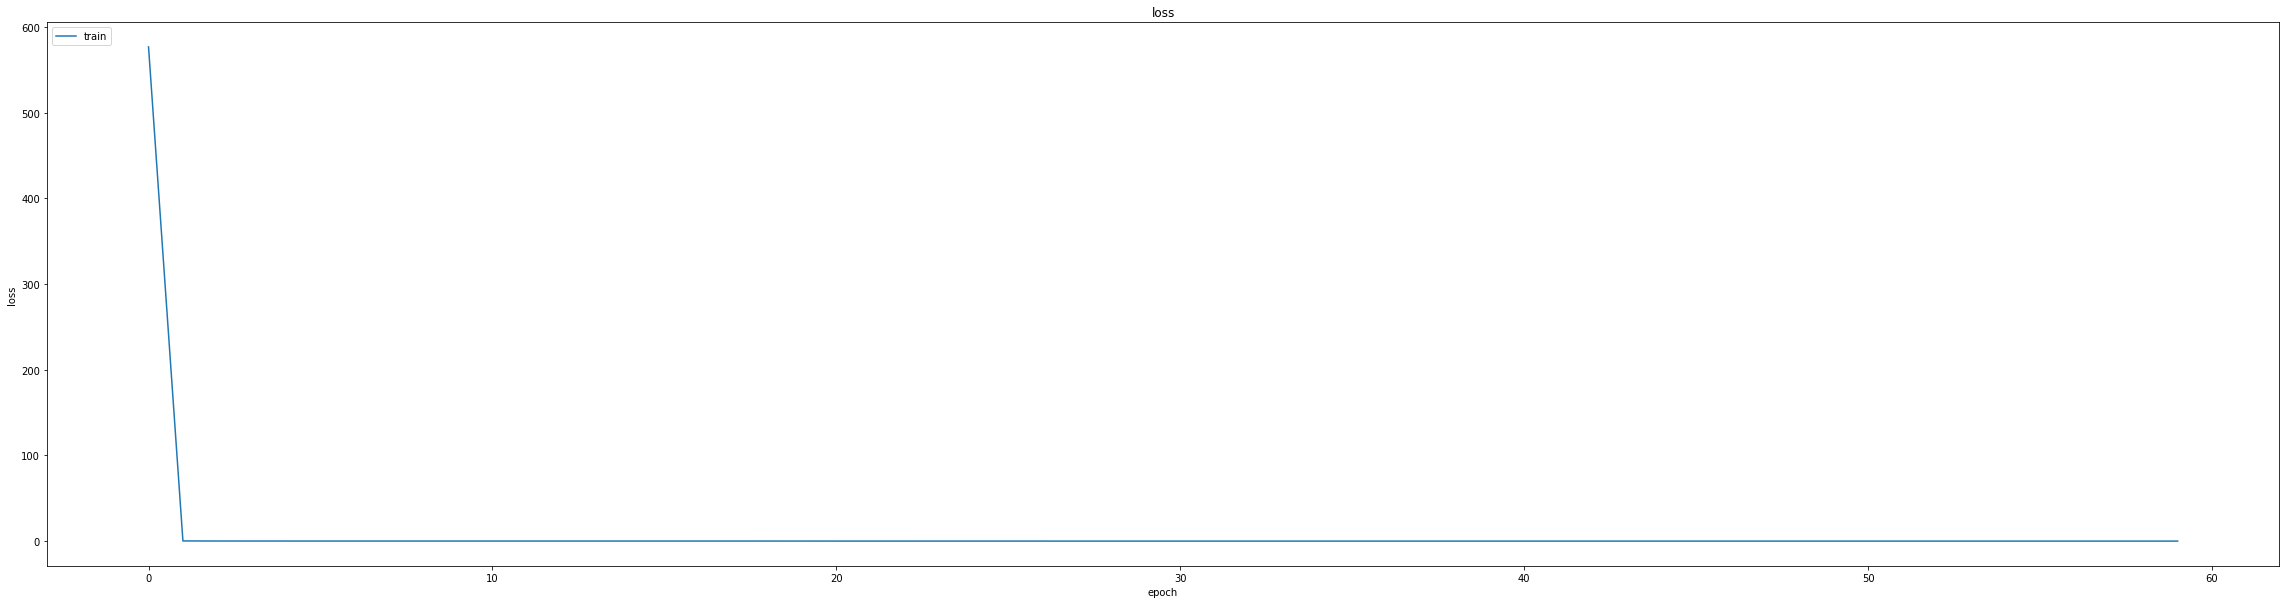

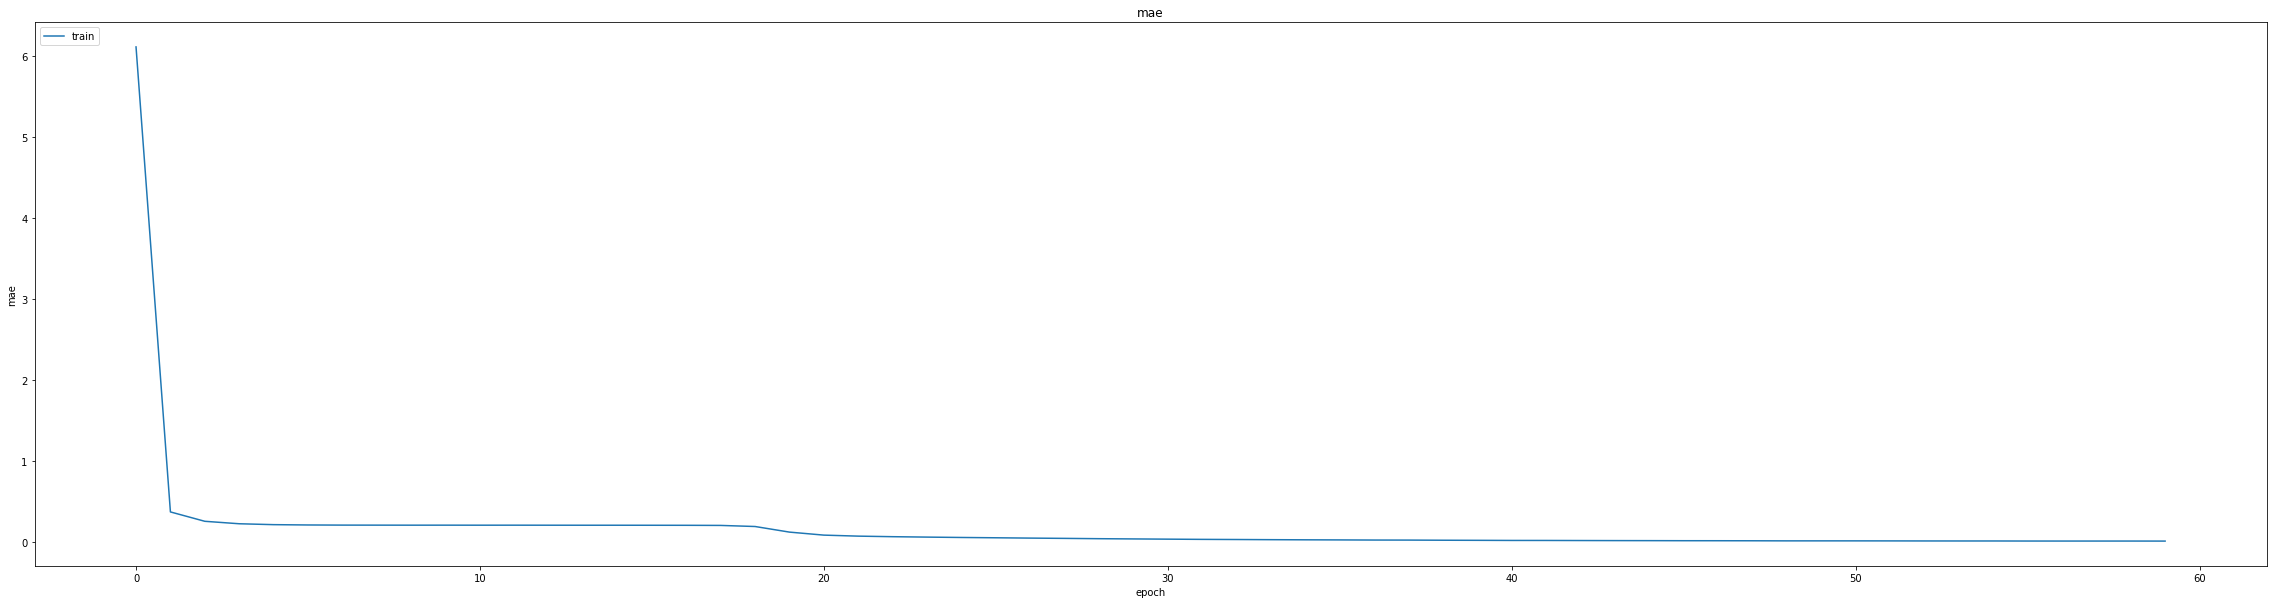

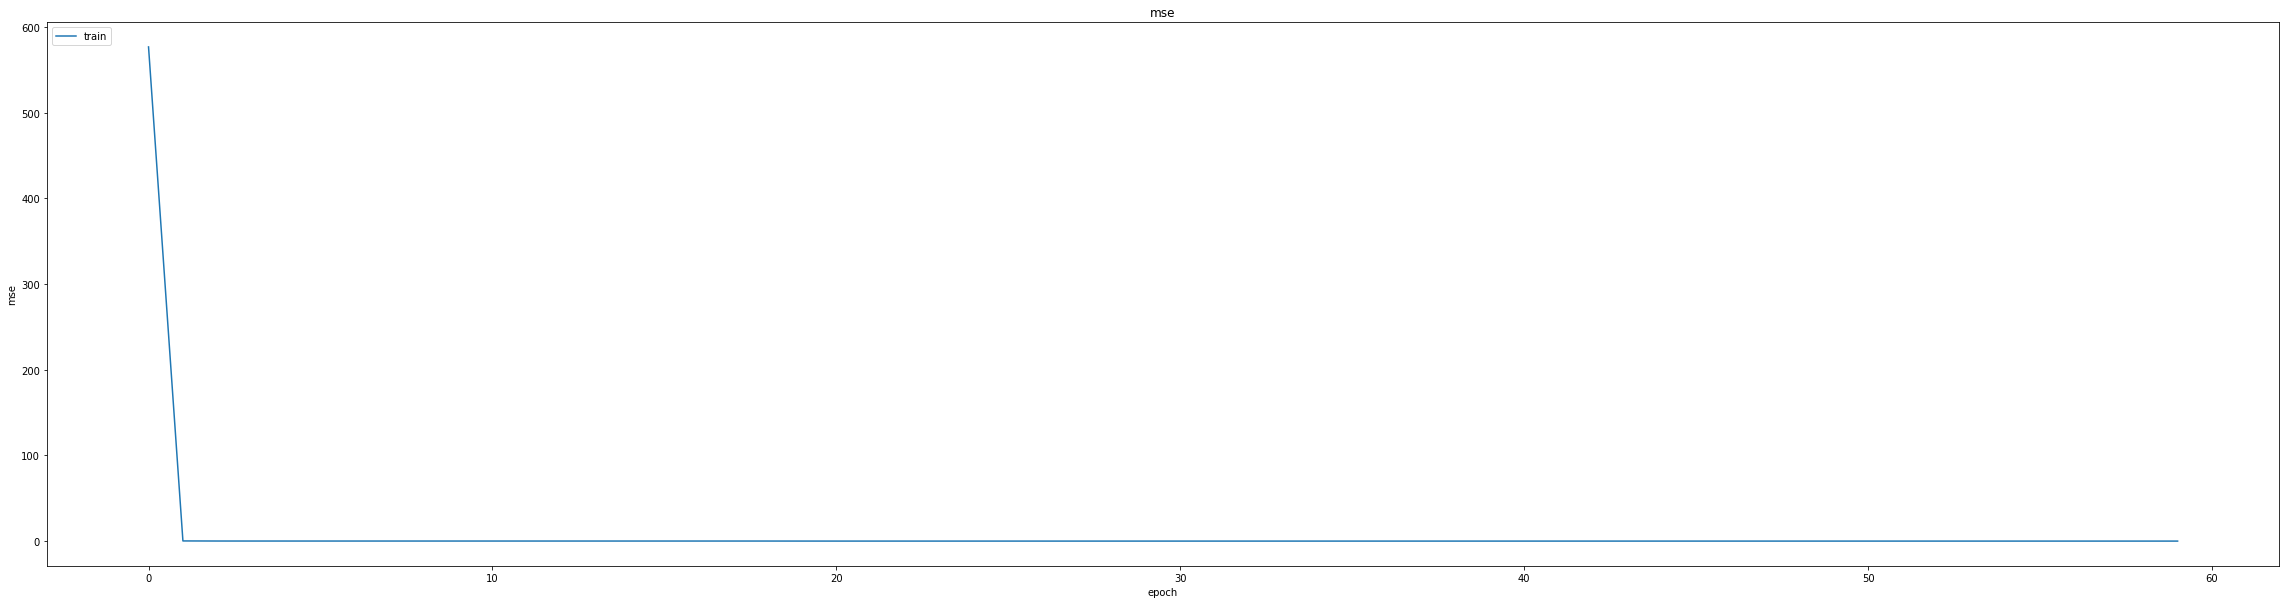

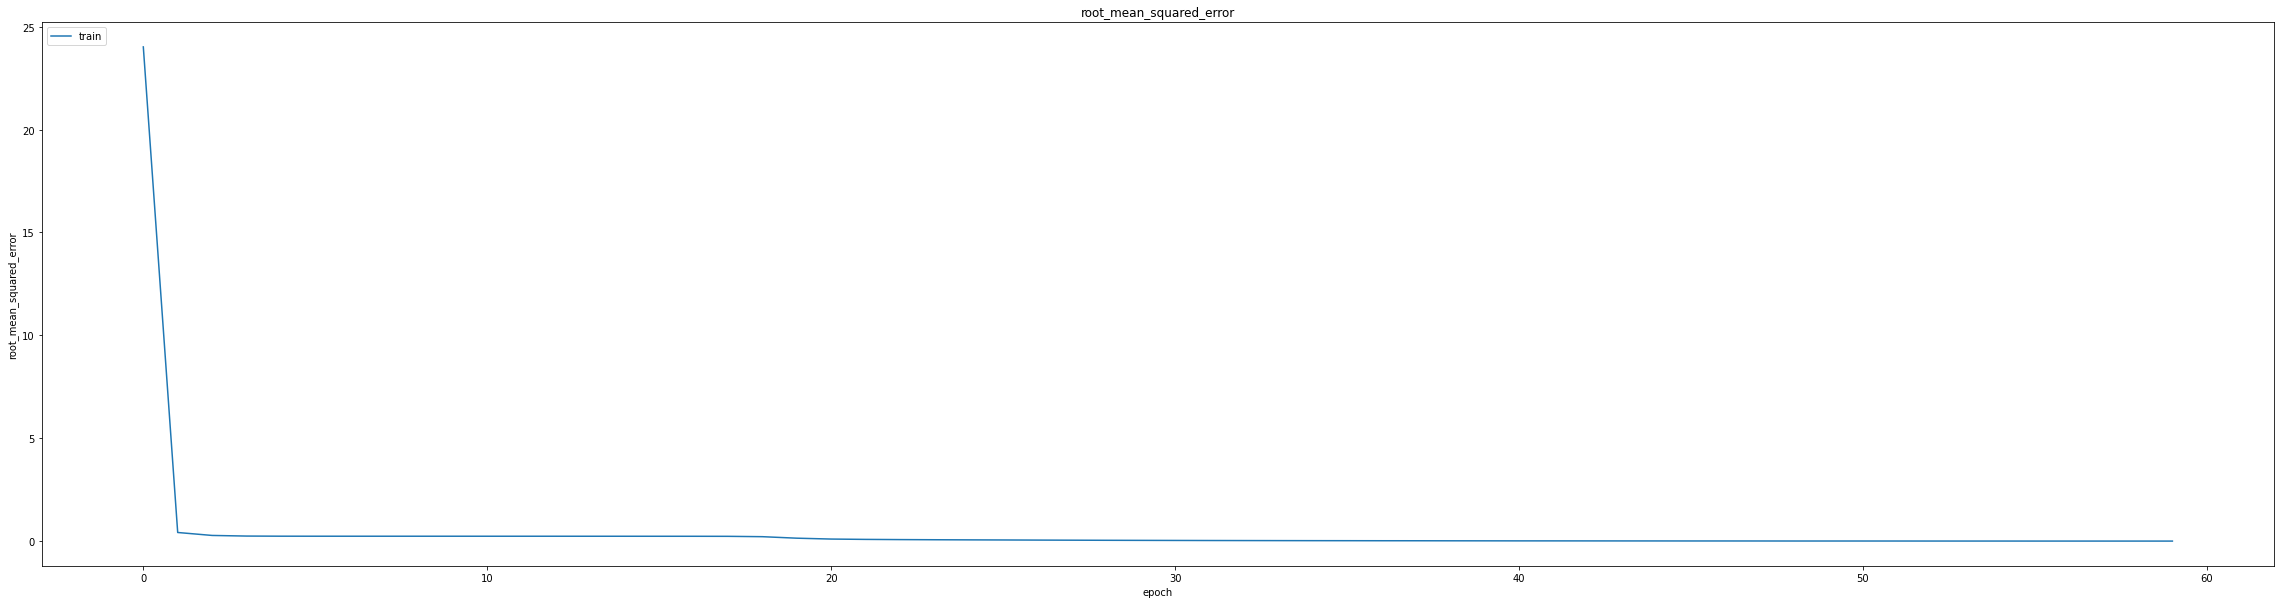

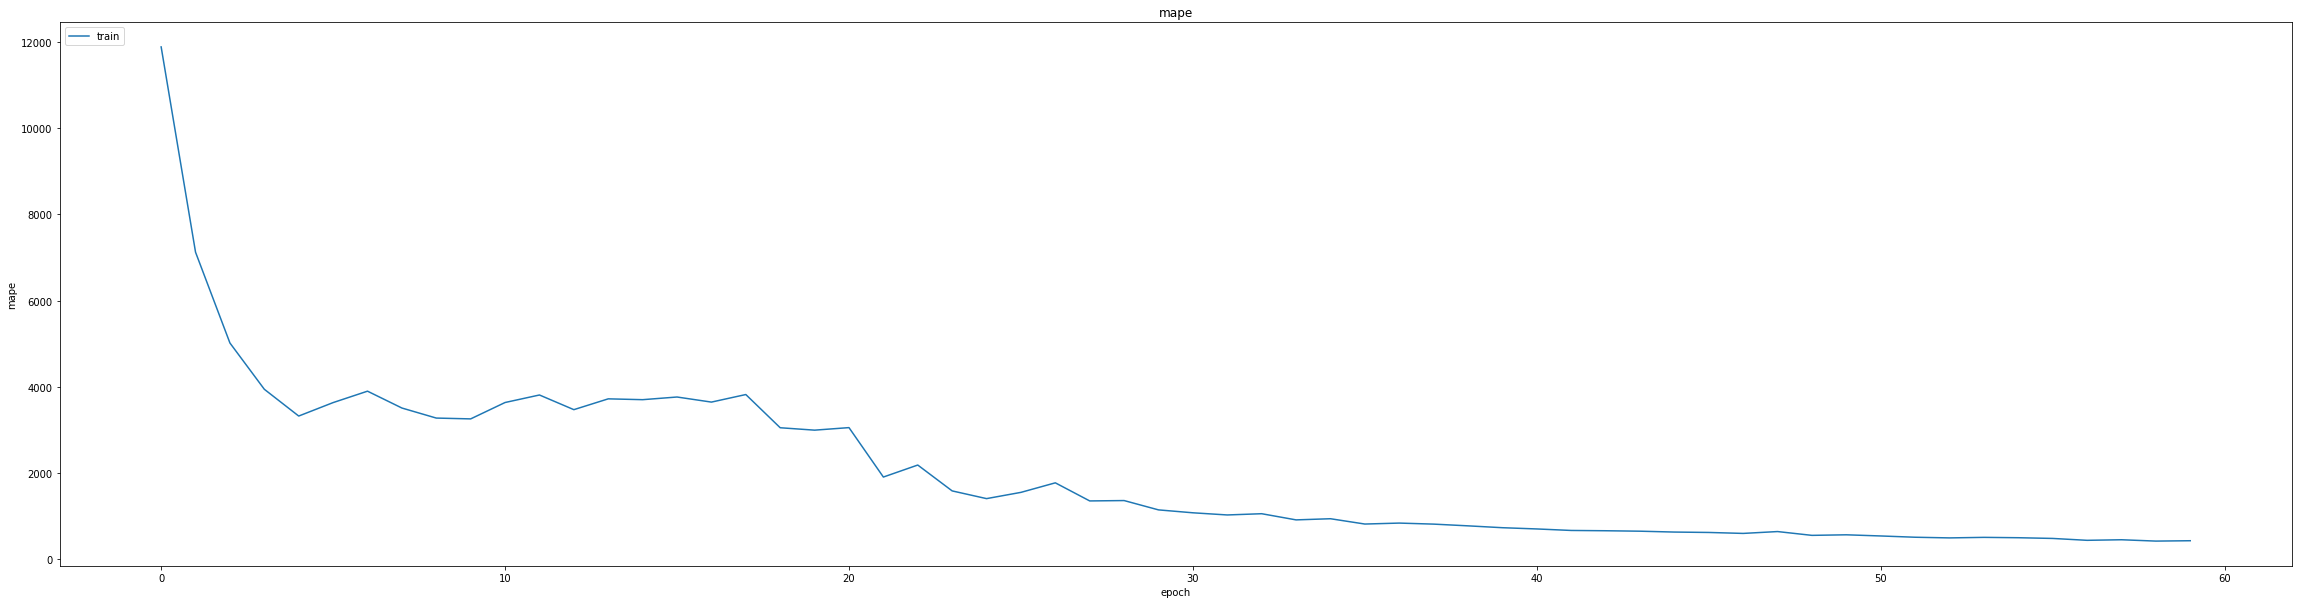

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.0059485784731805325
0.008441228419542313
1390/1390 [==============================] - 10s 6ms/step
0.9985318136311451


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/CHF_USD_5min_BiLSTM(60-40)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)

history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/20


346/347 [============================>.] - ETA: 0s - loss: 0.0034 - mae: 0.0231 - mse: 0.0034 - root_mean_squared_error: 0.0579 - mape: 578.1270
Epoch 1: val_mse did not improve from 0.00007
347/347 [==============================] - 18s 28ms/step - loss: 0.0033 - mae: 0.0230 - mse: 0.0033 - root_mean_squared_error: 0.0578 - mape: 577.2895 - val_loss: 1.3411e-04 - val_mae: 0.0080 - val_mse: 1.3411e-04 - val_root_mean_squared_error: 0.0116 - val_mape: 1391.0477 - lr: 0.0010
Epoch 2/20
345/347 [============================>.] - ETA: 0s - loss: 8.0482e-05 - mae: 0.0068 - mse: 8.0482e-05 - root_mean_squared_error: 0.0090 - mape: 438.5849
Epoch 2: val_mse did not improve from 0.00007
347/347 [==============================] - 8s 22ms/step - loss: 8.0486e-05 - mae: 0.0068 - mse: 8.0486e-05 - root_mean_squared_error: 0.0090 - mape: 436.7040 - val_loss: 1.0044e-04 - val_mae: 0.0072 - val_mse: 1.0044e-04 - val_root_mean_squared_error: 0.0100 - val_mape: 1188.6854 - lr: 0.0010
lr changed to 0.00

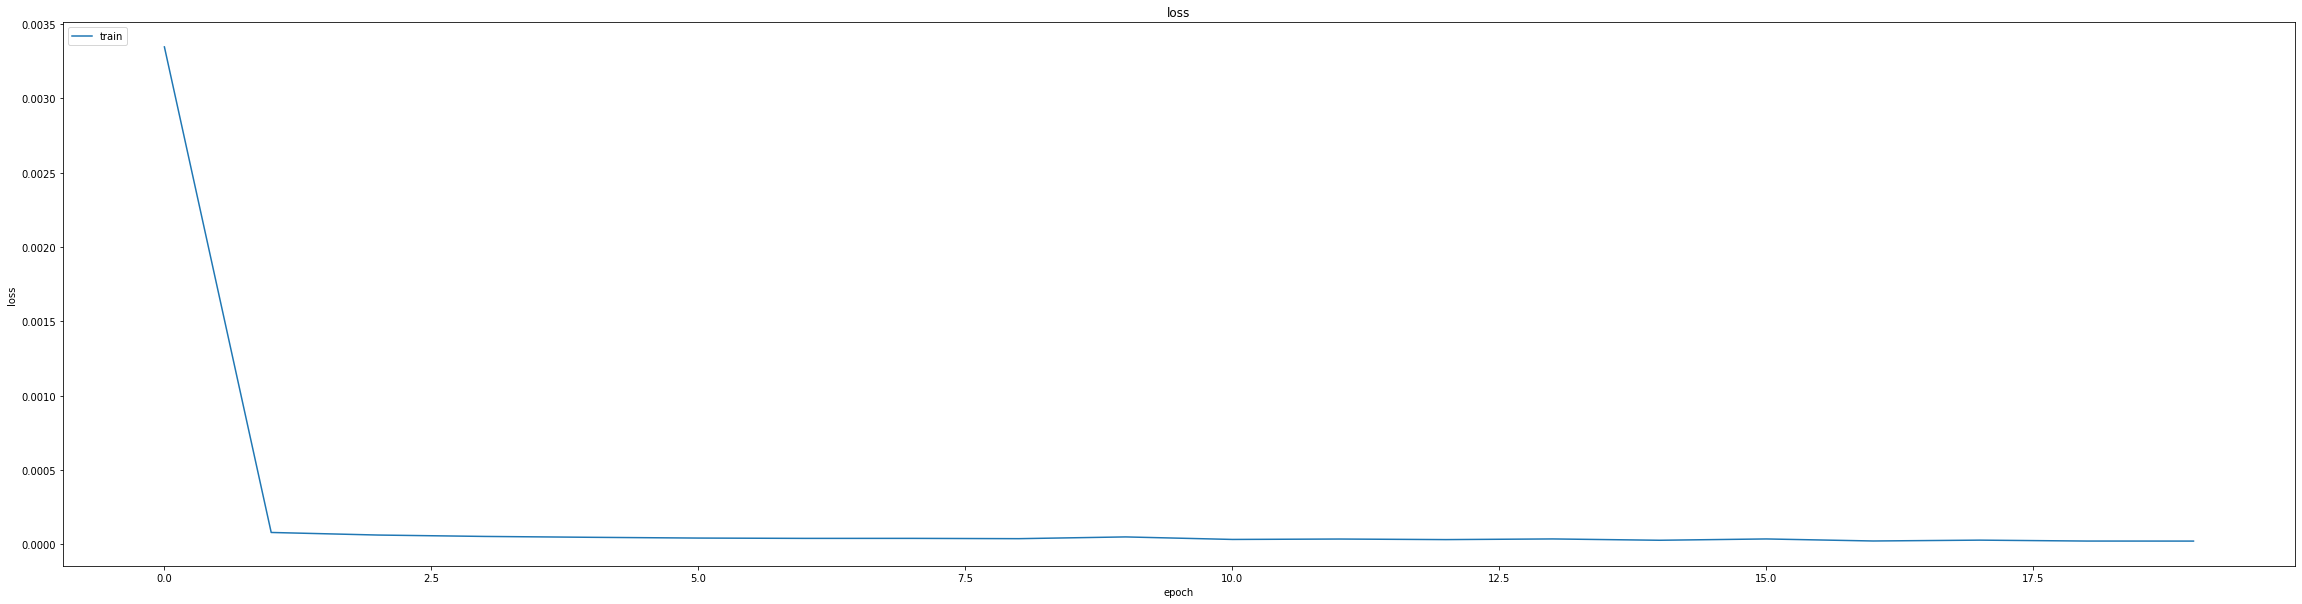

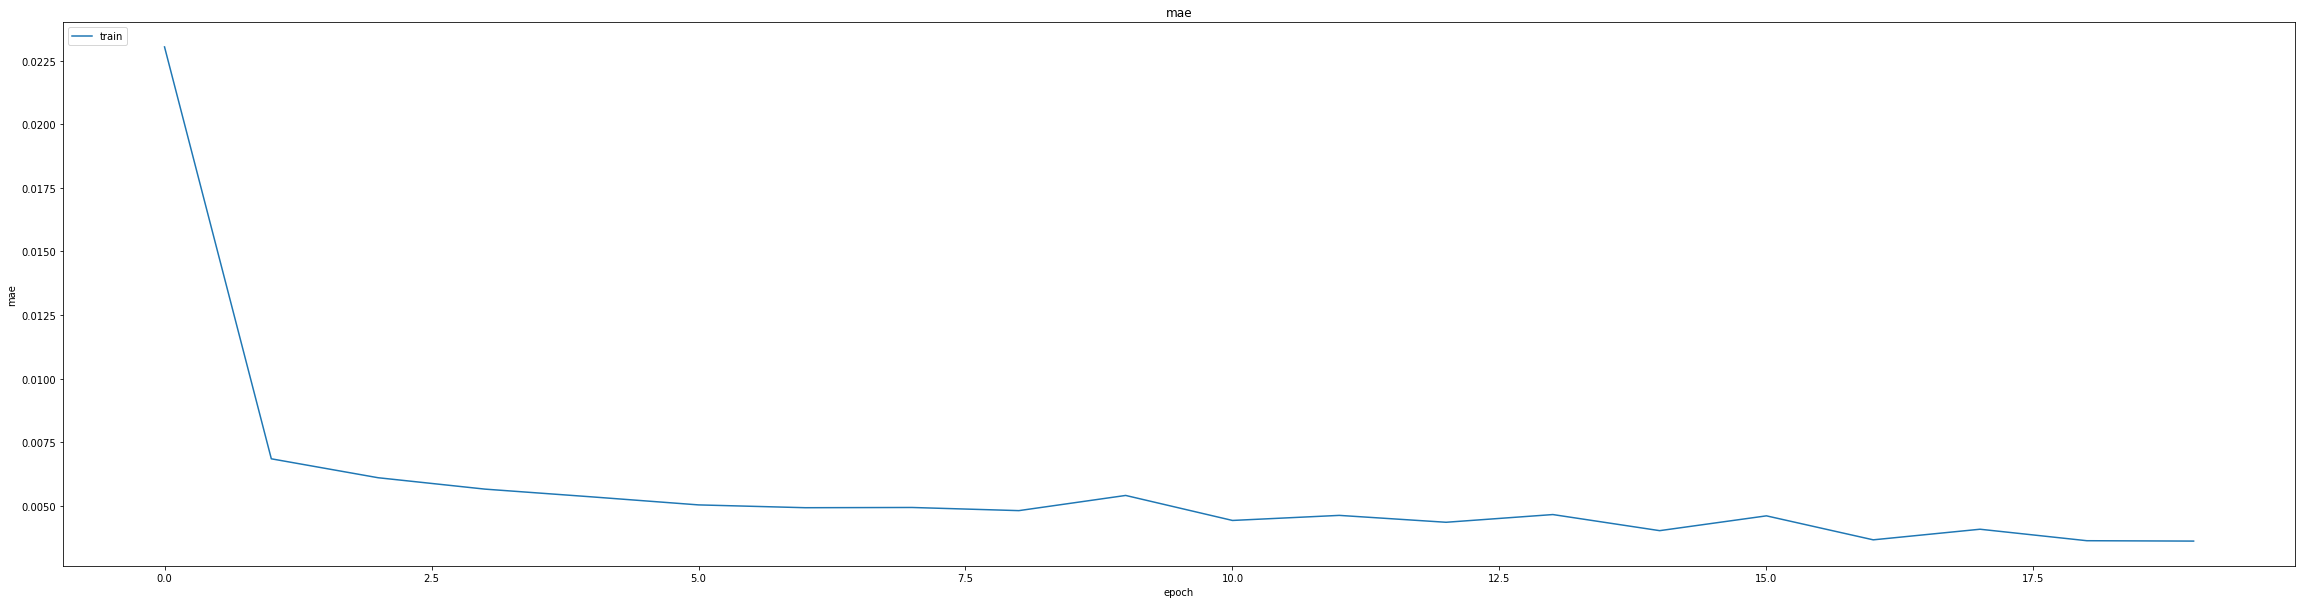

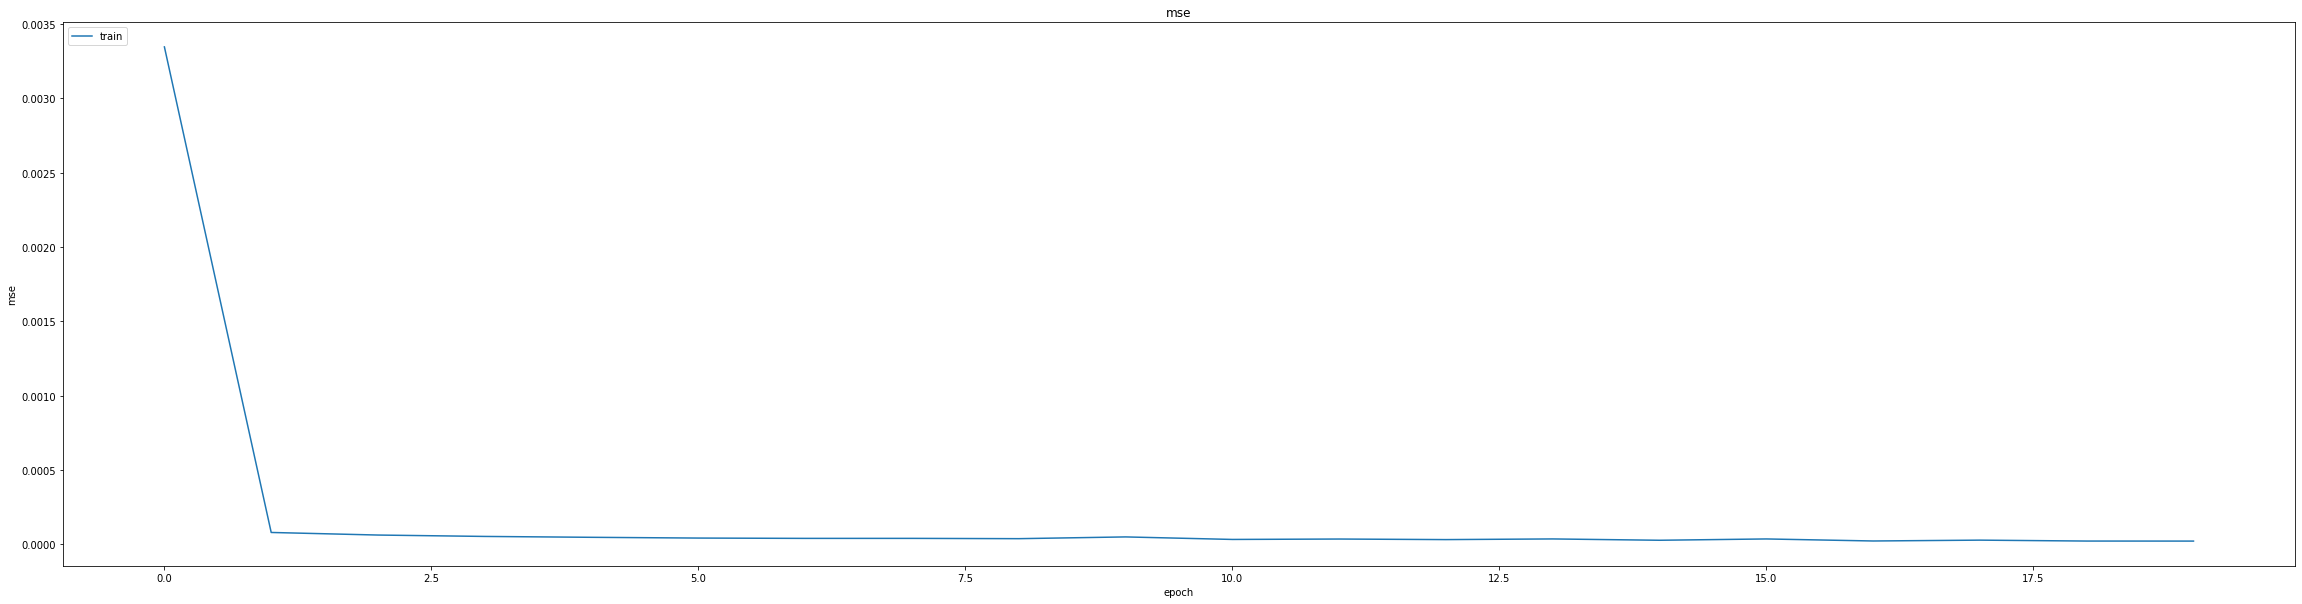

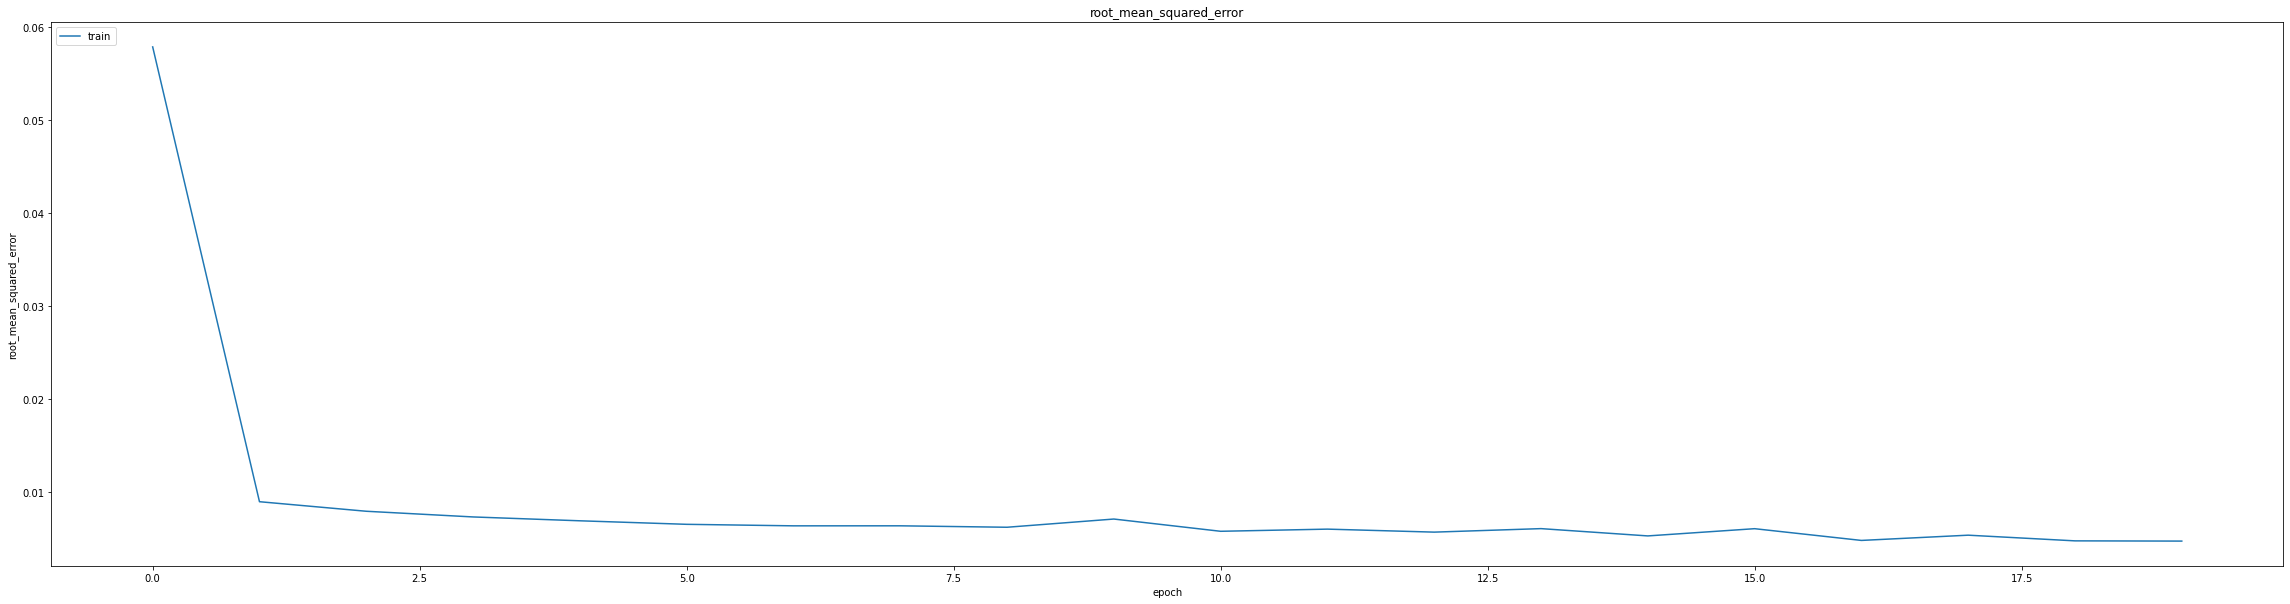

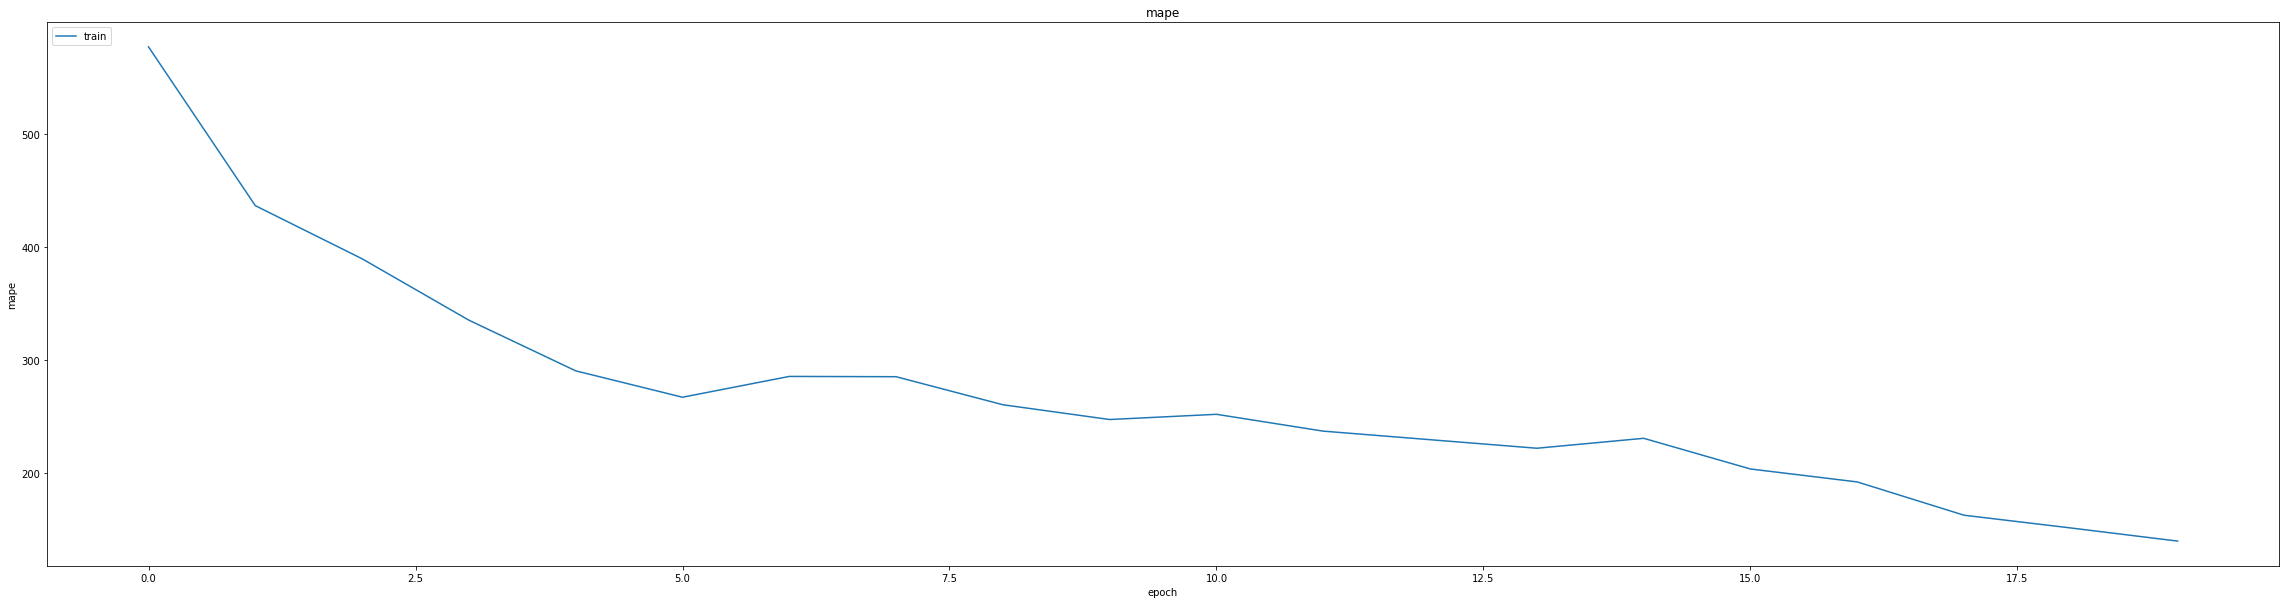

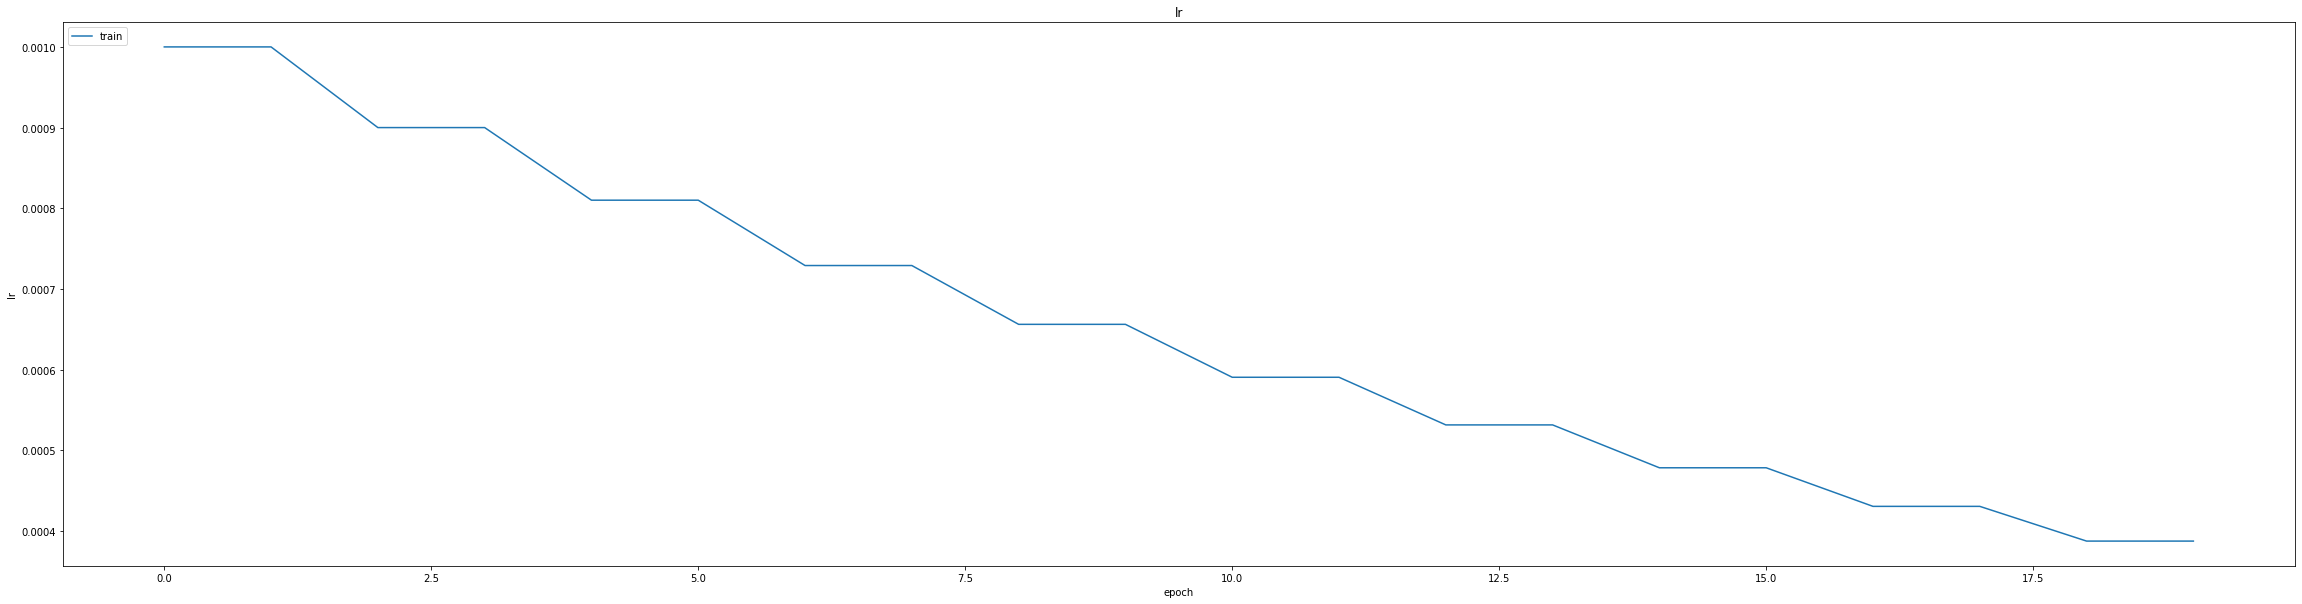

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.006499252747744322
0.008846418000757694
1390/1390 [==============================] - 10s 6ms/step
0.9965274723675118


1390/1390 [==============================] - 9s 6ms/step


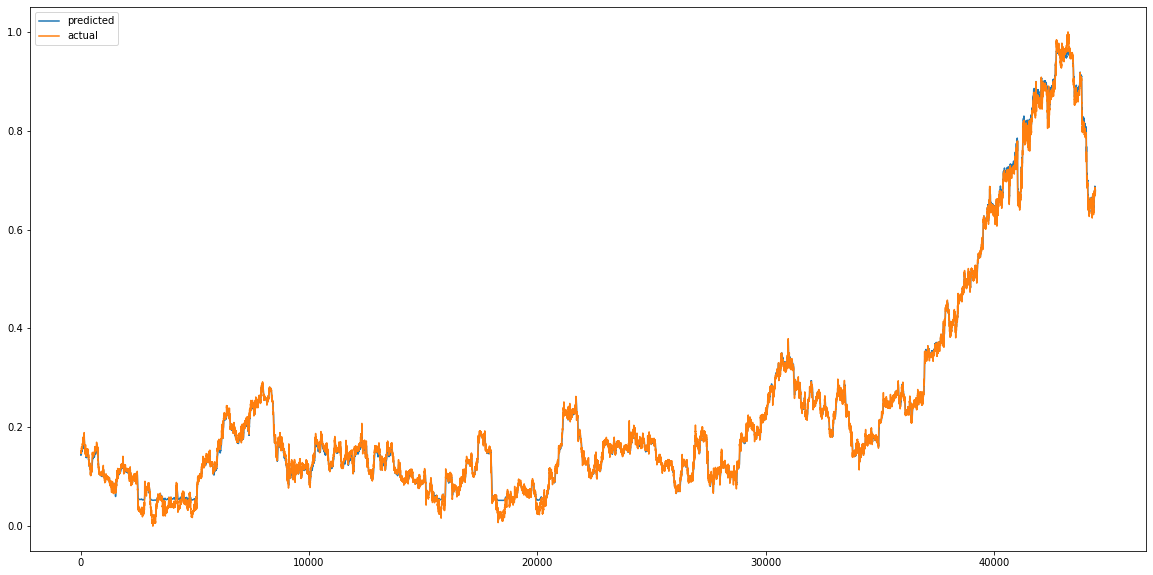

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/CHF_USD_5min_BiLSTM(60-40)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


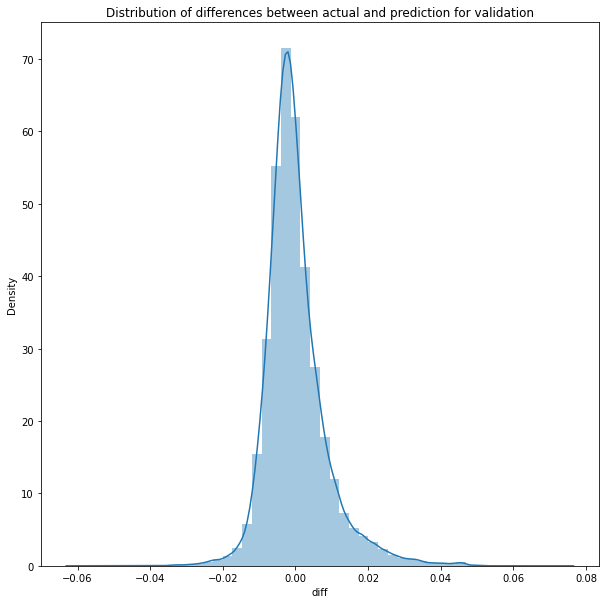

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

1390/1390 [==============================] - 9s 6ms/step


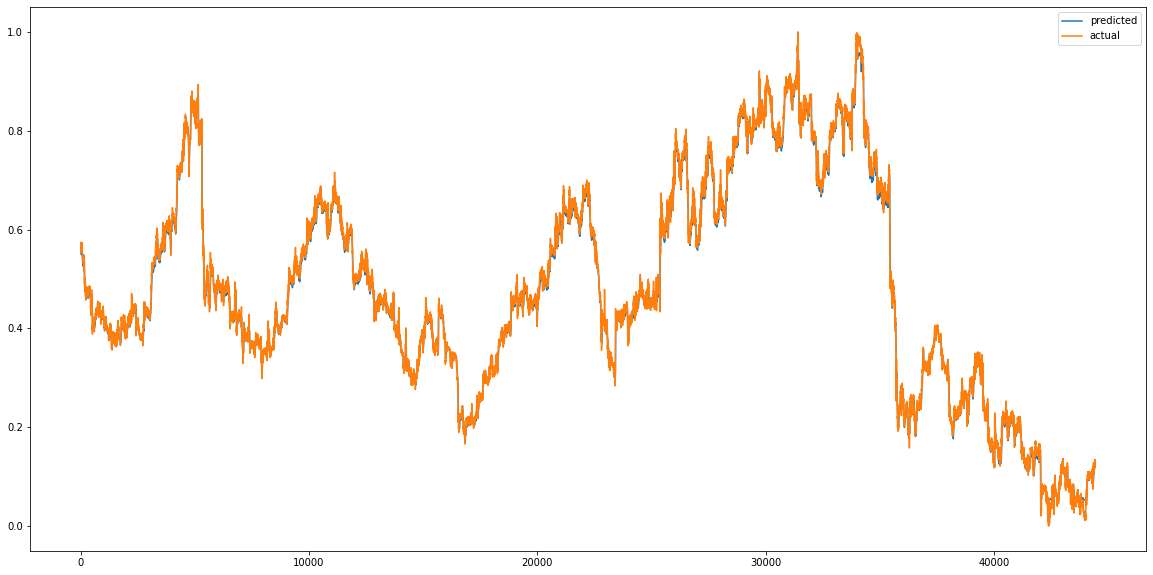

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


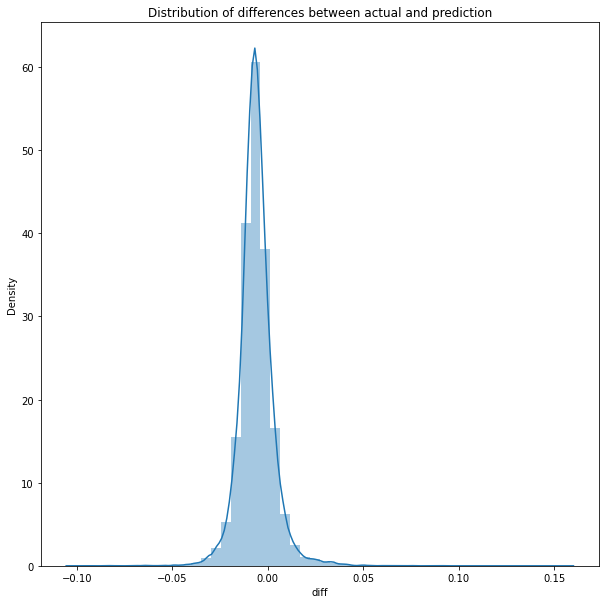

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', test_r2_score)
predictions['diff'].describe()

MSE :  0.00012061648261228989
RMSE :  0.010982553556085664
MAE :  0.008566952190852939
1390/1390 [==============================] - 9s 7ms/step
R2_Score  : 0.9974875877064581


count    44453.000000
mean        -0.006084
std          0.009143
min         -0.102426
25%         -0.010776
50%         -0.006505
75%         -0.001845
max          0.156902
Name: diff, dtype: float64

**LSTM_MODEL**

In [ ]:
model= thesis.LSTM_Model(x_train)
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_7 (LSTM)               (None, 24, 256)           275456    
                                                                 
 lstm_8 (LSTM)               (None, 24, 64)            82176     
                                                                 
 dropout_4 (Dropout)         (None, 24, 64)            0         
                                                                 
 lstm_9 (LSTM)               (None, 16)                5184      
                                                                 
 dense_12 (Dense)            (None, 32)                544       
                                                                 
 dense_13 (Dense)            (None, 16)                528       
                                                                 
 dense_14 (Dense)            (None, 1)                

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/CHF_USD_5min_LSTM(60-40)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=60
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/60
347/347 [==============================] - ETA: 0s - loss: 846.6245 - mae: 10.9358 - mse: 846.6245 - root_mean_squared_error: 29.0968 - mape: 39126.7109
Epoch 1: val_mse improved from inf to 2.27544, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_LSTM(60-40)


347/347 [==============================] - 22s 50ms/step - loss: 846.6245 - mae: 10.9358 - mse: 846.6245 - root_mean_squared_error: 29.0968 - mape: 39126.7109 - val_loss: 2.2754 - val_mae: 1.4923 - val_mse: 2.2754 - val_root_mean_squared_error: 1.5085 - val_mape: 40240.6680
Epoch 2/60
345/347 [============================>.] - ETA: 0s - loss: 0.6223 - mae: 0.6966 - mse: 0.6223 - root_mean_squared_error: 0.7889 - mape: 13602.7842
Epoch 2: val_mse improved from 2.27544 to 0.32292, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_LSTM(60-40)


347/347 [==============================] - 16s 46ms/step - loss: 0.6204 - mae: 0.6952 - mse: 0.6204 - root_mean_squared_error: 0.7877 - mape: 13544.9023 - val_loss: 0.3229 - val_mae: 0.5389 - val_mse: 0.3229 - val_root_mean_squared_error: 0.5683 - val_mape: 17640.8438
Epoch 3/60
346/347 [============================>.] - ETA: 0s - loss: 0.1055 - mae: 0.2843 - mse: 0.1055 - root_mean_squared_error: 0.3247 - mape: 5460.4702
Epoch 3: val_mse improved from 0.32292 to 0.14374, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_LSTM(60-40)


347/347 [==============================] - 17s 49ms/step - loss: 0.1054 - mae: 0.2843 - mse: 0.1054 - root_mean_squared_error: 0.3247 - mape: 5452.6782 - val_loss: 0.1437 - val_mae: 0.3629 - val_mse: 0.1437 - val_root_mean_squared_error: 0.3791 - val_mape: 12622.0967
Epoch 4/60
347/347 [==============================] - ETA: 0s - loss: 0.0658 - mae: 0.2254 - mse: 0.0658 - root_mean_squared_error: 0.2564 - mape: 4470.0405
Epoch 4: val_mse improved from 0.14374 to 0.10436, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_LSTM(60-40)


347/347 [==============================] - 17s 48ms/step - loss: 0.0658 - mae: 0.2254 - mse: 0.0658 - root_mean_squared_error: 0.2564 - mape: 4470.0405 - val_loss: 0.1044 - val_mae: 0.3083 - val_mse: 0.1044 - val_root_mean_squared_error: 0.3230 - val_mape: 10937.5234
Epoch 5/60
344/347 [============================>.] - ETA: 0s - loss: 0.0609 - mae: 0.2101 - mse: 0.0609 - root_mean_squared_error: 0.2467 - mape: 3780.3853
Epoch 5: val_mse improved from 0.10436 to 0.09246, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_LSTM(60-40)


347/347 [==============================] - 17s 48ms/step - loss: 0.0609 - mae: 0.2101 - mse: 0.0609 - root_mean_squared_error: 0.2468 - mape: 3753.6965 - val_loss: 0.0925 - val_mae: 0.2887 - val_mse: 0.0925 - val_root_mean_squared_error: 0.3041 - val_mape: 10315.6807
Epoch 6/60
346/347 [============================>.] - ETA: 0s - loss: 0.0602 - mae: 0.2056 - mse: 0.0602 - root_mean_squared_error: 0.2454 - mape: 3552.0823
Epoch 6: val_mse improved from 0.09246 to 0.08875, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_LSTM(60-40)


347/347 [==============================] - 16s 47ms/step - loss: 0.0602 - mae: 0.2056 - mse: 0.0602 - root_mean_squared_error: 0.2455 - mape: 3547.0505 - val_loss: 0.0887 - val_mae: 0.2822 - val_mse: 0.0887 - val_root_mean_squared_error: 0.2979 - val_mape: 10104.8252
Epoch 7/60
346/347 [============================>.] - ETA: 0s - loss: 0.0602 - mae: 0.2044 - mse: 0.0602 - root_mean_squared_error: 0.2454 - mape: 3274.7729
Epoch 7: val_mse improved from 0.08875 to 0.08781, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_LSTM(60-40)


347/347 [==============================] - 17s 49ms/step - loss: 0.0602 - mae: 0.2044 - mse: 0.0602 - root_mean_squared_error: 0.2454 - mape: 3270.1240 - val_loss: 0.0878 - val_mae: 0.2805 - val_mse: 0.0878 - val_root_mean_squared_error: 0.2963 - val_mape: 10049.7725
Epoch 8/60
345/347 [============================>.] - ETA: 0s - loss: 0.0602 - mae: 0.2041 - mse: 0.0602 - root_mean_squared_error: 0.2454 - mape: 3769.6221
Epoch 8: val_mse improved from 0.08781 to 0.08780, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_LSTM(60-40)


347/347 [==============================] - 17s 49ms/step - loss: 0.0602 - mae: 0.2041 - mse: 0.0602 - root_mean_squared_error: 0.2454 - mape: 3753.5945 - val_loss: 0.0878 - val_mae: 0.2804 - val_mse: 0.0878 - val_root_mean_squared_error: 0.2963 - val_mape: 10049.1504
Epoch 9/60
347/347 [==============================] - ETA: 0s - loss: 0.0603 - mae: 0.2042 - mse: 0.0603 - root_mean_squared_error: 0.2456 - mape: 3806.8062
Epoch 9: val_mse did not improve from 0.08780
347/347 [==============================] - 6s 17ms/step - loss: 0.0603 - mae: 0.2042 - mse: 0.0603 - root_mean_squared_error: 0.2456 - mape: 3806.8062 - val_loss: 0.0879 - val_mae: 0.2806 - val_mse: 0.0879 - val_root_mean_squared_error: 0.2965 - val_mape: 10054.7305
Epoch 10/60
347/347 [==============================] - ETA: 0s - loss: 0.0603 - mae: 0.2042 - mse: 0.0603 - root_mean_squared_error: 0.2455 - mape: 3297.8313
Epoch 10: val_mse improved from 0.08780 to 0.08774, saving model to /content/drive/MyDrive/modelweights/

347/347 [==============================] - 17s 48ms/step - loss: 0.0603 - mae: 0.2042 - mse: 0.0603 - root_mean_squared_error: 0.2455 - mape: 3297.8313 - val_loss: 0.0877 - val_mae: 0.2803 - val_mse: 0.0877 - val_root_mean_squared_error: 0.2962 - val_mape: 10045.8623
Epoch 11/60
345/347 [============================>.] - ETA: 0s - loss: 0.0602 - mae: 0.2042 - mse: 0.0602 - root_mean_squared_error: 0.2454 - mape: 3399.5662
Epoch 11: val_mse improved from 0.08774 to 0.08737, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_LSTM(60-40)


347/347 [==============================] - 18s 51ms/step - loss: 0.0602 - mae: 0.2042 - mse: 0.0602 - root_mean_squared_error: 0.2454 - mape: 3385.1270 - val_loss: 0.0874 - val_mae: 0.2797 - val_mse: 0.0874 - val_root_mean_squared_error: 0.2956 - val_mape: 10024.0869
Epoch 12/60
346/347 [============================>.] - ETA: 0s - loss: 0.0602 - mae: 0.2041 - mse: 0.0602 - root_mean_squared_error: 0.2453 - mape: 3345.6196
Epoch 12: val_mse improved from 0.08737 to 0.08686, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_LSTM(60-40)


347/347 [==============================] - 16s 46ms/step - loss: 0.0602 - mae: 0.2041 - mse: 0.0602 - root_mean_squared_error: 0.2453 - mape: 3340.8403 - val_loss: 0.0869 - val_mae: 0.2787 - val_mse: 0.0869 - val_root_mean_squared_error: 0.2947 - val_mape: 9993.5508
Epoch 13/60
345/347 [============================>.] - ETA: 0s - loss: 0.0602 - mae: 0.2040 - mse: 0.0602 - root_mean_squared_error: 0.2454 - mape: 3973.7654
Epoch 13: val_mse did not improve from 0.08686
347/347 [==============================] - 6s 18ms/step - loss: 0.0602 - mae: 0.2040 - mse: 0.0602 - root_mean_squared_error: 0.2454 - mape: 3956.8511 - val_loss: 0.0876 - val_mae: 0.2801 - val_mse: 0.0876 - val_root_mean_squared_error: 0.2960 - val_mape: 10037.7041
Epoch 14/60
347/347 [==============================] - ETA: 0s - loss: 0.0602 - mae: 0.2040 - mse: 0.0602 - root_mean_squared_error: 0.2453 - mape: 3280.0659
Epoch 14: val_mse did not improve from 0.08686
347/347 [==============================] - 6s 16ms/step 

347/347 [==============================] - 17s 49ms/step - loss: 0.0601 - mae: 0.2041 - mse: 0.0601 - root_mean_squared_error: 0.2453 - mape: 3293.0371 - val_loss: 0.0858 - val_mae: 0.2767 - val_mse: 0.0858 - val_root_mean_squared_error: 0.2929 - val_mape: 9927.9395
Epoch 21/60
347/347 [==============================] - ETA: 0s - loss: 0.0601 - mae: 0.2039 - mse: 0.0601 - root_mean_squared_error: 0.2451 - mape: 3465.0652
Epoch 21: val_mse did not improve from 0.08576
347/347 [==============================] - 6s 16ms/step - loss: 0.0601 - mae: 0.2039 - mse: 0.0601 - root_mean_squared_error: 0.2451 - mape: 3465.0652 - val_loss: 0.0878 - val_mae: 0.2804 - val_mse: 0.0878 - val_root_mean_squared_error: 0.2963 - val_mape: 10047.2734
Epoch 22/60
345/347 [============================>.] - ETA: 0s - loss: 0.0601 - mae: 0.2040 - mse: 0.0601 - root_mean_squared_error: 0.2451 - mape: 3617.5837
Epoch 22: val_mse did not improve from 0.08576
347/347 [==============================] - 6s 16ms/step 

347/347 [==============================] - 17s 48ms/step - loss: 0.0589 - mae: 0.2024 - mse: 0.0589 - root_mean_squared_error: 0.2427 - mape: 3201.4561 - val_loss: 0.0772 - val_mae: 0.2627 - val_mse: 0.0772 - val_root_mean_squared_error: 0.2779 - val_mape: 9590.5684
Epoch 33/60
346/347 [============================>.] - ETA: 0s - loss: 0.0596 - mae: 0.2034 - mse: 0.0596 - root_mean_squared_error: 0.2442 - mape: 3579.5801
Epoch 33: val_mse did not improve from 0.07724
347/347 [==============================] - 6s 17ms/step - loss: 0.0597 - mae: 0.2035 - mse: 0.0597 - root_mean_squared_error: 0.2442 - mape: 3574.4973 - val_loss: 0.0905 - val_mae: 0.2853 - val_mse: 0.0905 - val_root_mean_squared_error: 0.3009 - val_mape: 10206.4619
Epoch 34/60
344/347 [============================>.] - ETA: 0s - loss: 0.0596 - mae: 0.2036 - mse: 0.0596 - root_mean_squared_error: 0.2442 - mape: 3720.2554
Epoch 34: val_mse did not improve from 0.07724
347/347 [==============================] - 6s 16ms/step 

347/347 [==============================] - 17s 49ms/step - loss: 0.0480 - mae: 0.1787 - mse: 0.0480 - root_mean_squared_error: 0.2192 - mape: 3676.4624 - val_loss: 0.0170 - val_mae: 0.1133 - val_mse: 0.0170 - val_root_mean_squared_error: 0.1303 - val_mape: 6115.1050
Epoch 39/60
347/347 [==============================] - ETA: 0s - loss: 0.0057 - mae: 0.0586 - mse: 0.0057 - root_mean_squared_error: 0.0755 - mape: 1467.7462
Epoch 39: val_mse improved from 0.01699 to 0.00380, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_LSTM(60-40)


347/347 [==============================] - 16s 47ms/step - loss: 0.0057 - mae: 0.0586 - mse: 0.0057 - root_mean_squared_error: 0.0755 - mape: 1467.7462 - val_loss: 0.0038 - val_mae: 0.0470 - val_mse: 0.0038 - val_root_mean_squared_error: 0.0616 - val_mape: 3949.0222
Epoch 40/60
346/347 [============================>.] - ETA: 0s - loss: 0.0025 - mae: 0.0390 - mse: 0.0025 - root_mean_squared_error: 0.0505 - mape: 1379.6525
Epoch 40: val_mse improved from 0.00380 to 0.00173, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_LSTM(60-40)


347/347 [==============================] - 17s 49ms/step - loss: 0.0025 - mae: 0.0390 - mse: 0.0025 - root_mean_squared_error: 0.0505 - mape: 1377.6699 - val_loss: 0.0017 - val_mae: 0.0289 - val_mse: 0.0017 - val_root_mean_squared_error: 0.0416 - val_mape: 3133.9595
Epoch 41/60
344/347 [============================>.] - ETA: 0s - loss: 0.0018 - mae: 0.0322 - mse: 0.0018 - root_mean_squared_error: 0.0422 - mape: 965.7424
Epoch 41: val_mse improved from 0.00173 to 0.00126, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_LSTM(60-40)


347/347 [==============================] - 17s 49ms/step - loss: 0.0018 - mae: 0.0322 - mse: 0.0018 - root_mean_squared_error: 0.0422 - mape: 958.8530 - val_loss: 0.0013 - val_mae: 0.0259 - val_mse: 0.0013 - val_root_mean_squared_error: 0.0355 - val_mape: 2783.4636
Epoch 42/60
347/347 [==============================] - ETA: 0s - loss: 0.0013 - mae: 0.0276 - mse: 0.0013 - root_mean_squared_error: 0.0364 - mape: 1002.0615
Epoch 42: val_mse improved from 0.00126 to 0.00094, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_LSTM(60-40)


347/347 [==============================] - 17s 49ms/step - loss: 0.0013 - mae: 0.0276 - mse: 0.0013 - root_mean_squared_error: 0.0364 - mape: 1002.0615 - val_loss: 9.4415e-04 - val_mae: 0.0210 - val_mse: 9.4415e-04 - val_root_mean_squared_error: 0.0307 - val_mape: 2599.3052
Epoch 43/60
344/347 [============================>.] - ETA: 0s - loss: 0.0011 - mae: 0.0253 - mse: 0.0011 - root_mean_squared_error: 0.0334 - mape: 847.4146
Epoch 43: val_mse improved from 0.00094 to 0.00083, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_LSTM(60-40)


347/347 [==============================] - 16s 47ms/step - loss: 0.0011 - mae: 0.0253 - mse: 0.0011 - root_mean_squared_error: 0.0334 - mape: 841.3588 - val_loss: 8.2642e-04 - val_mae: 0.0208 - val_mse: 8.2642e-04 - val_root_mean_squared_error: 0.0287 - val_mape: 2440.4055
Epoch 44/60
346/347 [============================>.] - ETA: 0s - loss: 9.2997e-04 - mae: 0.0230 - mse: 9.2997e-04 - root_mean_squared_error: 0.0305 - mape: 843.1915
Epoch 44: val_mse improved from 0.00083 to 0.00065, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_LSTM(60-40)


347/347 [==============================] - 17s 50ms/step - loss: 9.3030e-04 - mae: 0.0230 - mse: 9.3030e-04 - root_mean_squared_error: 0.0305 - mape: 841.9772 - val_loss: 6.4799e-04 - val_mae: 0.0168 - val_mse: 6.4799e-04 - val_root_mean_squared_error: 0.0255 - val_mape: 2347.9199
Epoch 45/60
344/347 [============================>.] - ETA: 0s - loss: 7.6631e-04 - mae: 0.0209 - mse: 7.6631e-04 - root_mean_squared_error: 0.0277 - mape: 752.5323
Epoch 45: val_mse improved from 0.00065 to 0.00060, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_LSTM(60-40)


347/347 [==============================] - 17s 48ms/step - loss: 7.6613e-04 - mae: 0.0209 - mse: 7.6613e-04 - root_mean_squared_error: 0.0277 - mape: 747.1498 - val_loss: 5.9720e-04 - val_mae: 0.0165 - val_mse: 5.9720e-04 - val_root_mean_squared_error: 0.0244 - val_mape: 2214.4658
Epoch 46/60
345/347 [============================>.] - ETA: 0s - loss: 6.6162e-04 - mae: 0.0195 - mse: 6.6162e-04 - root_mean_squared_error: 0.0257 - mape: 701.7651
Epoch 46: val_mse improved from 0.00060 to 0.00051, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_LSTM(60-40)


347/347 [==============================] - 17s 48ms/step - loss: 6.6131e-04 - mae: 0.0195 - mse: 6.6131e-04 - root_mean_squared_error: 0.0257 - mape: 698.7731 - val_loss: 5.0528e-04 - val_mae: 0.0152 - val_mse: 5.0528e-04 - val_root_mean_squared_error: 0.0225 - val_mape: 2120.4585
Epoch 47/60
344/347 [============================>.] - ETA: 0s - loss: 5.6920e-04 - mae: 0.0181 - mse: 5.6920e-04 - root_mean_squared_error: 0.0239 - mape: 723.6965
Epoch 47: val_mse improved from 0.00051 to 0.00043, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_LSTM(60-40)


347/347 [==============================] - 16s 47ms/step - loss: 5.6854e-04 - mae: 0.0181 - mse: 5.6854e-04 - root_mean_squared_error: 0.0238 - mape: 718.5124 - val_loss: 4.3134e-04 - val_mae: 0.0140 - val_mse: 4.3134e-04 - val_root_mean_squared_error: 0.0208 - val_mape: 2006.8579
Epoch 48/60
346/347 [============================>.] - ETA: 0s - loss: 4.9174e-04 - mae: 0.0168 - mse: 4.9174e-04 - root_mean_squared_error: 0.0222 - mape: 753.1933
Epoch 48: val_mse did not improve from 0.00043
347/347 [==============================] - 6s 16ms/step - loss: 4.9162e-04 - mae: 0.0168 - mse: 4.9162e-04 - root_mean_squared_error: 0.0222 - mape: 752.1064 - val_loss: 4.4063e-04 - val_mae: 0.0148 - val_mse: 4.4063e-04 - val_root_mean_squared_error: 0.0210 - val_mape: 1931.3585
Epoch 49/60
344/347 [============================>.] - ETA: 0s - loss: 4.3851e-04 - mae: 0.0159 - mse: 4.3851e-04 - root_mean_squared_error: 0.0209 - mape: 630.8305
Epoch 49: val_mse improved from 0.00043 to 0.00033, saving m

347/347 [==============================] - 18s 51ms/step - loss: 4.3781e-04 - mae: 0.0159 - mse: 4.3781e-04 - root_mean_squared_error: 0.0209 - mape: 626.3046 - val_loss: 3.3066e-04 - val_mae: 0.0125 - val_mse: 3.3066e-04 - val_root_mean_squared_error: 0.0182 - val_mape: 1816.7114
Epoch 50/60
344/347 [============================>.] - ETA: 0s - loss: 3.7106e-04 - mae: 0.0147 - mse: 3.7106e-04 - root_mean_squared_error: 0.0193 - mape: 602.9887
Epoch 50: val_mse improved from 0.00033 to 0.00029, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_LSTM(60-40)


347/347 [==============================] - 17s 48ms/step - loss: 3.7081e-04 - mae: 0.0147 - mse: 3.7081e-04 - root_mean_squared_error: 0.0193 - mape: 598.6677 - val_loss: 2.8946e-04 - val_mae: 0.0119 - val_mse: 2.8946e-04 - val_root_mean_squared_error: 0.0170 - val_mape: 1731.1204
Epoch 51/60
346/347 [============================>.] - ETA: 0s - loss: 3.2494e-04 - mae: 0.0138 - mse: 3.2494e-04 - root_mean_squared_error: 0.0180 - mape: 622.9752
Epoch 51: val_mse did not improve from 0.00029
347/347 [==============================] - 6s 17ms/step - loss: 3.2489e-04 - mae: 0.0138 - mse: 3.2489e-04 - root_mean_squared_error: 0.0180 - mape: 622.0748 - val_loss: 2.9943e-04 - val_mae: 0.0121 - val_mse: 2.9943e-04 - val_root_mean_squared_error: 0.0173 - val_mape: 1649.1539
Epoch 52/60
346/347 [============================>.] - ETA: 0s - loss: 2.9806e-04 - mae: 0.0132 - mse: 2.9806e-04 - root_mean_squared_error: 0.0173 - mape: 529.1513
Epoch 52: val_mse improved from 0.00029 to 0.00026, saving m

347/347 [==============================] - 17s 48ms/step - loss: 2.9802e-04 - mae: 0.0132 - mse: 2.9802e-04 - root_mean_squared_error: 0.0173 - mape: 528.3893 - val_loss: 2.5603e-04 - val_mae: 0.0112 - val_mse: 2.5603e-04 - val_root_mean_squared_error: 0.0160 - val_mape: 1586.6843
Epoch 53/60
347/347 [==============================] - ETA: 0s - loss: 2.7117e-04 - mae: 0.0126 - mse: 2.7117e-04 - root_mean_squared_error: 0.0165 - mape: 511.7787
Epoch 53: val_mse improved from 0.00026 to 0.00023, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_LSTM(60-40)


347/347 [==============================] - 16s 47ms/step - loss: 2.7117e-04 - mae: 0.0126 - mse: 2.7117e-04 - root_mean_squared_error: 0.0165 - mape: 511.7787 - val_loss: 2.2685e-04 - val_mae: 0.0107 - val_mse: 2.2685e-04 - val_root_mean_squared_error: 0.0151 - val_mape: 1504.6443
Epoch 54/60
344/347 [============================>.] - ETA: 0s - loss: 2.3561e-04 - mae: 0.0118 - mse: 2.3561e-04 - root_mean_squared_error: 0.0153 - mape: 483.7272
Epoch 54: val_mse did not improve from 0.00023
347/347 [==============================] - 6s 16ms/step - loss: 2.3548e-04 - mae: 0.0118 - mse: 2.3548e-04 - root_mean_squared_error: 0.0153 - mape: 480.2618 - val_loss: 2.4100e-04 - val_mae: 0.0114 - val_mse: 2.4100e-04 - val_root_mean_squared_error: 0.0155 - val_mape: 1423.5801
Epoch 55/60
347/347 [==============================] - ETA: 0s - loss: 2.2892e-04 - mae: 0.0116 - mse: 2.2892e-04 - root_mean_squared_error: 0.0151 - mape: 469.8158
Epoch 55: val_mse improved from 0.00023 to 0.00021, saving m

347/347 [==============================] - 17s 49ms/step - loss: 2.2892e-04 - mae: 0.0116 - mse: 2.2892e-04 - root_mean_squared_error: 0.0151 - mape: 469.8158 - val_loss: 2.1219e-04 - val_mae: 0.0103 - val_mse: 2.1219e-04 - val_root_mean_squared_error: 0.0146 - val_mape: 1380.6675
Epoch 56/60
345/347 [============================>.] - ETA: 0s - loss: 2.1988e-04 - mae: 0.0113 - mse: 2.1988e-04 - root_mean_squared_error: 0.0148 - mape: 550.7706
Epoch 56: val_mse improved from 0.00021 to 0.00019, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_LSTM(60-40)


347/347 [==============================] - 17s 48ms/step - loss: 2.1985e-04 - mae: 0.0113 - mse: 2.1985e-04 - root_mean_squared_error: 0.0148 - mape: 548.4052 - val_loss: 1.8610e-04 - val_mae: 0.0096 - val_mse: 1.8610e-04 - val_root_mean_squared_error: 0.0136 - val_mape: 1320.0752
Epoch 57/60
346/347 [============================>.] - ETA: 0s - loss: 2.0429e-04 - mae: 0.0109 - mse: 2.0429e-04 - root_mean_squared_error: 0.0143 - mape: 422.9734
Epoch 57: val_mse did not improve from 0.00019
347/347 [==============================] - 6s 16ms/step - loss: 2.0422e-04 - mae: 0.0109 - mse: 2.0422e-04 - root_mean_squared_error: 0.0143 - mape: 422.3618 - val_loss: 1.8713e-04 - val_mae: 0.0098 - val_mse: 1.8713e-04 - val_root_mean_squared_error: 0.0137 - val_mape: 1265.1163
Epoch 58/60
346/347 [============================>.] - ETA: 0s - loss: 2.0670e-04 - mae: 0.0110 - mse: 2.0670e-04 - root_mean_squared_error: 0.0144 - mape: 438.5047
Epoch 58: val_mse did not improve from 0.00019
347/347 [====

347/347 [==============================] - 17s 48ms/step - loss: 2.0019e-04 - mae: 0.0108 - mse: 2.0019e-04 - root_mean_squared_error: 0.0141 - mape: 424.6047 - val_loss: 1.7021e-04 - val_mae: 0.0093 - val_mse: 1.7021e-04 - val_root_mean_squared_error: 0.0130 - val_mape: 1209.5494
Epoch 60/60
347/347 [==============================] - ETA: 0s - loss: 1.7405e-04 - mae: 0.0100 - mse: 1.7405e-04 - root_mean_squared_error: 0.0132 - mape: 400.0246
Epoch 60: val_mse improved from 0.00017 to 0.00017, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_LSTM(60-40)


347/347 [==============================] - 16s 47ms/step - loss: 1.7405e-04 - mae: 0.0100 - mse: 1.7405e-04 - root_mean_squared_error: 0.0132 - mape: 400.0246 - val_loss: 1.6922e-04 - val_mae: 0.0094 - val_mse: 1.6922e-04 - val_root_mean_squared_error: 0.0130 - val_mape: 1157.8856


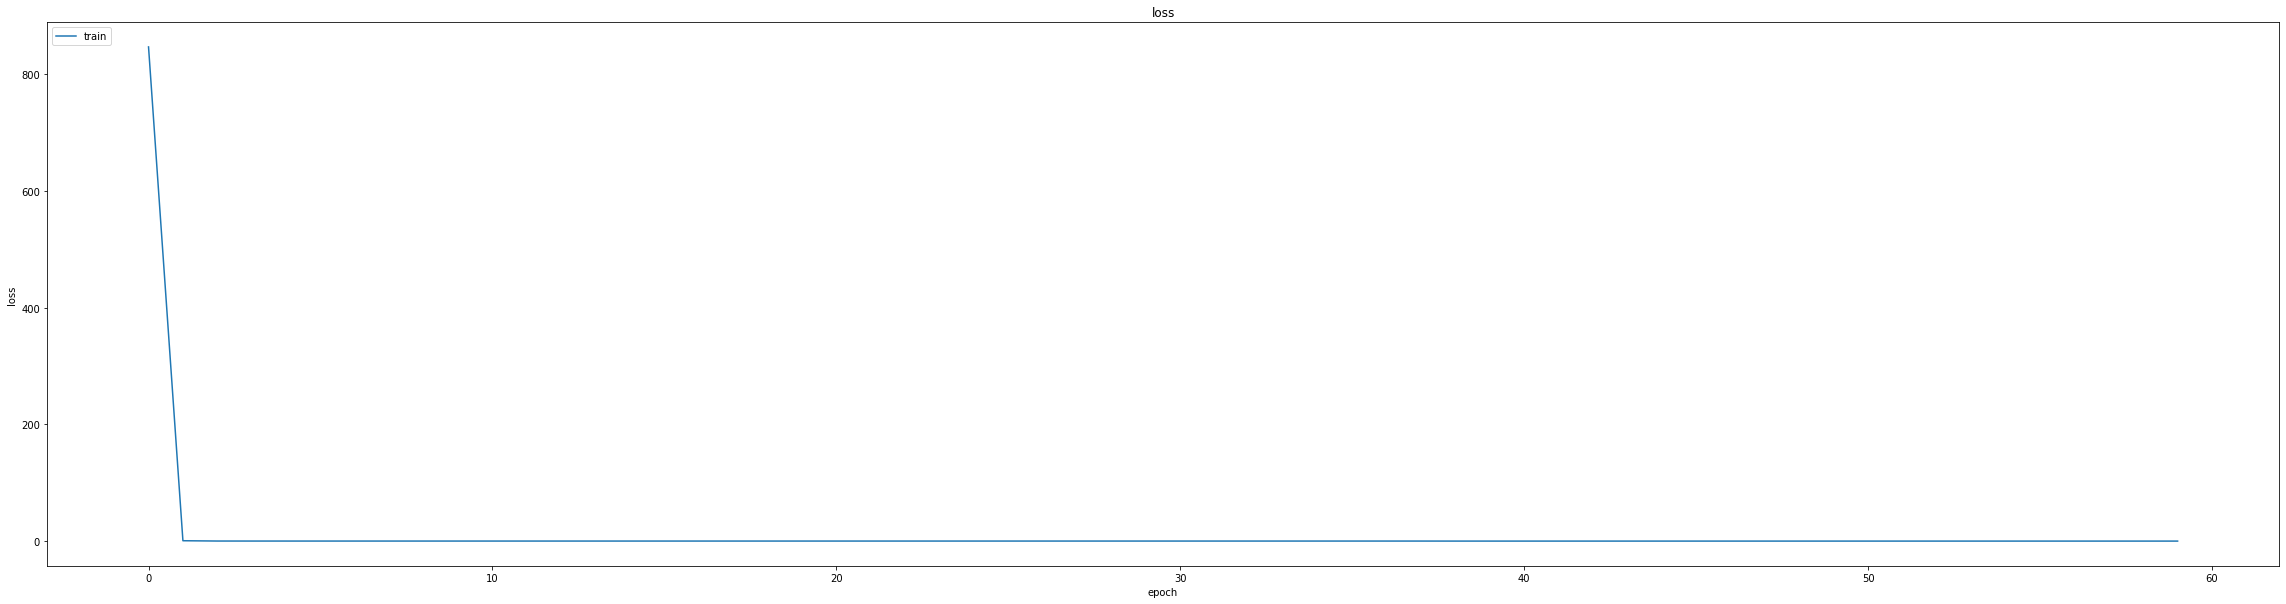

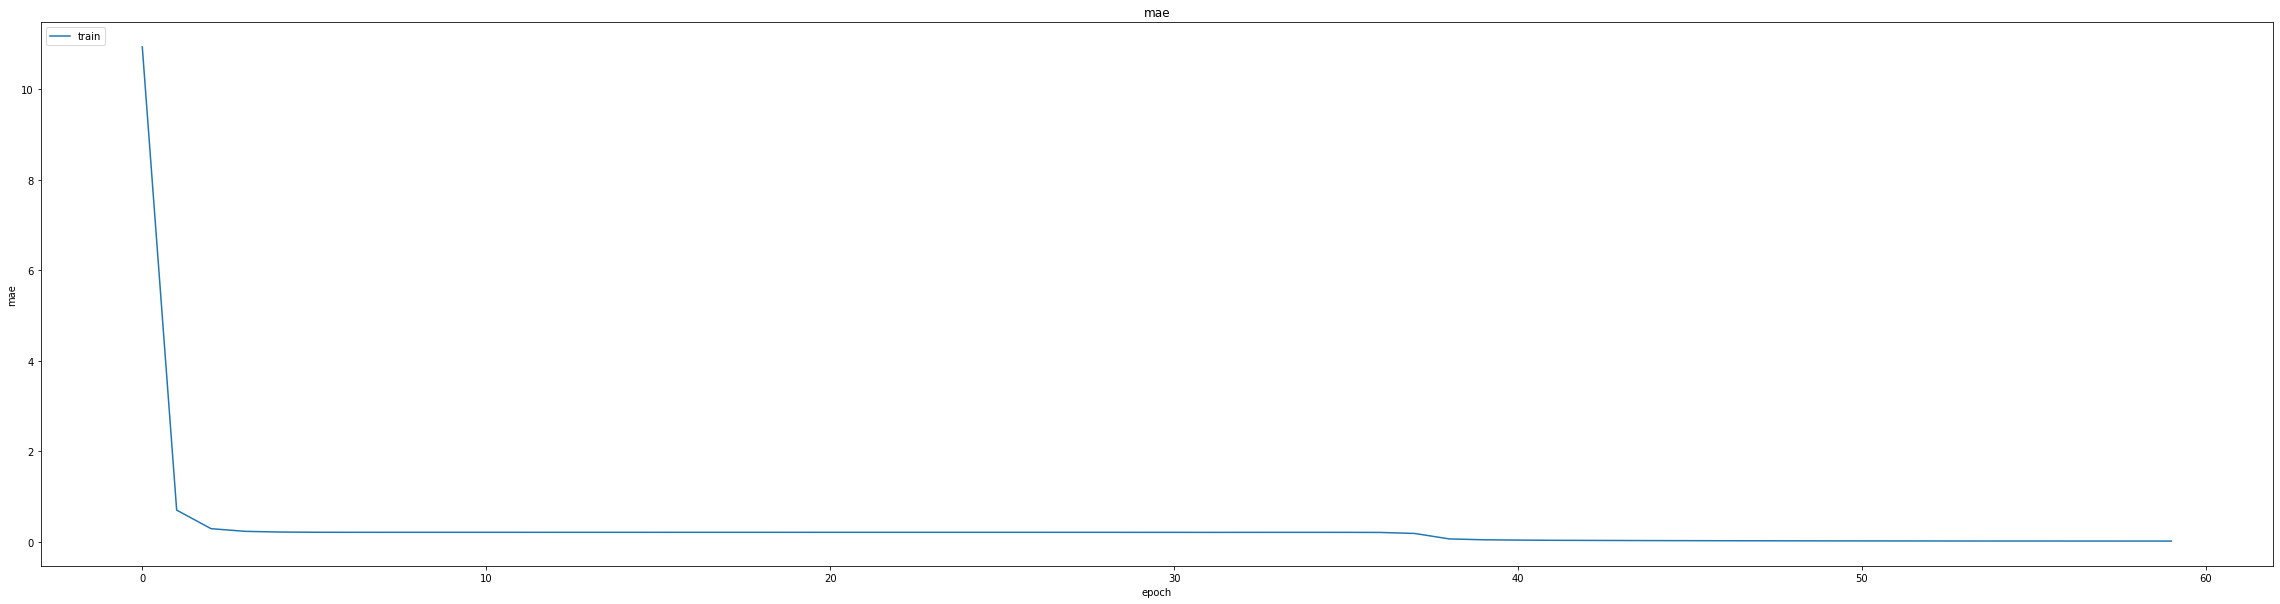

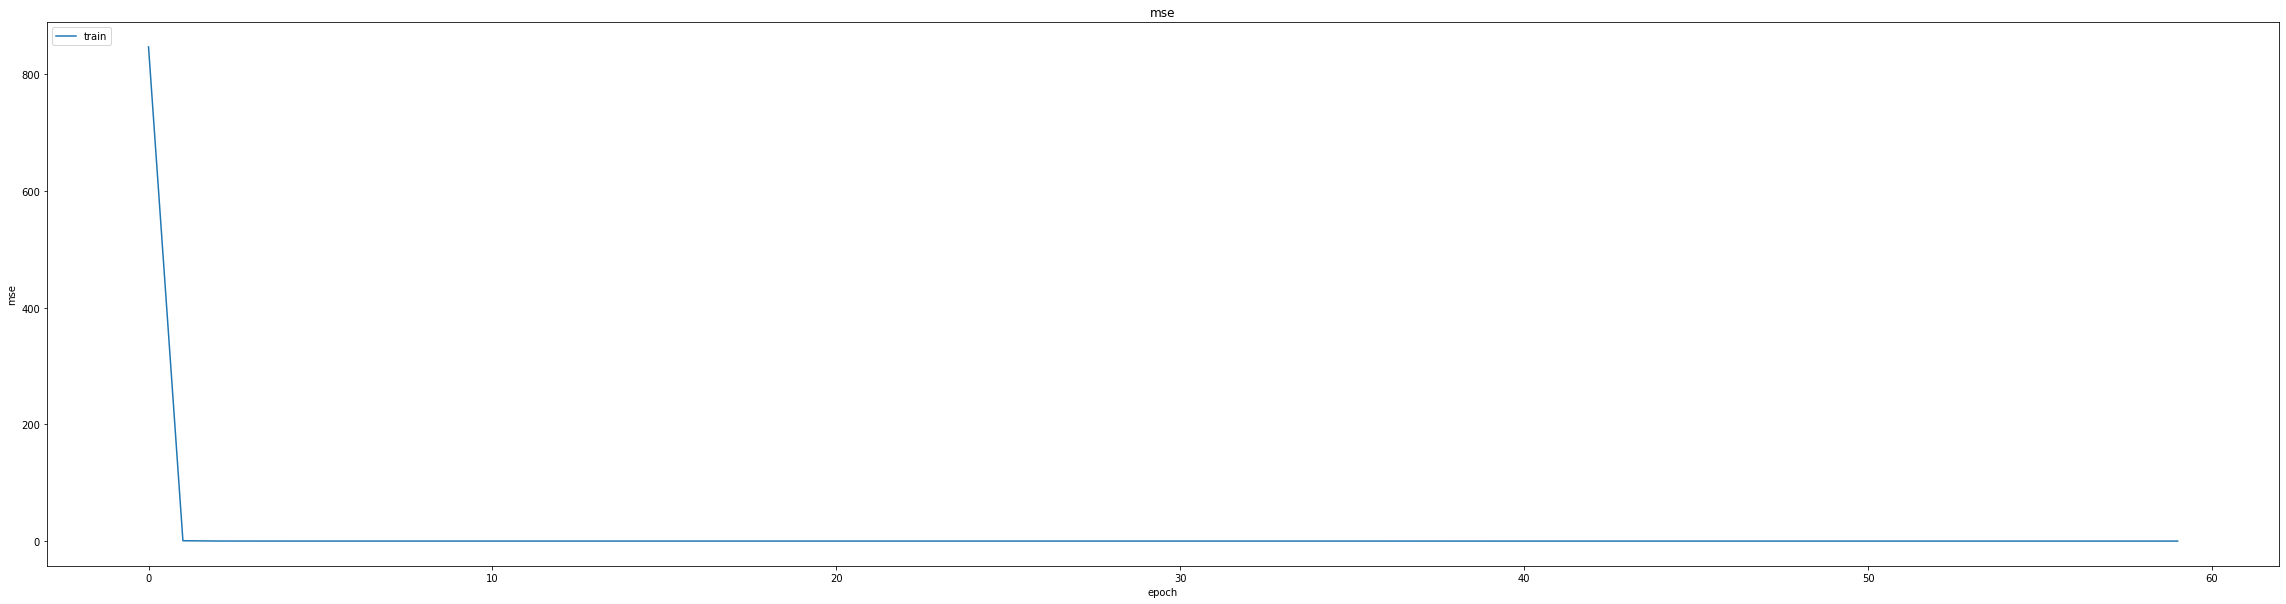

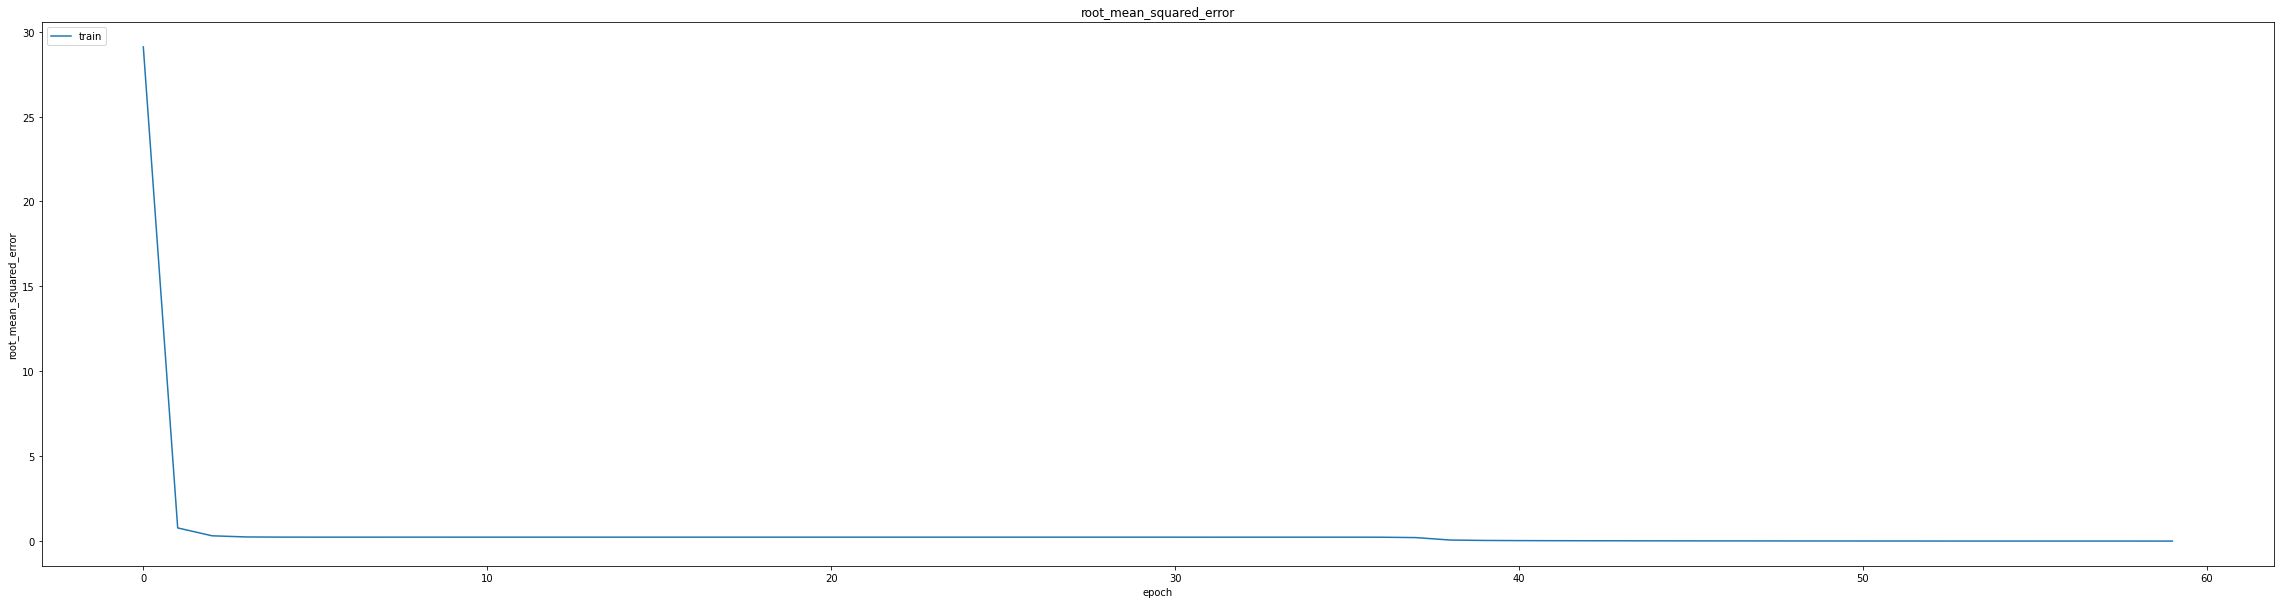

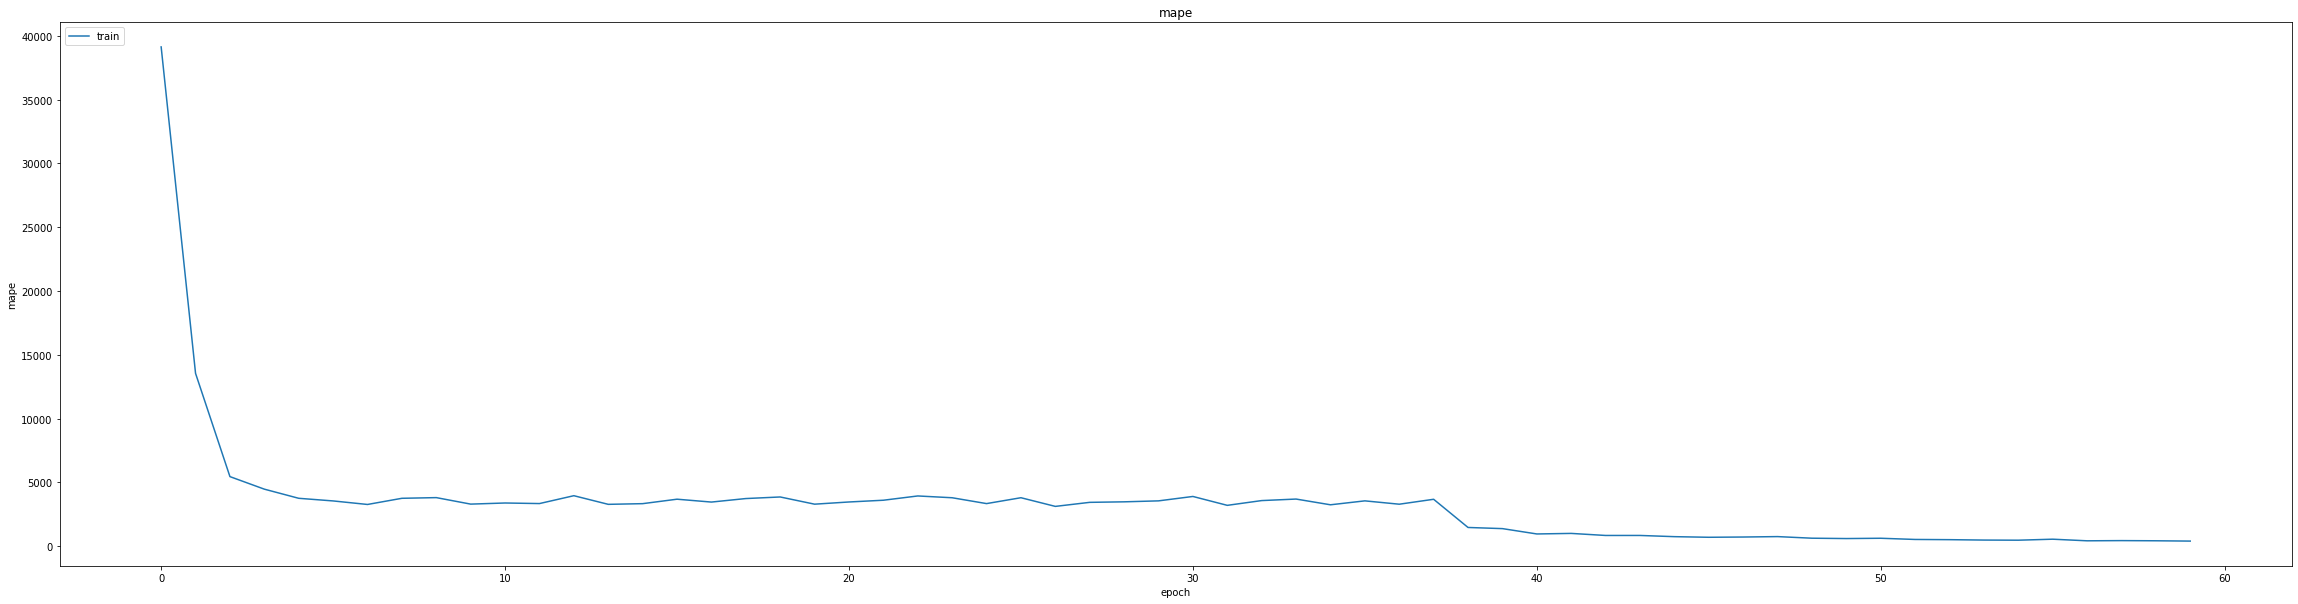

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.00929962657392025
0.013008327223360538
1390/1390 [==============================] - 8s 5ms/step
0.9965133151440322


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/CHF_USD_5min_LSTM(60-40)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/20


346/347 [============================>.] - ETA: 0s - loss: 5.4271e-04 - mae: 0.0132 - mse: 5.4271e-04 - root_mean_squared_error: 0.0233 - mape: 438.4061
Epoch 1: val_mse did not improve from 0.00017
347/347 [==============================] - 19s 22ms/step - loss: 5.4212e-04 - mae: 0.0132 - mse: 5.4212e-04 - root_mean_squared_error: 0.0233 - mape: 437.7733 - val_loss: 1.7574e-04 - val_mae: 0.0095 - val_mse: 1.7574e-04 - val_root_mean_squared_error: 0.0133 - val_mape: 1166.6586 - lr: 0.0010
Epoch 2/20
344/347 [============================>.] - ETA: 0s - loss: 1.5742e-04 - mae: 0.0094 - mse: 1.5742e-04 - root_mean_squared_error: 0.0125 - mape: 382.6198
Epoch 2: val_mse improved from 0.00017 to 0.00016, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_LSTM(60-40)


347/347 [==============================] - 16s 47ms/step - loss: 1.5721e-04 - mae: 0.0094 - mse: 1.5721e-04 - root_mean_squared_error: 0.0125 - mape: 379.8760 - val_loss: 1.5532e-04 - val_mae: 0.0089 - val_mse: 1.5532e-04 - val_root_mean_squared_error: 0.0125 - val_mape: 1085.6528 - lr: 0.0010
lr changed to 0.0009000000427477062
Epoch 3/20
345/347 [============================>.] - ETA: 0s - loss: 1.5288e-04 - mae: 0.0093 - mse: 1.5288e-04 - root_mean_squared_error: 0.0124 - mape: 367.7356
Epoch 3: val_mse did not improve from 0.00016
347/347 [==============================] - 6s 17ms/step - loss: 1.5276e-04 - mae: 0.0093 - mse: 1.5276e-04 - root_mean_squared_error: 0.0124 - mape: 366.1518 - val_loss: 1.6057e-04 - val_mae: 0.0093 - val_mse: 1.6057e-04 - val_root_mean_squared_error: 0.0127 - val_mape: 1044.9674 - lr: 9.0000e-04
Epoch 4/20
346/347 [============================>.] - ETA: 0s - loss: 1.4950e-04 - mae: 0.0092 - mse: 1.4950e-04 - root_mean_squared_error: 0.0122 - mape: 342.50

347/347 [==============================] - 17s 50ms/step - loss: 6.1311e-05 - mae: 0.0059 - mse: 6.1311e-05 - root_mean_squared_error: 0.0078 - mape: 262.9608 - val_loss: 1.5531e-04 - val_mae: 0.0107 - val_mse: 1.5531e-04 - val_root_mean_squared_error: 0.0125 - val_mape: 797.6624 - lr: 4.7830e-04
Epoch 16/20
345/347 [============================>.] - ETA: 0s - loss: 6.2370e-05 - mae: 0.0060 - mse: 6.2370e-05 - root_mean_squared_error: 0.0079 - mape: 296.0005
Epoch 16: val_mse did not improve from 0.00016
347/347 [==============================] - 6s 17ms/step - loss: 6.2270e-05 - mae: 0.0060 - mse: 6.2270e-05 - root_mean_squared_error: 0.0079 - mape: 294.7232 - val_loss: 1.9221e-04 - val_mae: 0.0118 - val_mse: 1.9221e-04 - val_root_mean_squared_error: 0.0139 - val_mape: 789.6009 - lr: 4.7830e-04
lr changed to 0.0004304672533180565
Epoch 17/20
345/347 [============================>.] - ETA: 0s - loss: 5.1053e-05 - mae: 0.0054 - mse: 5.1053e-05 - root_mean_squared_error: 0.0071 - mape: 2

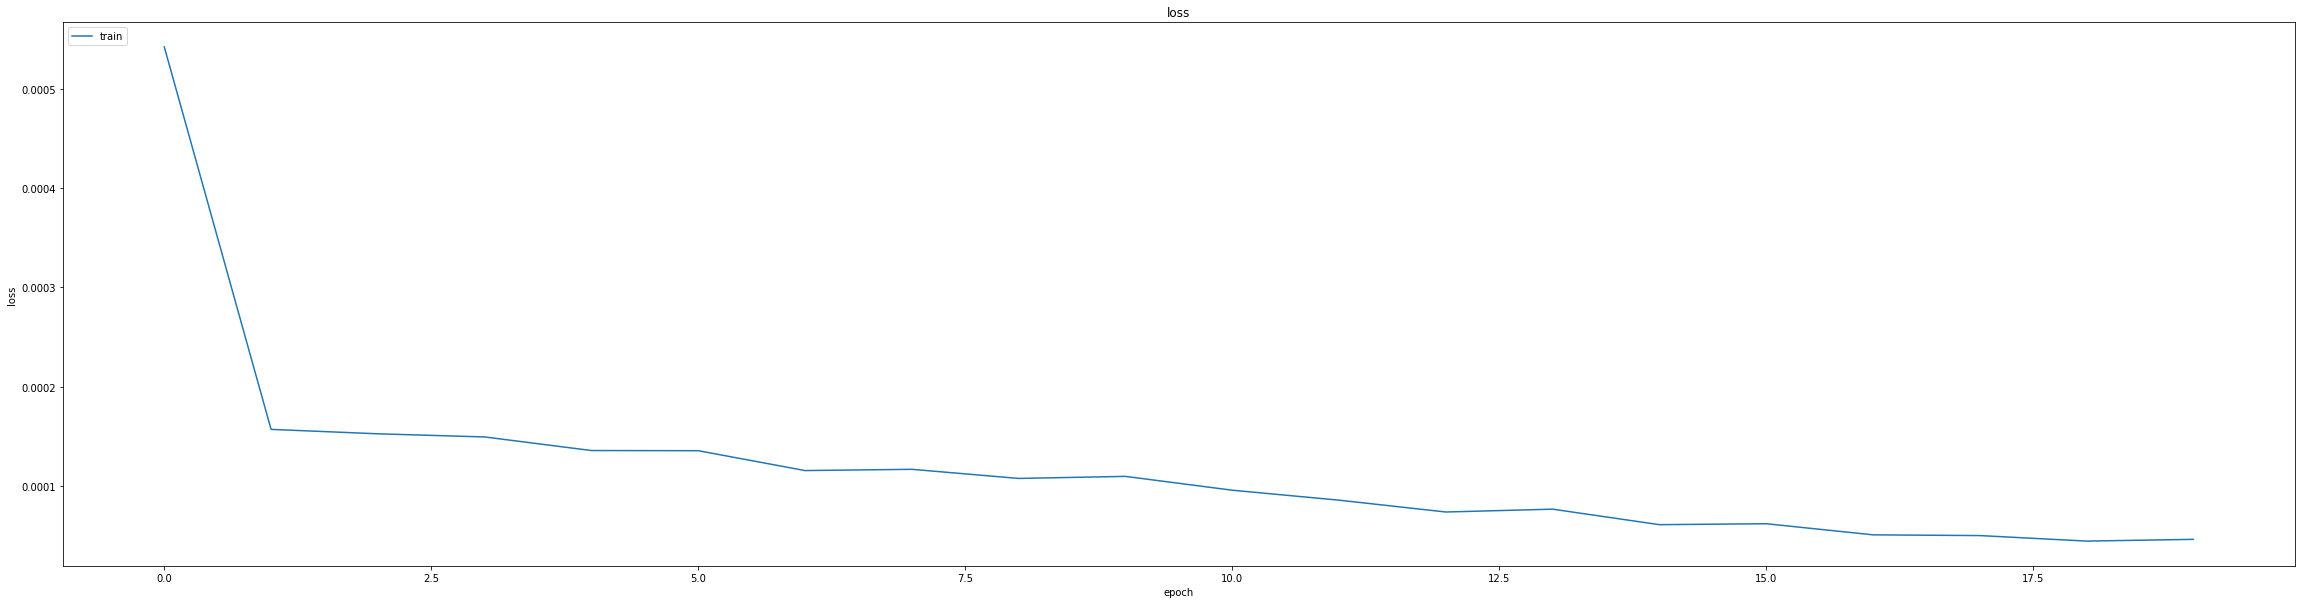

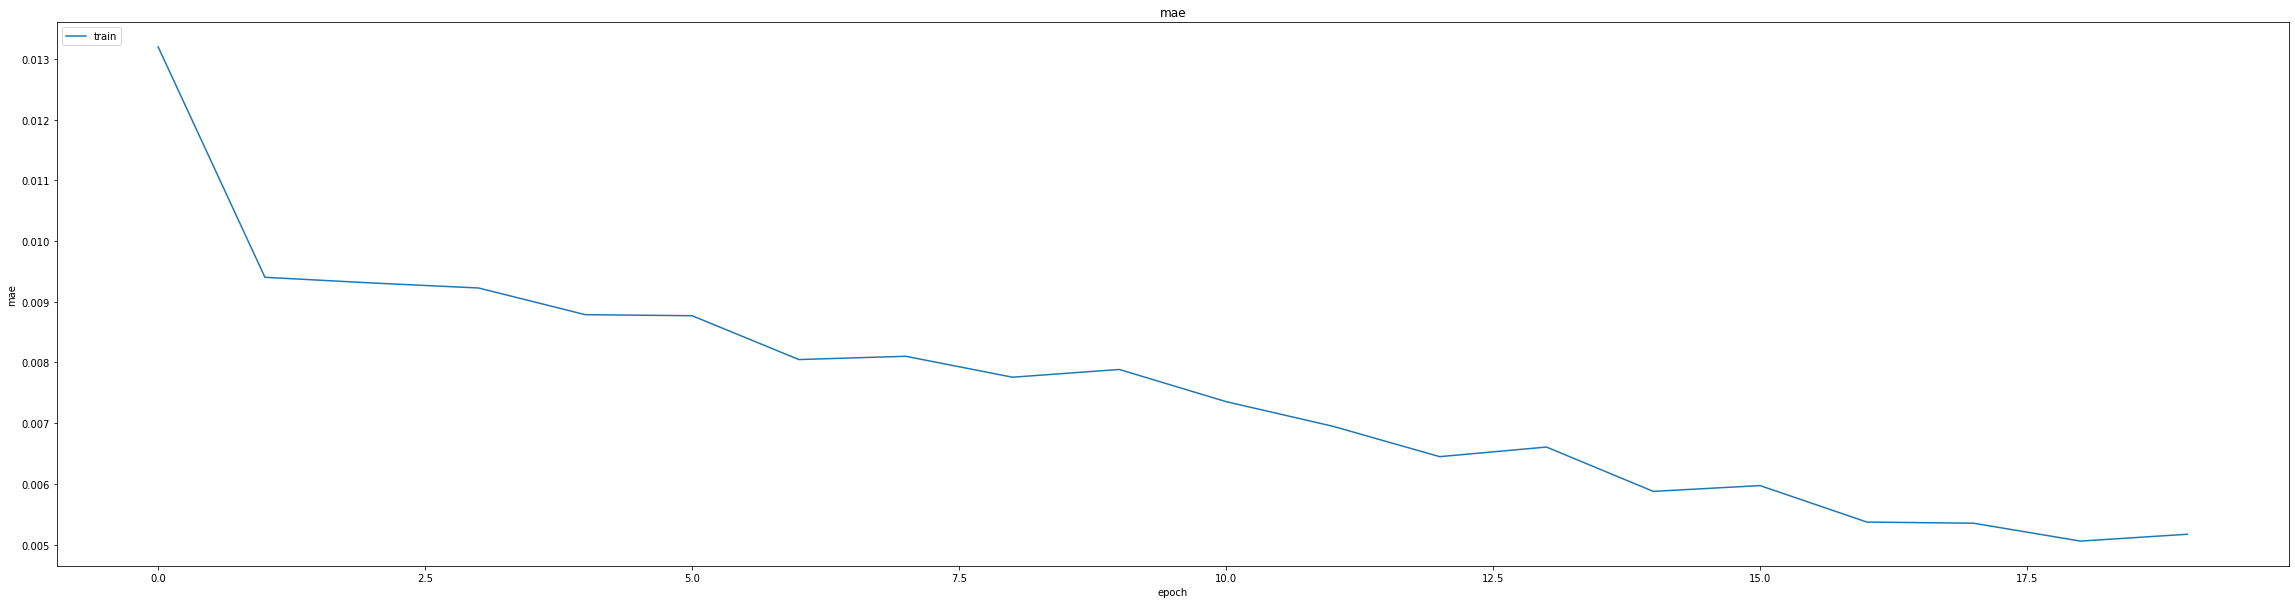

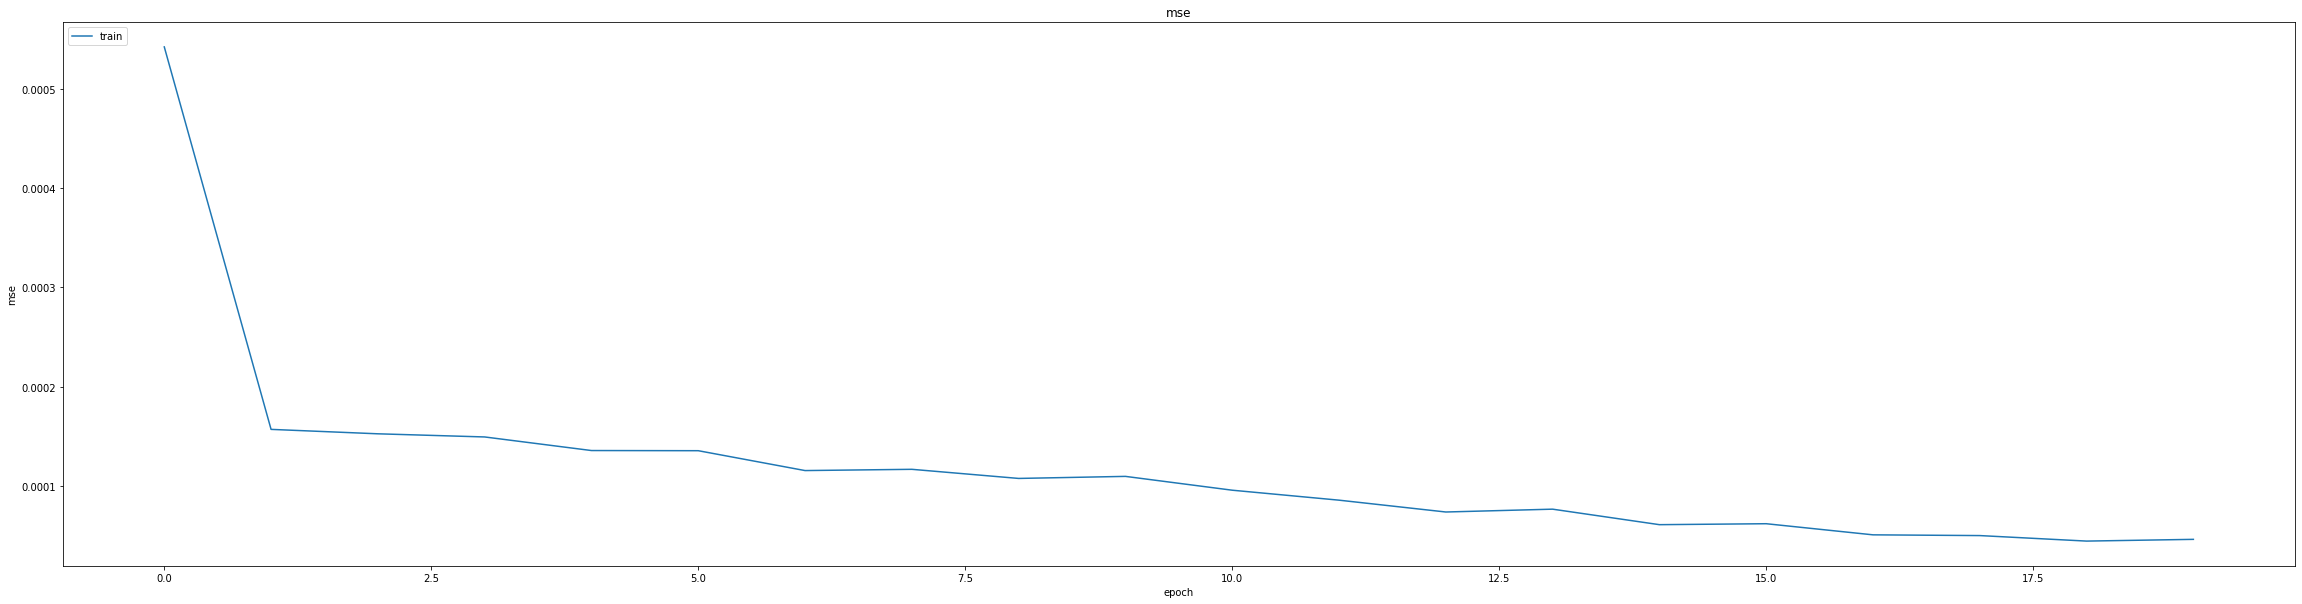

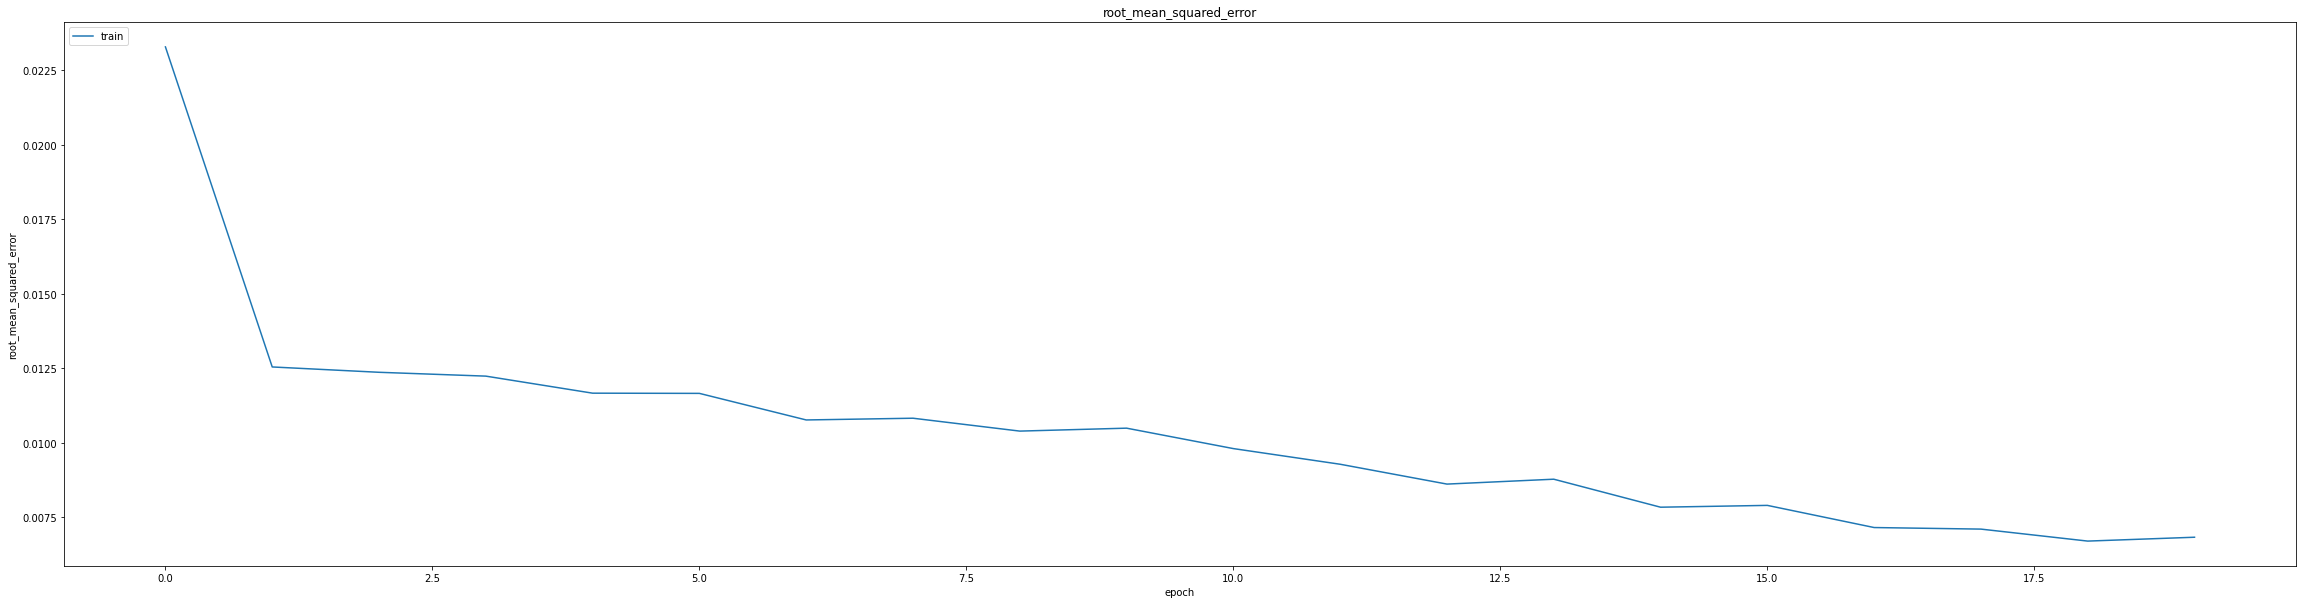

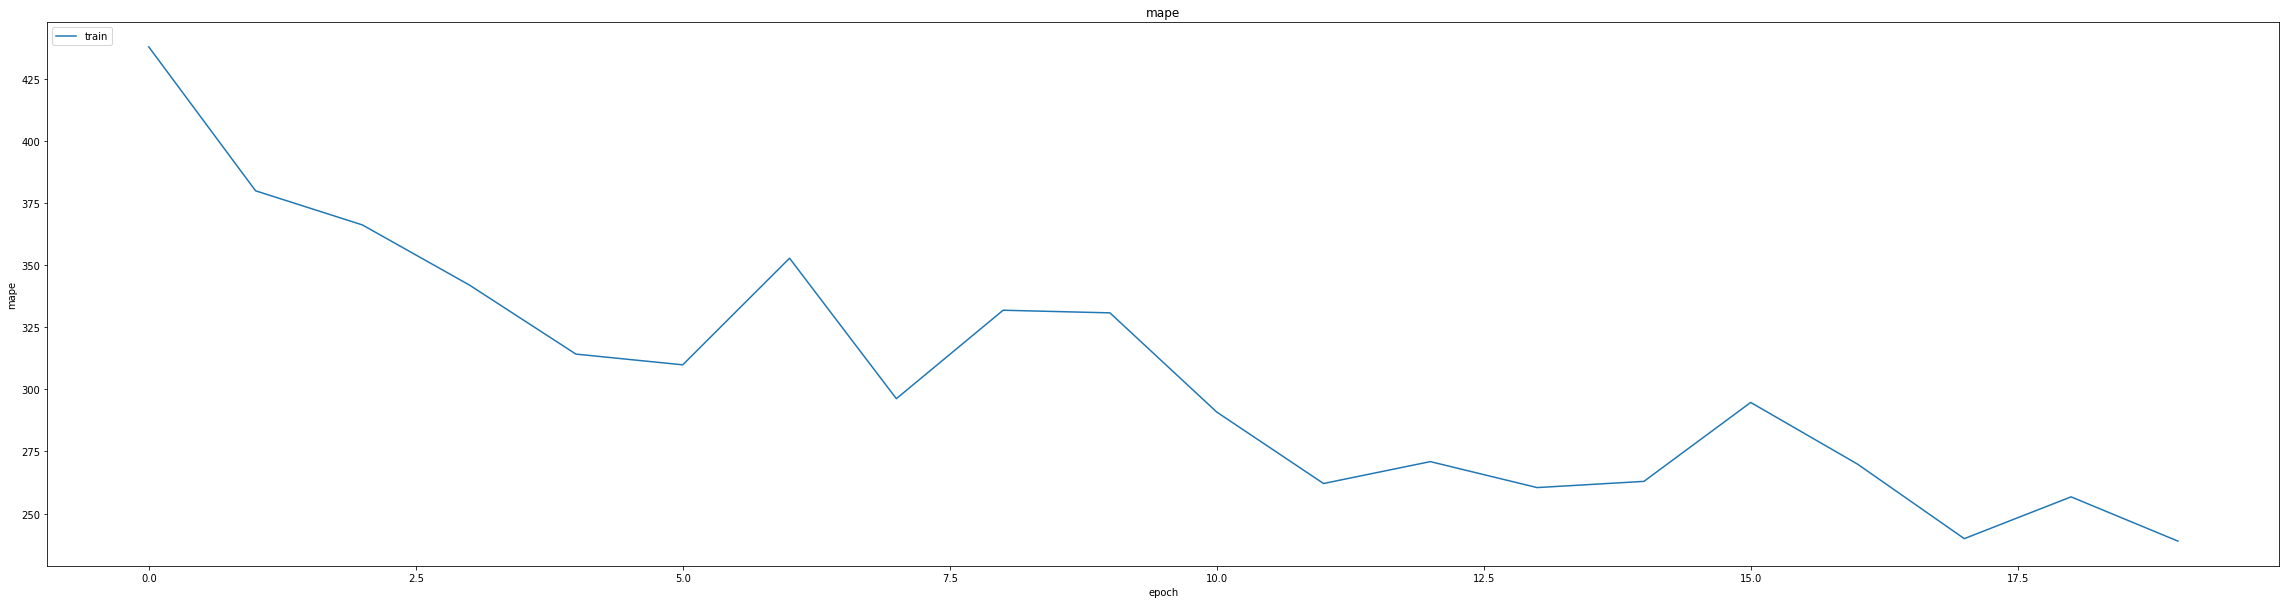

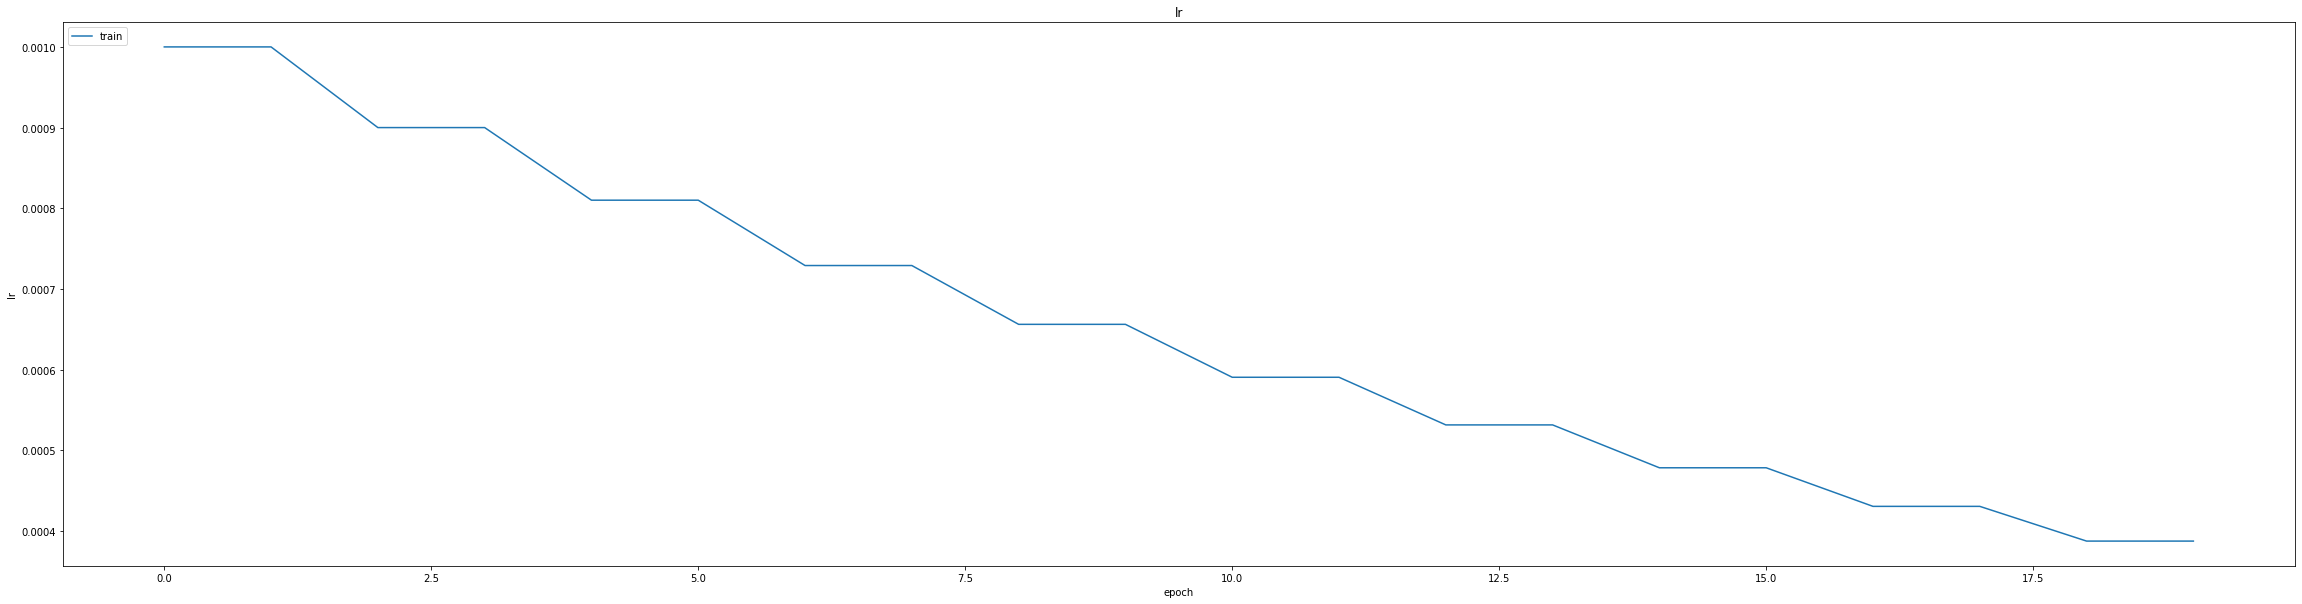

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.008893552236258984
0.012462357990443707
1390/1390 [==============================] - 7s 4ms/step
0.9966170507536722


1390/1390 [==============================] - 5s 4ms/step


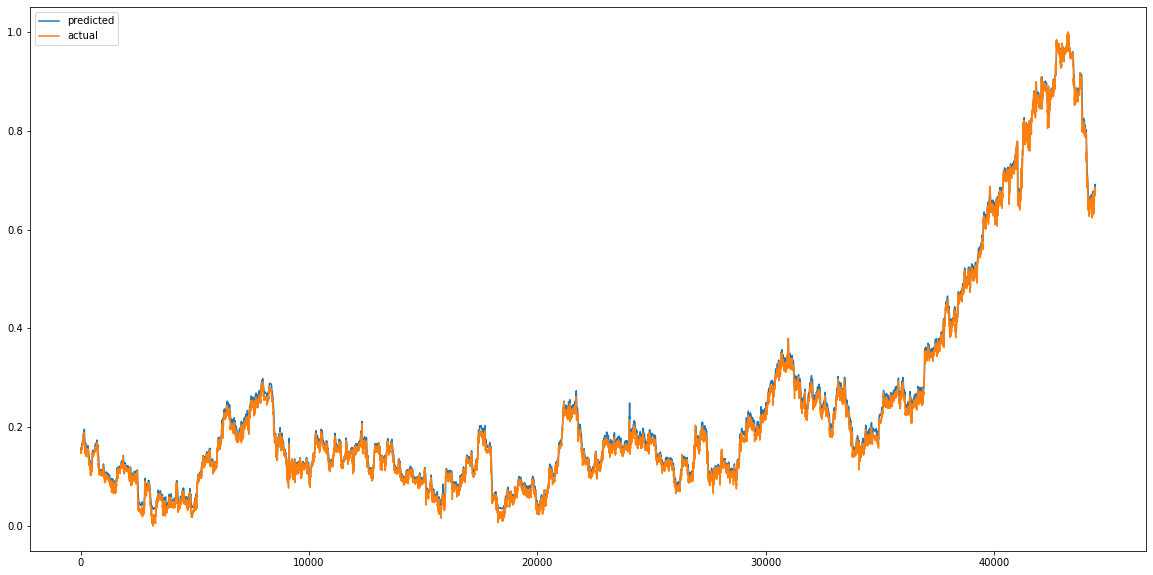

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/CHF_USD_5min_LSTM(60-40)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


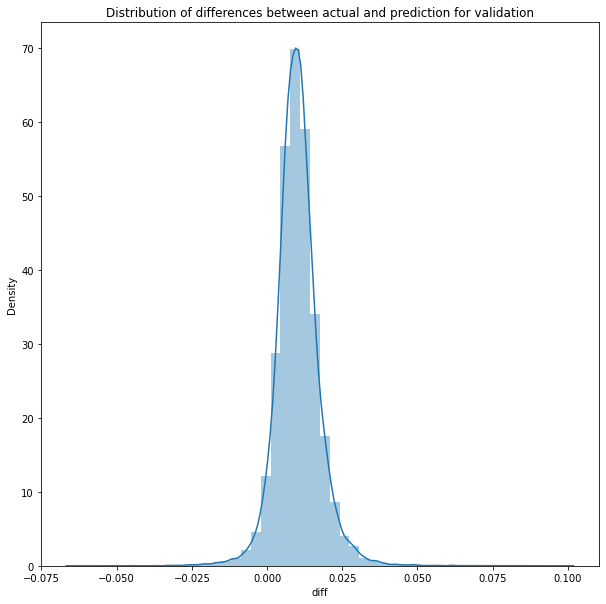

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

1390/1390 [==============================] - 5s 4ms/step


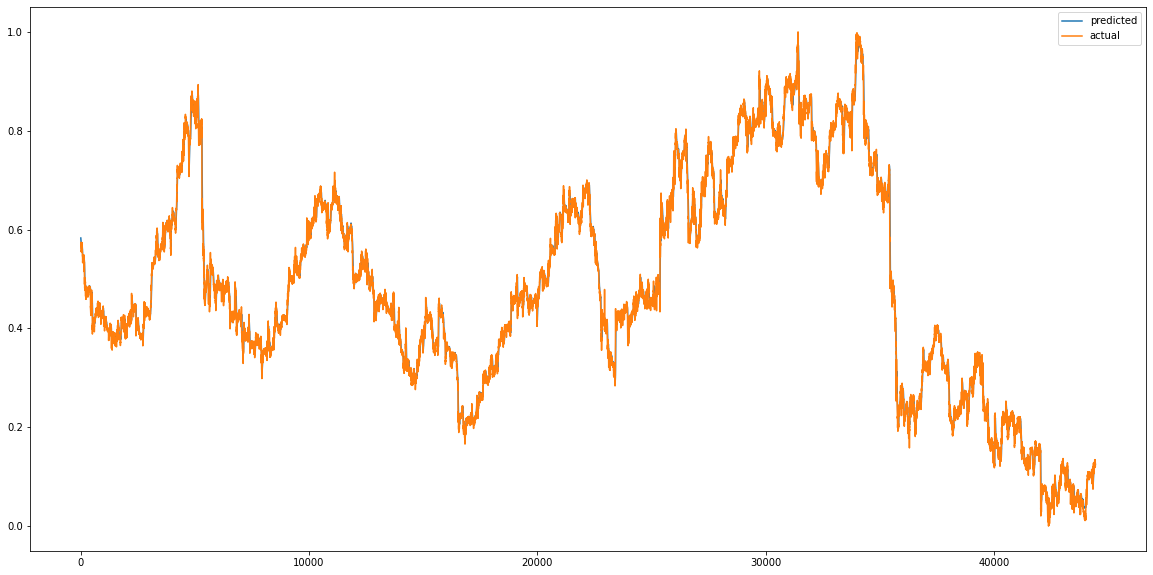

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


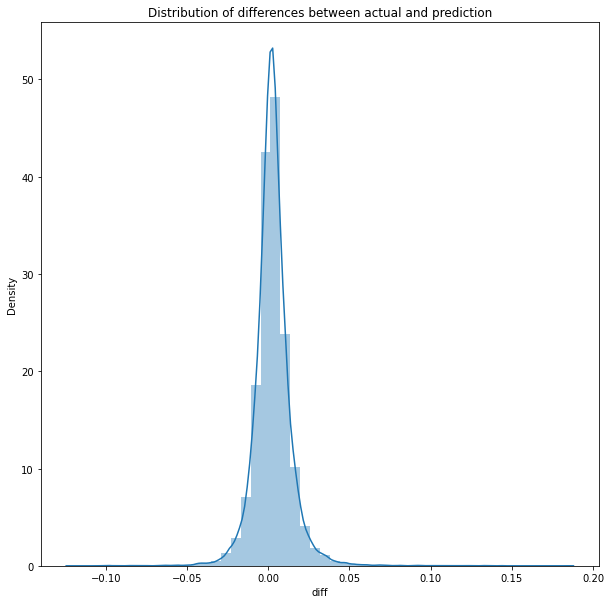

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', test_r2_score)
predictions['diff'].describe()

MSE :  0.0001421635252948635
RMSE :  0.011923234682537432
MAE :  0.00798460369745682
1390/1390 [==============================] - 5s 4ms/step
R2_Score  : 0.9970387679941317


count    44453.000000
mean         0.002597
std          0.011637
min         -0.120380
25%         -0.002924
50%          0.002236
75%          0.007656
max          0.183879
Name: diff, dtype: float64

**GRU_MODEL**



In [ ]:
model= thesis.GRU_Model(x_train)
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2 (GRU)                 (None, 24, 256)           207360    
                                                                 
 gru_3 (GRU)                 (None, 24, 64)            61824     
                                                                 
 dropout_5 (Dropout)         (None, 24, 64)            0         
                                                                 
 gru_4 (GRU)                 (None, 16)                3936      
                                                                 
 dense_15 (Dense)            (None, 32)                544       
                                                                 
 dense_16 (Dense)            (None, 16)                528       
                                                                 
 dense_17 (Dense)            (None, 1)                

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)


In [ ]:
from keras.callbacks import ModelCheckpoint


checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/CHF_USD_5min_GRU(60-40)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

In [ ]:
Epochs=60
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/60
345/347 [============================>.] - ETA: 0s - loss: 555.4622 - mae: 8.5074 - mse: 555.4623 - root_mean_squared_error: 23.5682 - mape: 23067.4395
Epoch 1: val_mse improved from inf to 2.00316, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_GRU(60-40)


347/347 [==============================] - 19s 45ms/step - loss: 553.0585 - mae: 8.4760 - mse: 553.0586 - root_mean_squared_error: 23.5172 - mape: 22969.5215 - val_loss: 2.0032 - val_mae: 1.3979 - val_mse: 2.0032 - val_root_mean_squared_error: 1.4153 - val_mape: 38058.0000
Epoch 2/60
345/347 [============================>.] - ETA: 0s - loss: 0.7344 - mae: 0.7944 - mse: 0.7344 - root_mean_squared_error: 0.8570 - mape: 11613.7881
Epoch 2: val_mse improved from 2.00316 to 0.51549, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_GRU(60-40)


347/347 [==============================] - 15s 43ms/step - loss: 0.7325 - mae: 0.7931 - mse: 0.7325 - root_mean_squared_error: 0.8559 - mape: 11564.4023 - val_loss: 0.5155 - val_mae: 0.6847 - val_mse: 0.5155 - val_root_mean_squared_error: 0.7180 - val_mape: 21369.0410
Epoch 3/60
345/347 [============================>.] - ETA: 0s - loss: 0.1990 - mae: 0.3867 - mse: 0.1990 - root_mean_squared_error: 0.4461 - mape: 5871.5342
Epoch 3: val_mse improved from 0.51549 to 0.24915, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_GRU(60-40)


347/347 [==============================] - 15s 42ms/step - loss: 0.1987 - mae: 0.3864 - mse: 0.1987 - root_mean_squared_error: 0.4458 - mape: 5846.6387 - val_loss: 0.2491 - val_mae: 0.4736 - val_mse: 0.2491 - val_root_mean_squared_error: 0.4991 - val_mape: 15874.0371
Epoch 4/60
346/347 [============================>.] - ETA: 0s - loss: 0.0991 - mae: 0.2799 - mse: 0.0991 - root_mean_squared_error: 0.3149 - mape: 4607.5669
Epoch 4: val_mse improved from 0.24915 to 0.16113, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_GRU(60-40)


347/347 [==============================] - 16s 45ms/step - loss: 0.0991 - mae: 0.2799 - mse: 0.0991 - root_mean_squared_error: 0.3148 - mape: 4601.0337 - val_loss: 0.1611 - val_mae: 0.3838 - val_mse: 0.1611 - val_root_mean_squared_error: 0.4014 - val_mape: 13253.3613
Epoch 5/60
345/347 [============================>.] - ETA: 0s - loss: 0.0716 - mae: 0.2397 - mse: 0.0716 - root_mean_squared_error: 0.2675 - mape: 4256.8809
Epoch 5: val_mse improved from 0.16113 to 0.12342, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_GRU(60-40)


347/347 [==============================] - 15s 44ms/step - loss: 0.0715 - mae: 0.2396 - mse: 0.0715 - root_mean_squared_error: 0.2675 - mape: 4238.8604 - val_loss: 0.1234 - val_mae: 0.3362 - val_mse: 0.1234 - val_root_mean_squared_error: 0.3513 - val_mape: 11809.9463
Epoch 6/60
344/347 [============================>.] - ETA: 0s - loss: 0.0629 - mae: 0.2214 - mse: 0.0629 - root_mean_squared_error: 0.2508 - mape: 4018.3103
Epoch 6: val_mse improved from 0.12342 to 0.10520, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_GRU(60-40)


347/347 [==============================] - 14s 41ms/step - loss: 0.0629 - mae: 0.2214 - mse: 0.0629 - root_mean_squared_error: 0.2508 - mape: 3989.9492 - val_loss: 0.1052 - val_mae: 0.3096 - val_mse: 0.1052 - val_root_mean_squared_error: 0.3244 - val_mape: 10979.6250
Epoch 7/60
344/347 [============================>.] - ETA: 0s - loss: 0.0602 - mae: 0.2120 - mse: 0.0602 - root_mean_squared_error: 0.2454 - mape: 3731.0769
Epoch 7: val_mse improved from 0.10520 to 0.09578, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_GRU(60-40)


347/347 [==============================] - 15s 43ms/step - loss: 0.0602 - mae: 0.2120 - mse: 0.0602 - root_mean_squared_error: 0.2454 - mape: 3704.7168 - val_loss: 0.0958 - val_mae: 0.2944 - val_mse: 0.0958 - val_root_mean_squared_error: 0.3095 - val_mape: 10497.1738
Epoch 8/60
347/347 [==============================] - ETA: 0s - loss: 0.0594 - mae: 0.2072 - mse: 0.0594 - root_mean_squared_error: 0.2438 - mape: 3607.3899
Epoch 8: val_mse improved from 0.09578 to 0.09089, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_GRU(60-40)


347/347 [==============================] - 15s 43ms/step - loss: 0.0594 - mae: 0.2072 - mse: 0.0594 - root_mean_squared_error: 0.2438 - mape: 3607.3899 - val_loss: 0.0909 - val_mae: 0.2860 - val_mse: 0.0909 - val_root_mean_squared_error: 0.3015 - val_mape: 10227.5117
Epoch 9/60
346/347 [============================>.] - ETA: 0s - loss: 0.0592 - mae: 0.2049 - mse: 0.0592 - root_mean_squared_error: 0.2433 - mape: 3447.1926
Epoch 9: val_mse improved from 0.09089 to 0.08868, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_GRU(60-40)


347/347 [==============================] - 15s 43ms/step - loss: 0.0592 - mae: 0.2049 - mse: 0.0592 - root_mean_squared_error: 0.2433 - mape: 3442.2969 - val_loss: 0.0887 - val_mae: 0.2820 - val_mse: 0.0887 - val_root_mean_squared_error: 0.2978 - val_mape: 10100.7715
Epoch 10/60
343/347 [============================>.] - ETA: 0s - loss: 0.0591 - mae: 0.2039 - mse: 0.0591 - root_mean_squared_error: 0.2431 - mape: 3580.9128
Epoch 10: val_mse improved from 0.08868 to 0.08764, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_GRU(60-40)


347/347 [==============================] - 15s 43ms/step - loss: 0.0591 - mae: 0.2039 - mse: 0.0591 - root_mean_squared_error: 0.2431 - mape: 3545.6465 - val_loss: 0.0876 - val_mae: 0.2802 - val_mse: 0.0876 - val_root_mean_squared_error: 0.2960 - val_mape: 10040.4365
Epoch 11/60
347/347 [==============================] - ETA: 0s - loss: 0.0590 - mae: 0.2035 - mse: 0.0590 - root_mean_squared_error: 0.2430 - mape: 3449.4976
Epoch 11: val_mse improved from 0.08764 to 0.08712, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_GRU(60-40)


347/347 [==============================] - 15s 43ms/step - loss: 0.0590 - mae: 0.2035 - mse: 0.0590 - root_mean_squared_error: 0.2430 - mape: 3449.4976 - val_loss: 0.0871 - val_mae: 0.2792 - val_mse: 0.0871 - val_root_mean_squared_error: 0.2952 - val_mape: 10010.5371
Epoch 12/60
343/347 [============================>.] - ETA: 0s - loss: 0.0590 - mae: 0.2032 - mse: 0.0590 - root_mean_squared_error: 0.2429 - mape: 3544.4250
Epoch 12: val_mse improved from 0.08712 to 0.08708, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_GRU(60-40)


347/347 [==============================] - 15s 43ms/step - loss: 0.0590 - mae: 0.2032 - mse: 0.0590 - root_mean_squared_error: 0.2429 - mape: 3509.6160 - val_loss: 0.0871 - val_mae: 0.2792 - val_mse: 0.0871 - val_root_mean_squared_error: 0.2951 - val_mape: 10008.1445
Epoch 13/60
344/347 [============================>.] - ETA: 0s - loss: 0.0589 - mae: 0.2031 - mse: 0.0589 - root_mean_squared_error: 0.2428 - mape: 3836.3027
Epoch 13: val_mse improved from 0.08708 to 0.08682, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_GRU(60-40)


347/347 [==============================] - 14s 41ms/step - loss: 0.0590 - mae: 0.2031 - mse: 0.0590 - root_mean_squared_error: 0.2428 - mape: 3809.2808 - val_loss: 0.0868 - val_mae: 0.2787 - val_mse: 0.0868 - val_root_mean_squared_error: 0.2947 - val_mape: 9992.6484
Epoch 14/60
346/347 [============================>.] - ETA: 0s - loss: 0.0589 - mae: 0.2029 - mse: 0.0589 - root_mean_squared_error: 0.2426 - mape: 3555.7405
Epoch 14: val_mse improved from 0.08682 to 0.08678, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_GRU(60-40)


347/347 [==============================] - 15s 43ms/step - loss: 0.0589 - mae: 0.2029 - mse: 0.0589 - root_mean_squared_error: 0.2426 - mape: 3550.6726 - val_loss: 0.0868 - val_mae: 0.2786 - val_mse: 0.0868 - val_root_mean_squared_error: 0.2946 - val_mape: 9989.5850
Epoch 15/60
346/347 [============================>.] - ETA: 0s - loss: 0.0588 - mae: 0.2029 - mse: 0.0588 - root_mean_squared_error: 0.2426 - mape: 3602.0867
Epoch 15: val_mse improved from 0.08678 to 0.08635, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_GRU(60-40)


347/347 [==============================] - 15s 43ms/step - loss: 0.0588 - mae: 0.2029 - mse: 0.0588 - root_mean_squared_error: 0.2426 - mape: 3596.9578 - val_loss: 0.0863 - val_mae: 0.2779 - val_mse: 0.0863 - val_root_mean_squared_error: 0.2939 - val_mape: 9963.9062
Epoch 16/60
343/347 [============================>.] - ETA: 0s - loss: 0.0587 - mae: 0.2027 - mse: 0.0587 - root_mean_squared_error: 0.2423 - mape: 3391.7656
Epoch 16: val_mse improved from 0.08635 to 0.08631, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_GRU(60-40)


347/347 [==============================] - 15s 43ms/step - loss: 0.0587 - mae: 0.2026 - mse: 0.0587 - root_mean_squared_error: 0.2423 - mape: 3358.3599 - val_loss: 0.0863 - val_mae: 0.2778 - val_mse: 0.0863 - val_root_mean_squared_error: 0.2938 - val_mape: 9961.5605
Epoch 17/60
345/347 [============================>.] - ETA: 0s - loss: 0.0586 - mae: 0.2023 - mse: 0.0586 - root_mean_squared_error: 0.2420 - mape: 3378.7175
Epoch 17: val_mse did not improve from 0.08631
347/347 [==============================] - 6s 17ms/step - loss: 0.0586 - mae: 0.2024 - mse: 0.0586 - root_mean_squared_error: 0.2421 - mape: 3364.4436 - val_loss: 0.0866 - val_mae: 0.2784 - val_mse: 0.0866 - val_root_mean_squared_error: 0.2943 - val_mape: 9979.4141
Epoch 18/60
346/347 [============================>.] - ETA: 0s - loss: 0.0583 - mae: 0.2020 - mse: 0.0583 - root_mean_squared_error: 0.2416 - mape: 3829.6421
Epoch 18: val_mse did not improve from 0.08631
347/347 [==============================] - 5s 14ms/step -

347/347 [==============================] - 15s 42ms/step - loss: 0.0580 - mae: 0.2017 - mse: 0.0580 - root_mean_squared_error: 0.2408 - mape: 3528.3445 - val_loss: 0.0860 - val_mae: 0.2774 - val_mse: 0.0860 - val_root_mean_squared_error: 0.2932 - val_mape: 9946.0674
Epoch 20/60
346/347 [============================>.] - ETA: 0s - loss: 0.0570 - mae: 0.2000 - mse: 0.0570 - root_mean_squared_error: 0.2387 - mape: 3456.7788
Epoch 20: val_mse improved from 0.08596 to 0.08405, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_GRU(60-40)


347/347 [==============================] - 15s 43ms/step - loss: 0.0570 - mae: 0.2000 - mse: 0.0570 - root_mean_squared_error: 0.2387 - mape: 3451.8850 - val_loss: 0.0841 - val_mae: 0.2741 - val_mse: 0.0841 - val_root_mean_squared_error: 0.2899 - val_mape: 9855.5938
Epoch 21/60
344/347 [============================>.] - ETA: 0s - loss: 0.0548 - mae: 0.1960 - mse: 0.0548 - root_mean_squared_error: 0.2341 - mape: 3389.9495
Epoch 21: val_mse improved from 0.08405 to 0.08254, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_GRU(60-40)


347/347 [==============================] - 15s 43ms/step - loss: 0.0548 - mae: 0.1960 - mse: 0.0548 - root_mean_squared_error: 0.2340 - mape: 3366.1504 - val_loss: 0.0825 - val_mae: 0.2716 - val_mse: 0.0825 - val_root_mean_squared_error: 0.2873 - val_mape: 9826.1709
Epoch 22/60
347/347 [==============================] - ETA: 0s - loss: 0.0479 - mae: 0.1823 - mse: 0.0479 - root_mean_squared_error: 0.2188 - mape: 3332.5505
Epoch 22: val_mse improved from 0.08254 to 0.07111, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_GRU(60-40)


347/347 [==============================] - 15s 43ms/step - loss: 0.0479 - mae: 0.1823 - mse: 0.0479 - root_mean_squared_error: 0.2188 - mape: 3332.5505 - val_loss: 0.0711 - val_mae: 0.2508 - val_mse: 0.0711 - val_root_mean_squared_error: 0.2667 - val_mape: 9408.4004
Epoch 23/60
344/347 [============================>.] - ETA: 0s - loss: 0.0207 - mae: 0.1092 - mse: 0.0207 - root_mean_squared_error: 0.1439 - mape: 2153.7581
Epoch 23: val_mse improved from 0.07111 to 0.01898, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_GRU(60-40)


347/347 [==============================] - 14s 41ms/step - loss: 0.0206 - mae: 0.1089 - mse: 0.0206 - root_mean_squared_error: 0.1436 - mape: 2138.4788 - val_loss: 0.0190 - val_mae: 0.1222 - val_mse: 0.0190 - val_root_mean_squared_error: 0.1378 - val_mape: 6216.1440
Epoch 24/60
345/347 [============================>.] - ETA: 0s - loss: 0.0046 - mae: 0.0483 - mse: 0.0046 - root_mean_squared_error: 0.0675 - mape: 2196.6282
Epoch 24: val_mse improved from 0.01898 to 0.00732, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_GRU(60-40)


347/347 [==============================] - 15s 43ms/step - loss: 0.0045 - mae: 0.0482 - mse: 0.0045 - root_mean_squared_error: 0.0674 - mape: 2187.1692 - val_loss: 0.0073 - val_mae: 0.0699 - val_mse: 0.0073 - val_root_mean_squared_error: 0.0856 - val_mape: 4757.7769
Epoch 25/60
343/347 [============================>.] - ETA: 0s - loss: 0.0024 - mae: 0.0350 - mse: 0.0024 - root_mean_squared_error: 0.0487 - mape: 1612.7974
Epoch 25: val_mse improved from 0.00732 to 0.00448, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_GRU(60-40)


347/347 [==============================] - 15s 43ms/step - loss: 0.0024 - mae: 0.0350 - mse: 0.0024 - root_mean_squared_error: 0.0486 - mape: 1596.6406 - val_loss: 0.0045 - val_mae: 0.0526 - val_mse: 0.0045 - val_root_mean_squared_error: 0.0669 - val_mape: 4091.3962
Epoch 26/60
344/347 [============================>.] - ETA: 0s - loss: 0.0017 - mae: 0.0297 - mse: 0.0017 - root_mean_squared_error: 0.0409 - mape: 1403.7080
Epoch 26: val_mse improved from 0.00448 to 0.00300, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_GRU(60-40)


347/347 [==============================] - 15s 43ms/step - loss: 0.0017 - mae: 0.0297 - mse: 0.0017 - root_mean_squared_error: 0.0409 - mape: 1393.6782 - val_loss: 0.0030 - val_mae: 0.0411 - val_mse: 0.0030 - val_root_mean_squared_error: 0.0548 - val_mape: 3672.2842
Epoch 27/60
346/347 [============================>.] - ETA: 0s - loss: 0.0013 - mae: 0.0261 - mse: 0.0013 - root_mean_squared_error: 0.0354 - mape: 1210.7083
Epoch 27: val_mse improved from 0.00300 to 0.00197, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_GRU(60-40)


347/347 [==============================] - 15s 43ms/step - loss: 0.0013 - mae: 0.0261 - mse: 0.0013 - root_mean_squared_error: 0.0354 - mape: 1208.9585 - val_loss: 0.0020 - val_mae: 0.0311 - val_mse: 0.0020 - val_root_mean_squared_error: 0.0444 - val_mape: 3340.7231
Epoch 28/60
344/347 [============================>.] - ETA: 0s - loss: 0.0010 - mae: 0.0235 - mse: 0.0010 - root_mean_squared_error: 0.0317 - mape: 1133.0433
Epoch 28: val_mse improved from 0.00197 to 0.00155, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_GRU(60-40)


347/347 [==============================] - 15s 44ms/step - loss: 0.0010 - mae: 0.0235 - mse: 0.0010 - root_mean_squared_error: 0.0317 - mape: 1124.9590 - val_loss: 0.0016 - val_mae: 0.0273 - val_mse: 0.0016 - val_root_mean_squared_error: 0.0394 - val_mape: 3100.8069
Epoch 29/60
343/347 [============================>.] - ETA: 0s - loss: 8.1927e-04 - mae: 0.0212 - mse: 8.1927e-04 - root_mean_squared_error: 0.0286 - mape: 1039.0809
Epoch 29: val_mse improved from 0.00155 to 0.00137, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_GRU(60-40)


347/347 [==============================] - 15s 43ms/step - loss: 8.1896e-04 - mae: 0.0212 - mse: 8.1896e-04 - root_mean_squared_error: 0.0286 - mape: 1028.7145 - val_loss: 0.0014 - val_mae: 0.0261 - val_mse: 0.0014 - val_root_mean_squared_error: 0.0370 - val_mape: 2915.8208
Epoch 30/60
343/347 [============================>.] - ETA: 0s - loss: 6.9583e-04 - mae: 0.0196 - mse: 6.9583e-04 - root_mean_squared_error: 0.0264 - mape: 961.3789
Epoch 30: val_mse improved from 0.00137 to 0.00105, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_GRU(60-40)


347/347 [==============================] - 14s 42ms/step - loss: 6.9563e-04 - mae: 0.0196 - mse: 6.9563e-04 - root_mean_squared_error: 0.0264 - mape: 951.7668 - val_loss: 0.0010 - val_mae: 0.0219 - val_mse: 0.0010 - val_root_mean_squared_error: 0.0323 - val_mape: 2757.5549
Epoch 31/60
344/347 [============================>.] - ETA: 0s - loss: 6.1332e-04 - mae: 0.0183 - mse: 6.1332e-04 - root_mean_squared_error: 0.0248 - mape: 959.5466
Epoch 31: val_mse improved from 0.00105 to 0.00095, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_GRU(60-40)


347/347 [==============================] - 16s 45ms/step - loss: 6.1302e-04 - mae: 0.0183 - mse: 6.1302e-04 - root_mean_squared_error: 0.0248 - mape: 952.6860 - val_loss: 9.5412e-04 - val_mae: 0.0215 - val_mse: 9.5412e-04 - val_root_mean_squared_error: 0.0309 - val_mape: 2625.0088
Epoch 32/60
347/347 [==============================] - ETA: 0s - loss: 5.4528e-04 - mae: 0.0173 - mse: 5.4528e-04 - root_mean_squared_error: 0.0234 - mape: 873.6306
Epoch 32: val_mse improved from 0.00095 to 0.00077, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_GRU(60-40)


347/347 [==============================] - 15s 43ms/step - loss: 5.4528e-04 - mae: 0.0173 - mse: 5.4528e-04 - root_mean_squared_error: 0.0234 - mape: 873.6306 - val_loss: 7.6618e-04 - val_mae: 0.0185 - val_mse: 7.6618e-04 - val_root_mean_squared_error: 0.0277 - val_mape: 2515.5952
Epoch 33/60
344/347 [============================>.] - ETA: 0s - loss: 4.9246e-04 - mae: 0.0165 - mse: 4.9246e-04 - root_mean_squared_error: 0.0222 - mape: 847.9255
Epoch 33: val_mse improved from 0.00077 to 0.00070, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_GRU(60-40)


347/347 [==============================] - 15s 43ms/step - loss: 4.9251e-04 - mae: 0.0165 - mse: 4.9251e-04 - root_mean_squared_error: 0.0222 - mape: 841.8448 - val_loss: 7.0047e-04 - val_mae: 0.0179 - val_mse: 7.0047e-04 - val_root_mean_squared_error: 0.0265 - val_mape: 2407.9001
Epoch 34/60
347/347 [==============================] - ETA: 0s - loss: 4.4543e-04 - mae: 0.0157 - mse: 4.4543e-04 - root_mean_squared_error: 0.0211 - mape: 792.9823
Epoch 34: val_mse improved from 0.00070 to 0.00063, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_GRU(60-40)


347/347 [==============================] - 15s 43ms/step - loss: 4.4543e-04 - mae: 0.0157 - mse: 4.4543e-04 - root_mean_squared_error: 0.0211 - mape: 792.9823 - val_loss: 6.2855e-04 - val_mae: 0.0169 - val_mse: 6.2855e-04 - val_root_mean_squared_error: 0.0251 - val_mape: 2312.0354
Epoch 35/60
347/347 [==============================] - ETA: 0s - loss: 4.0570e-04 - mae: 0.0151 - mse: 4.0570e-04 - root_mean_squared_error: 0.0201 - mape: 807.2870
Epoch 35: val_mse improved from 0.00063 to 0.00060, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_GRU(60-40)


347/347 [==============================] - 15s 43ms/step - loss: 4.0570e-04 - mae: 0.0151 - mse: 4.0570e-04 - root_mean_squared_error: 0.0201 - mape: 807.2870 - val_loss: 5.9980e-04 - val_mae: 0.0174 - val_mse: 5.9980e-04 - val_root_mean_squared_error: 0.0245 - val_mape: 2235.2971
Epoch 36/60
344/347 [============================>.] - ETA: 0s - loss: 3.7443e-04 - mae: 0.0145 - mse: 3.7443e-04 - root_mean_squared_error: 0.0194 - mape: 769.5098
Epoch 36: val_mse improved from 0.00060 to 0.00052, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_GRU(60-40)


347/347 [==============================] - 15s 43ms/step - loss: 3.7410e-04 - mae: 0.0145 - mse: 3.7410e-04 - root_mean_squared_error: 0.0193 - mape: 763.9983 - val_loss: 5.2102e-04 - val_mae: 0.0155 - val_mse: 5.2102e-04 - val_root_mean_squared_error: 0.0228 - val_mape: 2147.6960
Epoch 37/60
344/347 [============================>.] - ETA: 0s - loss: 3.4462e-04 - mae: 0.0139 - mse: 3.4462e-04 - root_mean_squared_error: 0.0186 - mape: 741.3672
Epoch 37: val_mse improved from 0.00052 to 0.00045, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_GRU(60-40)


347/347 [==============================] - 14s 41ms/step - loss: 3.4469e-04 - mae: 0.0139 - mse: 3.4469e-04 - root_mean_squared_error: 0.0186 - mape: 736.0601 - val_loss: 4.5034e-04 - val_mae: 0.0143 - val_mse: 4.5034e-04 - val_root_mean_squared_error: 0.0212 - val_mape: 2079.2727
Epoch 38/60
347/347 [==============================] - ETA: 0s - loss: 3.2144e-04 - mae: 0.0135 - mse: 3.2144e-04 - root_mean_squared_error: 0.0179 - mape: 727.0916
Epoch 38: val_mse improved from 0.00045 to 0.00042, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_GRU(60-40)


347/347 [==============================] - 15s 44ms/step - loss: 3.2144e-04 - mae: 0.0135 - mse: 3.2144e-04 - root_mean_squared_error: 0.0179 - mape: 727.0916 - val_loss: 4.1909e-04 - val_mae: 0.0138 - val_mse: 4.1909e-04 - val_root_mean_squared_error: 0.0205 - val_mape: 2007.5173
Epoch 39/60
346/347 [============================>.] - ETA: 0s - loss: 2.9833e-04 - mae: 0.0130 - mse: 2.9833e-04 - root_mean_squared_error: 0.0173 - mape: 709.7961
Epoch 39: val_mse improved from 0.00042 to 0.00041, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_GRU(60-40)


347/347 [==============================] - 15s 43ms/step - loss: 2.9836e-04 - mae: 0.0130 - mse: 2.9836e-04 - root_mean_squared_error: 0.0173 - mape: 708.7706 - val_loss: 4.0901e-04 - val_mae: 0.0144 - val_mse: 4.0901e-04 - val_root_mean_squared_error: 0.0202 - val_mape: 1965.4648
Epoch 40/60
346/347 [============================>.] - ETA: 0s - loss: 2.7576e-04 - mae: 0.0125 - mse: 2.7576e-04 - root_mean_squared_error: 0.0166 - mape: 671.0984
Epoch 40: val_mse improved from 0.00041 to 0.00038, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_GRU(60-40)


347/347 [==============================] - 15s 43ms/step - loss: 2.7570e-04 - mae: 0.0125 - mse: 2.7570e-04 - root_mean_squared_error: 0.0166 - mape: 670.1287 - val_loss: 3.7778e-04 - val_mae: 0.0138 - val_mse: 3.7778e-04 - val_root_mean_squared_error: 0.0194 - val_mape: 1894.1018
Epoch 41/60
345/347 [============================>.] - ETA: 0s - loss: 2.6498e-04 - mae: 0.0122 - mse: 2.6498e-04 - root_mean_squared_error: 0.0163 - mape: 658.0606
Epoch 41: val_mse improved from 0.00038 to 0.00034, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_GRU(60-40)


347/347 [==============================] - 15s 43ms/step - loss: 2.6497e-04 - mae: 0.0122 - mse: 2.6497e-04 - root_mean_squared_error: 0.0163 - mape: 655.2392 - val_loss: 3.4418e-04 - val_mae: 0.0130 - val_mse: 3.4418e-04 - val_root_mean_squared_error: 0.0186 - val_mape: 1835.7174
Epoch 42/60
346/347 [============================>.] - ETA: 0s - loss: 2.4618e-04 - mae: 0.0118 - mse: 2.4618e-04 - root_mean_squared_error: 0.0157 - mape: 606.2717
Epoch 42: val_mse improved from 0.00034 to 0.00033, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_GRU(60-40)


347/347 [==============================] - 15s 43ms/step - loss: 2.4618e-04 - mae: 0.0118 - mse: 2.4618e-04 - root_mean_squared_error: 0.0157 - mape: 605.3984 - val_loss: 3.3161e-04 - val_mae: 0.0128 - val_mse: 3.3161e-04 - val_root_mean_squared_error: 0.0182 - val_mape: 1775.6760
Epoch 43/60
346/347 [============================>.] - ETA: 0s - loss: 2.3253e-04 - mae: 0.0115 - mse: 2.3253e-04 - root_mean_squared_error: 0.0152 - mape: 605.2789
Epoch 43: val_mse improved from 0.00033 to 0.00030, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_GRU(60-40)


347/347 [==============================] - 15s 44ms/step - loss: 2.3254e-04 - mae: 0.0115 - mse: 2.3254e-04 - root_mean_squared_error: 0.0152 - mape: 604.4061 - val_loss: 3.0322e-04 - val_mae: 0.0124 - val_mse: 3.0322e-04 - val_root_mean_squared_error: 0.0174 - val_mape: 1743.7006
Epoch 44/60
344/347 [============================>.] - ETA: 0s - loss: 2.2849e-04 - mae: 0.0114 - mse: 2.2849e-04 - root_mean_squared_error: 0.0151 - mape: 587.2458
Epoch 44: val_mse did not improve from 0.00030
347/347 [==============================] - 5s 15ms/step - loss: 2.2840e-04 - mae: 0.0114 - mse: 2.2840e-04 - root_mean_squared_error: 0.0151 - mape: 583.0472 - val_loss: 3.0683e-04 - val_mae: 0.0129 - val_mse: 3.0683e-04 - val_root_mean_squared_error: 0.0175 - val_mape: 1698.2000
Epoch 45/60
345/347 [============================>.] - ETA: 0s - loss: 2.1971e-04 - mae: 0.0112 - mse: 2.1971e-04 - root_mean_squared_error: 0.0148 - mape: 589.6454
Epoch 45: val_mse improved from 0.00030 to 0.00030, saving m

347/347 [==============================] - 15s 43ms/step - loss: 2.1965e-04 - mae: 0.0112 - mse: 2.1965e-04 - root_mean_squared_error: 0.0148 - mape: 587.1035 - val_loss: 2.9538e-04 - val_mae: 0.0122 - val_mse: 2.9538e-04 - val_root_mean_squared_error: 0.0172 - val_mape: 1655.7864
Epoch 46/60
346/347 [============================>.] - ETA: 0s - loss: 2.0340e-04 - mae: 0.0107 - mse: 2.0340e-04 - root_mean_squared_error: 0.0143 - mape: 581.5816
Epoch 46: val_mse did not improve from 0.00030
347/347 [==============================] - 5s 15ms/step - loss: 2.0340e-04 - mae: 0.0107 - mse: 2.0340e-04 - root_mean_squared_error: 0.0143 - mape: 580.7407 - val_loss: 3.1117e-04 - val_mae: 0.0134 - val_mse: 3.1117e-04 - val_root_mean_squared_error: 0.0176 - val_mape: 1630.5397
Epoch 47/60
346/347 [============================>.] - ETA: 0s - loss: 2.0088e-04 - mae: 0.0107 - mse: 2.0088e-04 - root_mean_squared_error: 0.0142 - mape: 616.8006
Epoch 47: val_mse improved from 0.00030 to 0.00029, saving m

347/347 [==============================] - 15s 42ms/step - loss: 2.0083e-04 - mae: 0.0107 - mse: 2.0083e-04 - root_mean_squared_error: 0.0142 - mape: 615.9086 - val_loss: 2.9155e-04 - val_mae: 0.0130 - val_mse: 2.9155e-04 - val_root_mean_squared_error: 0.0171 - val_mape: 1579.5945
Epoch 48/60
345/347 [============================>.] - ETA: 0s - loss: 1.9372e-04 - mae: 0.0105 - mse: 1.9372e-04 - root_mean_squared_error: 0.0139 - mape: 558.3380
Epoch 48: val_mse improved from 0.00029 to 0.00027, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_GRU(60-40)


347/347 [==============================] - 15s 42ms/step - loss: 1.9360e-04 - mae: 0.0105 - mse: 1.9360e-04 - root_mean_squared_error: 0.0139 - mape: 555.9327 - val_loss: 2.6857e-04 - val_mae: 0.0122 - val_mse: 2.6857e-04 - val_root_mean_squared_error: 0.0164 - val_mape: 1541.9348
Epoch 49/60
346/347 [============================>.] - ETA: 0s - loss: 1.8990e-04 - mae: 0.0104 - mse: 1.8990e-04 - root_mean_squared_error: 0.0138 - mape: 511.4591
Epoch 49: val_mse did not improve from 0.00027
347/347 [==============================] - 5s 15ms/step - loss: 1.8982e-04 - mae: 0.0104 - mse: 1.8982e-04 - root_mean_squared_error: 0.0138 - mape: 510.7195 - val_loss: 3.3065e-04 - val_mae: 0.0146 - val_mse: 3.3065e-04 - val_root_mean_squared_error: 0.0182 - val_mape: 1523.7308
Epoch 50/60
343/347 [============================>.] - ETA: 0s - loss: 1.8485e-04 - mae: 0.0102 - mse: 1.8485e-04 - root_mean_squared_error: 0.0136 - mape: 522.9315
Epoch 50: val_mse improved from 0.00027 to 0.00024, saving m

347/347 [==============================] - 15s 42ms/step - loss: 1.8505e-04 - mae: 0.0103 - mse: 1.8505e-04 - root_mean_squared_error: 0.0136 - mape: 517.6795 - val_loss: 2.3873e-04 - val_mae: 0.0114 - val_mse: 2.3873e-04 - val_root_mean_squared_error: 0.0155 - val_mape: 1476.9283
Epoch 51/60
346/347 [============================>.] - ETA: 0s - loss: 1.7606e-04 - mae: 0.0100 - mse: 1.7606e-04 - root_mean_squared_error: 0.0133 - mape: 513.3146
Epoch 51: val_mse improved from 0.00024 to 0.00022, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_GRU(60-40)


347/347 [==============================] - 15s 43ms/step - loss: 1.7614e-04 - mae: 0.0100 - mse: 1.7614e-04 - root_mean_squared_error: 0.0133 - mape: 512.5767 - val_loss: 2.2025e-04 - val_mae: 0.0105 - val_mse: 2.2025e-04 - val_root_mean_squared_error: 0.0148 - val_mape: 1444.1030
Epoch 52/60
343/347 [============================>.] - ETA: 0s - loss: 1.7497e-04 - mae: 0.0100 - mse: 1.7497e-04 - root_mean_squared_error: 0.0132 - mape: 492.9973
Epoch 52: val_mse did not improve from 0.00022
347/347 [==============================] - 5s 15ms/step - loss: 1.7488e-04 - mae: 0.0100 - mse: 1.7488e-04 - root_mean_squared_error: 0.0132 - mape: 488.0629 - val_loss: 2.5858e-04 - val_mae: 0.0116 - val_mse: 2.5858e-04 - val_root_mean_squared_error: 0.0161 - val_mape: 1412.3091
Epoch 53/60
346/347 [============================>.] - ETA: 0s - loss: 1.6531e-04 - mae: 0.0097 - mse: 1.6531e-04 - root_mean_squared_error: 0.0129 - mape: 478.8372
Epoch 53: val_mse did not improve from 0.00022
347/347 [====

347/347 [==============================] - 15s 42ms/step - loss: 1.6457e-04 - mae: 0.0097 - mse: 1.6457e-04 - root_mean_squared_error: 0.0128 - mape: 474.1843 - val_loss: 2.1936e-04 - val_mae: 0.0109 - val_mse: 2.1936e-04 - val_root_mean_squared_error: 0.0148 - val_mape: 1346.8662
Epoch 55/60
346/347 [============================>.] - ETA: 0s - loss: 1.6431e-04 - mae: 0.0097 - mse: 1.6431e-04 - root_mean_squared_error: 0.0128 - mape: 449.4255
Epoch 55: val_mse improved from 0.00022 to 0.00021, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_GRU(60-40)


347/347 [==============================] - 14s 41ms/step - loss: 1.6434e-04 - mae: 0.0097 - mse: 1.6434e-04 - root_mean_squared_error: 0.0128 - mape: 448.7777 - val_loss: 2.0514e-04 - val_mae: 0.0105 - val_mse: 2.0514e-04 - val_root_mean_squared_error: 0.0143 - val_mape: 1332.3259
Epoch 56/60
344/347 [============================>.] - ETA: 0s - loss: 1.6678e-04 - mae: 0.0097 - mse: 1.6678e-04 - root_mean_squared_error: 0.0129 - mape: 462.1029
Epoch 56: val_mse did not improve from 0.00021
347/347 [==============================] - 5s 15ms/step - loss: 1.6673e-04 - mae: 0.0097 - mse: 1.6673e-04 - root_mean_squared_error: 0.0129 - mape: 458.7997 - val_loss: 2.0995e-04 - val_mae: 0.0109 - val_mse: 2.0995e-04 - val_root_mean_squared_error: 0.0145 - val_mape: 1313.3721
Epoch 57/60
346/347 [============================>.] - ETA: 0s - loss: 1.5409e-04 - mae: 0.0093 - mse: 1.5409e-04 - root_mean_squared_error: 0.0124 - mape: 446.3231
Epoch 57: val_mse did not improve from 0.00021
347/347 [====

347/347 [==============================] - 15s 43ms/step - loss: 1.4839e-04 - mae: 0.0092 - mse: 1.4839e-04 - root_mean_squared_error: 0.0122 - mape: 430.3743 - val_loss: 2.0352e-04 - val_mae: 0.0108 - val_mse: 2.0352e-04 - val_root_mean_squared_error: 0.0143 - val_mape: 1256.2384
Epoch 59/60
345/347 [============================>.] - ETA: 0s - loss: 1.5889e-04 - mae: 0.0095 - mse: 1.5889e-04 - root_mean_squared_error: 0.0126 - mape: 422.2842
Epoch 59: val_mse did not improve from 0.00020
347/347 [==============================] - 5s 15ms/step - loss: 1.5878e-04 - mae: 0.0095 - mse: 1.5878e-04 - root_mean_squared_error: 0.0126 - mape: 420.4739 - val_loss: 2.1453e-04 - val_mae: 0.0113 - val_mse: 2.1453e-04 - val_root_mean_squared_error: 0.0146 - val_mape: 1241.1660
Epoch 60/60
343/347 [============================>.] - ETA: 0s - loss: 1.5815e-04 - mae: 0.0095 - mse: 1.5815e-04 - root_mean_squared_error: 0.0126 - mape: 408.9060
Epoch 60: val_mse did not improve from 0.00020
347/347 [====

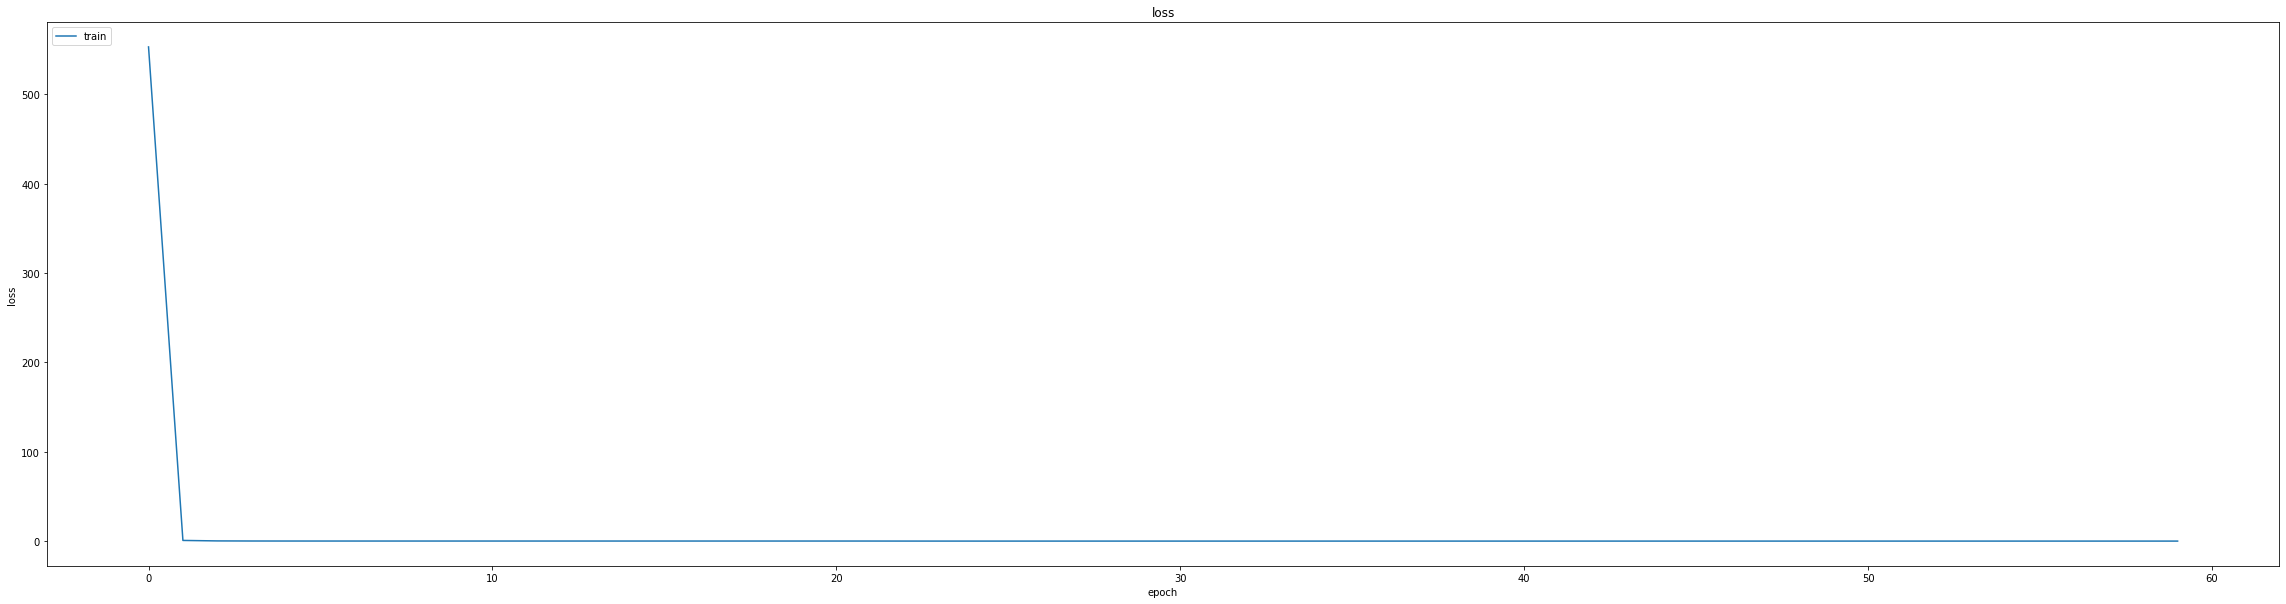

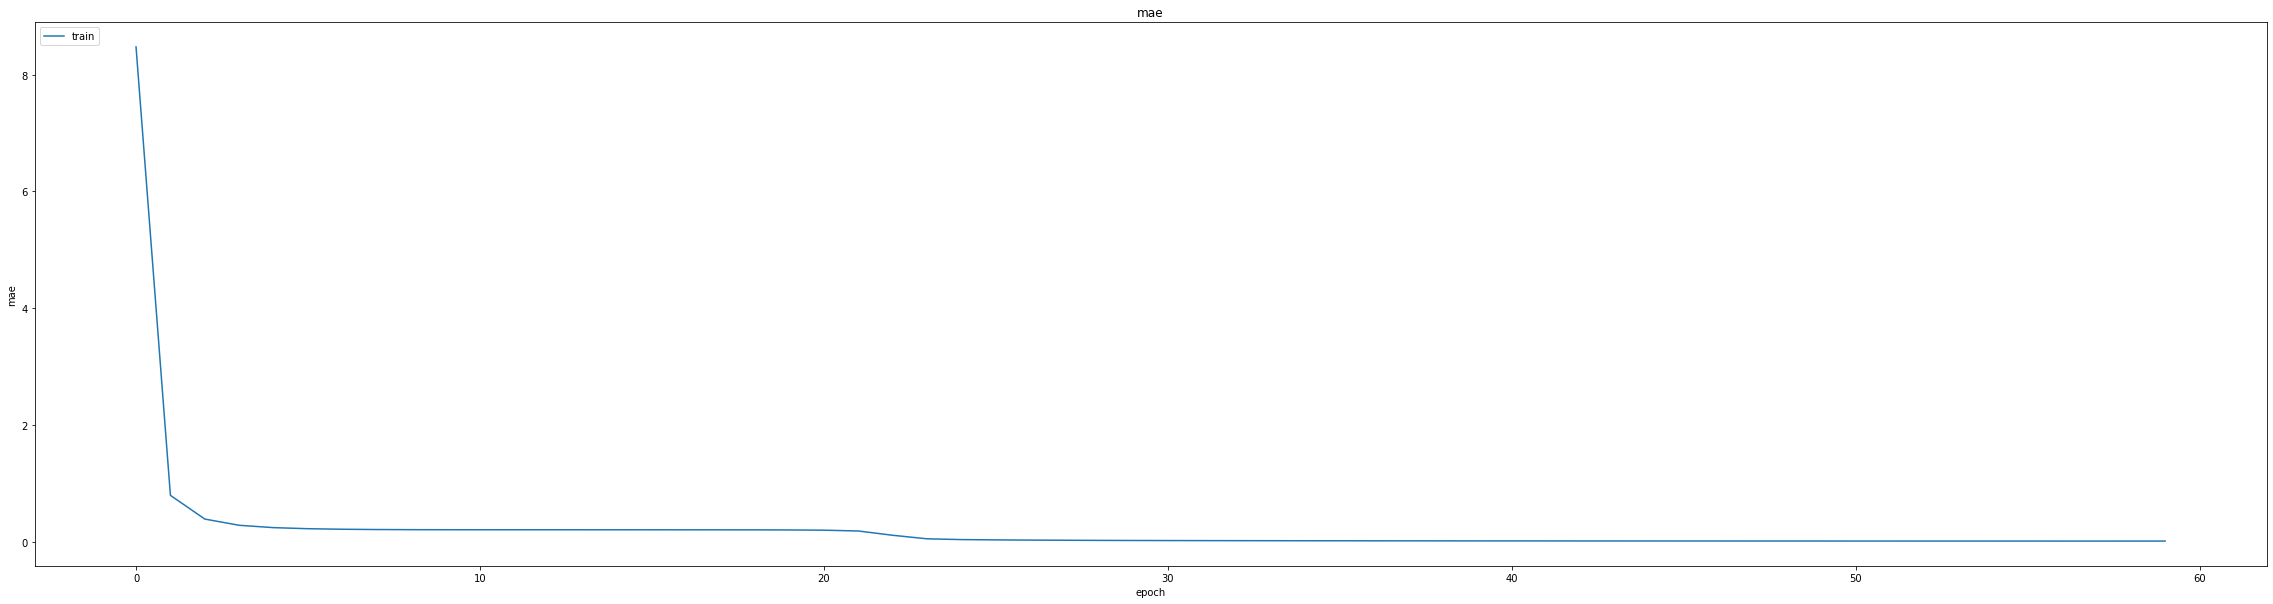

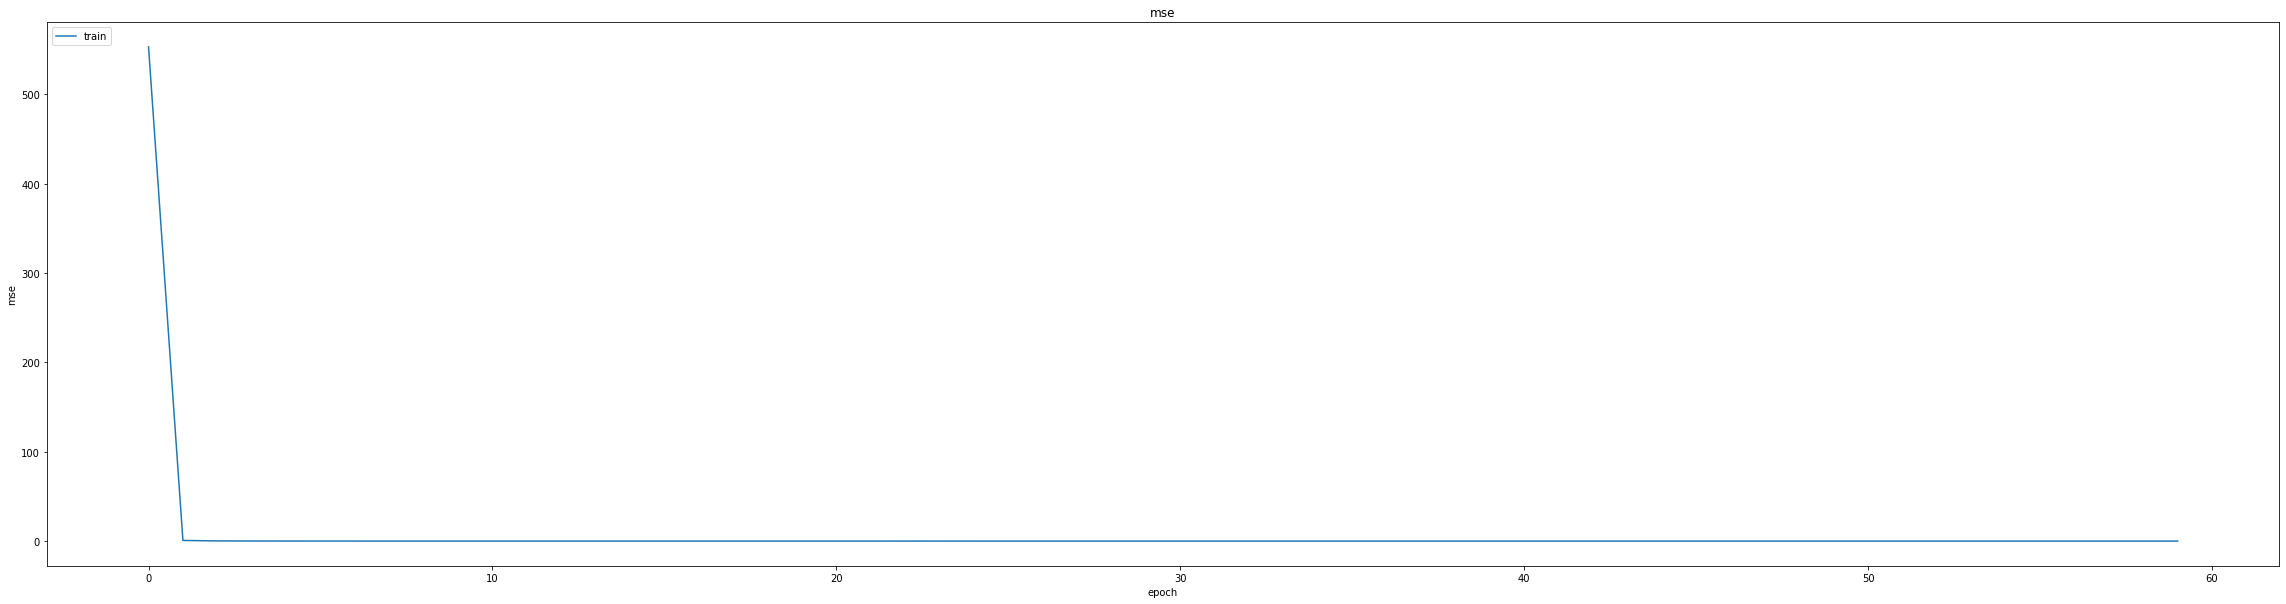

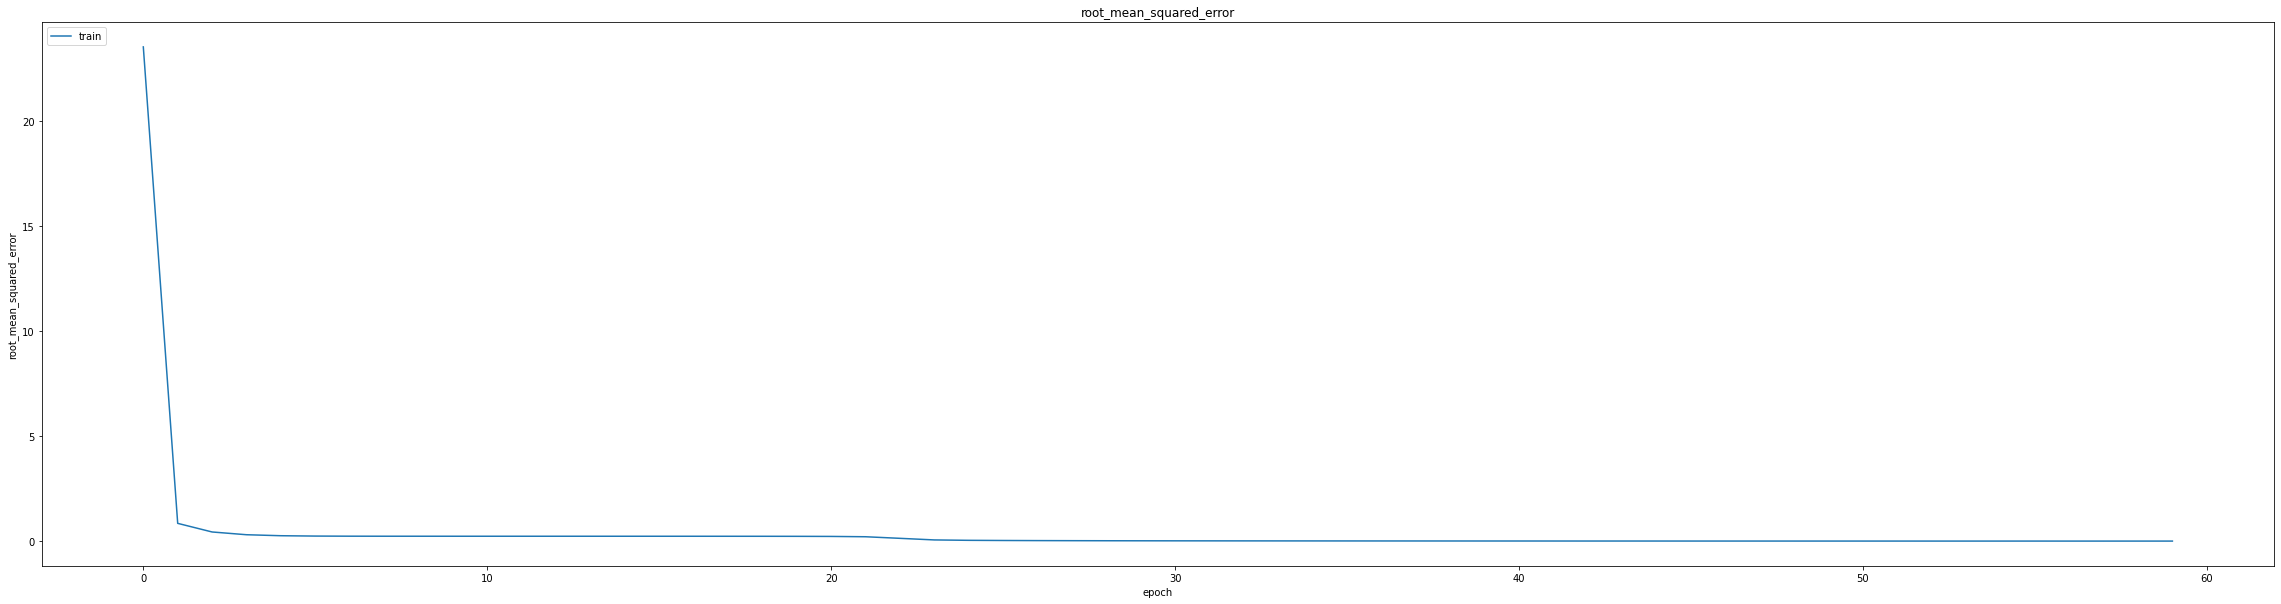

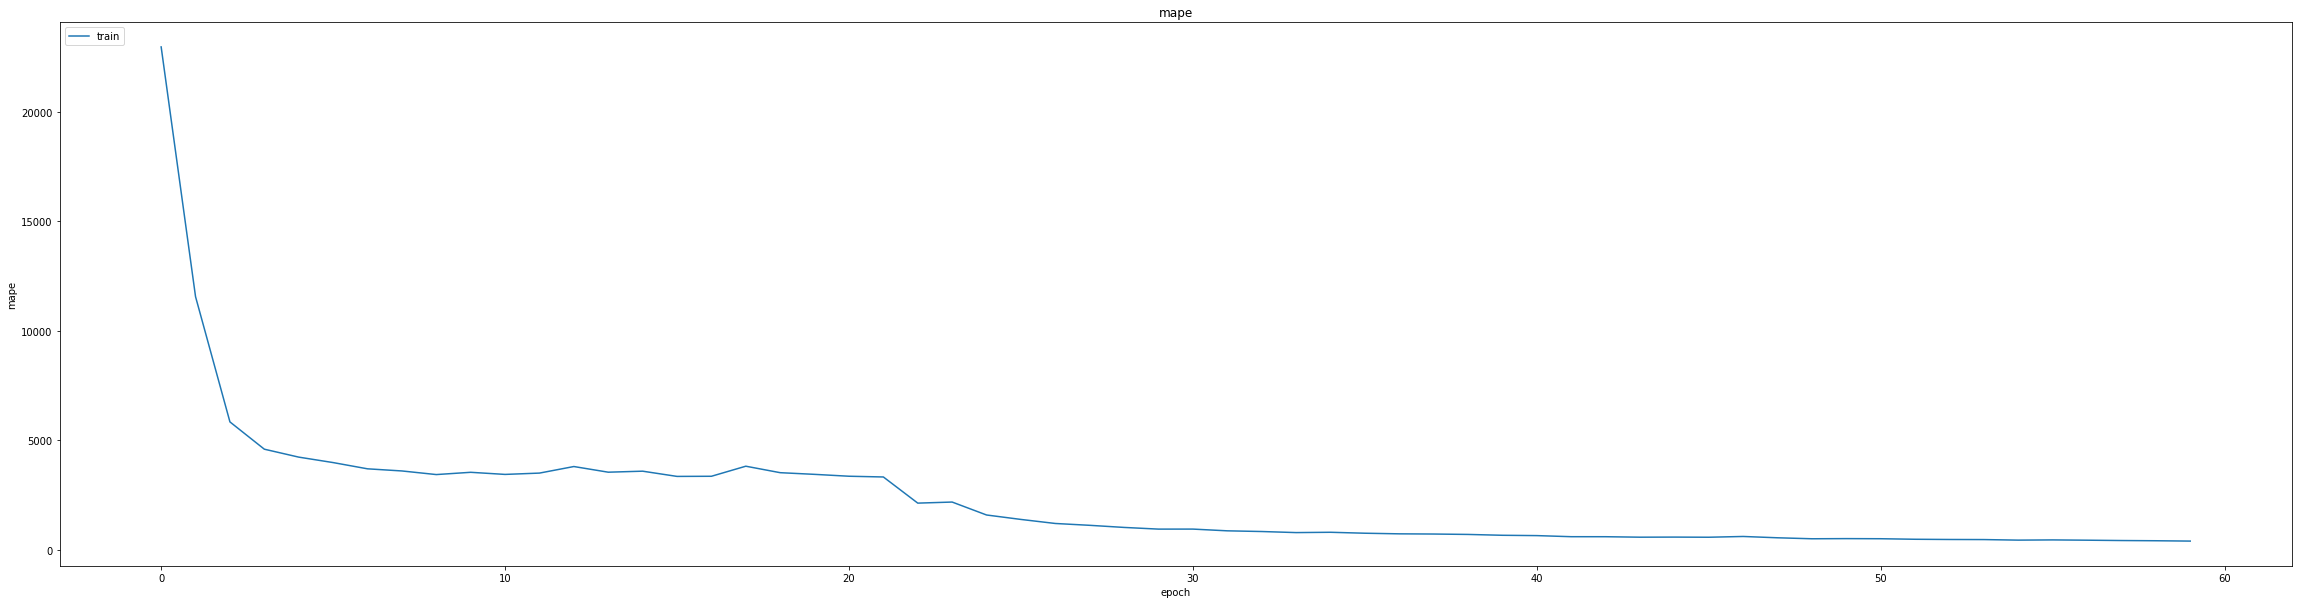

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
r2_score=thesis.R_Squared_Score(model, x_val, y_val)
print(r2_score)

0.010502368211746216
0.010502368211746216
0.014266077429056168
1390/1390 [==============================] - 6s 4ms/step
0.9949671043186532


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/CHF_USD_5min_GRU(60-40)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:


from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)

history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/20
344/347 [============================>.] - ETA: 0s - loss: 4.7395e-04 - mae: 0.0122 - mse: 4.7395e-04 - root_mean_squared_error: 0.0218 - mape: 447.5337
Epoch 1: val_mse did not improve from 0.00020
347/347 [==============================] - 10s 17ms/step - loss: 4.7131e-04 - mae: 0.0121 - mse: 4.7131e-04 - root_mean_squared_error: 0.0217 - mape: 444.3182 - val_loss: 2.6702e-04 - val_mae: 0.0132 - val_mse: 2.6702e-04 - val_root_mean_squared_error: 0.0163 - val_mape: 1244.8384 - lr: 0.0010
Epoch 2/20
345/347 [============================>.] - ETA: 0s - loss: 1.3073e-04 - mae: 0.0086 - mse: 1.3073e-04 - root_mean_squared_error: 0.0114 - mape: 407.6937
Epoch 2: val_mse improved from 0.00020 to 0.00019, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_GRU(60-40)


347/347 [==============================] - 15s 43ms/step - loss: 1.3078e-04 - mae: 0.0086 - mse: 1.3078e-04 - root_mean_squared_error: 0.0114 - mape: 405.9384 - val_loss: 1.8692e-04 - val_mae: 0.0103 - val_mse: 1.8692e-04 - val_root_mean_squared_error: 0.0137 - val_mape: 1177.5760 - lr: 0.0010
lr changed to 0.0009000000427477062
Epoch 3/20
345/347 [============================>.] - ETA: 0s - loss: 1.2935e-04 - mae: 0.0085 - mse: 1.2935e-04 - root_mean_squared_error: 0.0114 - mape: 390.3654
Epoch 3: val_mse improved from 0.00019 to 0.00017, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_GRU(60-40)


347/347 [==============================] - 15s 43ms/step - loss: 1.2934e-04 - mae: 0.0085 - mse: 1.2934e-04 - root_mean_squared_error: 0.0114 - mape: 388.7179 - val_loss: 1.6632e-04 - val_mae: 0.0095 - val_mse: 1.6632e-04 - val_root_mean_squared_error: 0.0129 - val_mape: 1133.9060 - lr: 9.0000e-04
Epoch 4/20
345/347 [============================>.] - ETA: 0s - loss: 1.2985e-04 - mae: 0.0086 - mse: 1.2985e-04 - root_mean_squared_error: 0.0114 - mape: 383.1615
Epoch 4: val_mse did not improve from 0.00017
347/347 [==============================] - 5s 15ms/step - loss: 1.3000e-04 - mae: 0.0086 - mse: 1.3000e-04 - root_mean_squared_error: 0.0114 - mape: 381.5125 - val_loss: 2.6324e-04 - val_mae: 0.0129 - val_mse: 2.6324e-04 - val_root_mean_squared_error: 0.0162 - val_mape: 1117.7209 - lr: 9.0000e-04
lr changed to 0.0008100000384729356
Epoch 5/20
345/347 [============================>.] - ETA: 0s - loss: 1.2655e-04 - mae: 0.0084 - mse: 1.2655e-04 - root_mean_squared_error: 0.0112 - mape: 36

347/347 [==============================] - 15s 43ms/step - loss: 1.0835e-04 - mae: 0.0078 - mse: 1.0835e-04 - root_mean_squared_error: 0.0104 - mape: 337.5683 - val_loss: 1.3378e-04 - val_mae: 0.0085 - val_mse: 1.3378e-04 - val_root_mean_squared_error: 0.0116 - val_mape: 999.7664 - lr: 6.5610e-04
Epoch 10/20
344/347 [============================>.] - ETA: 0s - loss: 1.0281e-04 - mae: 0.0076 - mse: 1.0281e-04 - root_mean_squared_error: 0.0101 - mape: 331.8190
Epoch 10: val_mse did not improve from 0.00013
347/347 [==============================] - 5s 15ms/step - loss: 1.0294e-04 - mae: 0.0076 - mse: 1.0294e-04 - root_mean_squared_error: 0.0101 - mape: 329.4433 - val_loss: 1.6429e-04 - val_mae: 0.0100 - val_mse: 1.6429e-04 - val_root_mean_squared_error: 0.0128 - val_mape: 986.8309 - lr: 6.5610e-04
lr changed to 0.0005904900433961303
Epoch 11/20
345/347 [============================>.] - ETA: 0s - loss: 9.6347e-05 - mae: 0.0073 - mse: 9.6347e-05 - root_mean_squared_error: 0.0098 - mape: 3

347/347 [==============================] - 15s 43ms/step - loss: 8.0216e-05 - mae: 0.0067 - mse: 8.0216e-05 - root_mean_squared_error: 0.0090 - mape: 313.5385 - val_loss: 1.3046e-04 - val_mae: 0.0089 - val_mse: 1.3046e-04 - val_root_mean_squared_error: 0.0114 - val_mape: 936.7754 - lr: 4.7830e-04
Epoch 16/20
345/347 [============================>.] - ETA: 0s - loss: 7.9928e-05 - mae: 0.0067 - mse: 7.9928e-05 - root_mean_squared_error: 0.0089 - mape: 327.9697
Epoch 16: val_mse did not improve from 0.00013
347/347 [==============================] - 5s 15ms/step - loss: 7.9878e-05 - mae: 0.0067 - mse: 7.9878e-05 - root_mean_squared_error: 0.0089 - mape: 326.5569 - val_loss: 1.4447e-04 - val_mae: 0.0098 - val_mse: 1.4447e-04 - val_root_mean_squared_error: 0.0120 - val_mape: 930.4894 - lr: 4.7830e-04
lr changed to 0.0004304672533180565
Epoch 17/20
347/347 [==============================] - ETA: 0s - loss: 6.9165e-05 - mae: 0.0062 - mse: 6.9165e-05 - root_mean_squared_error: 0.0083 - mape: 3

347/347 [==============================] - 15s 43ms/step - loss: 6.9083e-05 - mae: 0.0062 - mse: 6.9083e-05 - root_mean_squared_error: 0.0083 - mape: 299.7346 - val_loss: 1.2403e-04 - val_mae: 0.0091 - val_mse: 1.2403e-04 - val_root_mean_squared_error: 0.0111 - val_mape: 919.2578 - lr: 4.3047e-04
lr changed to 0.00038742052274756136
Epoch 19/20
344/347 [============================>.] - ETA: 0s - loss: 6.3653e-05 - mae: 0.0060 - mse: 6.3653e-05 - root_mean_squared_error: 0.0080 - mape: 294.9903
Epoch 19: val_mse did not improve from 0.00012
347/347 [==============================] - 5s 15ms/step - loss: 6.3589e-05 - mae: 0.0060 - mse: 6.3589e-05 - root_mean_squared_error: 0.0080 - mape: 292.8779 - val_loss: 1.6442e-04 - val_mae: 0.0110 - val_mse: 1.6442e-04 - val_root_mean_squared_error: 0.0128 - val_mape: 923.3306 - lr: 3.8742e-04
Epoch 20/20
347/347 [==============================] - ETA: 0s - loss: 6.4239e-05 - mae: 0.0061 - mse: 6.4239e-05 - root_mean_squared_error: 0.0080 - mape: 

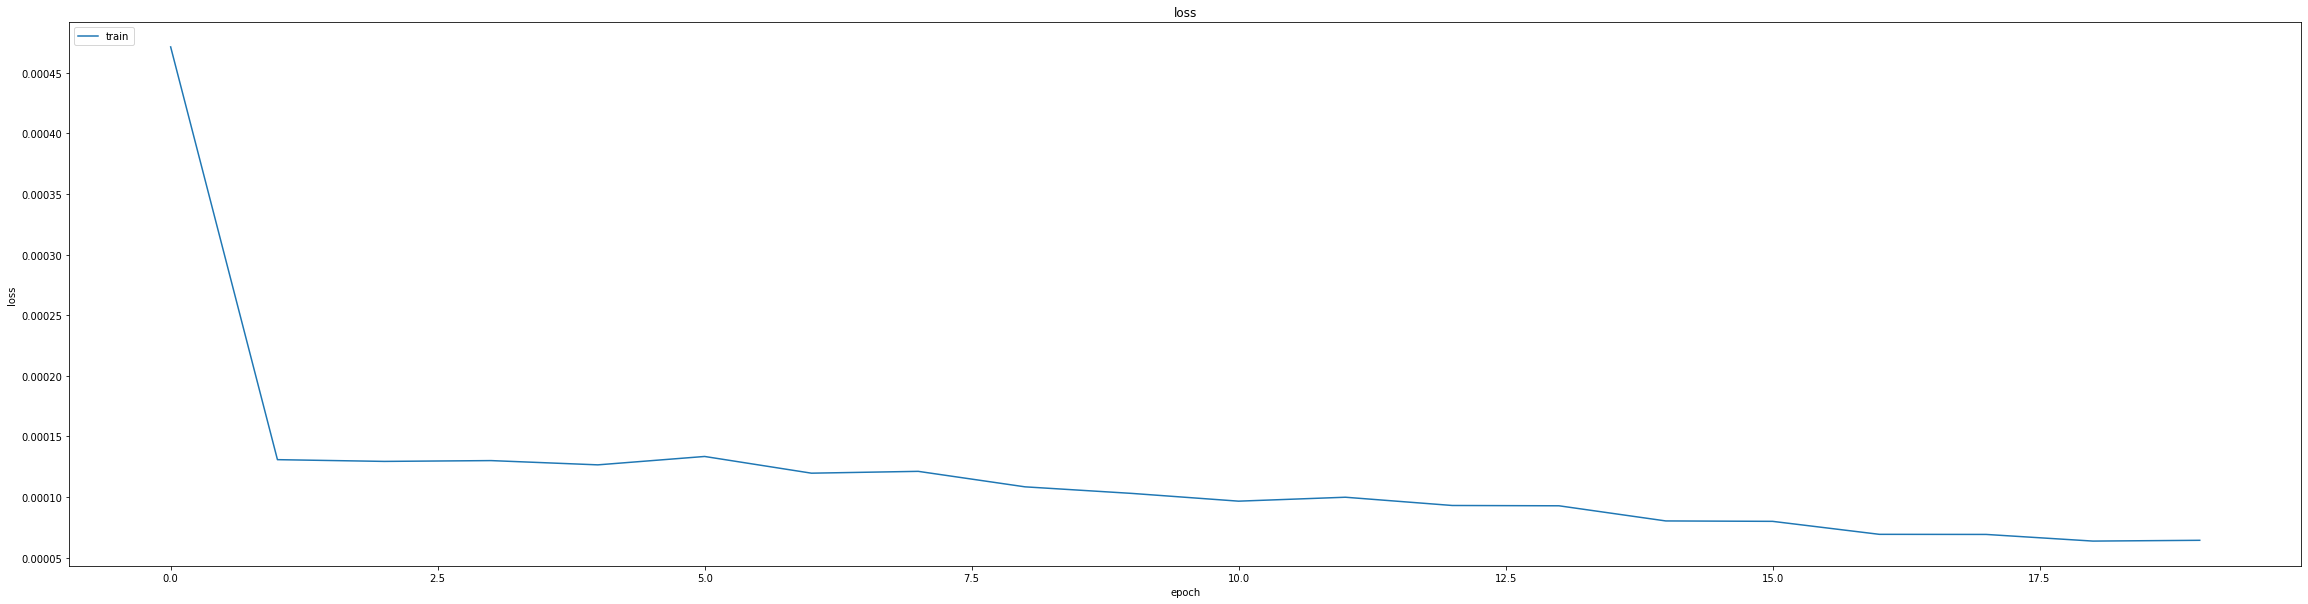

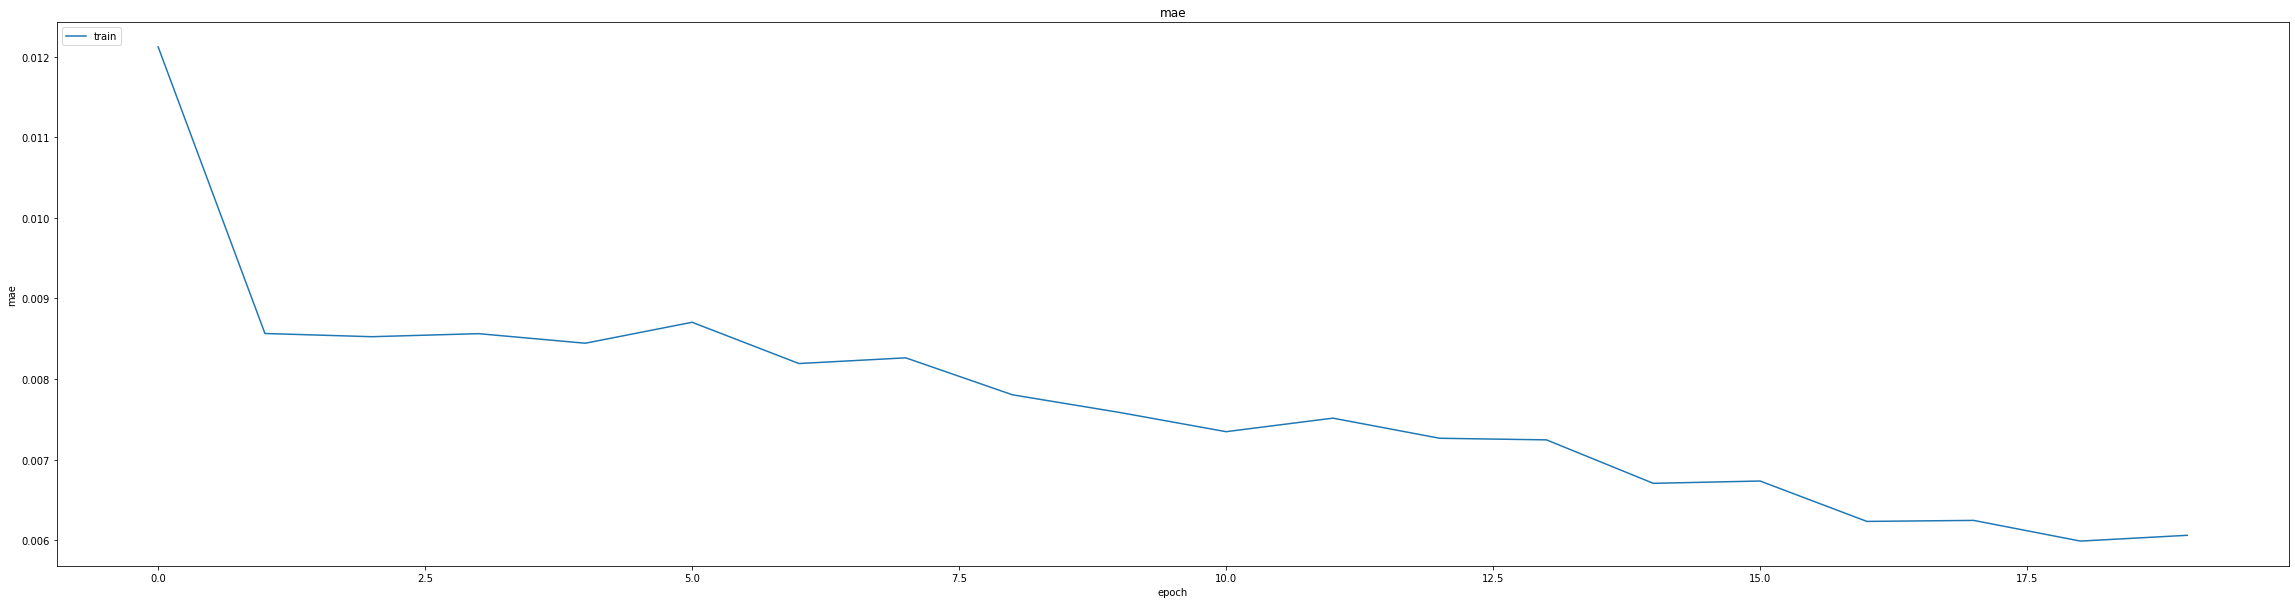

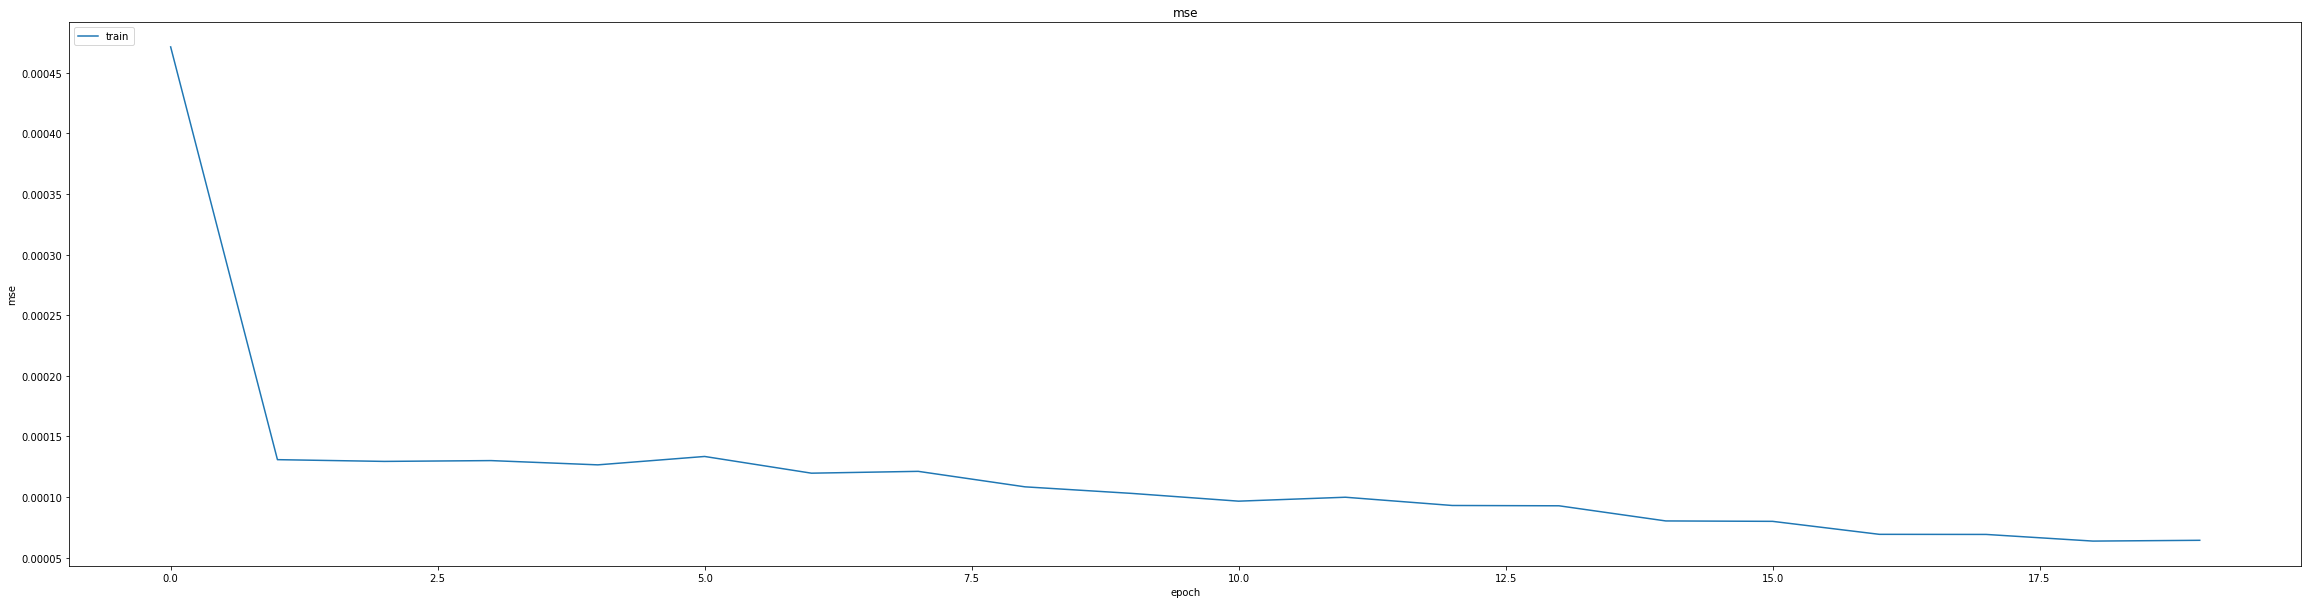

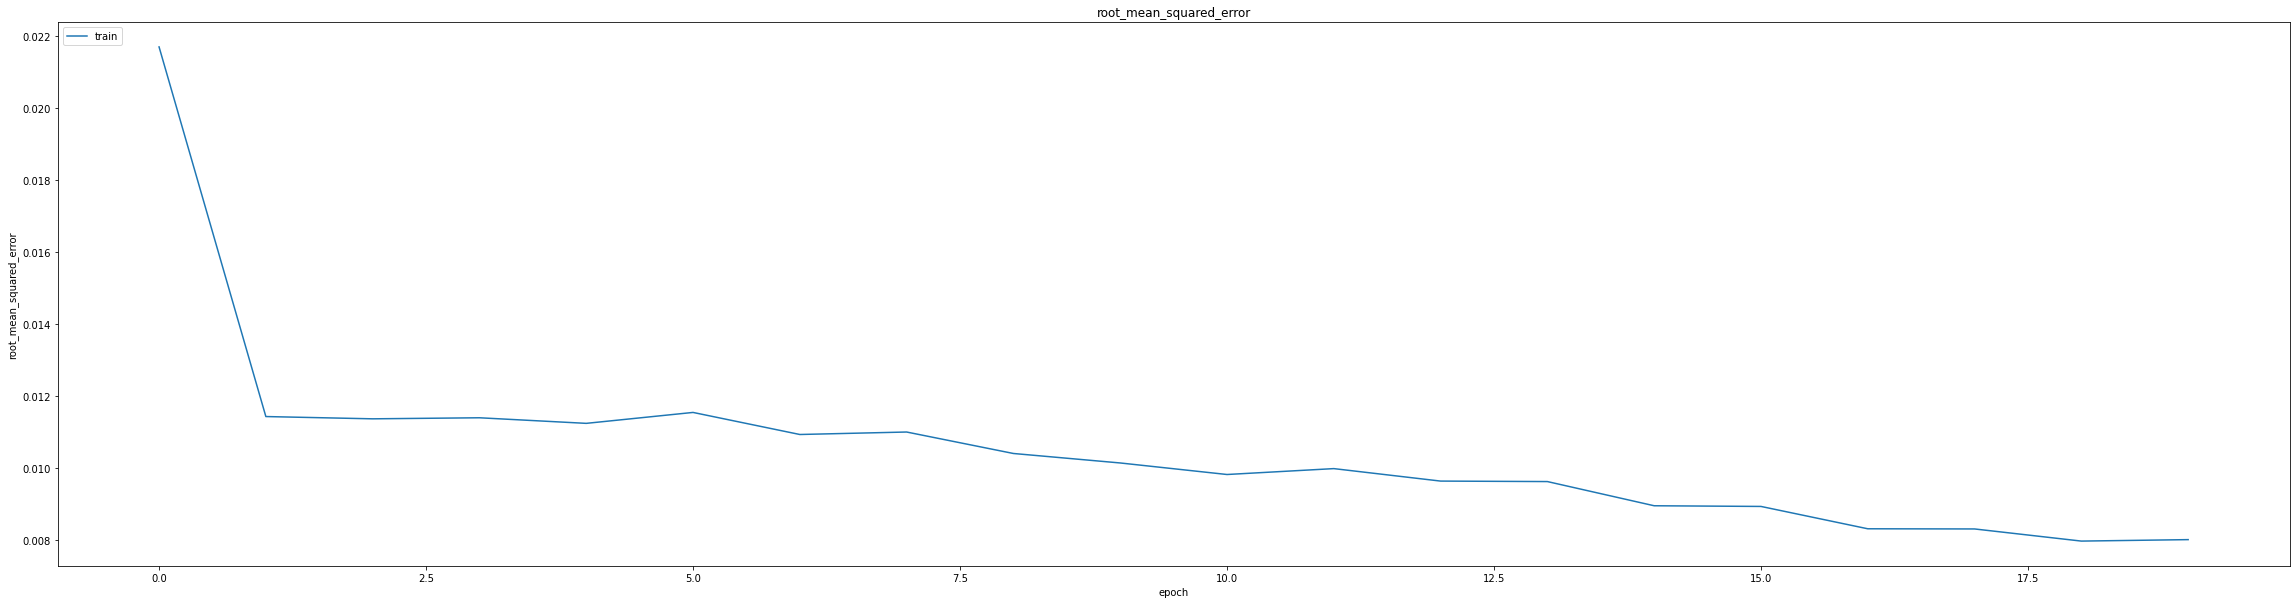

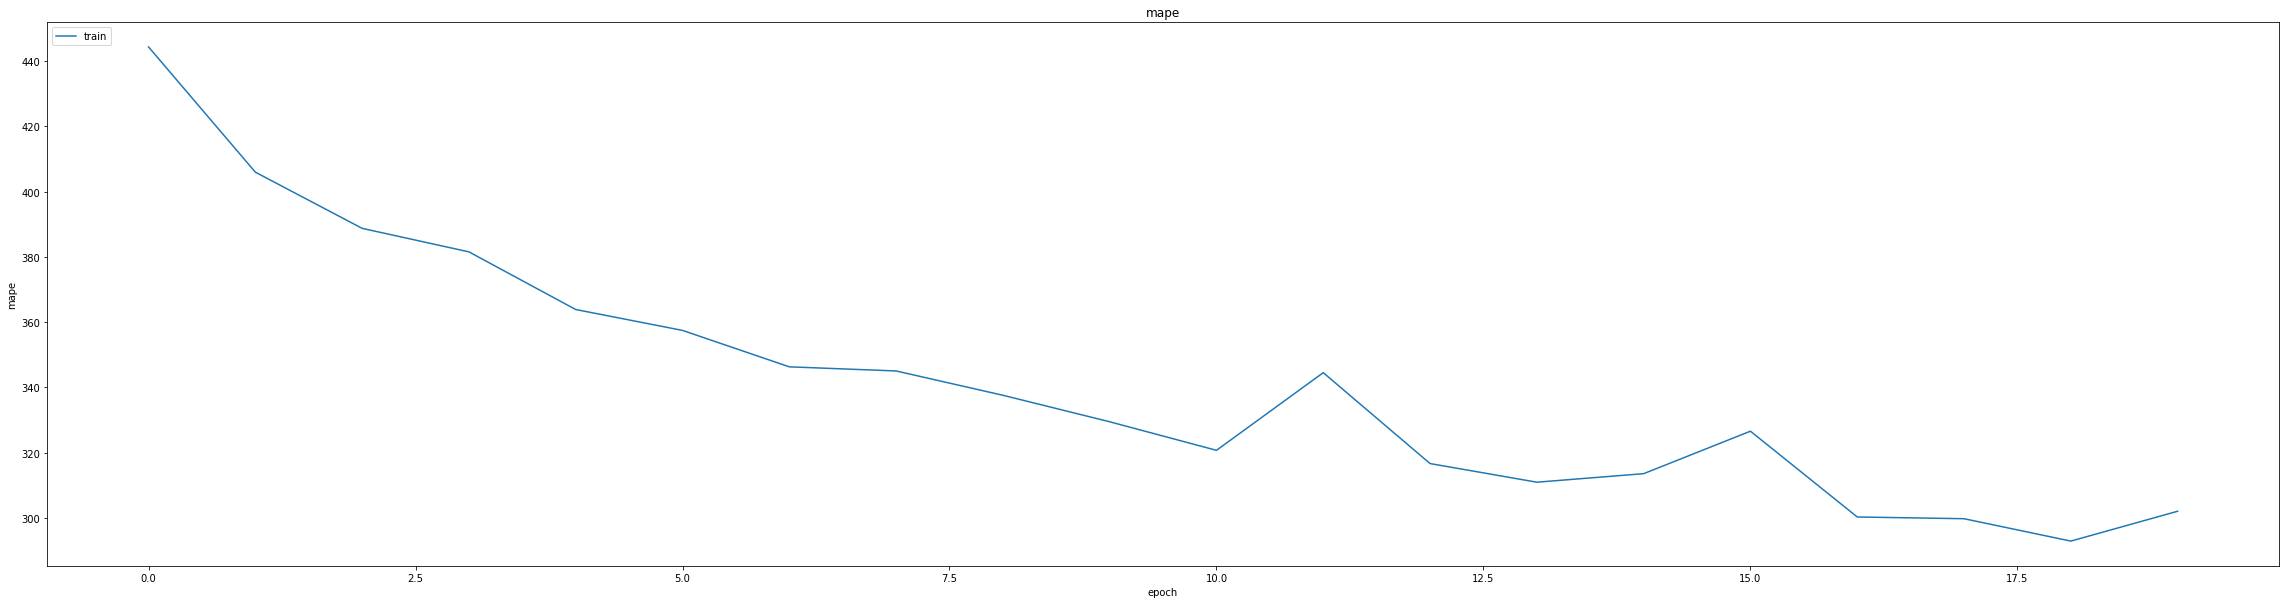

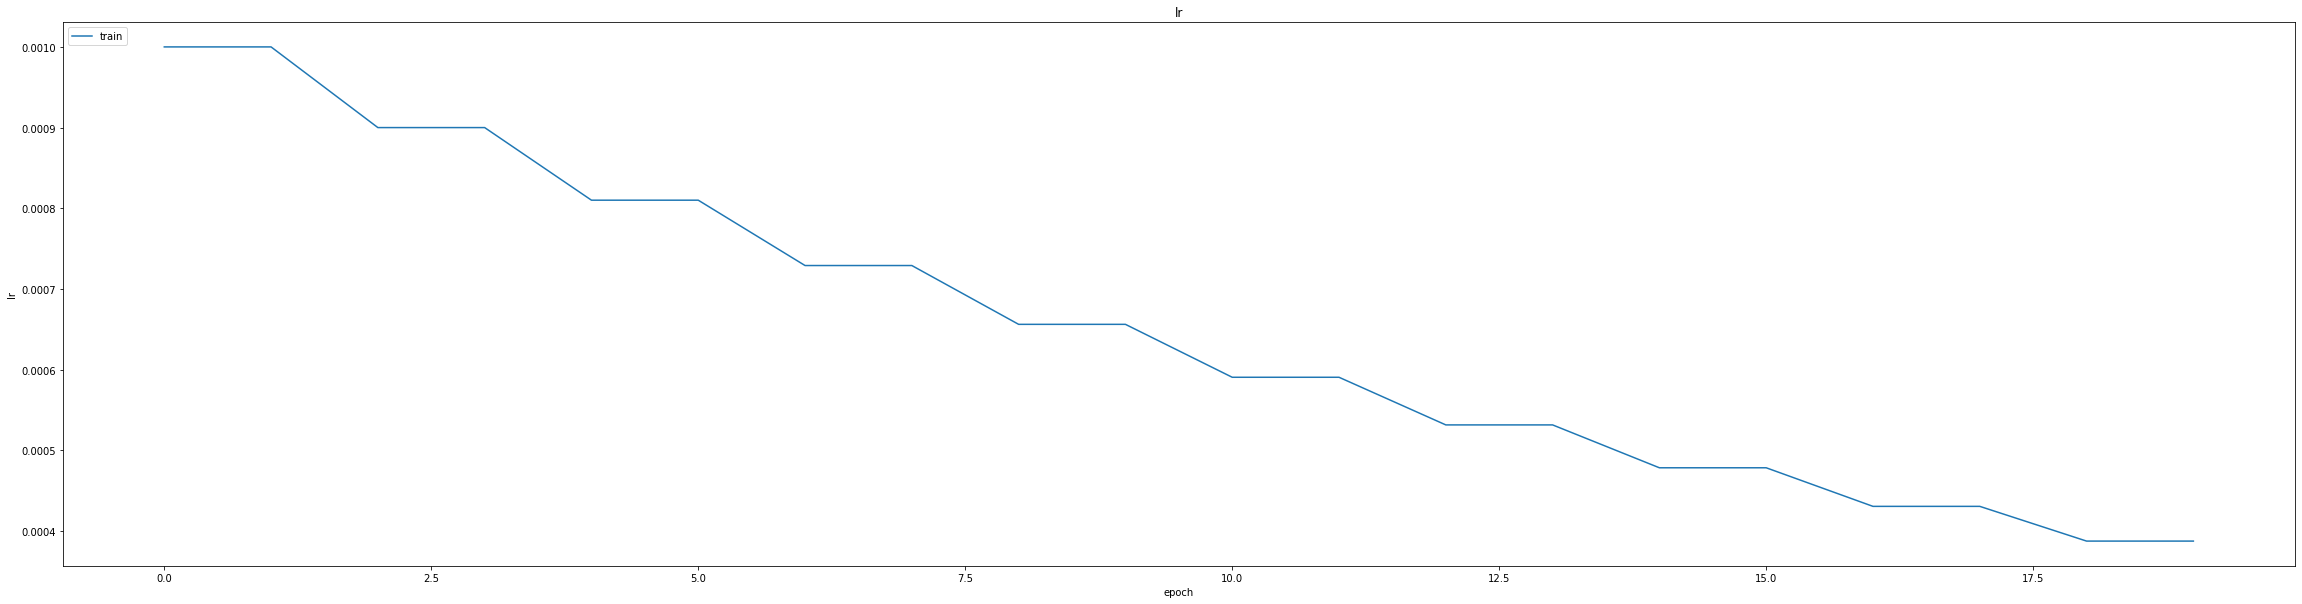

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
r2_score=thesis.R_Squared_Score(model, x_val, y_val)
print(r2_score)

0.00851362943649292
0.00851362943649292
0.011136911809444427
1390/1390 [==============================] - 6s 3ms/step
0.9970121754346756


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/CHF_USD_5min_GRU(60-40)")

1390/1390 [==============================] - 5s 3ms/step


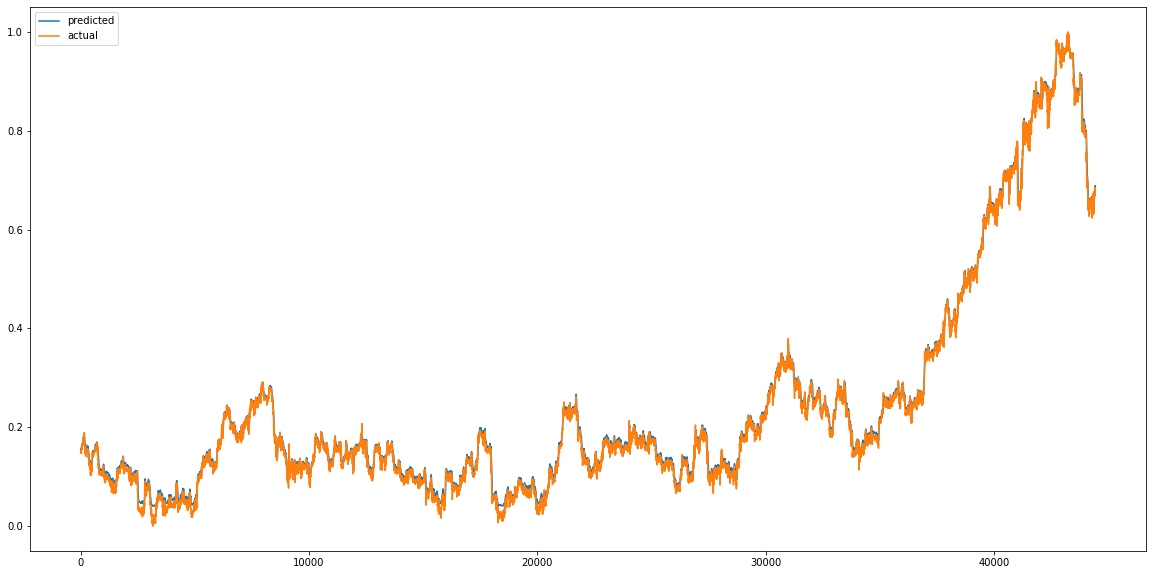

In [ ]:
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


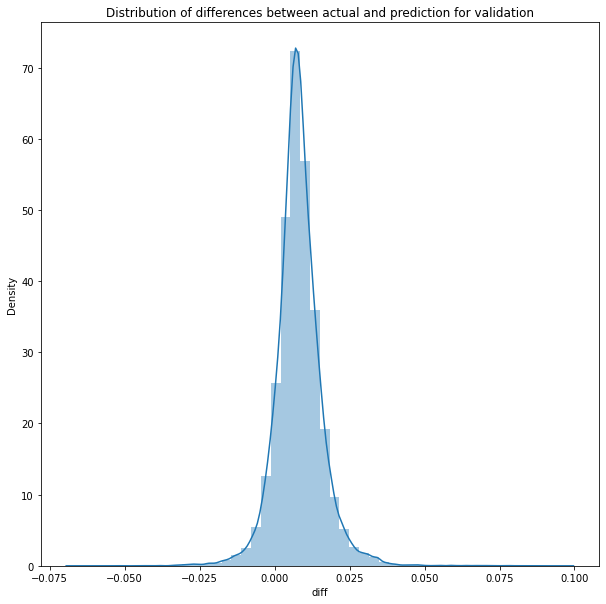

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

1390/1390 [==============================] - 5s 3ms/step


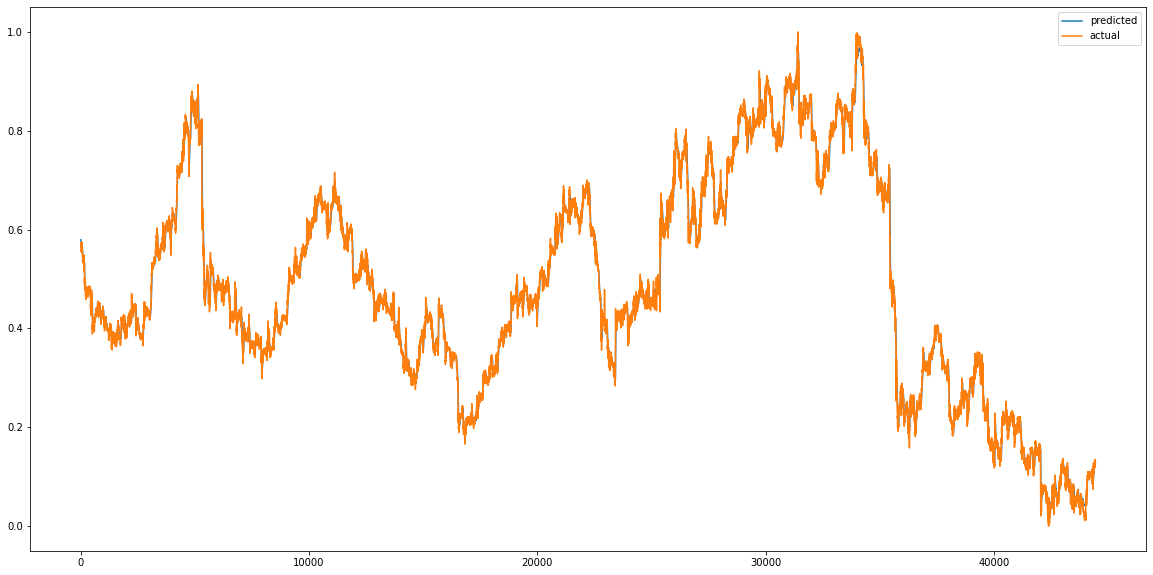

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


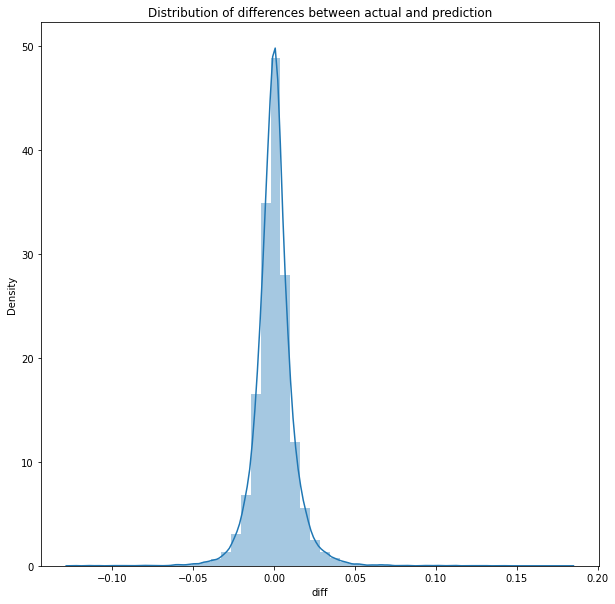

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', test_r2_score)
predictions['diff'].describe()

MSE :  0.000155063912244447
RMSE :  0.012452466110953565
MAE :  0.008300806120521743
1390/1390 [==============================] - 5s 4ms/step
R2_Score  : 0.9967700560414722


count    44453.000000
mean         0.000069
std          0.012452
min         -0.124182
25%         -0.005806
50%         -0.000067
75%          0.005546
max          0.180674
Name: diff, dtype: float64